In [2]:
#%matplotlib inline
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.autolayout': True})

In [3]:
b='72436'
d= pd.read_csv('/home/biolinux/Documentos/'+b+'/GENES.txt',header= None) 
GENES= d[0].tolist()
d = pd.read_csv('/home/biolinux/Escritorio/GenesNames_sort_uniq', header = None )
genes1 = d[0].tolist()
#for i in range(len(genes1)):
 #   genes1[i] = '^' + genes1[i]
p =list(set(GENES).difference(set(genes1)))
p[0:50]

[]

In [4]:
%%bash
n=72436
bedtools bamtobed -i $n*.bam > $n.bed
bedtools coverage -a /home/biolinux/Escritorio/exons.bed -b $n.bed -d -split > exon_$n.txt

In [5]:
b ='72436'
df = pd.read_table('exon_'+b+'.txt', names = ["chr", "Start", "End", "Exon", "Pos_exon","Cov"])

/home/biolinux/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  from ipykernel import kernelapp as app


In [ ]:
#x =  pd.read_table('/home/biolinux/Documentos/64561_exoma/marfan.txt')

In [6]:
df.head()

chr  Start    End       Exon  Pos_exon  Cov
0  chr1  35138  35174  FAM138A_3         1    0
1  chr1  35138  35174  FAM138A_3         2    0
2  chr1  35138  35174  FAM138A_3         3    0
3  chr1  35138  35174  FAM138A_3         4    0
4  chr1  35138  35174  FAM138A_3         5    0

In [7]:
df1 = pd.read_csv('GENES.txt',header= None)

In [8]:
len(df1)

109

In [9]:
dup= df1[df1[0].duplicated() == True]

In [10]:
len(dup)

0

In [11]:
df1 = df1.drop_duplicates()

In [12]:
#df1 = pd.read_csv('GENES')

In [13]:
len(df1)

109

In [14]:
#genes = x['Gene'].tolist()

In [15]:
#df1 = pd.read_excel('VAR RETT 62260.xlsx',1, header = None)
#df1

In [16]:
#a = df1.columns.get_values()
#genes = list(a)

In [17]:
#genes[0:10]

In [18]:
genes = df1[0].tolist()
genes[0:10]

['APC',
 'ATM',
 'ATR',
 'AXIN2',
 'BAP1',
 'BARD1',
 'BLM',
 'BMPR1A',
 'BRCA1',
 'BRCA2']

In [19]:
#genes = ['DNAH1','DNAH5']

In [20]:
#genes = df2[0].tolist()

In [21]:
#genes = ["FGFR2","COL1A1","COL1A2"]

In [22]:
genes = [genes.strip(' ') for genes in genes]

In [23]:
for i in range(len(genes)):
    genes[i] = '^' + genes[i]

In [24]:
genes[0:5]

['^APC', '^ATM', '^ATR', '^AXIN2', '^BAP1']

In [25]:
#genes = ['BMP1','COL1A1','COL1A2','CRTAP','FKBP10','IFITM5','LAMB3','LEPRE1','PPIB','SERPINF1','SERPINH1','SP7']
genes_ = '_,'.join(map(str, genes))
g = genes_.split(',')
g[-1] = g[-1]+'_'

In [26]:
len(g)

109

In [27]:
g[0:10]

['^APC_',
 '^ATM_',
 '^ATR_',
 '^AXIN2_',
 '^BAP1_',
 '^BARD1_',
 '^BLM_',
 '^BMPR1A_',
 '^BRCA1_',
 '^BRCA2_']

In [28]:
#todos = df[df['Exon'].str.contains('^RPGR_')]

In [29]:
todos = df[df['Exon'].str.contains('|'.join(g))]

In [30]:
todos['Cov2'] = todos['Cov'].astype(bool)

/home/biolinux/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
todos['Cov2'] = todos['Cov'].astype(bool)

/home/biolinux/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
todos['Cov2'] = todos['Cov2'].astype(int)

/home/biolinux/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
todos.head()

chr     Start       End     Exon  Pos_exon  Cov  Cov2
203994  chr1  10292387  10292492  KIF1B_2         1   63     1
203995  chr1  10292387  10292492  KIF1B_2         2   62     1
203996  chr1  10292387  10292492  KIF1B_2         3   62     1
203997  chr1  10292387  10292492  KIF1B_2         4   62     1
203998  chr1  10292387  10292492  KIF1B_2         5   62     1

In [34]:
#todos.to_csv('prueba.txt', sep ='\t')

In [35]:
def grafico_media(m):
    x = todos[todos['Exon'].str.contains(m)]
    x1 = x[['Cov','Exon']].groupby('Exon').mean()
    x2 = x1.sort_values('Cov', ascending= True)
    plot = x2.plot(kind="bar",figsize=(20, 10), title = m , color = [('#41b9e1')]);plt.axhline(20, color='k');
    fig = plot.get_figure()
    fig.savefig(m+".png", bbox_inches=0)
    return x2

In [36]:
def porcentaje_cobertura(l):
    s = todos[todos['Exon'].str.contains(l)]
    s_1 = s[['Cov2','Exon']].groupby('Exon').mean()*100
    y1 = s_1.sort_values('Cov2', ascending= True)
    plot = y1.plot(kind="bar",figsize=(20, 10), title = l ,color = [('#6633FF')]);plt.axhline(100, color='r');
    fig = plot.get_figure()
    plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
    fig.savefig(l + "P.png", bbox_inches=0)
    return y1

In [37]:
def profundidad(b):
    z = todos[todos['Exon'].str.contains('(?:\\s|^)'+b+'(?:\\s|$)')]
    plt.figure(figsize=(20,10))
    z.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = b ,color = [('#088A08')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
    plt.xlim(left=1)
    plt.savefig(b+'.png', bbox_inches=None , pad_inches=0)
    return z

In [38]:
#T = todos[todos['Exon'].str.contains('(?:\\s|^)SHOX_5_chrY(?:\\s|$)')]

In [39]:
#genes

In [40]:
#a = todos[todos['Exon'].str.contains('SHOX_5_chrY')]
#a.to_csv('example.csv', index=False)

/home/biolinux/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/biolinux/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


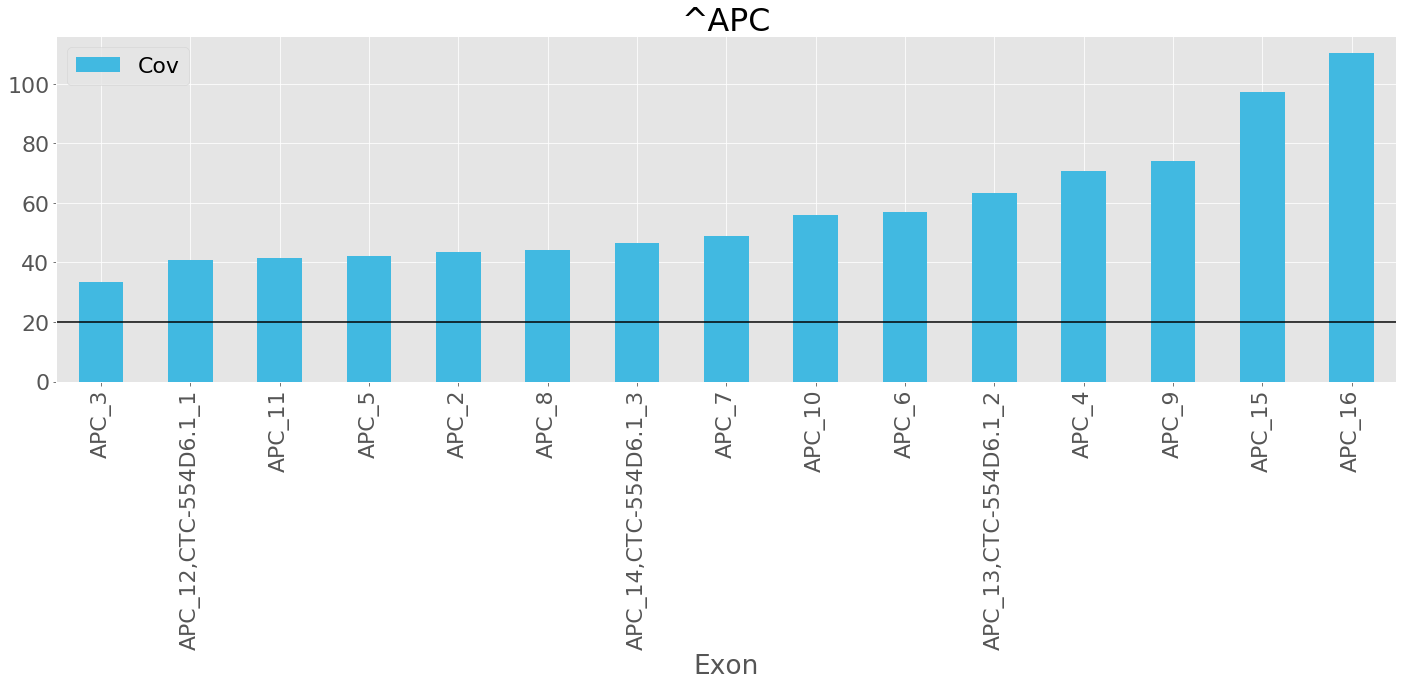

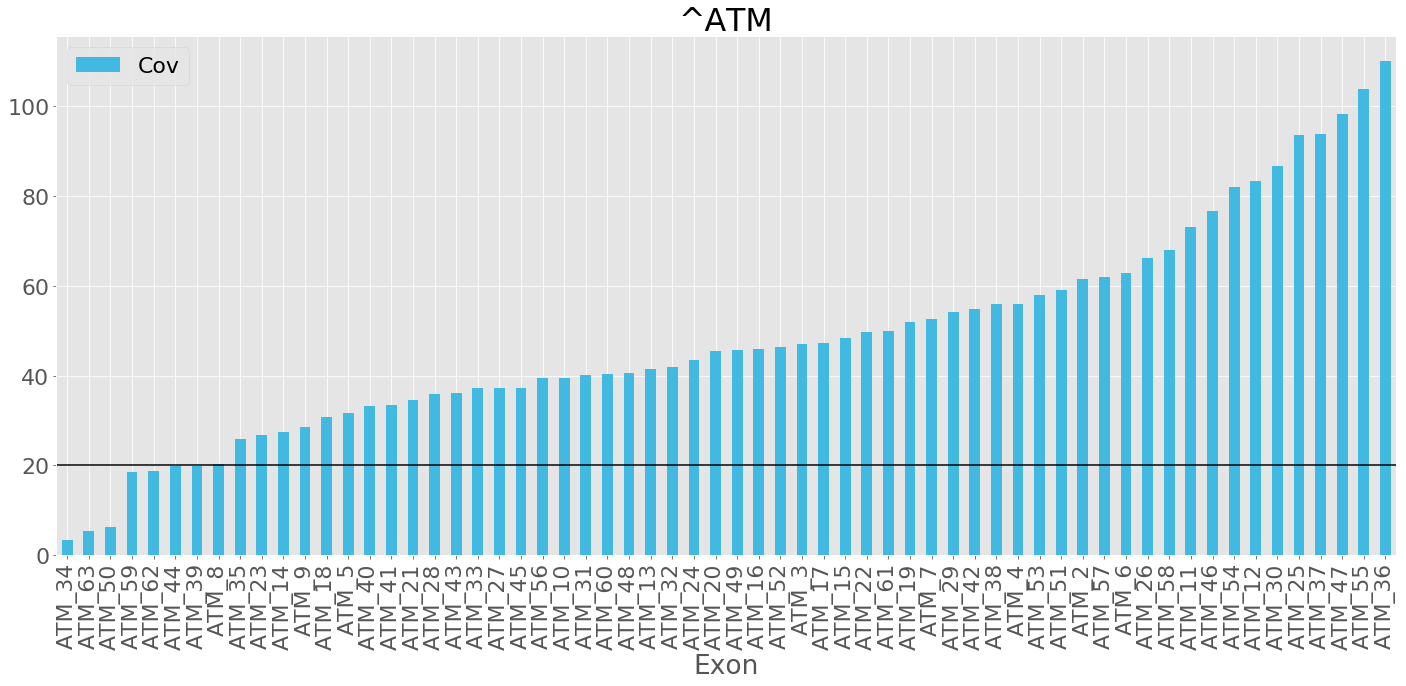

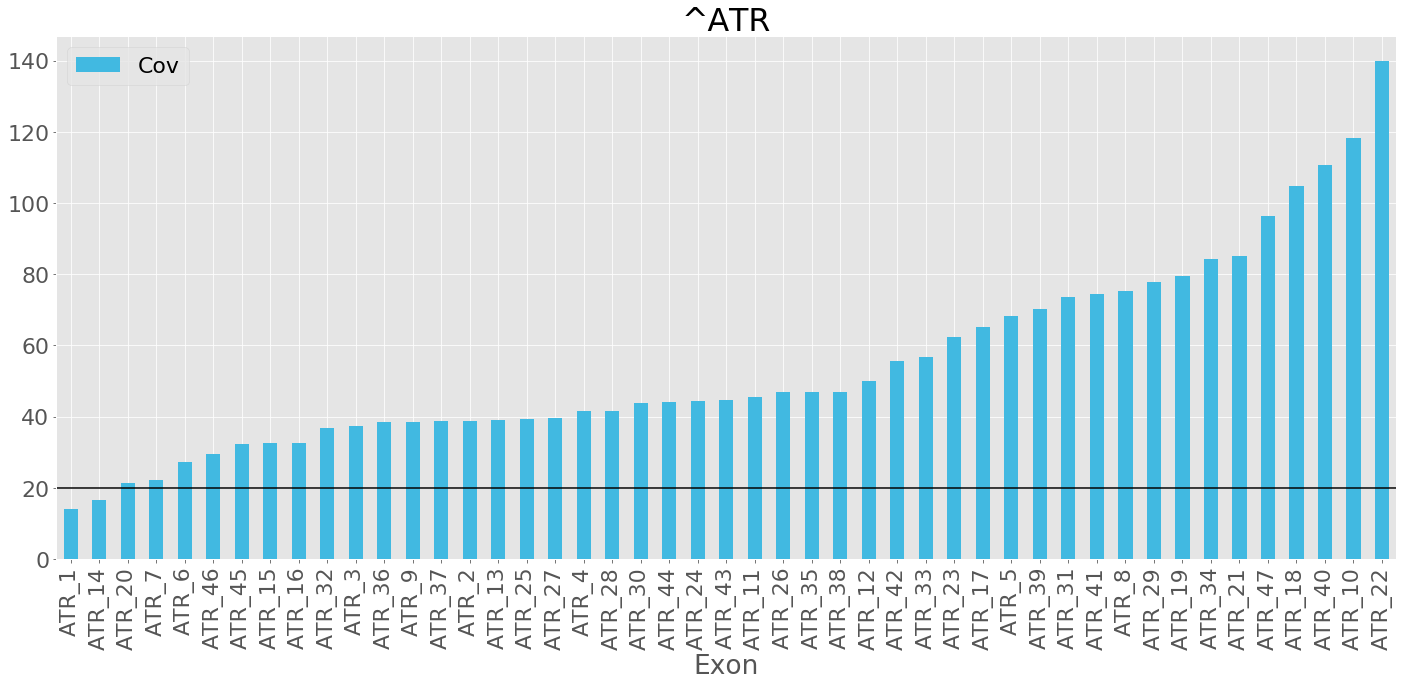

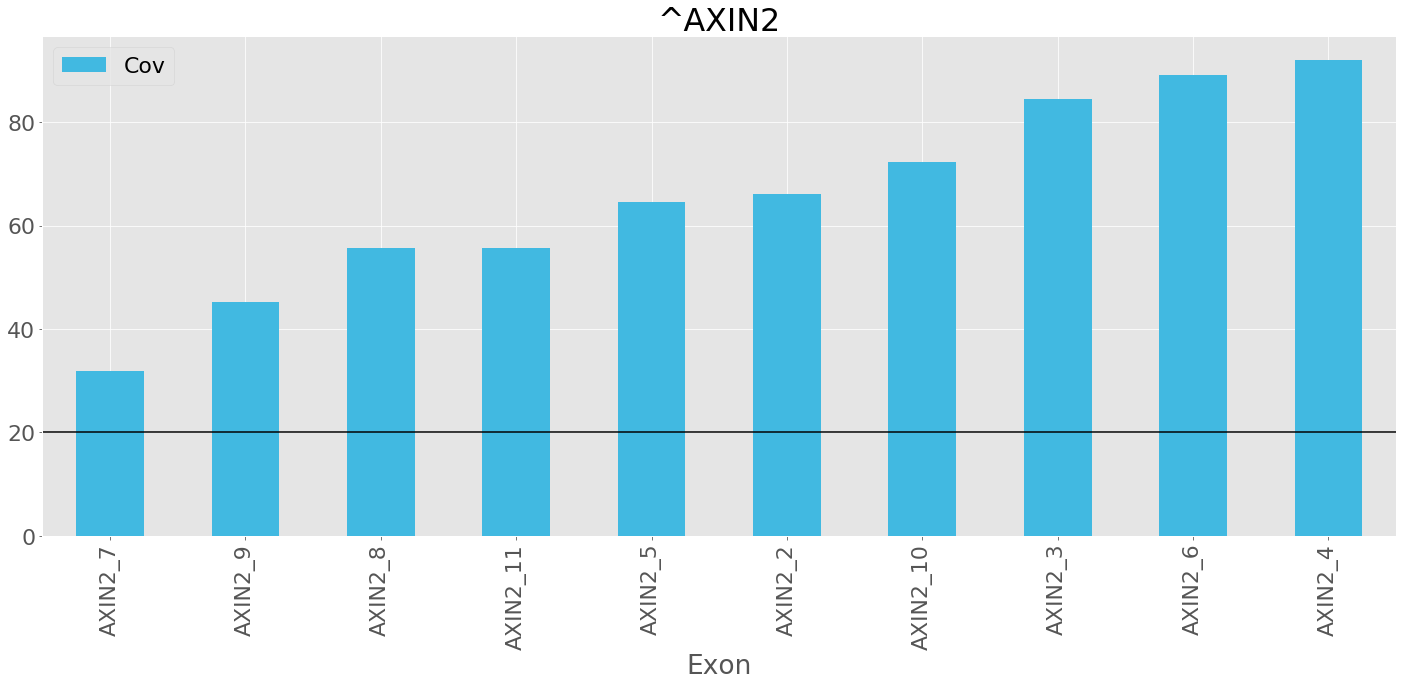

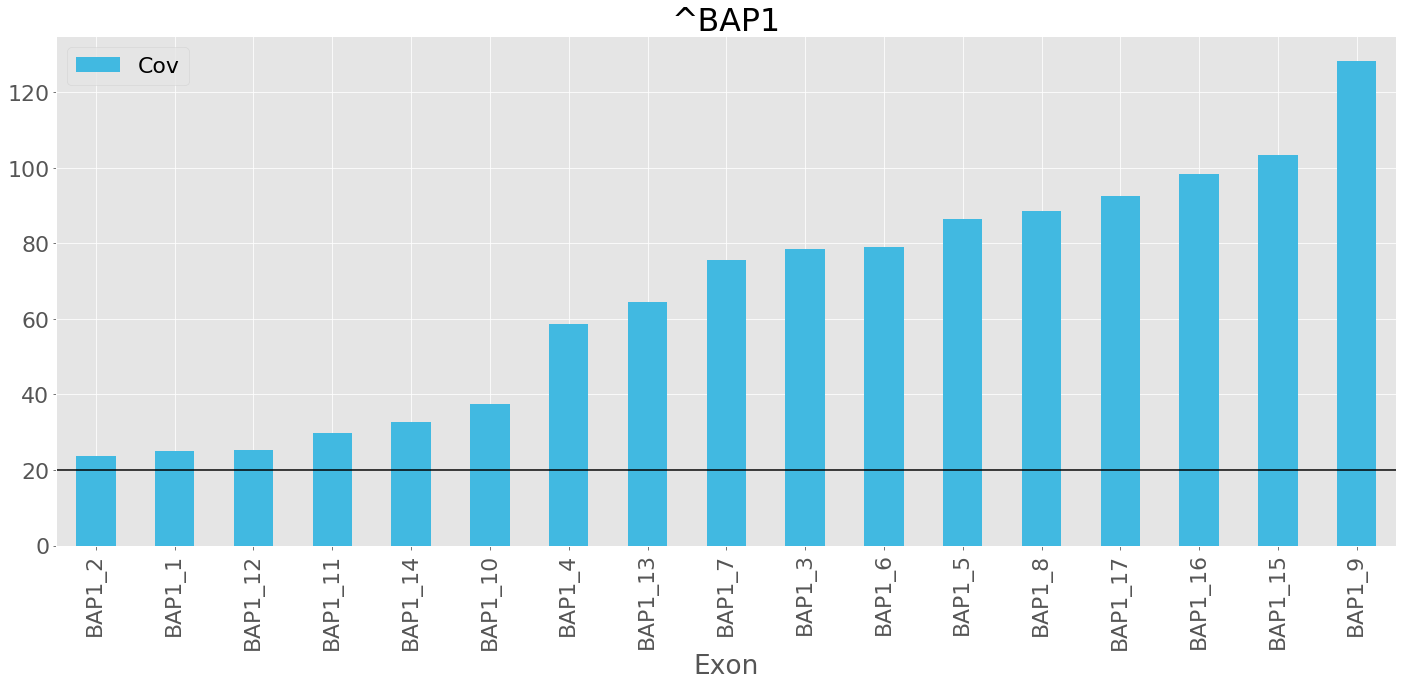

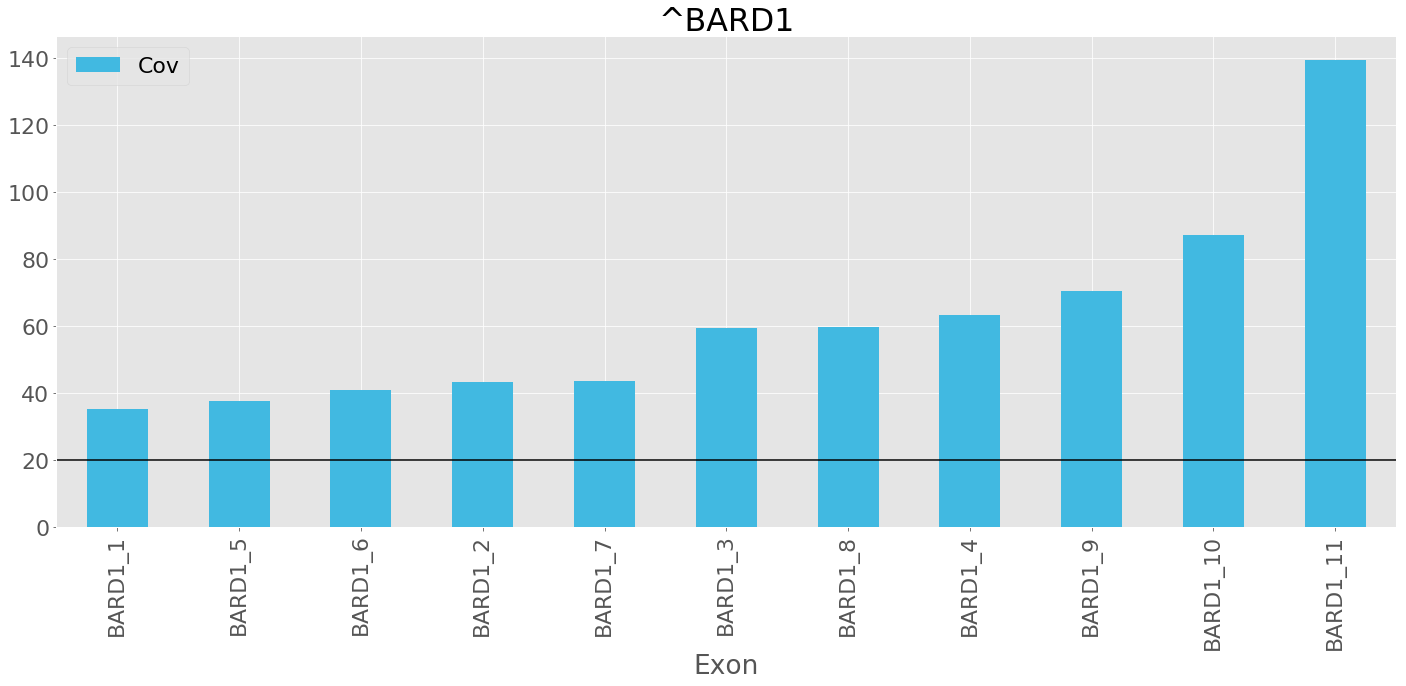

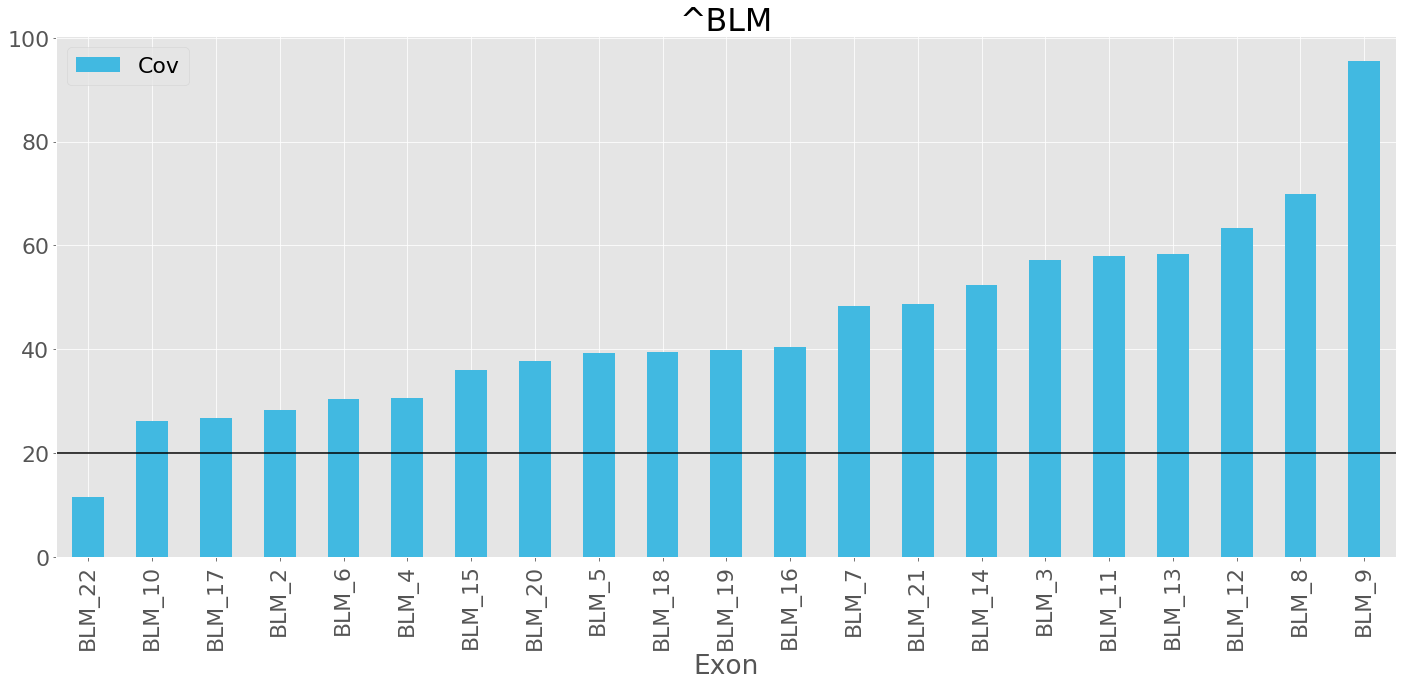

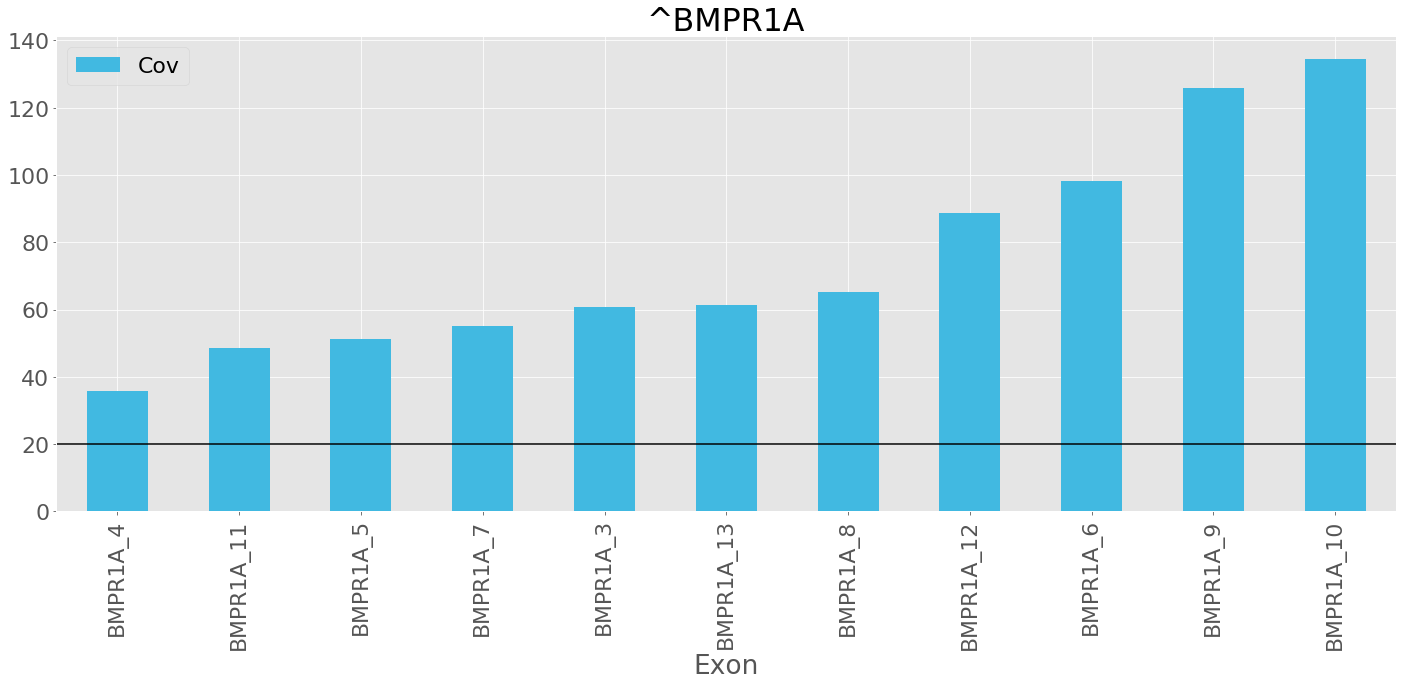

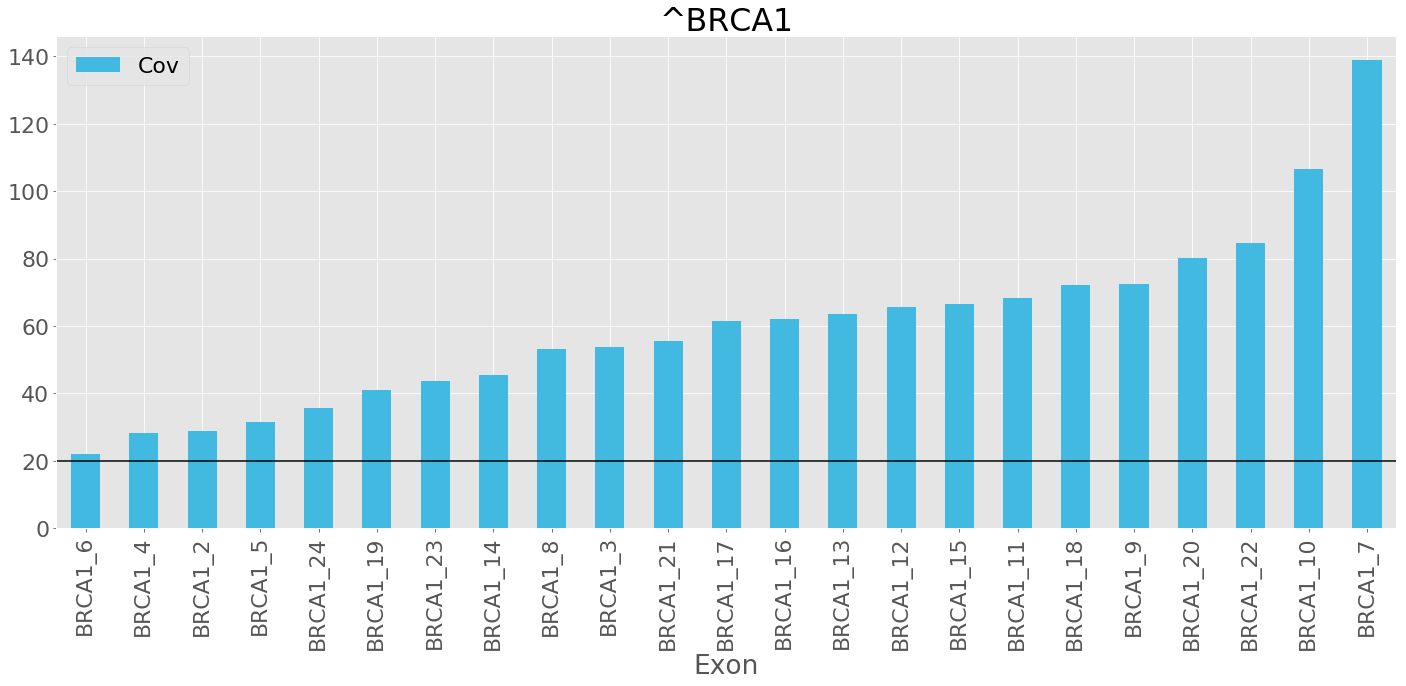

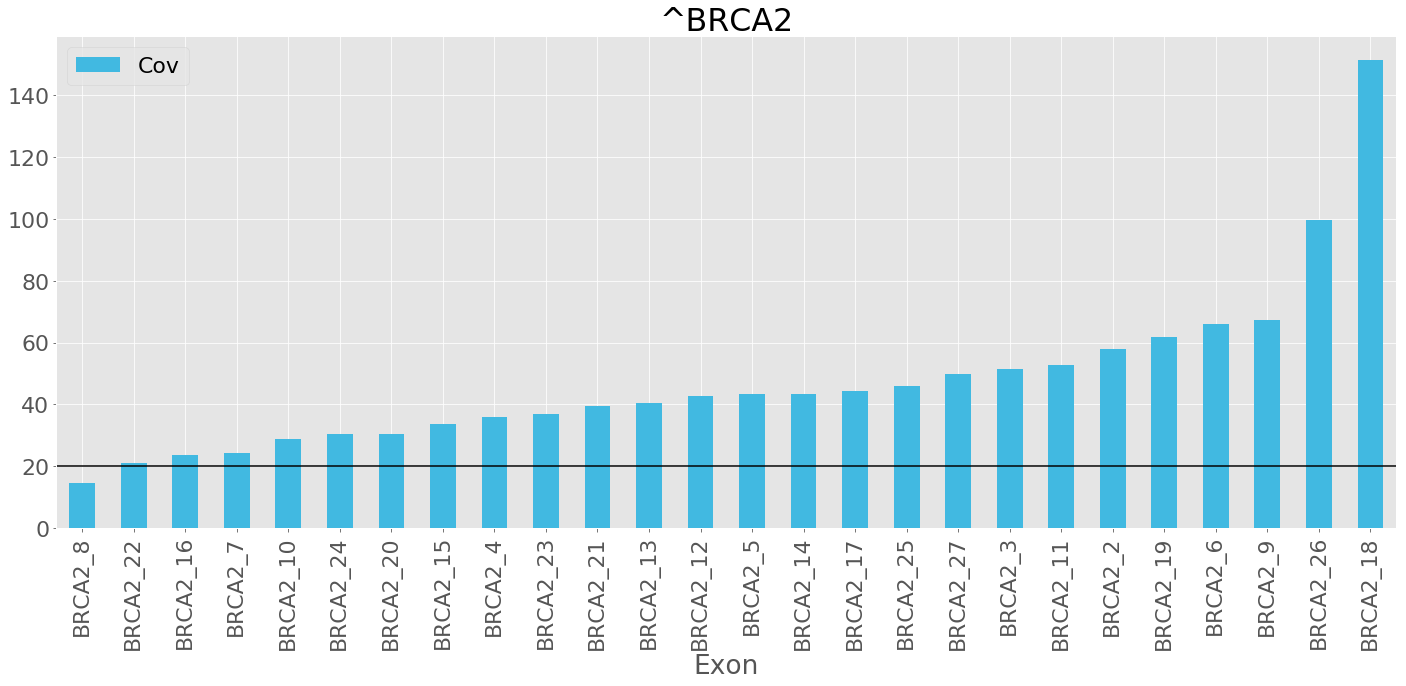

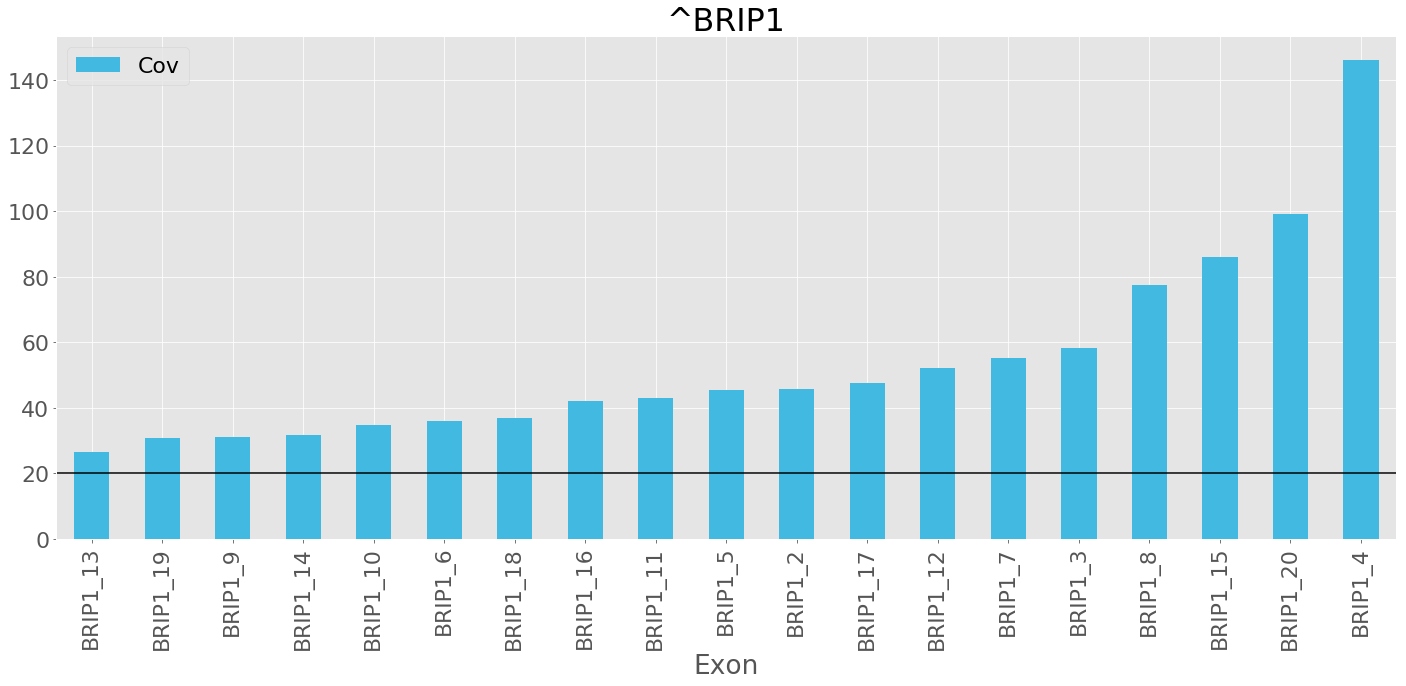

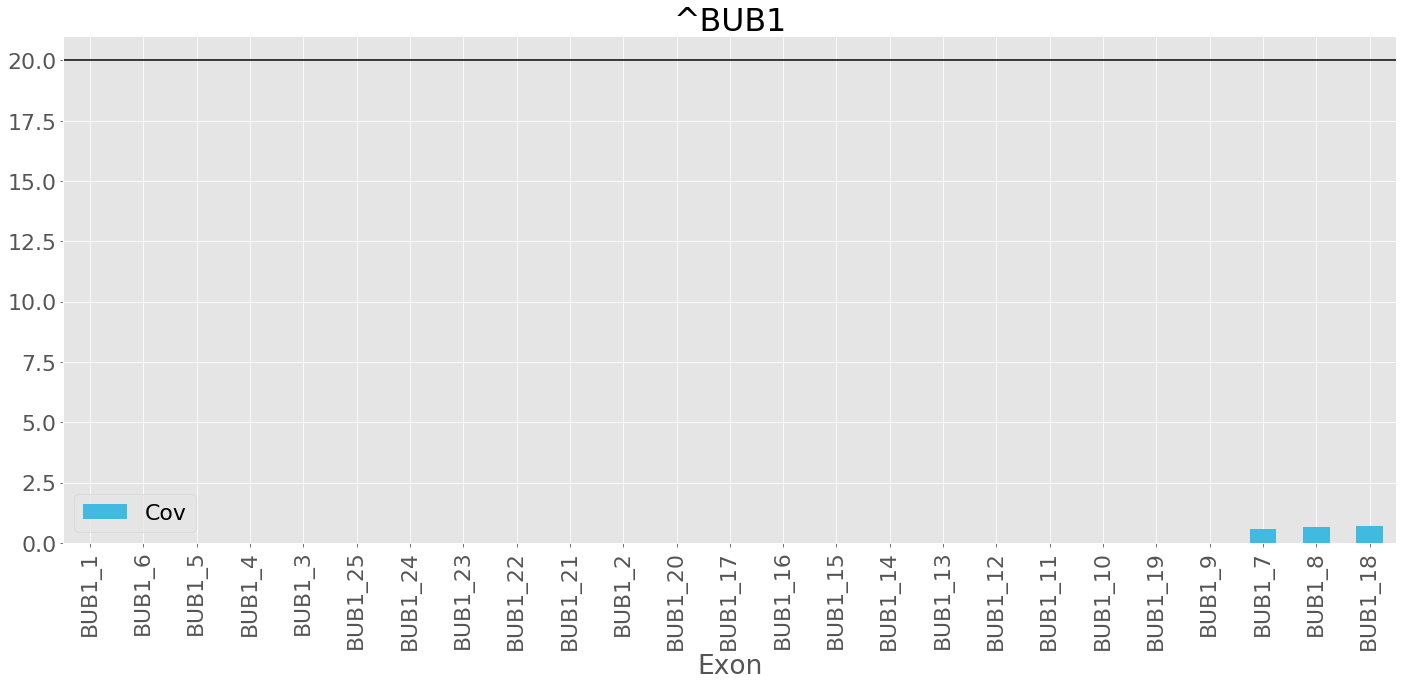

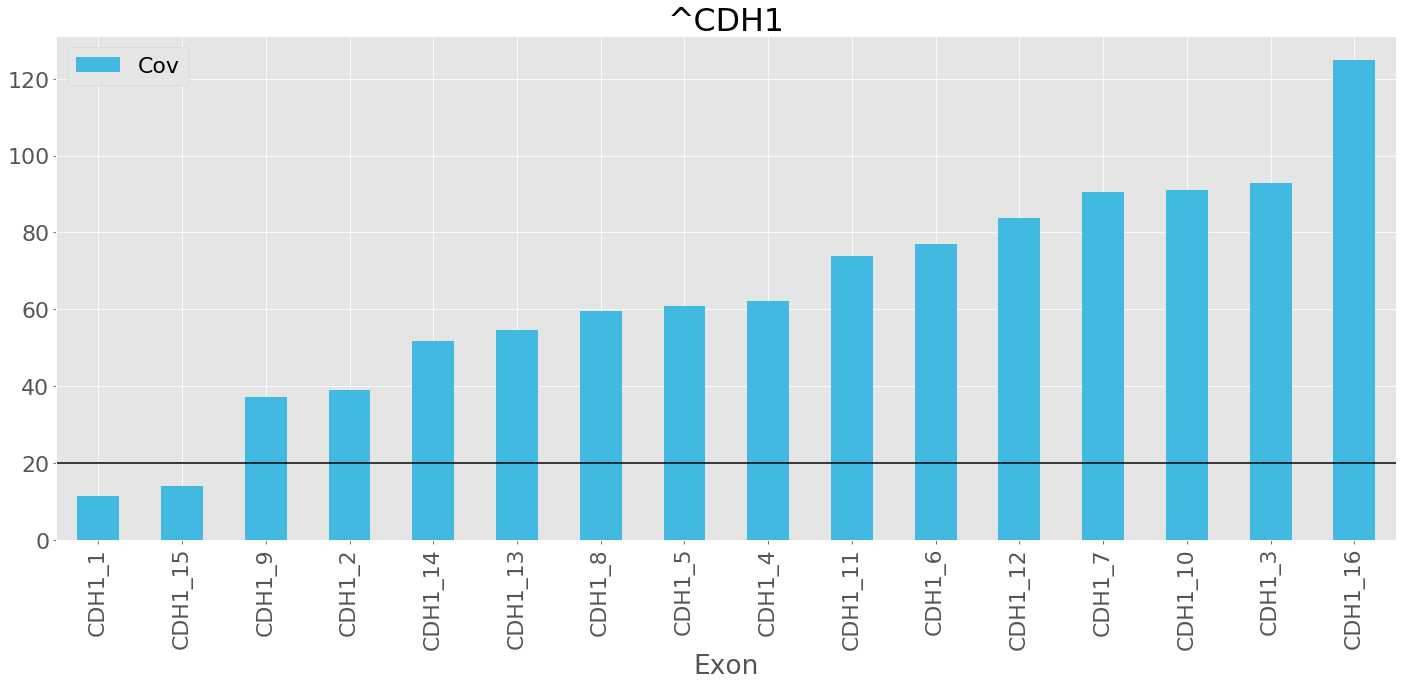

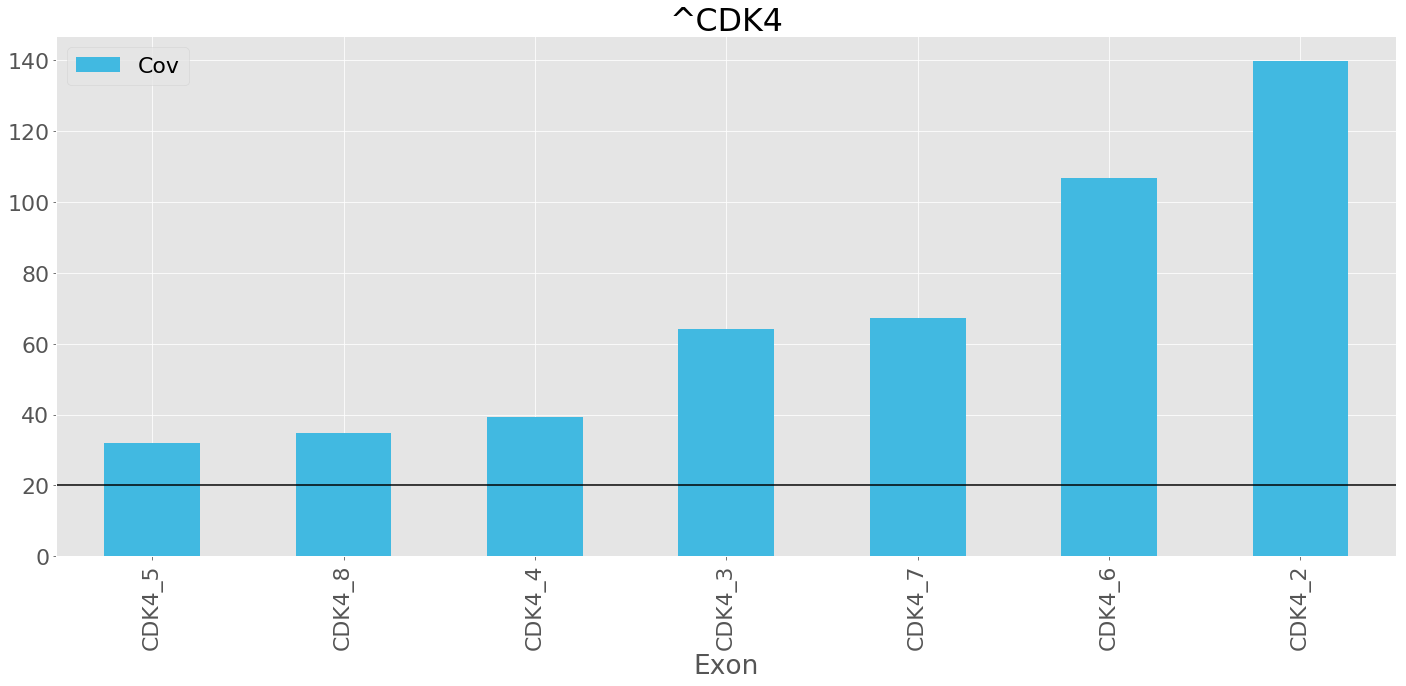

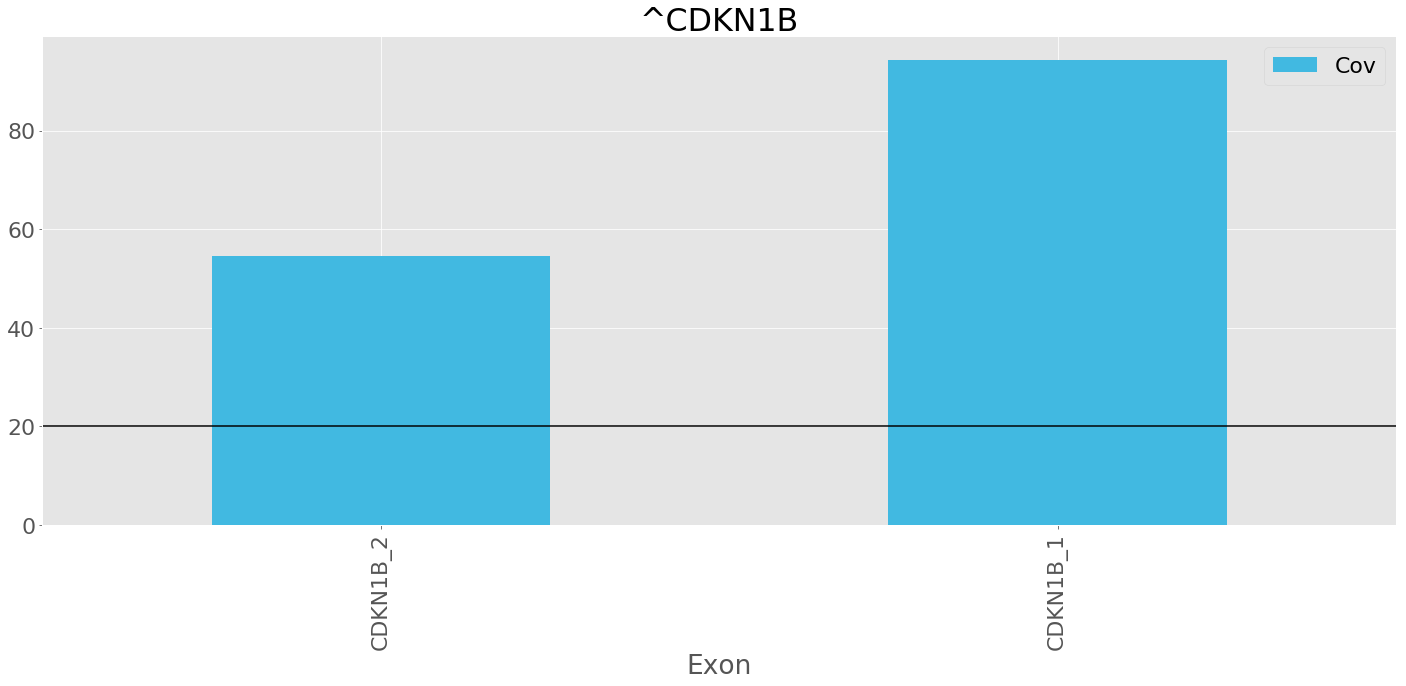

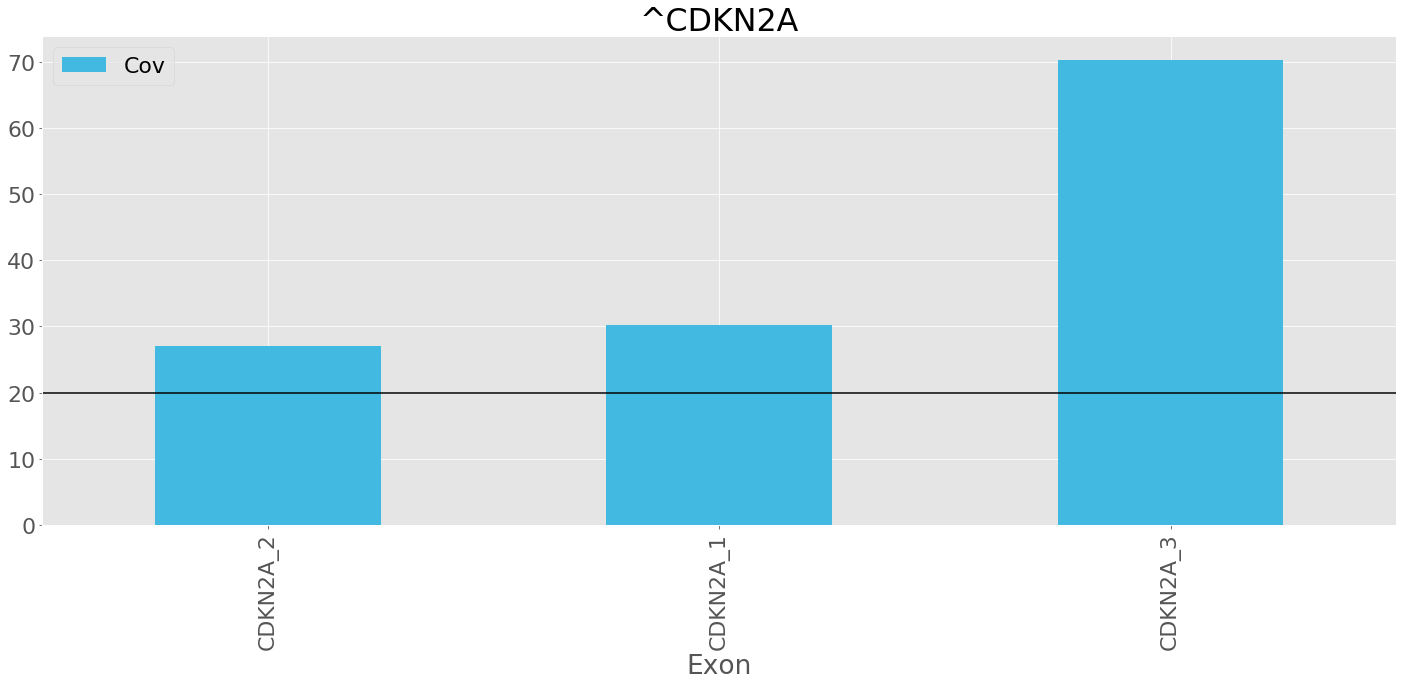

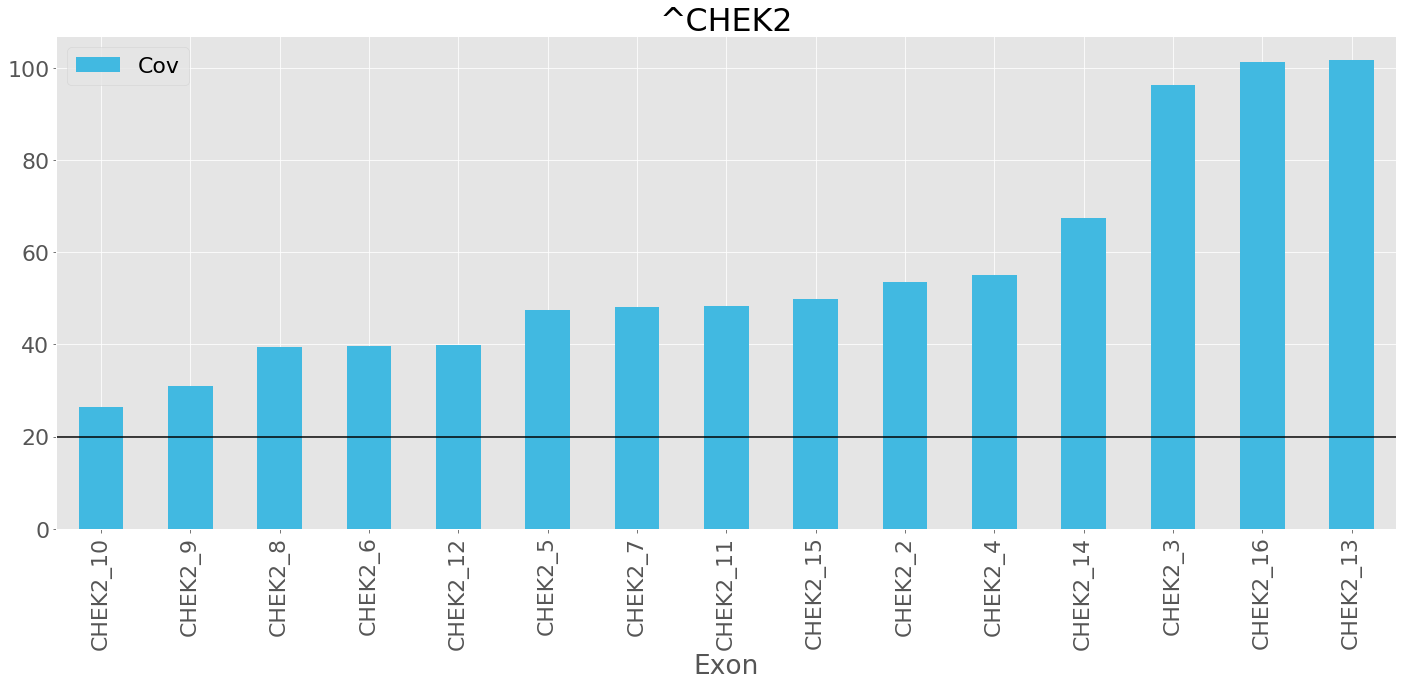

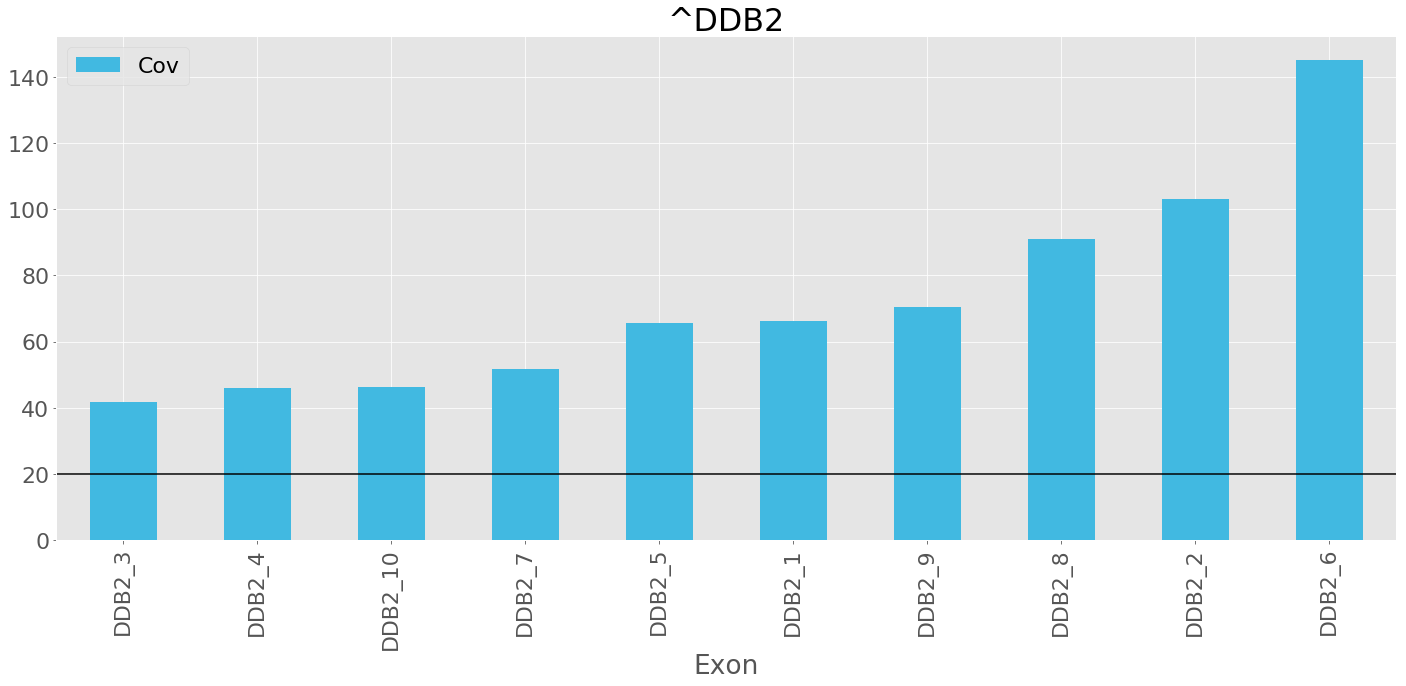

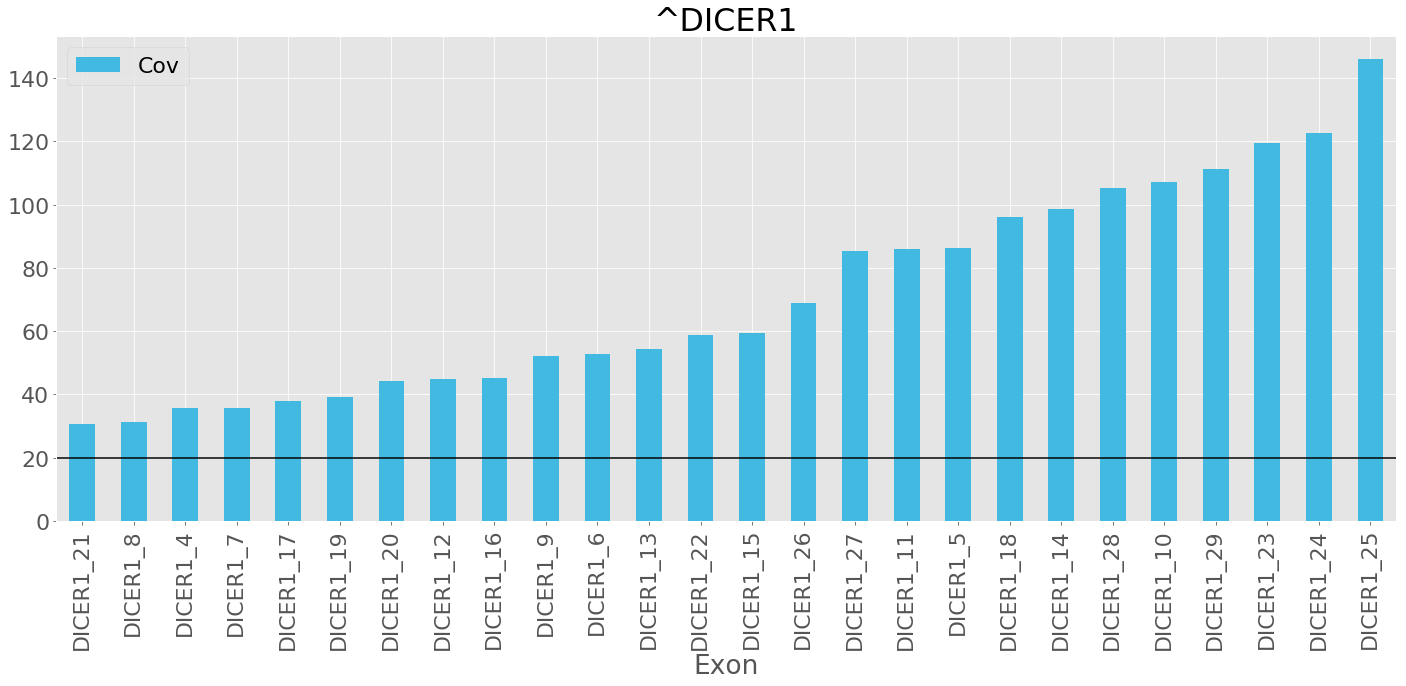

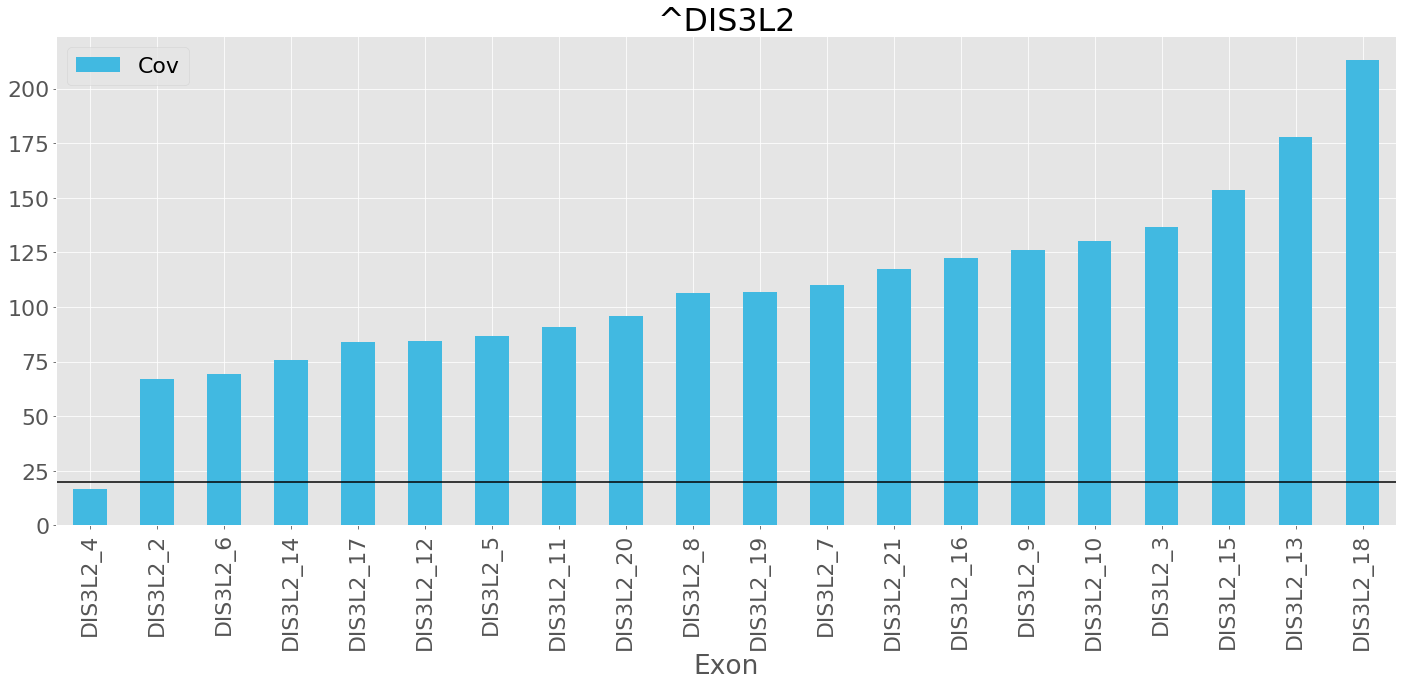

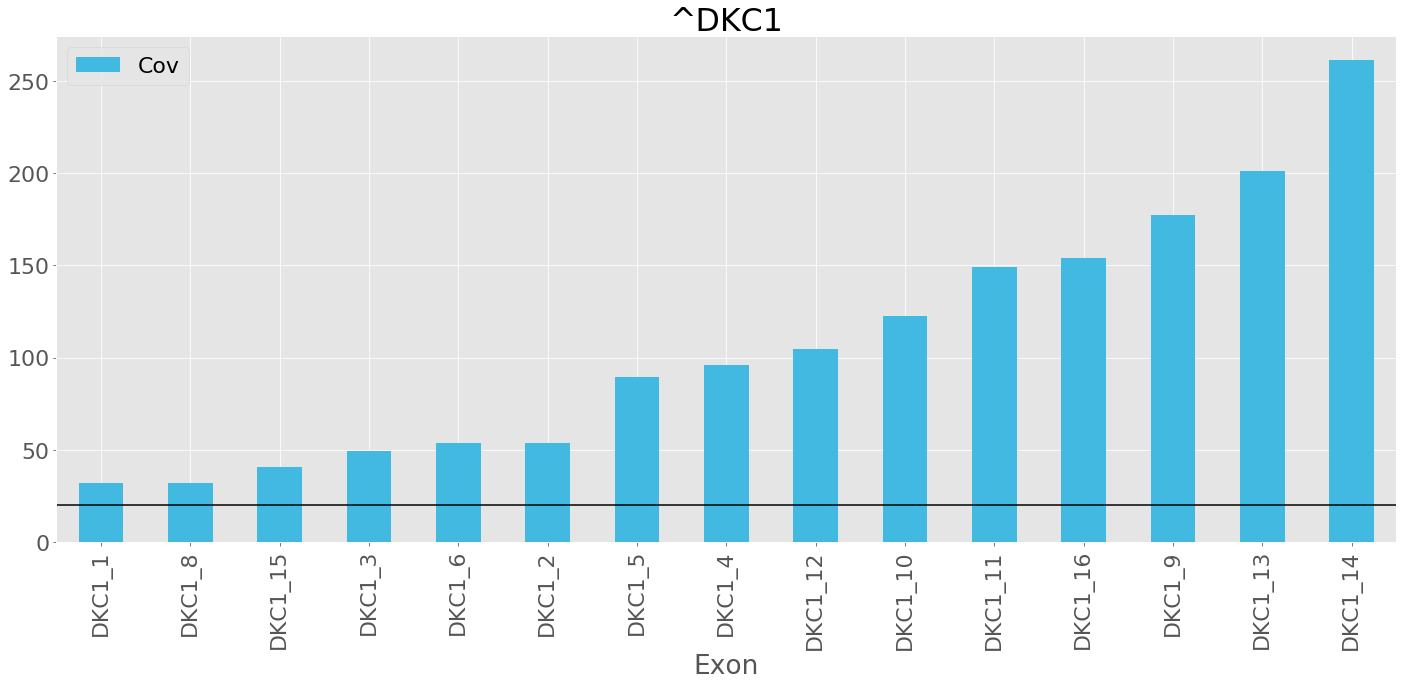

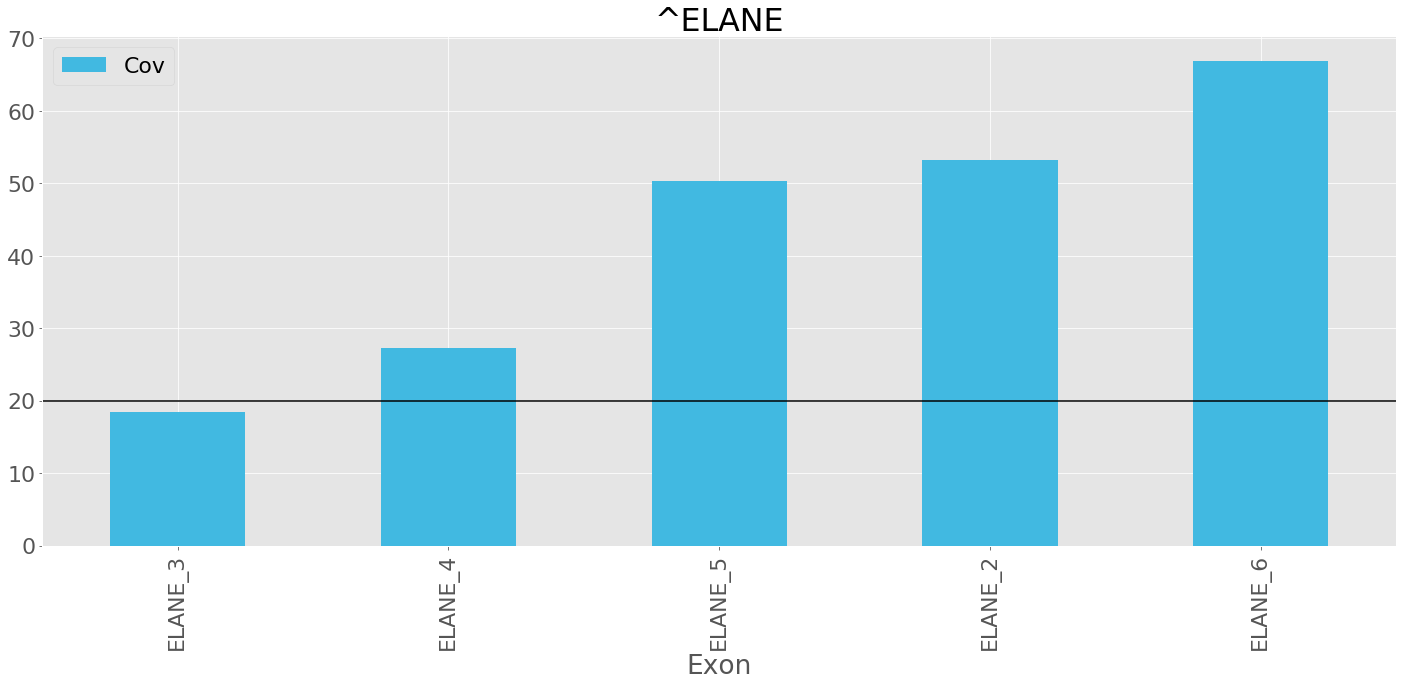

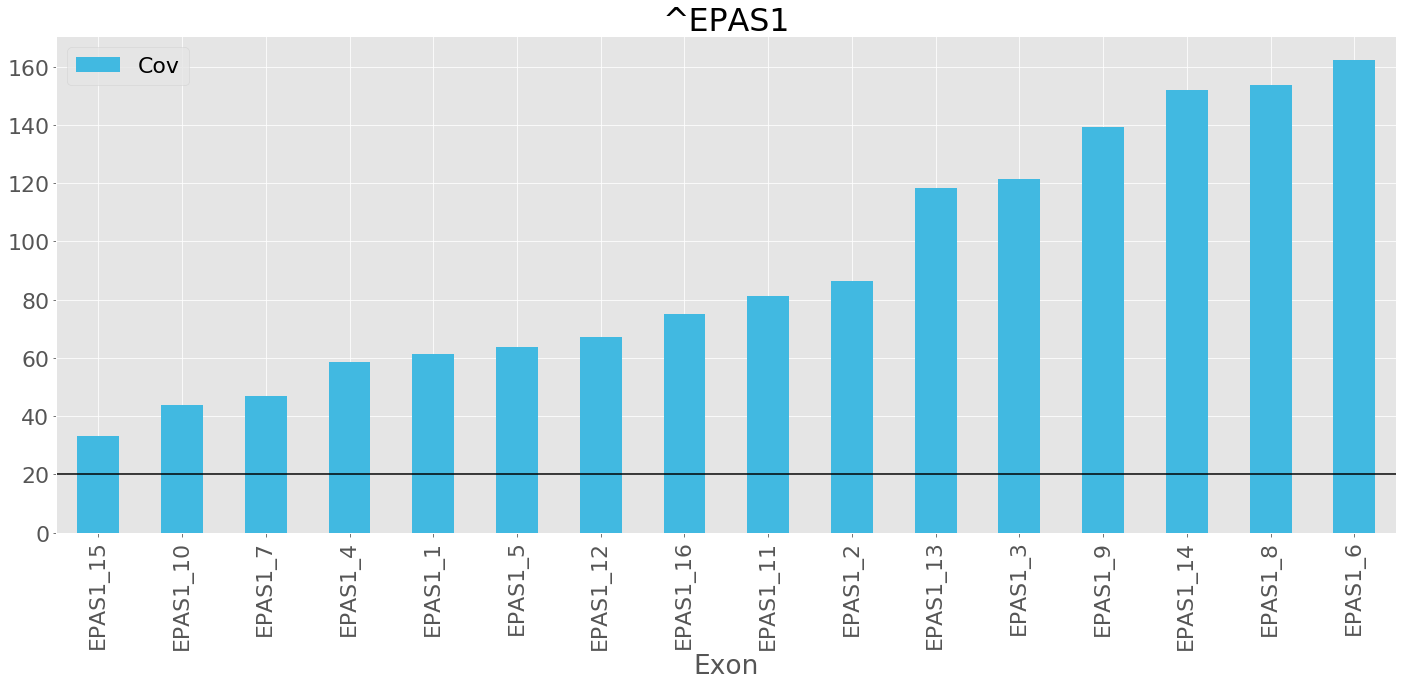

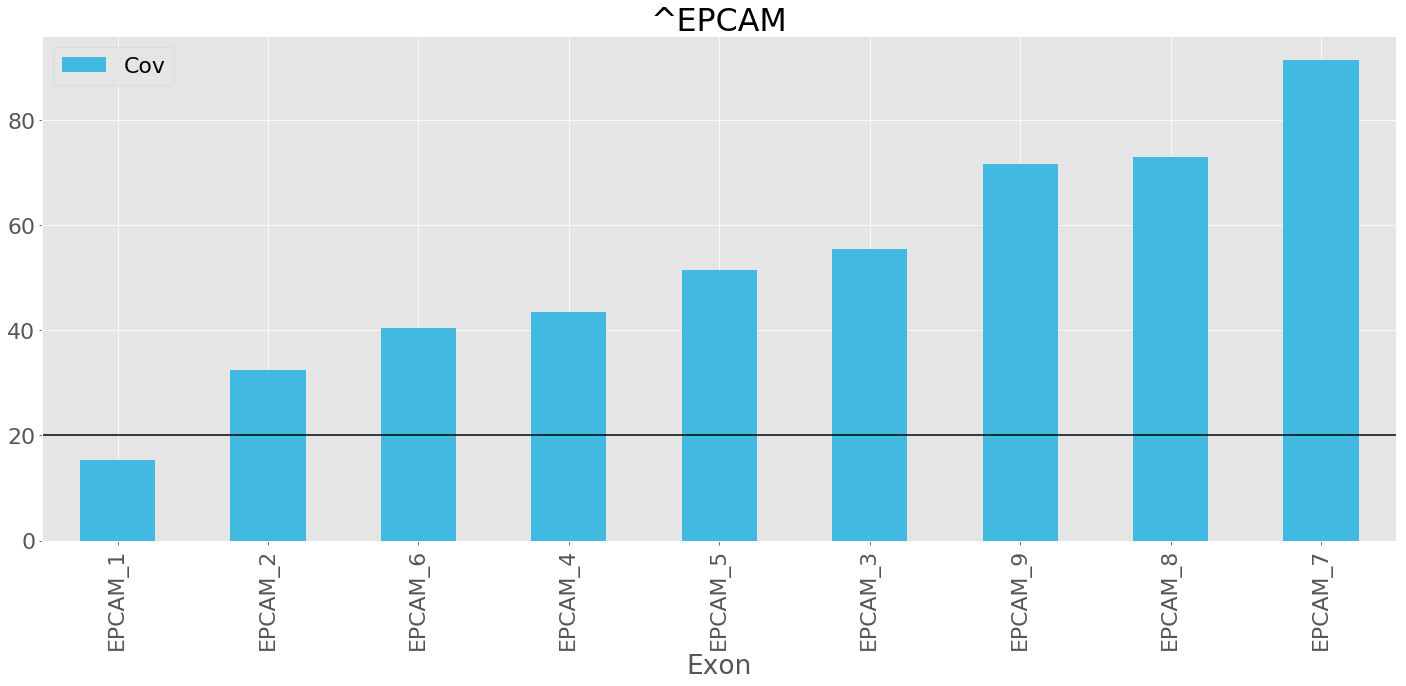

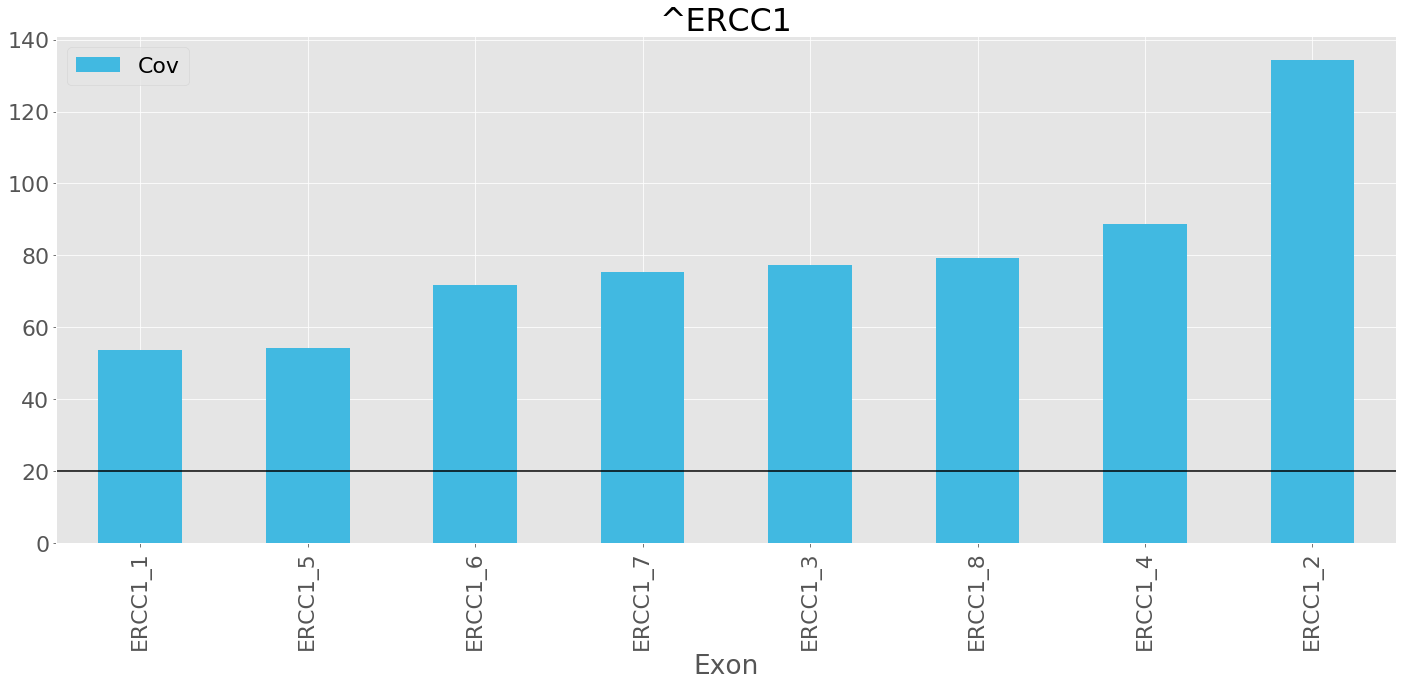

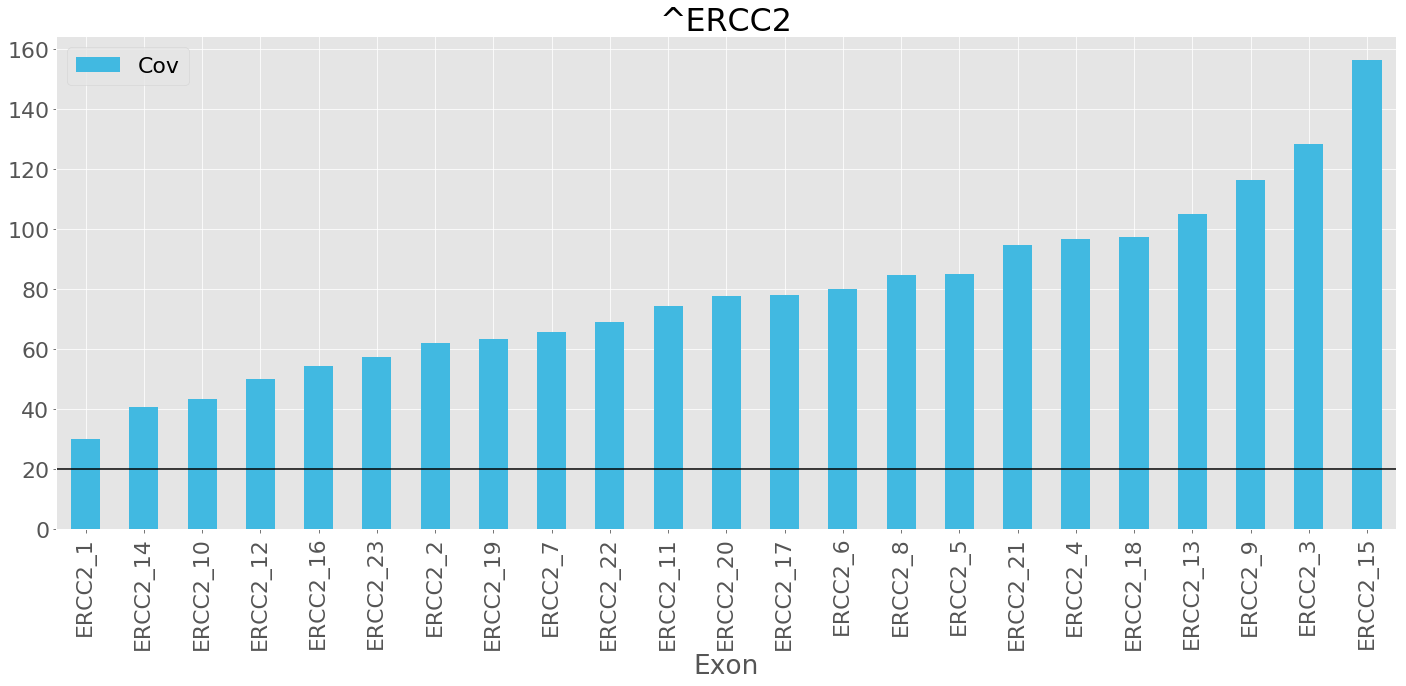

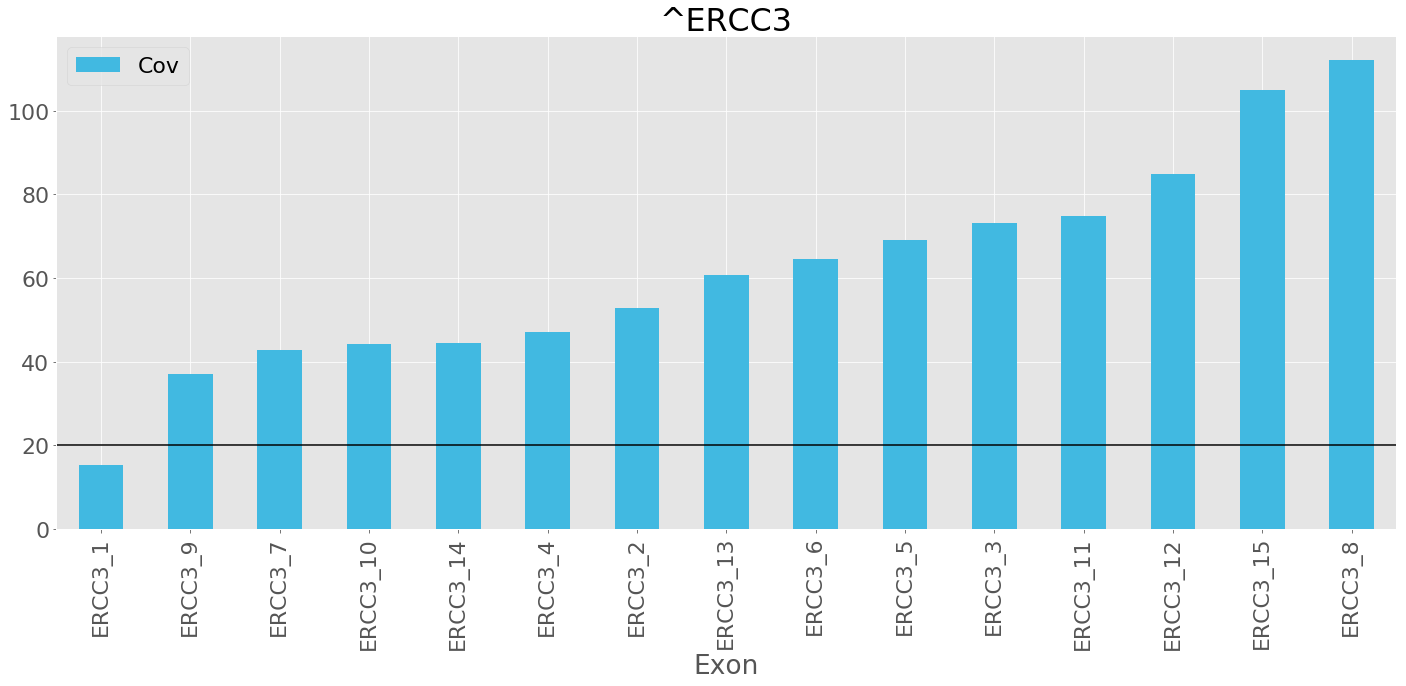

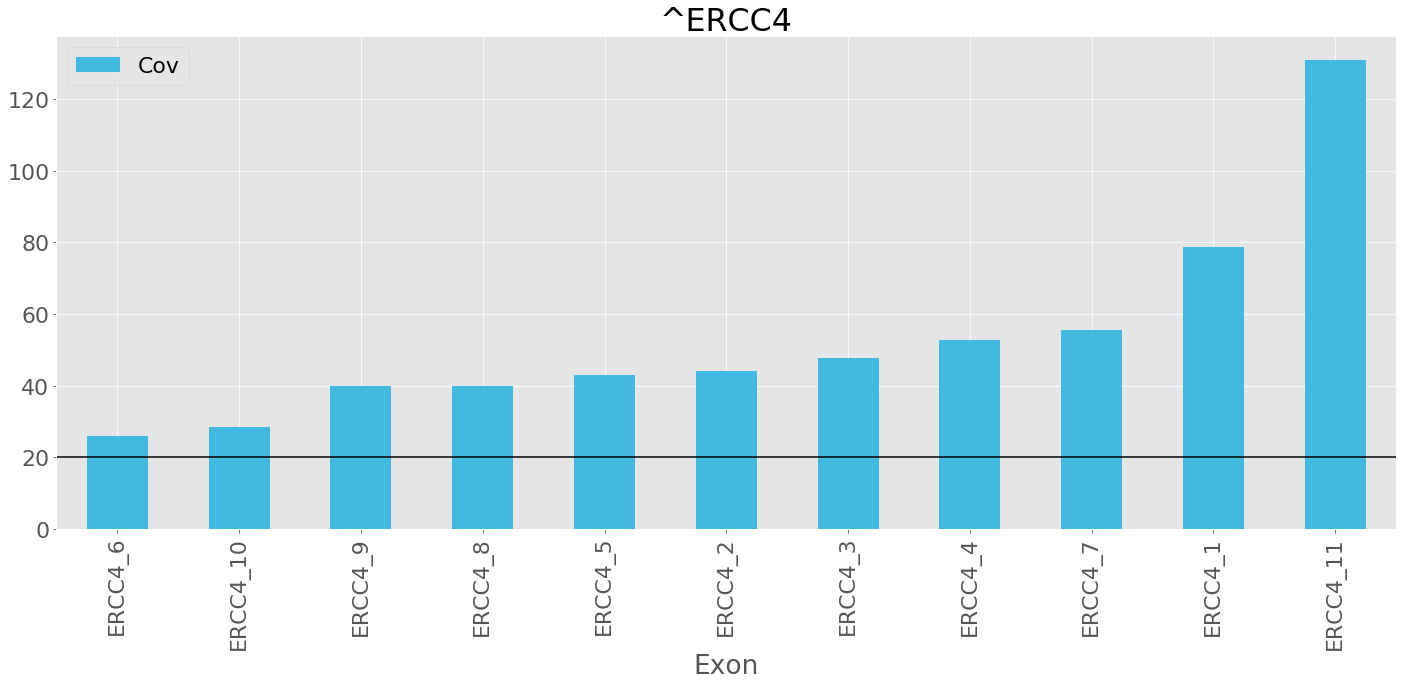

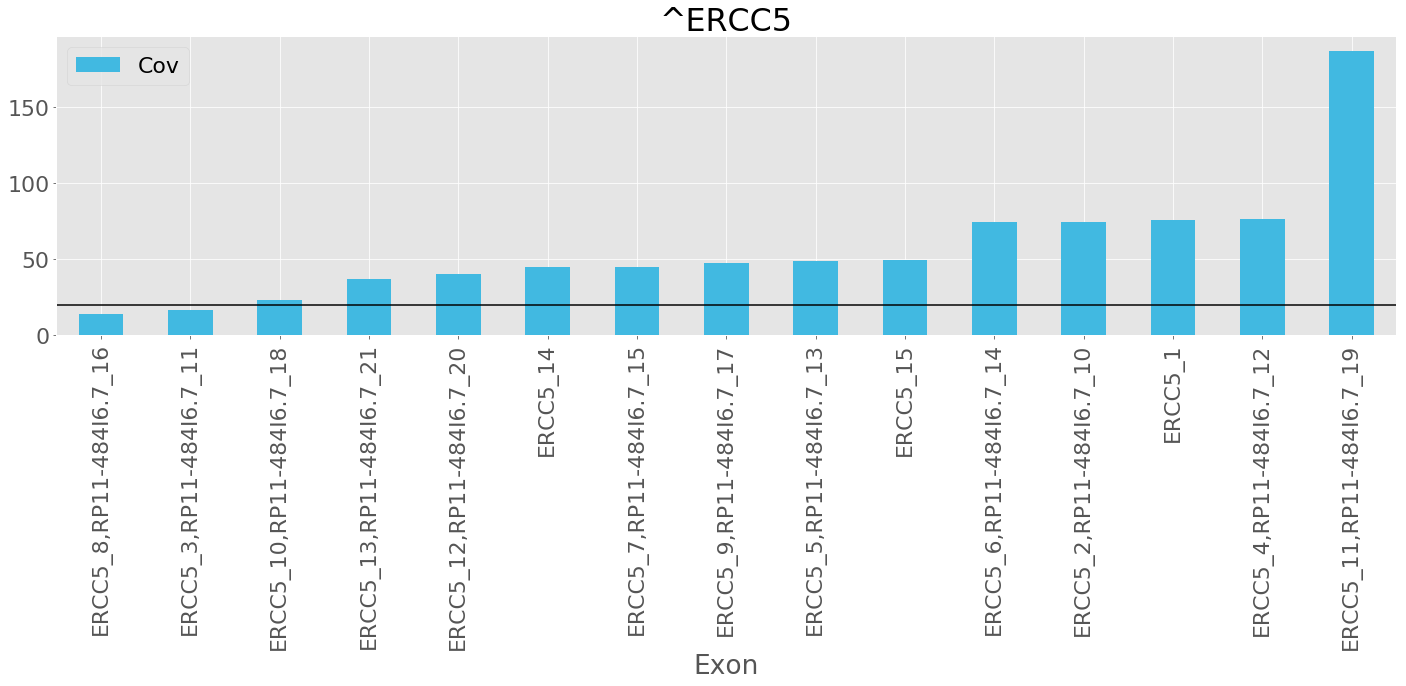

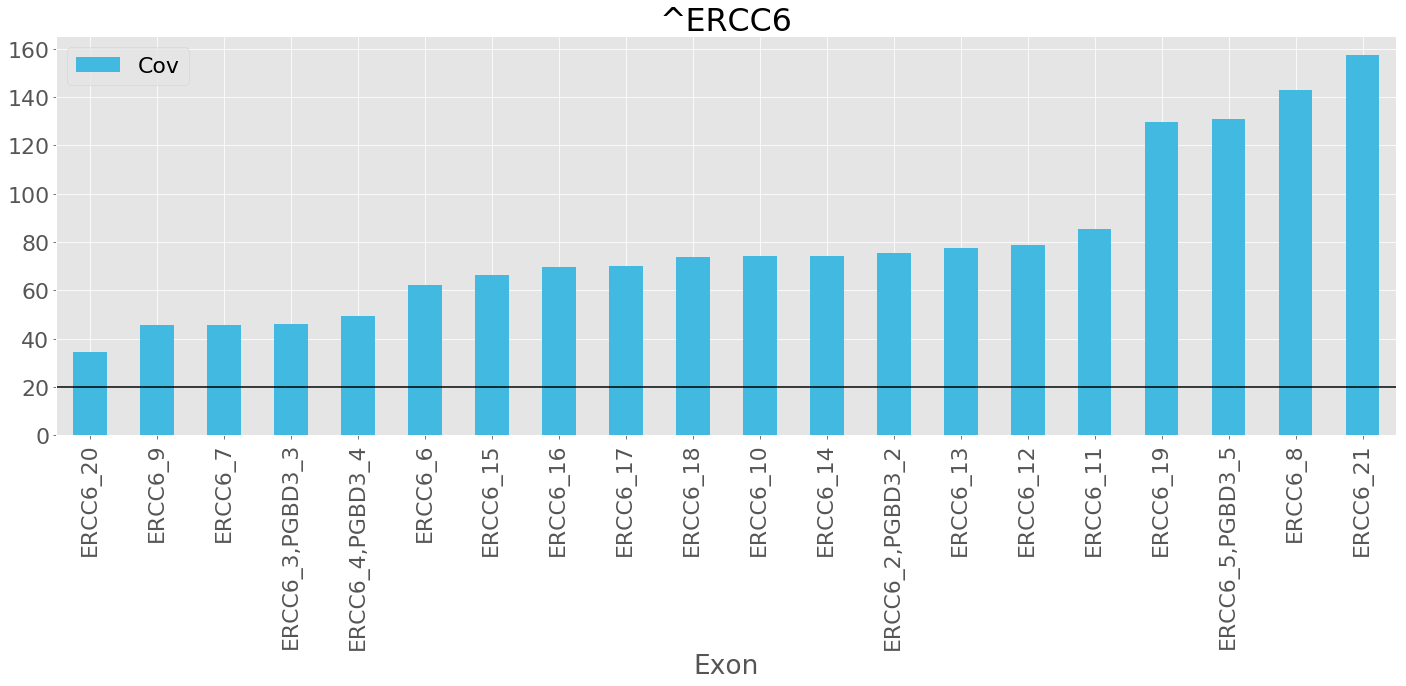

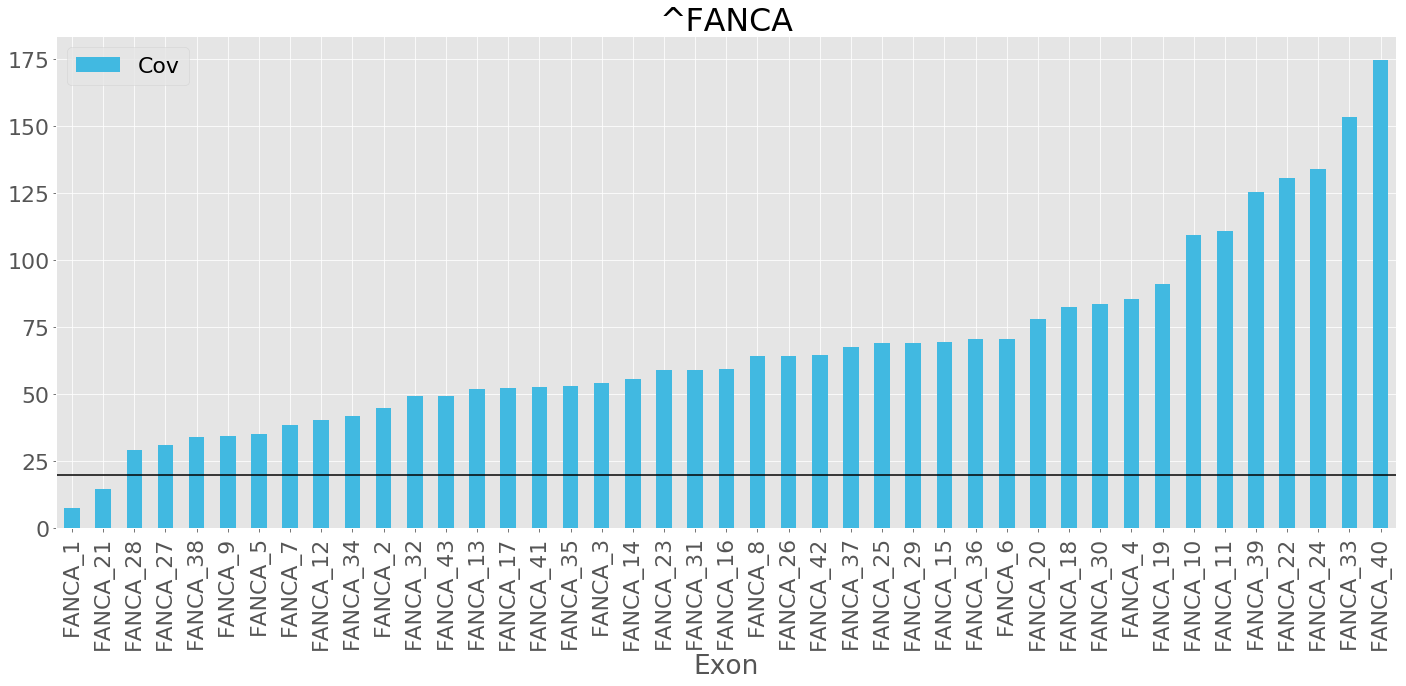

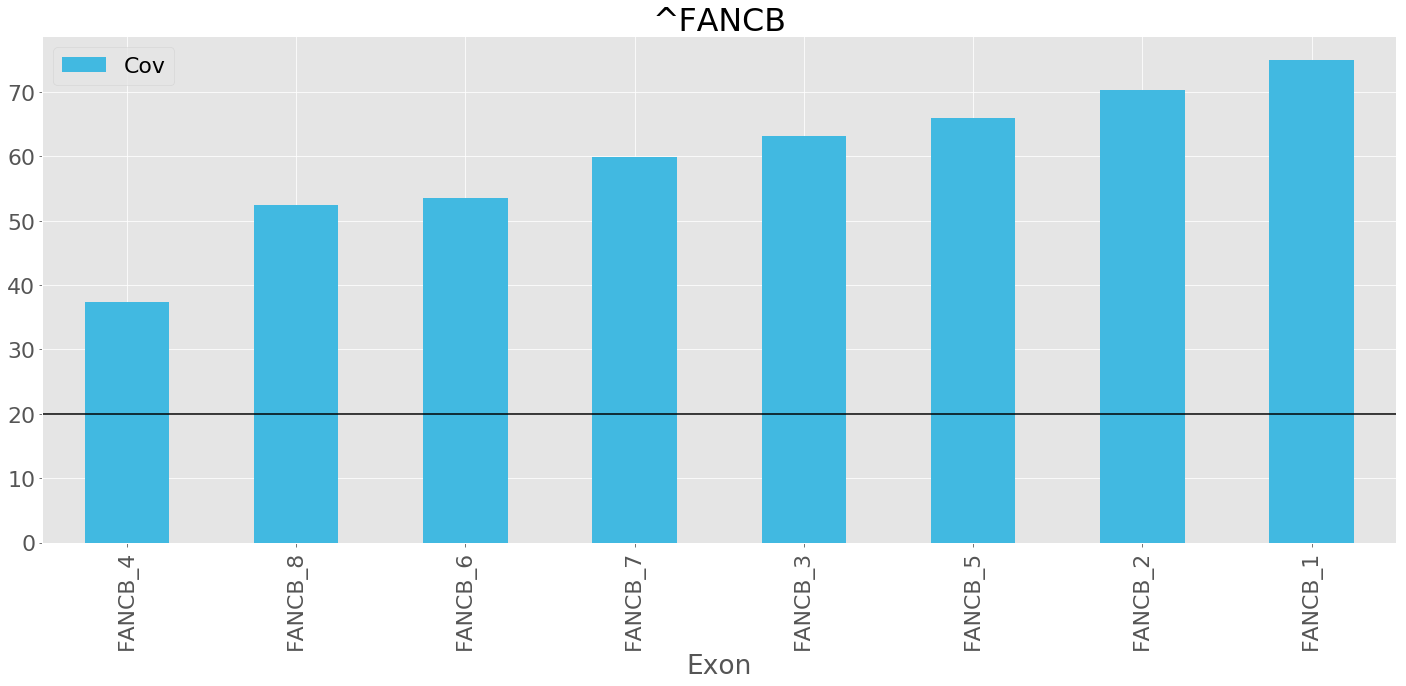

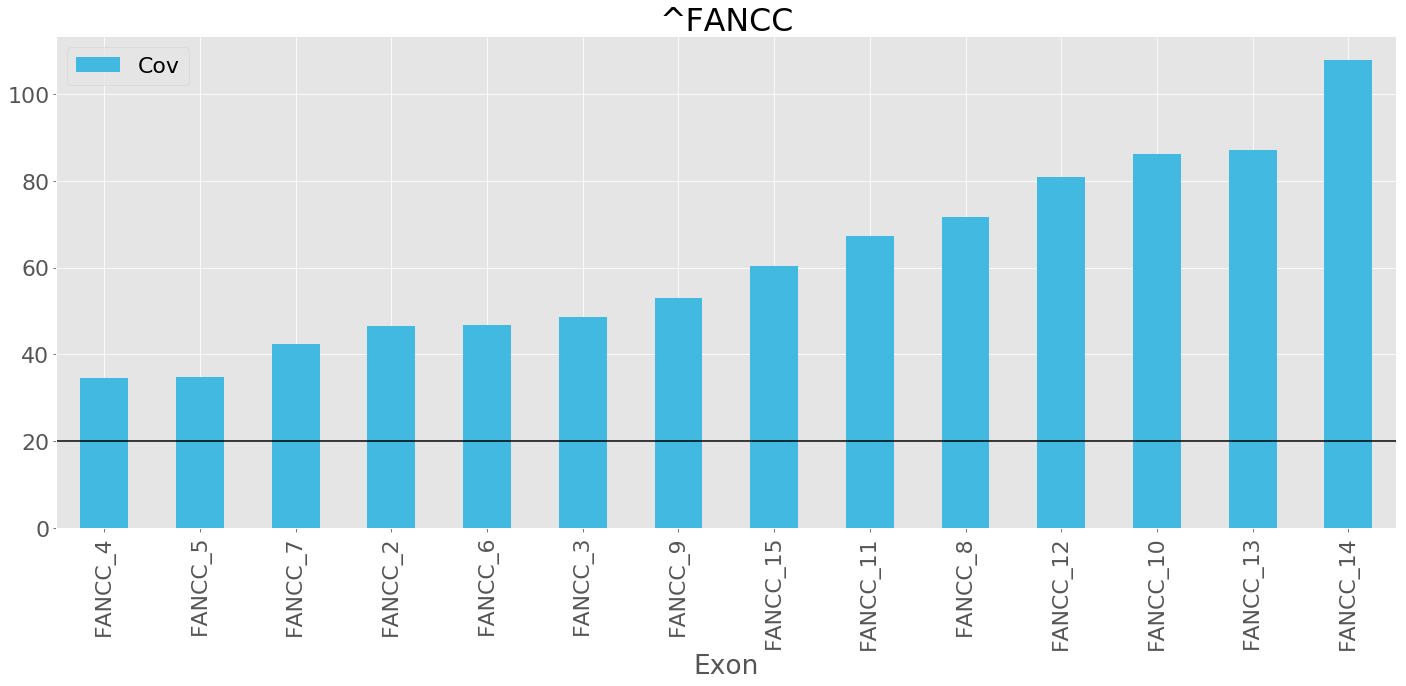

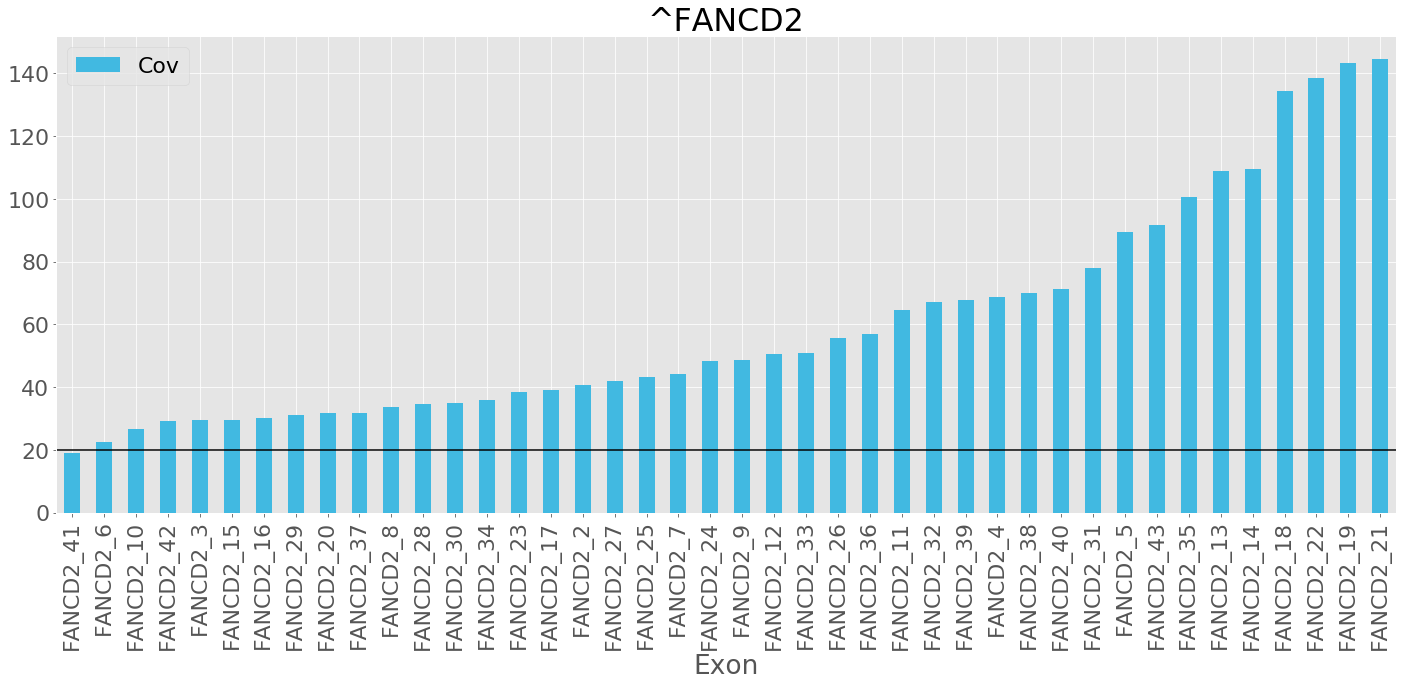

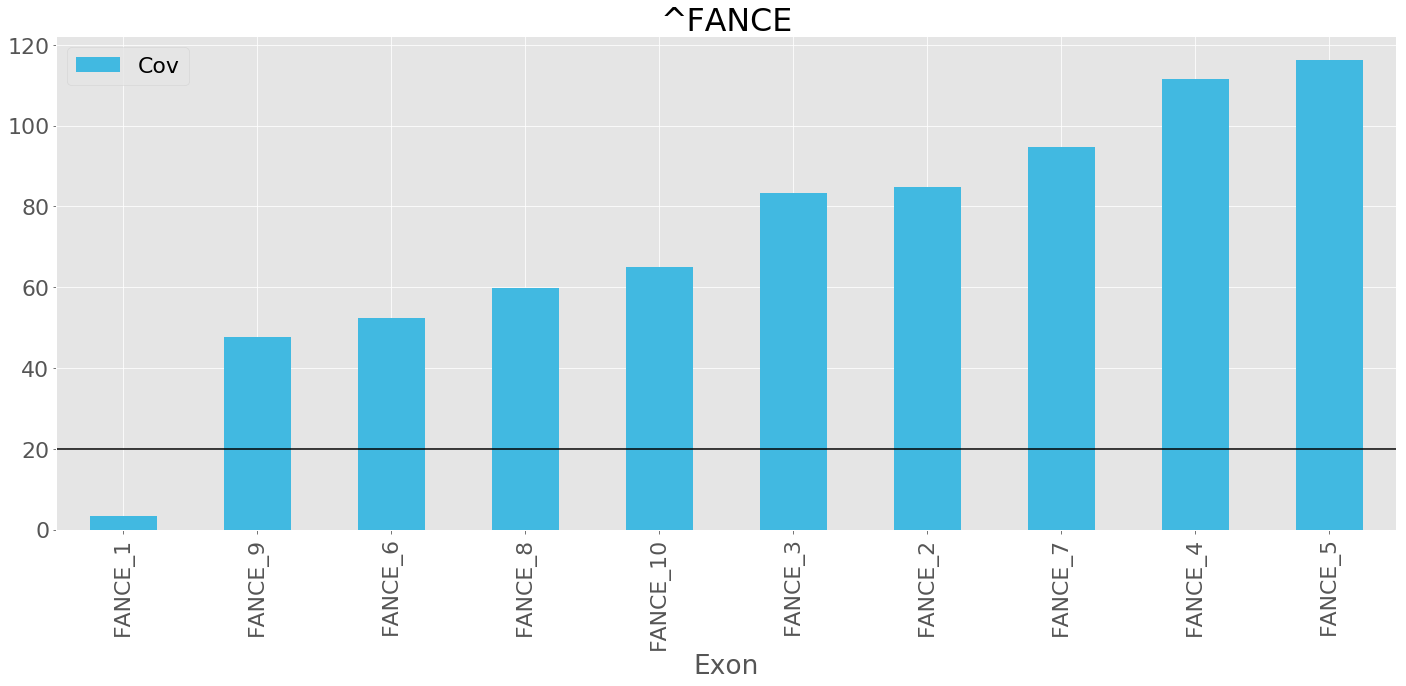

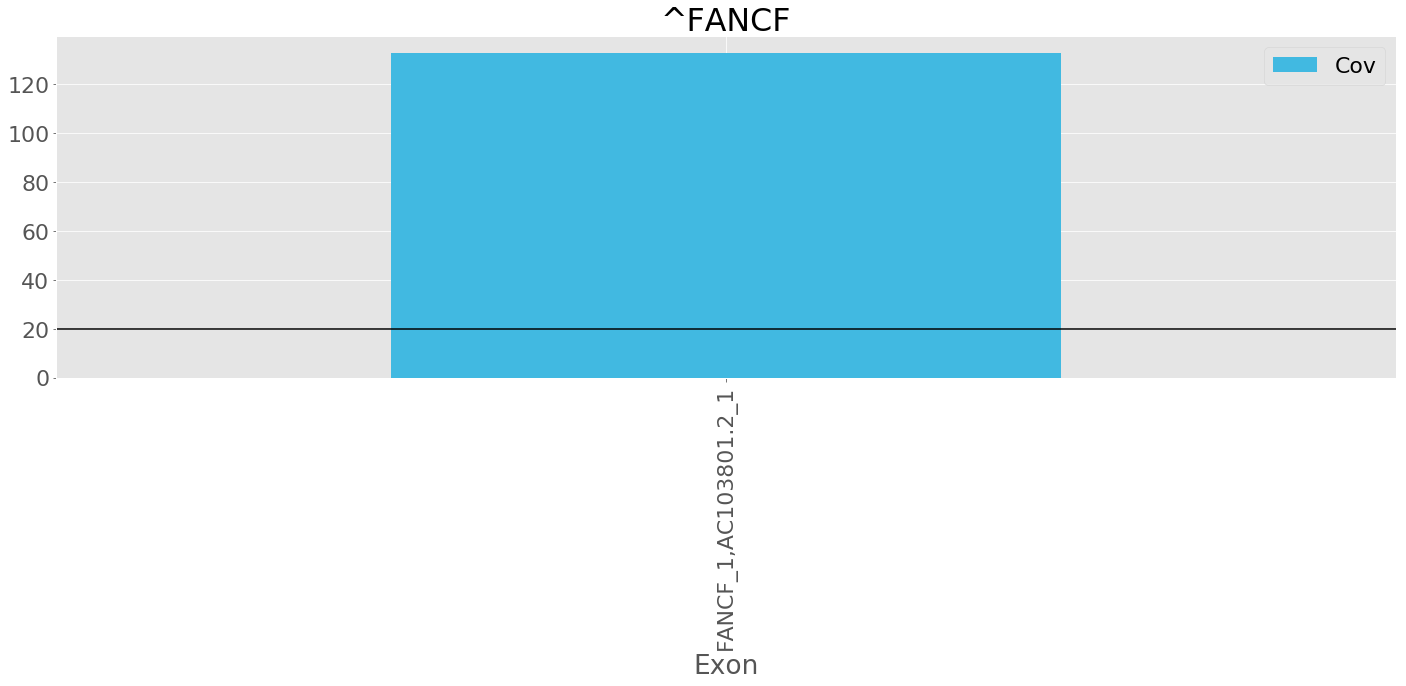

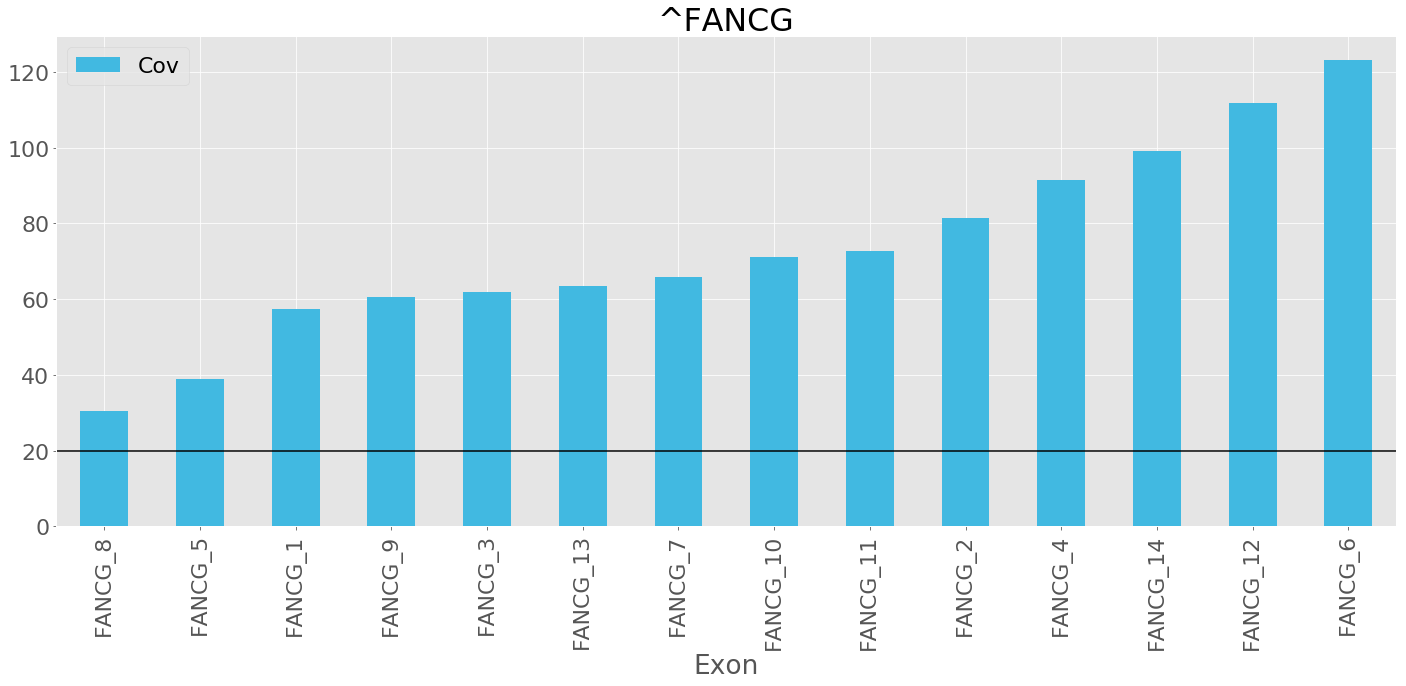

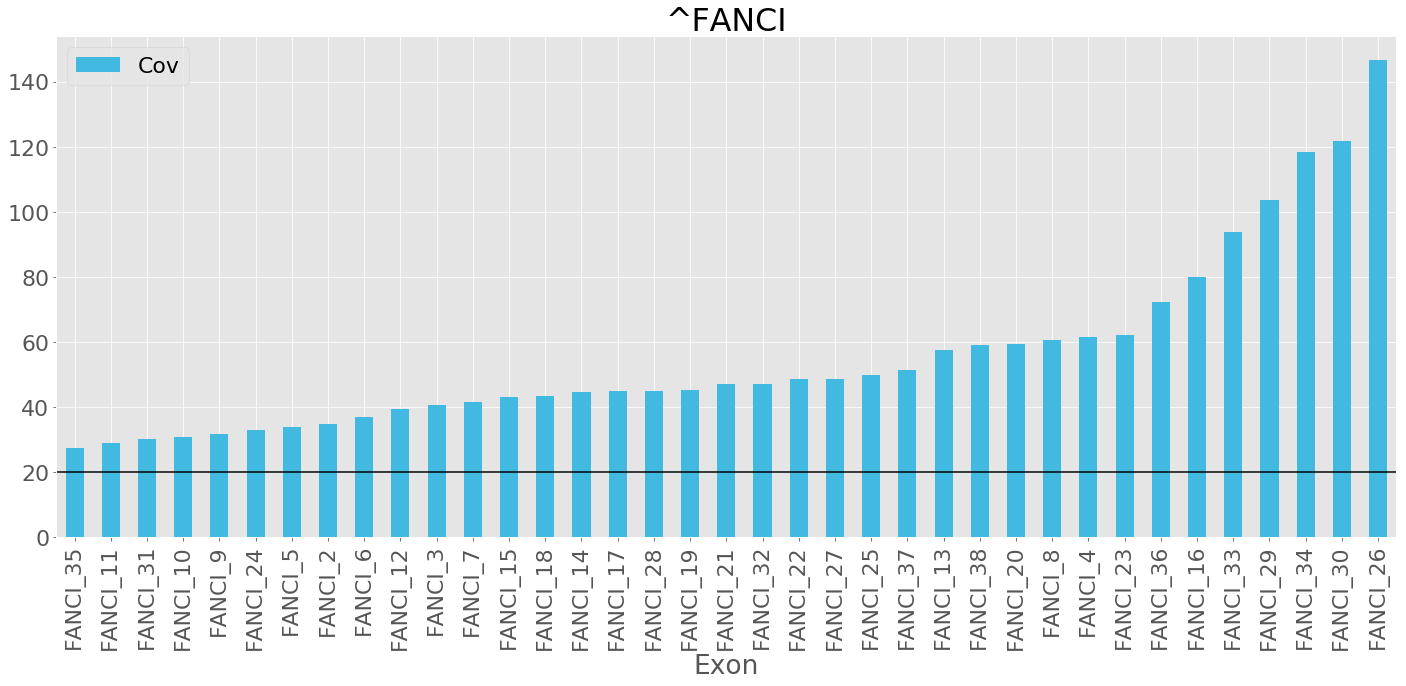

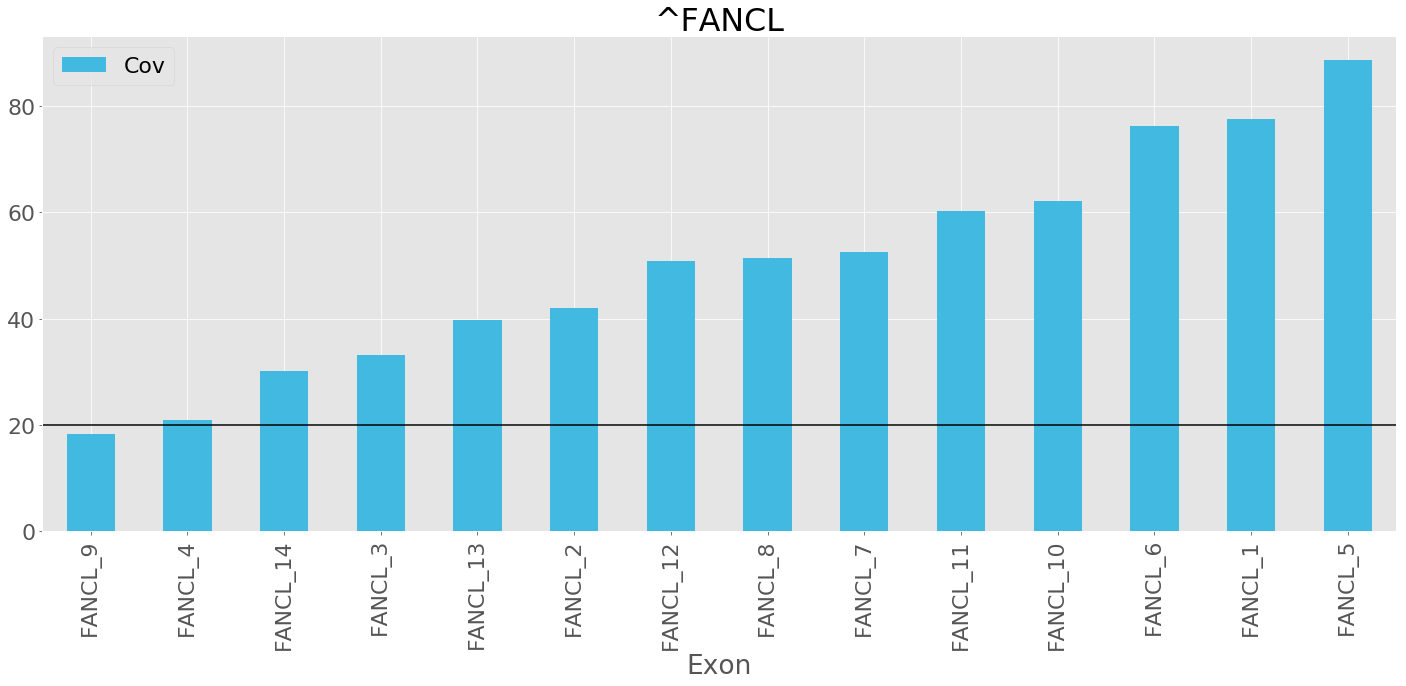

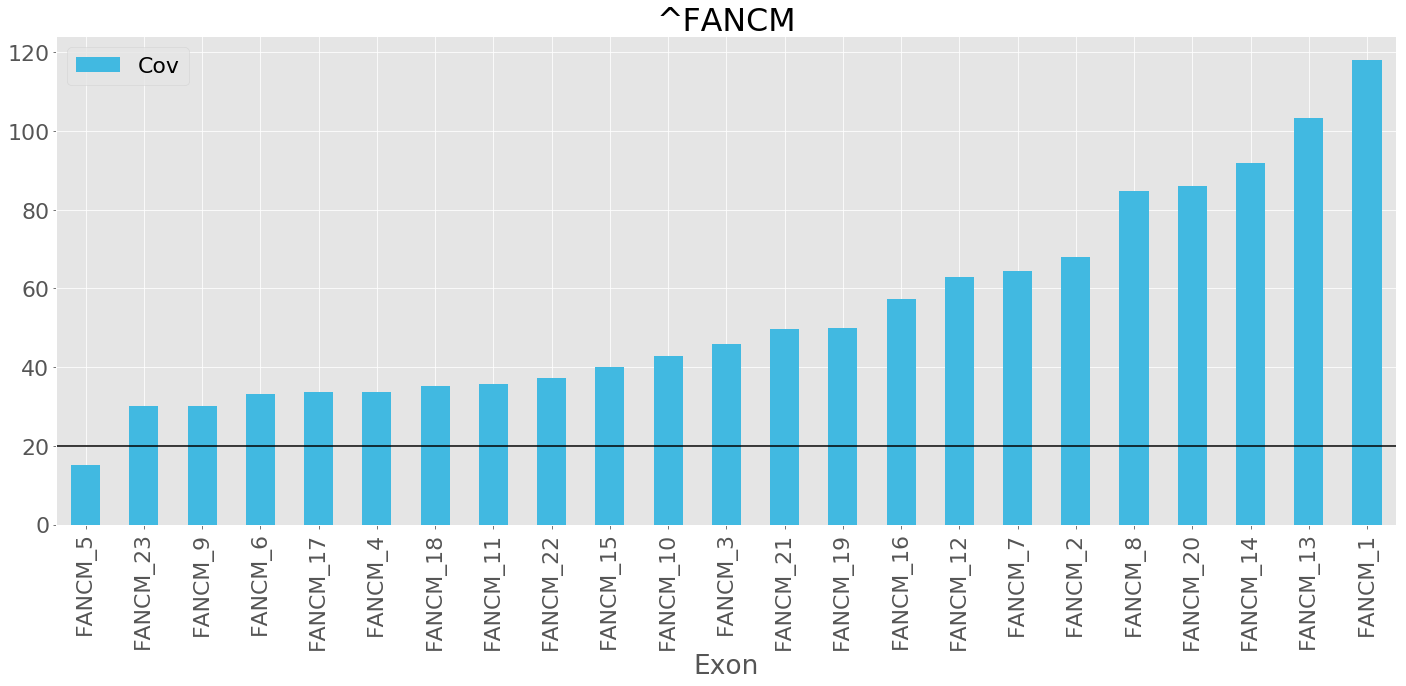

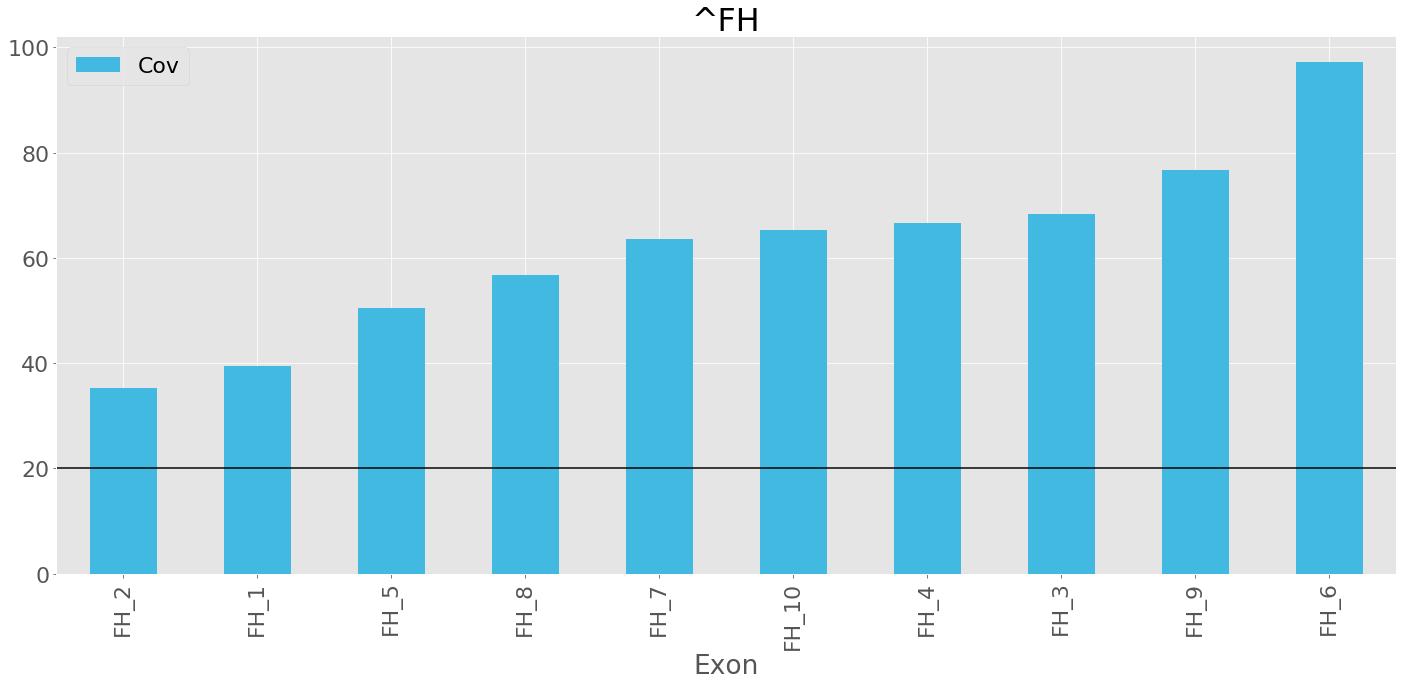

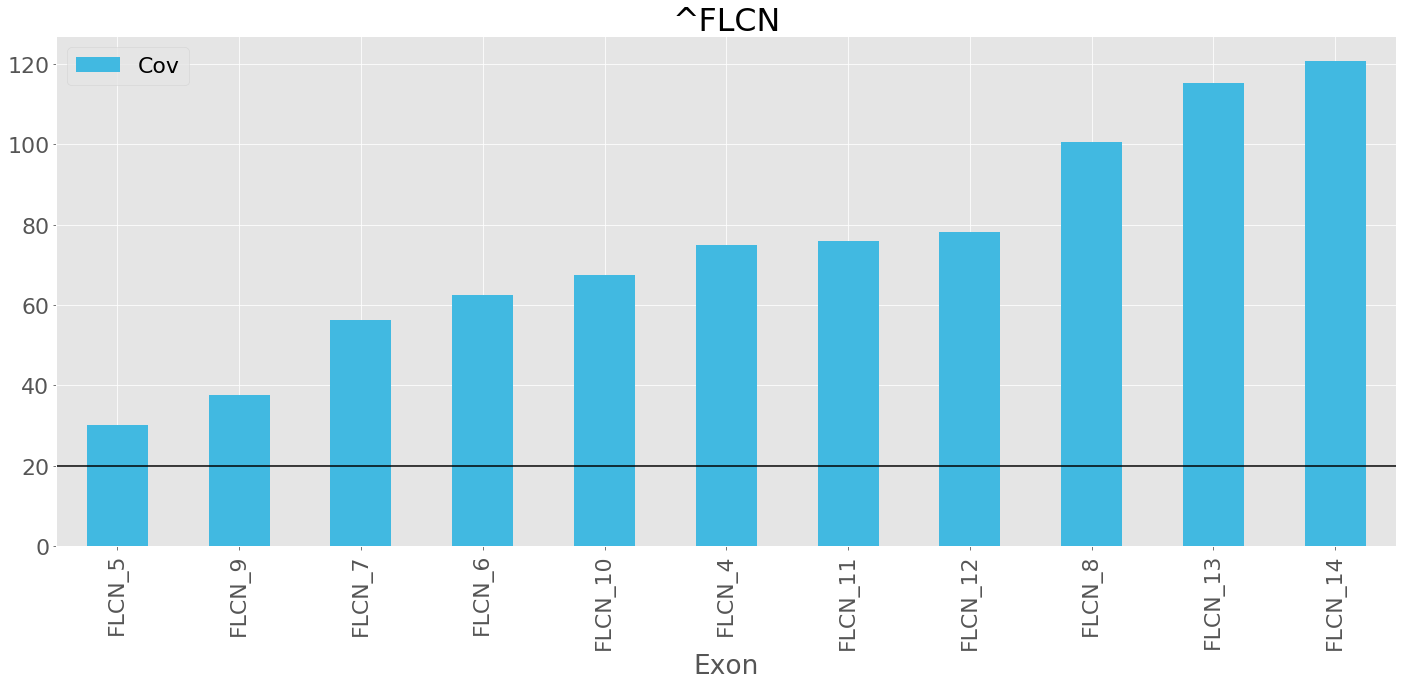

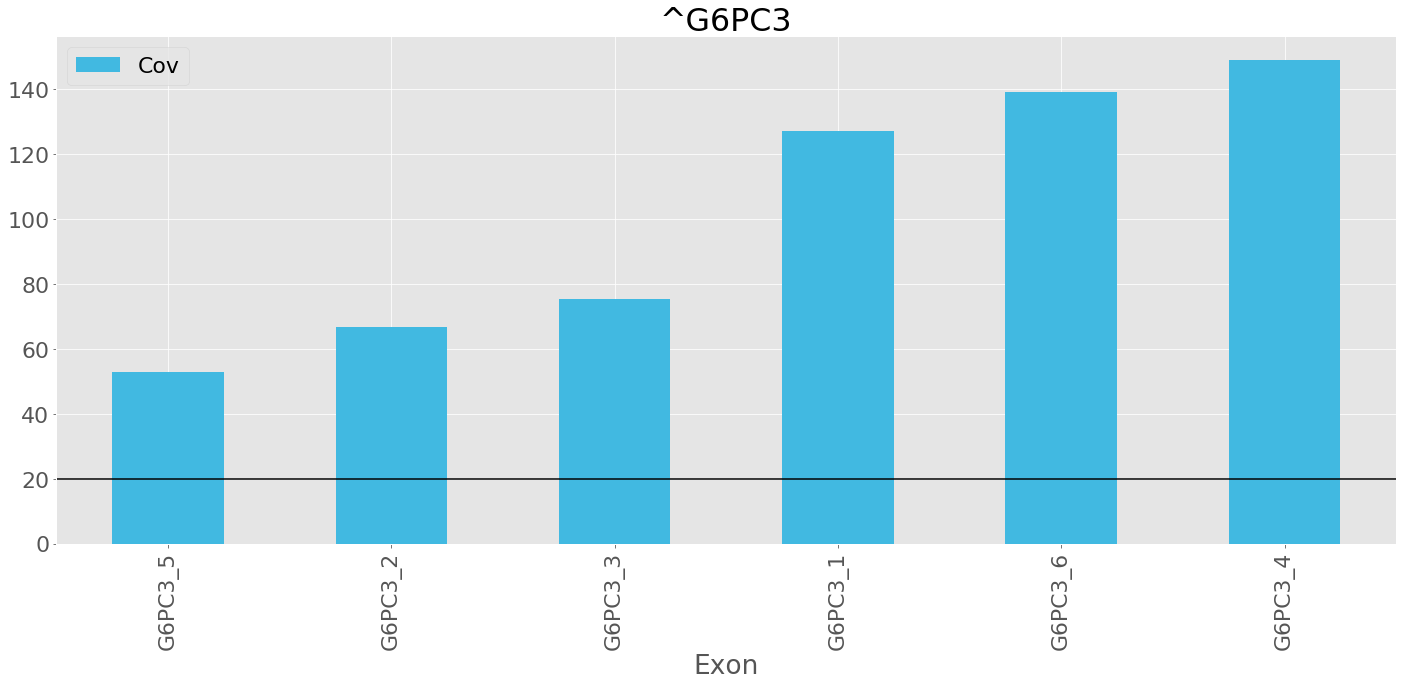

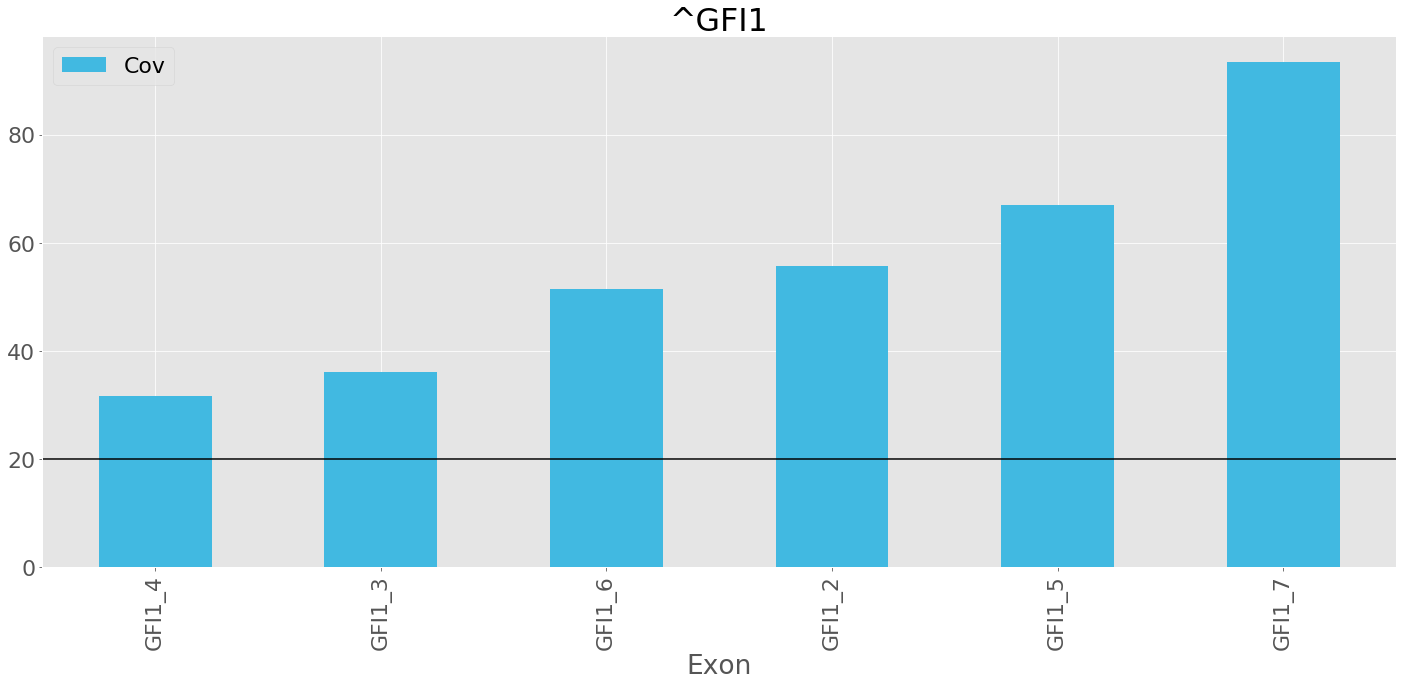

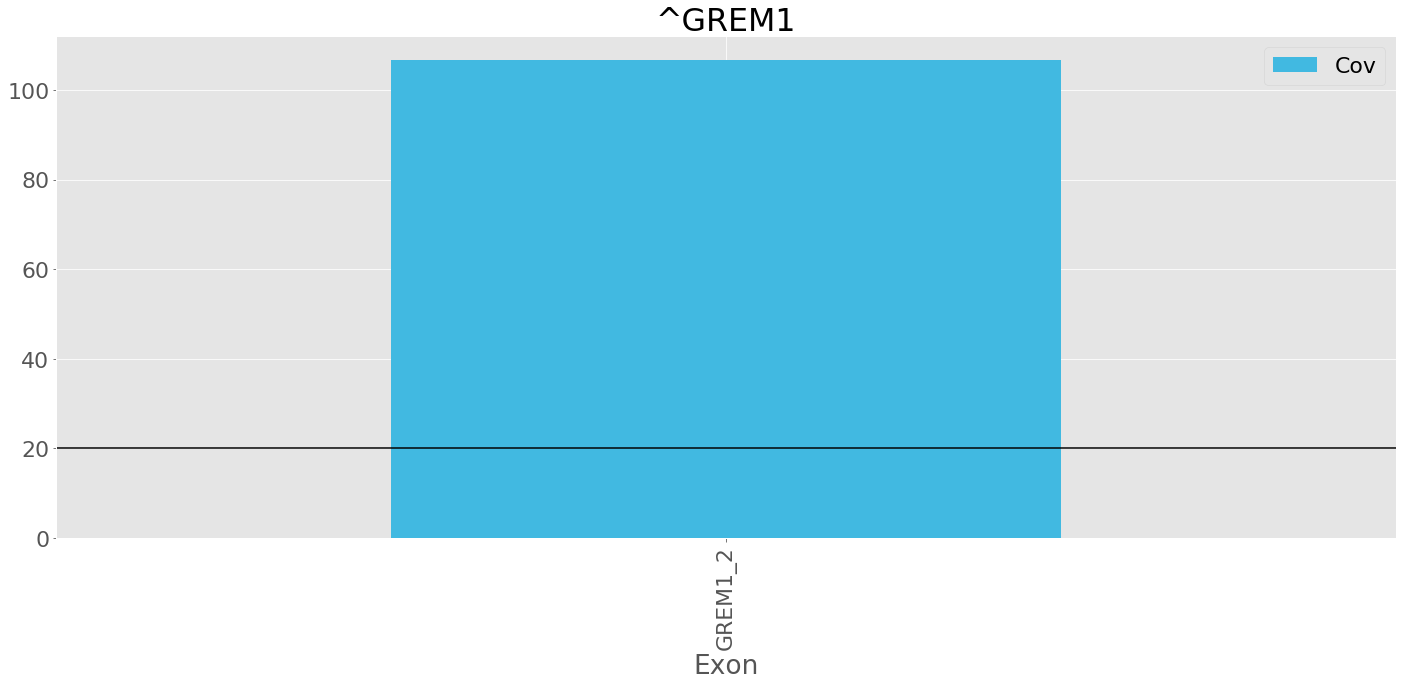

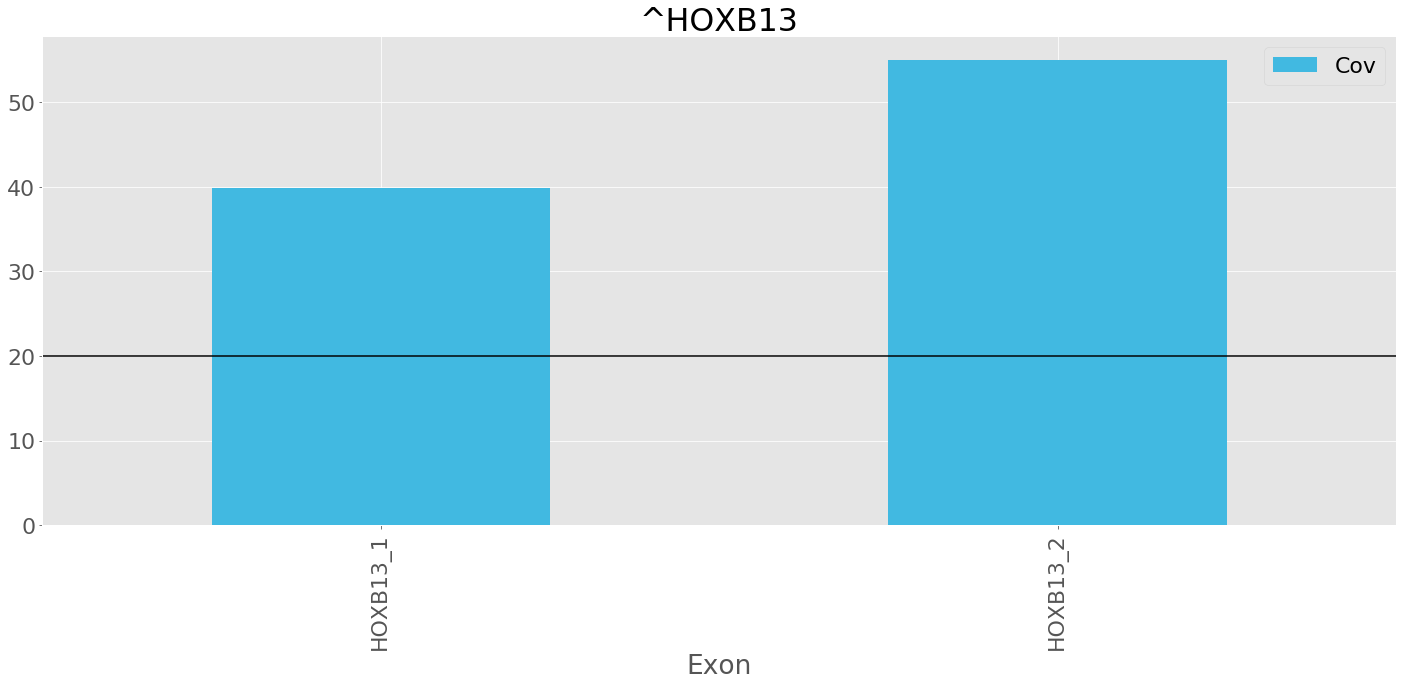

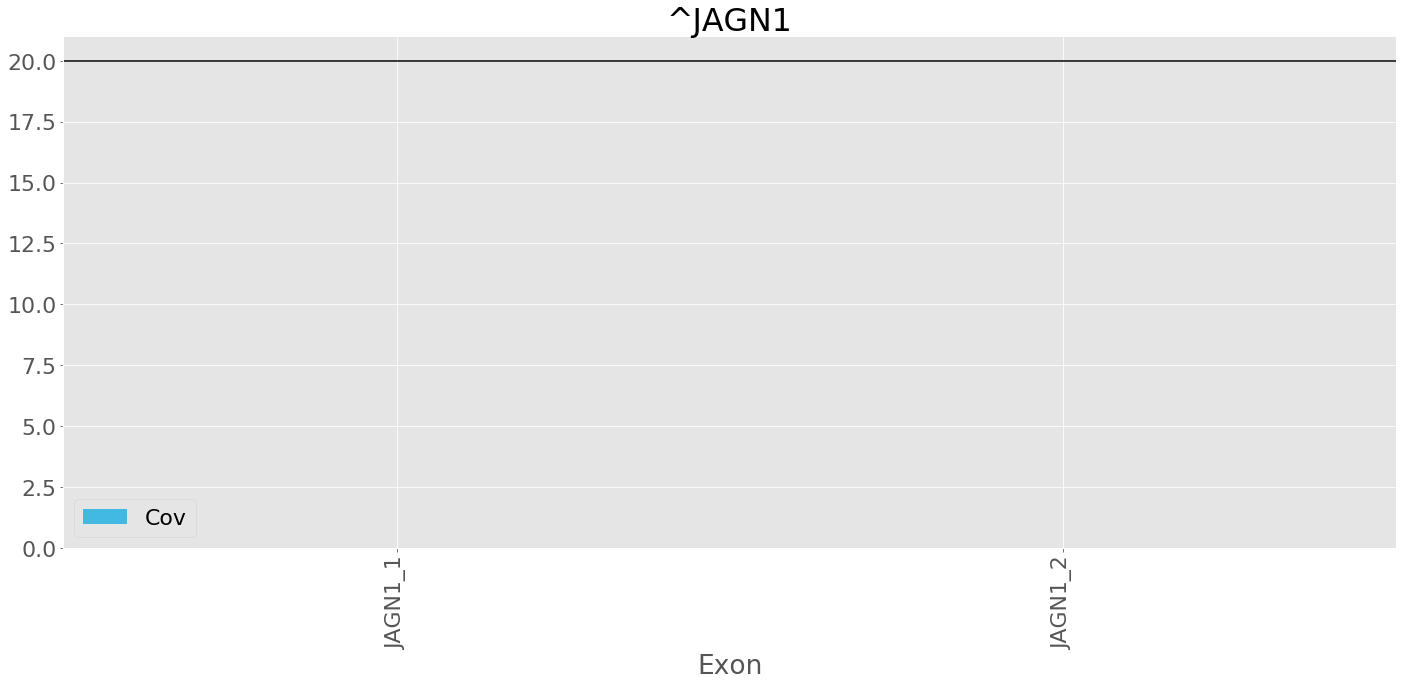

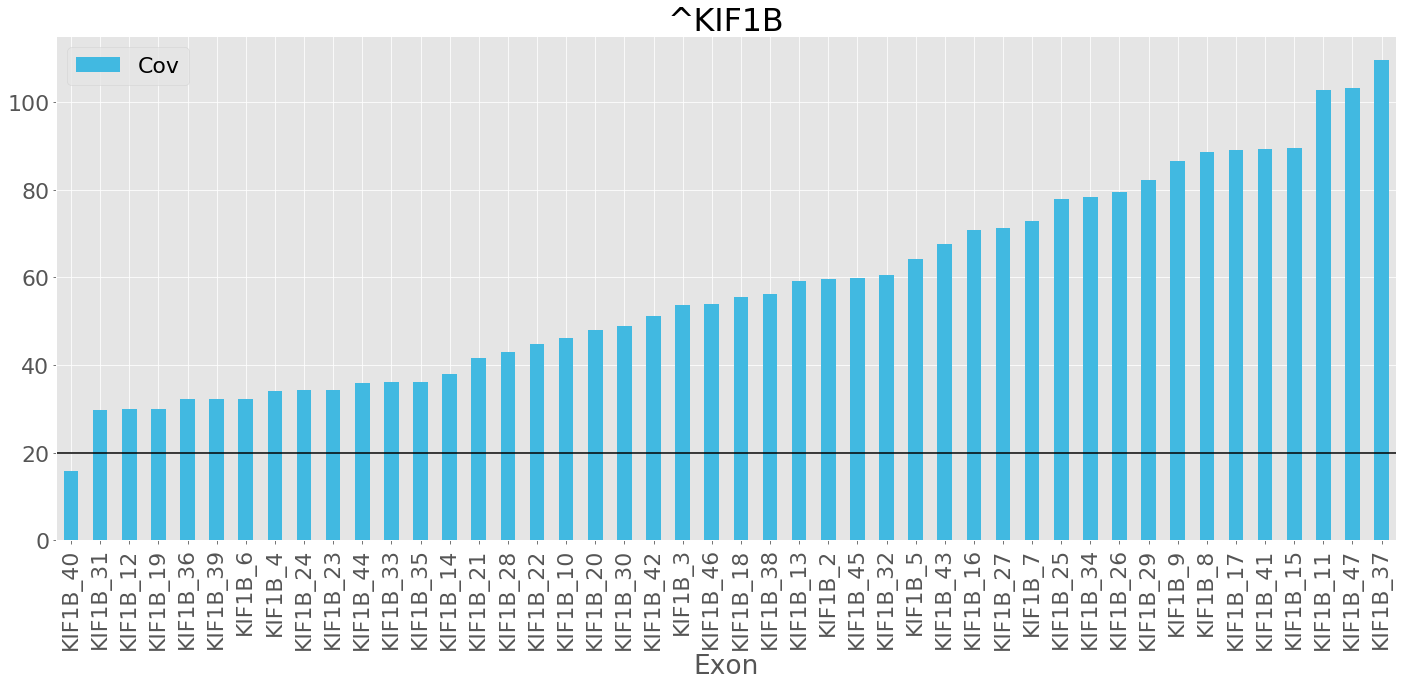

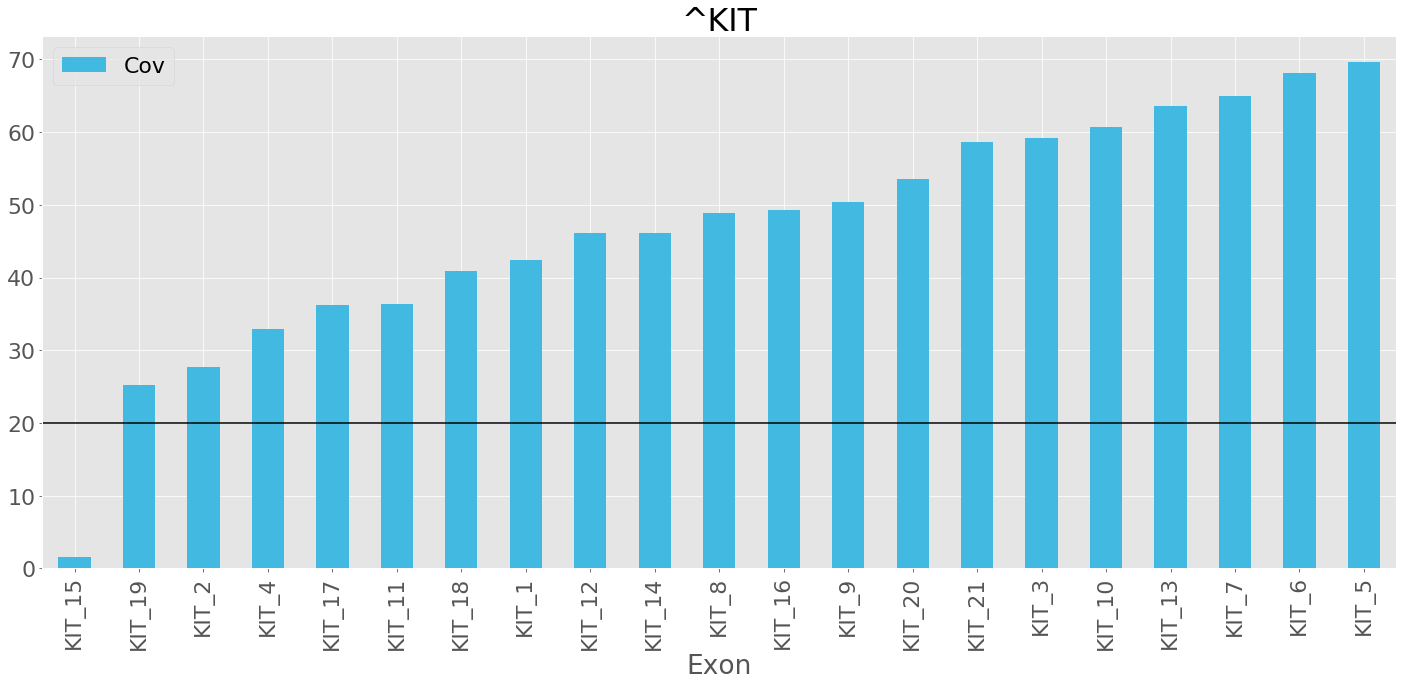

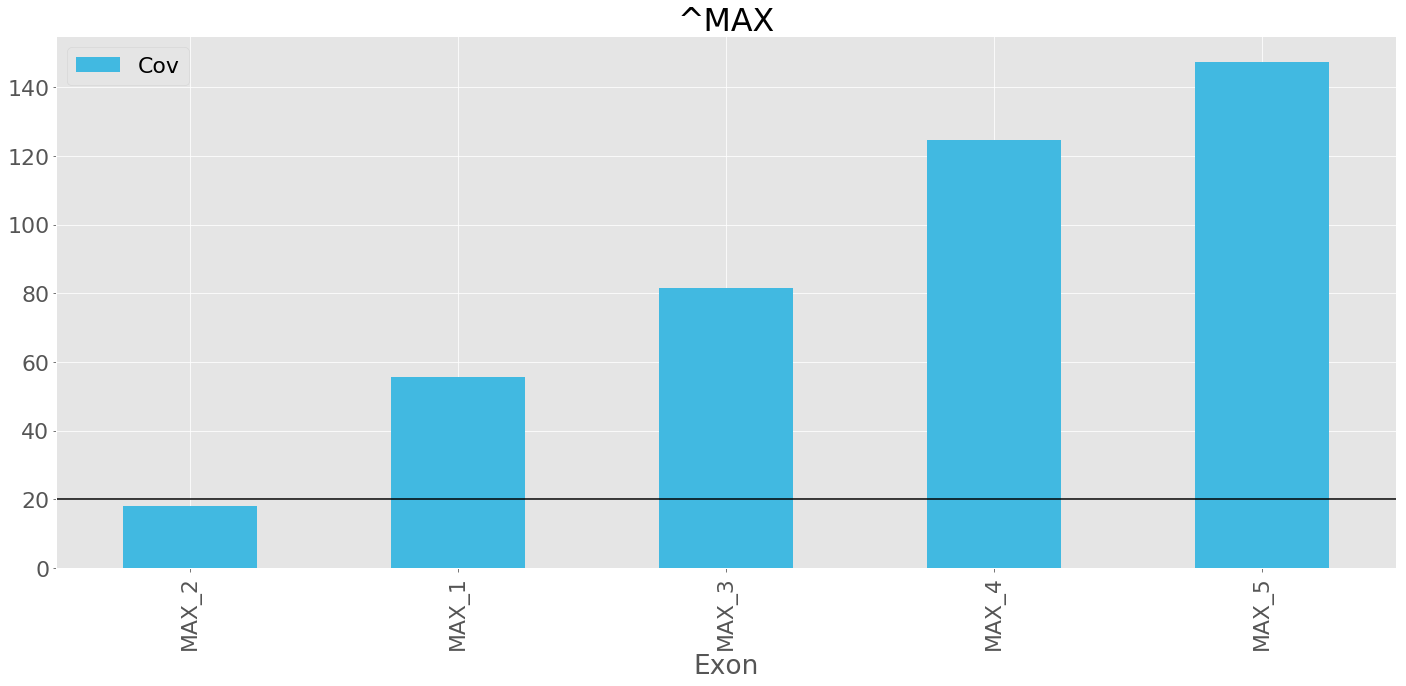

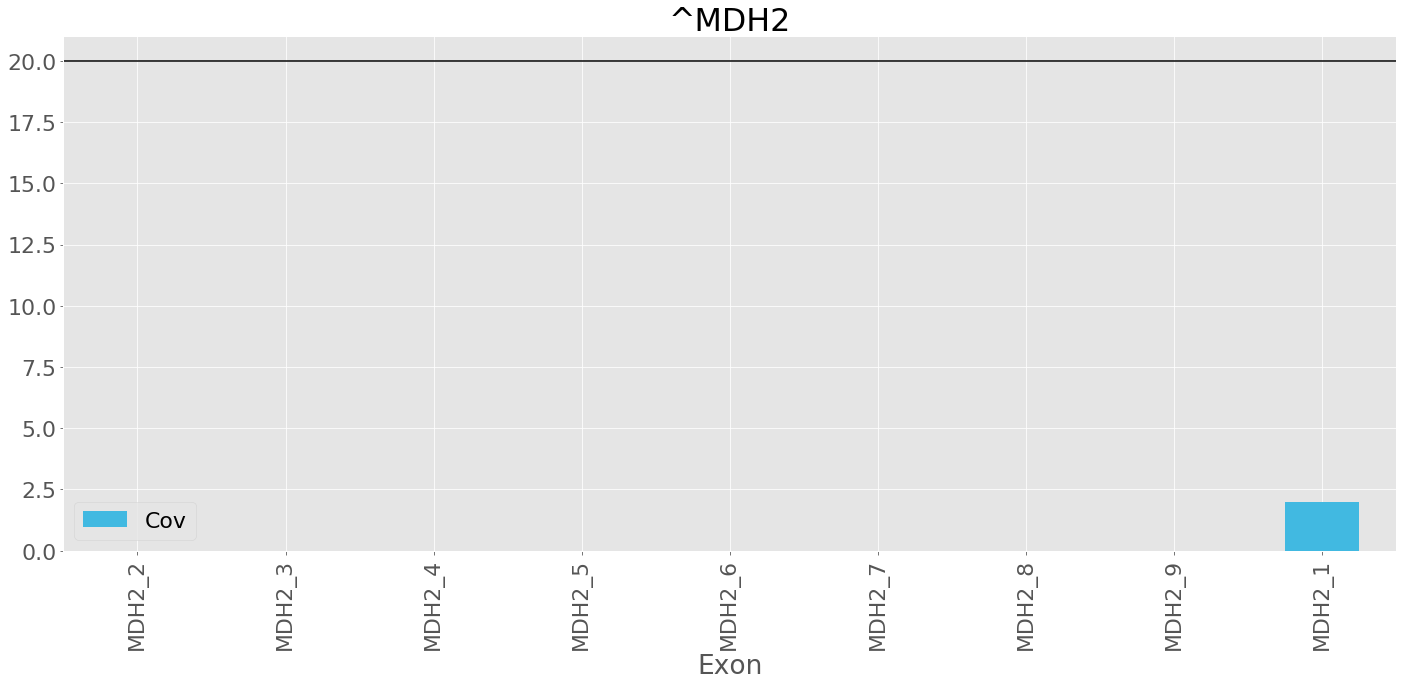

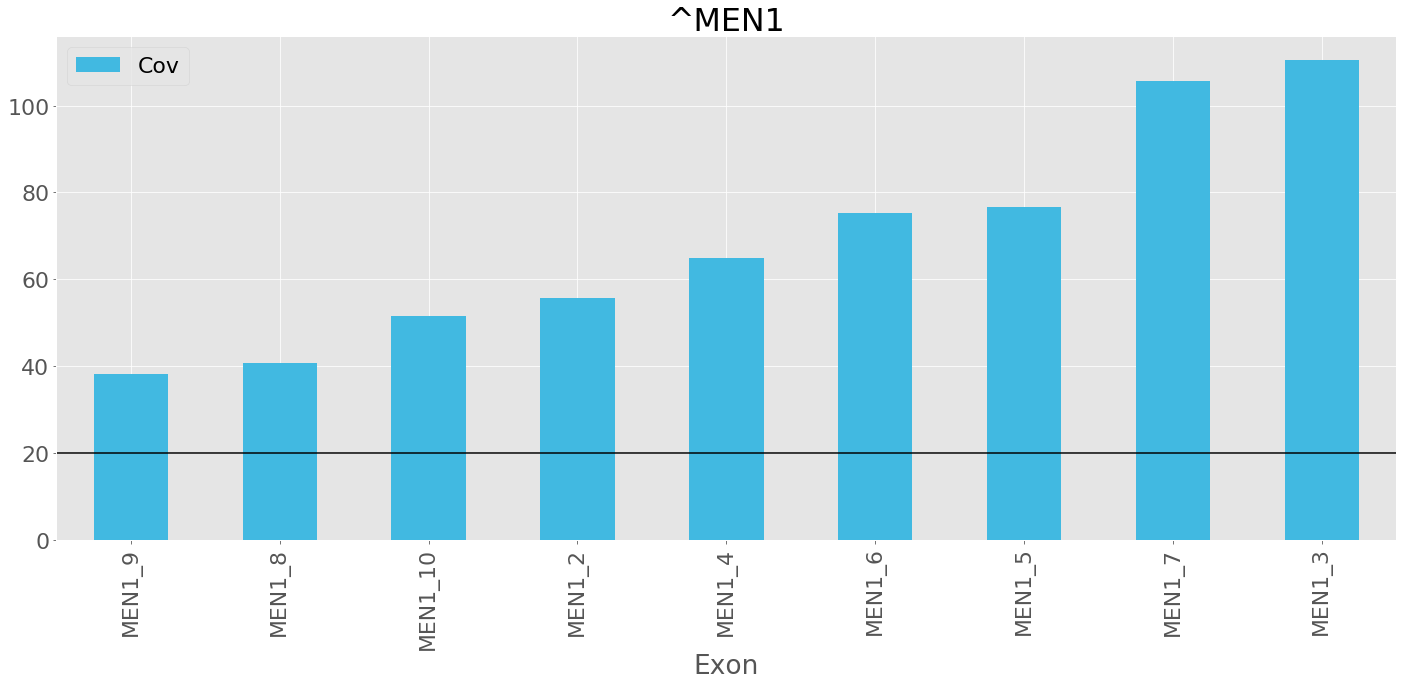

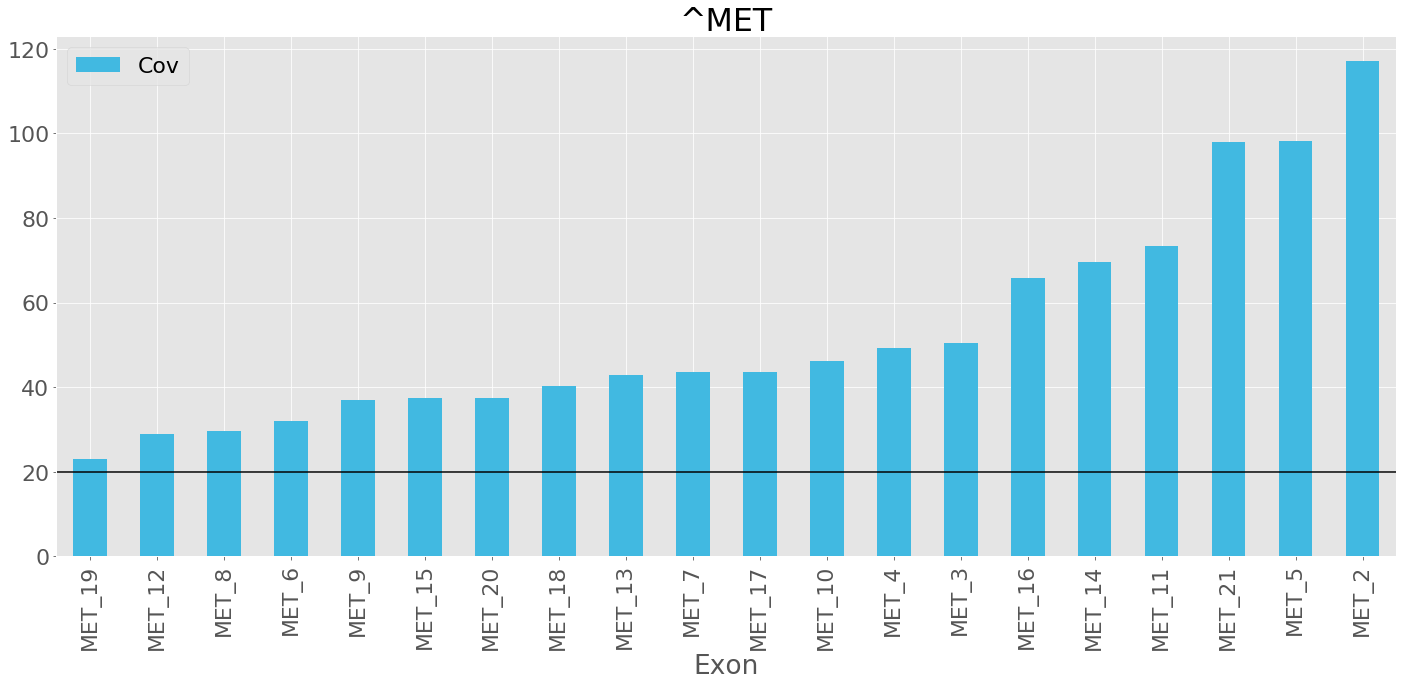

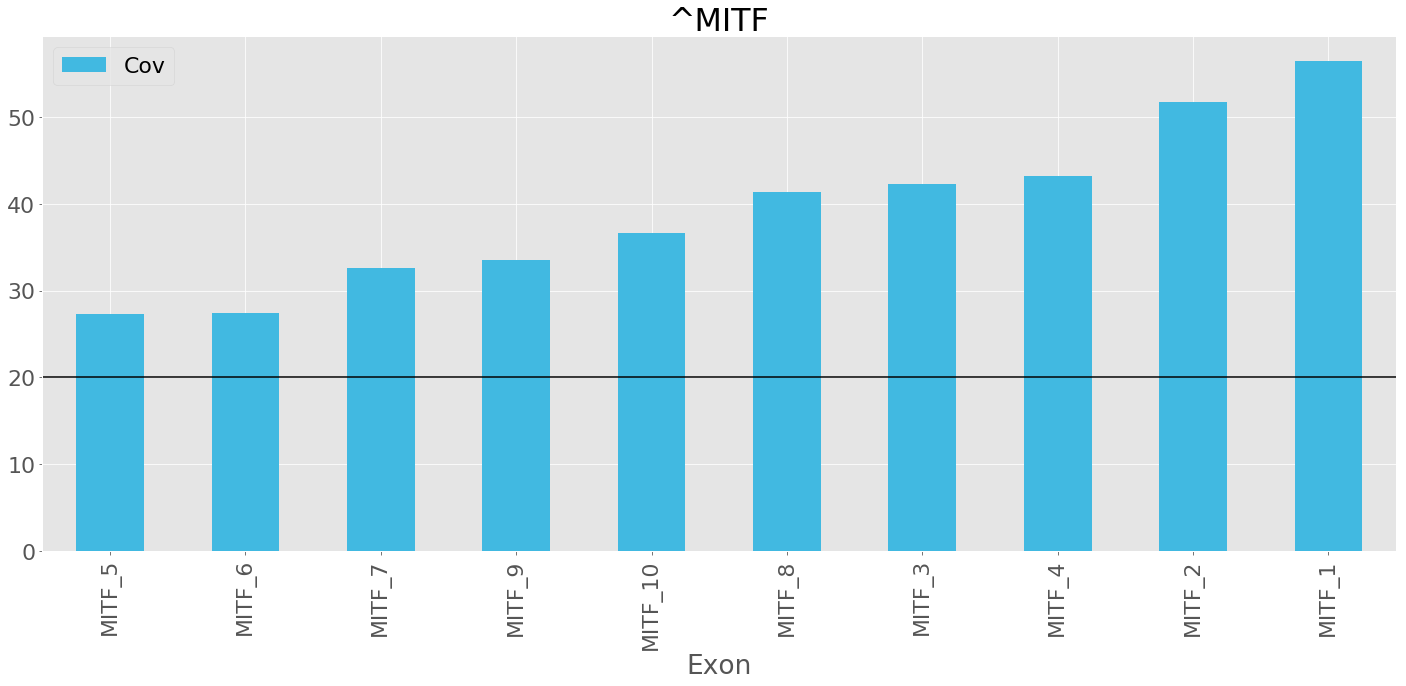

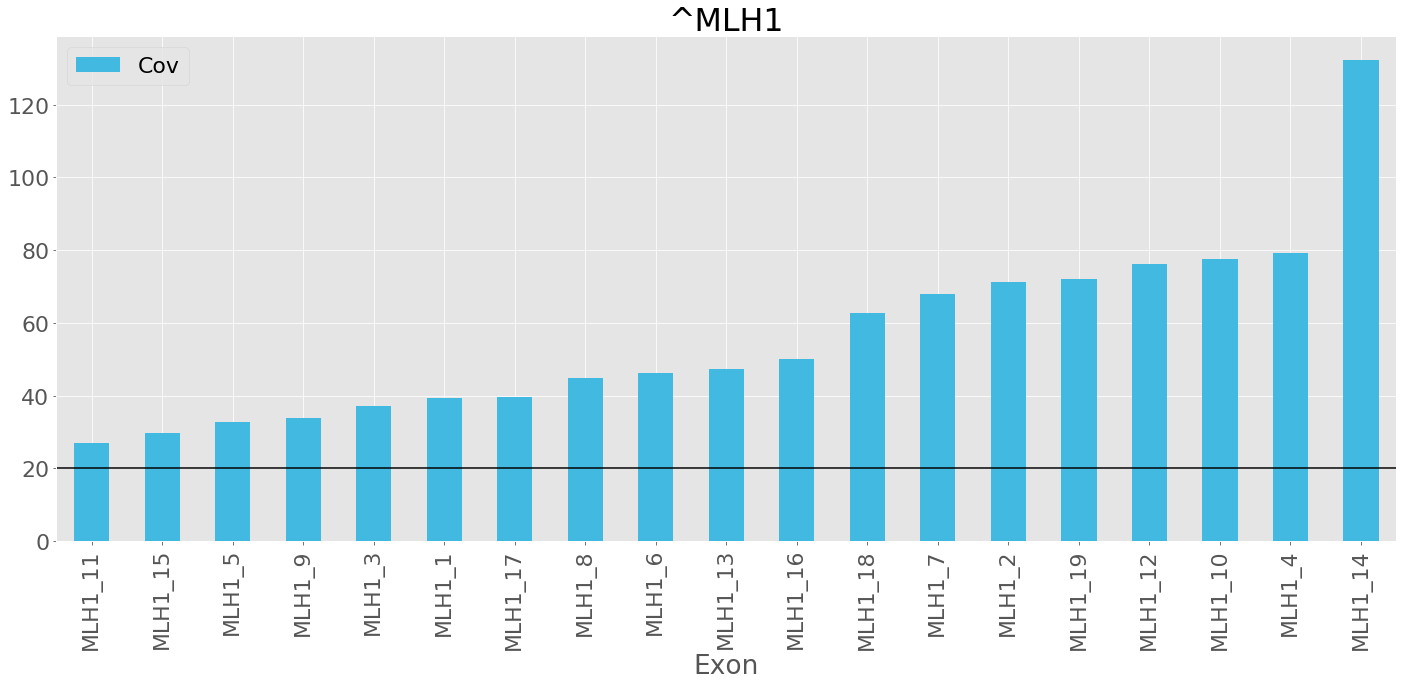

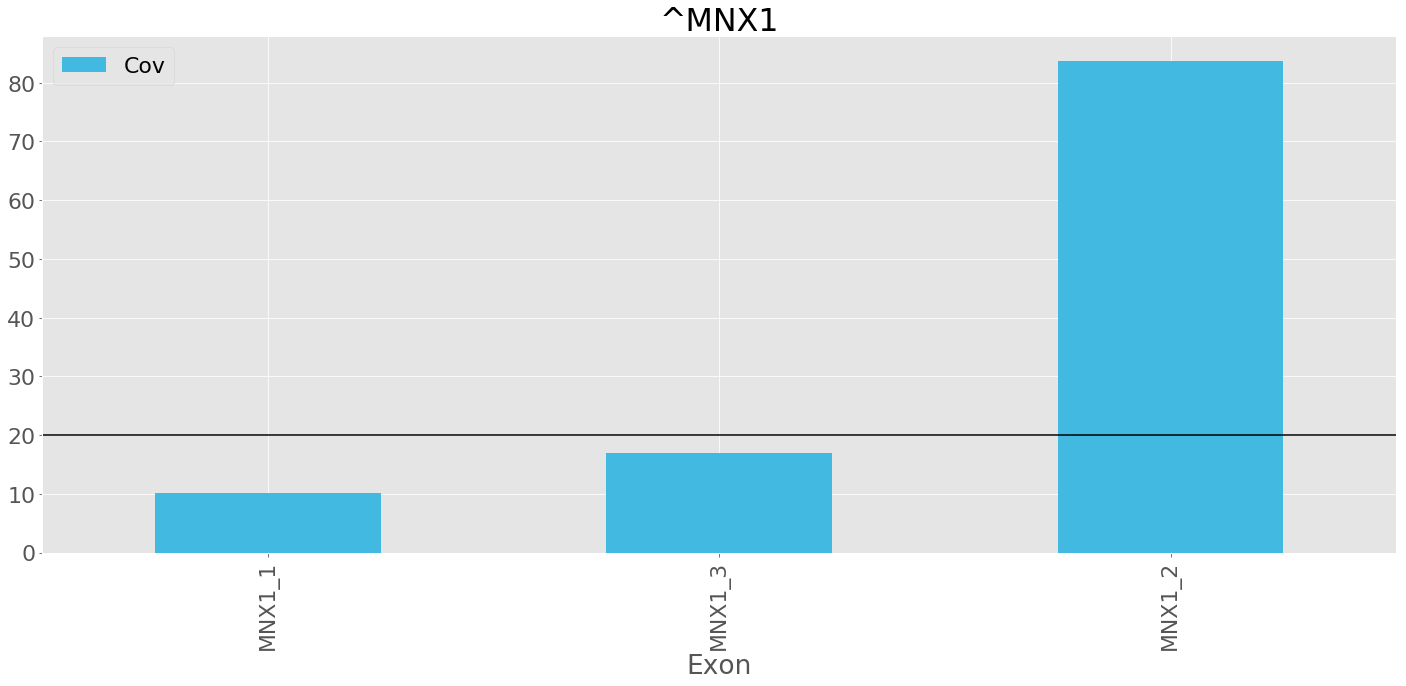

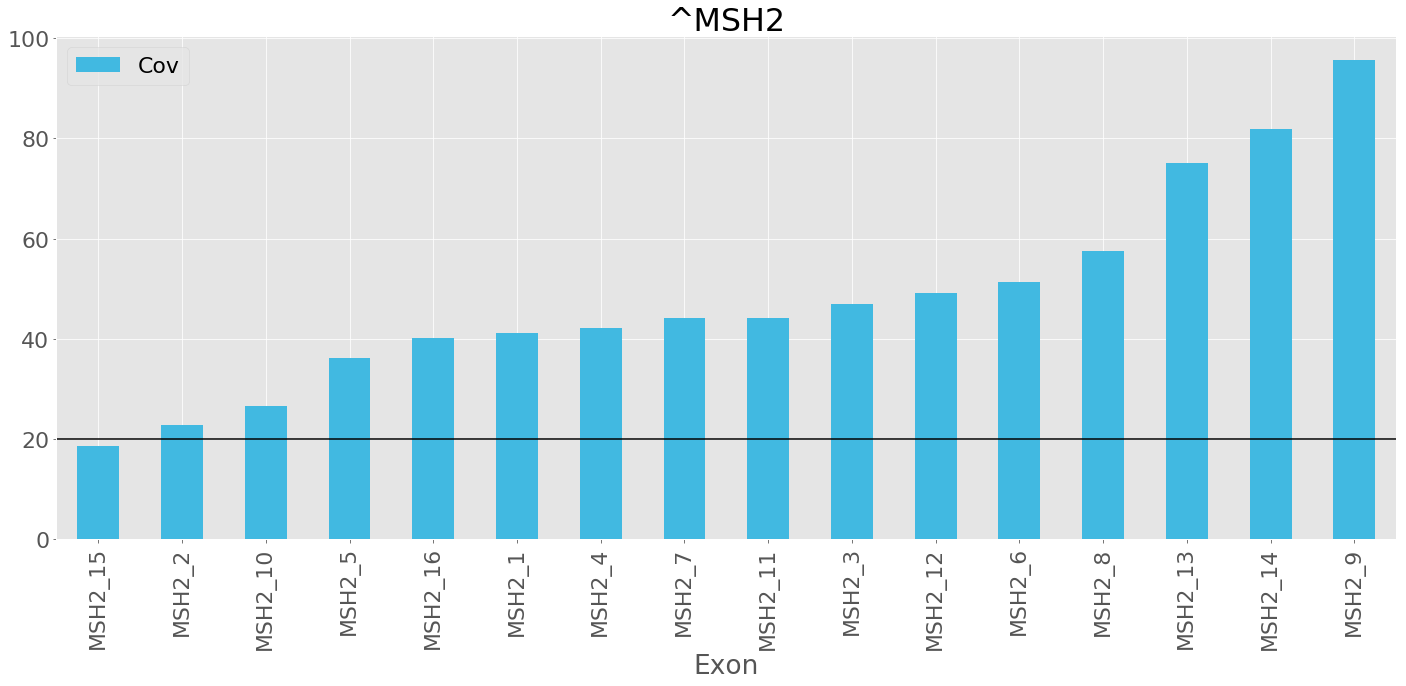

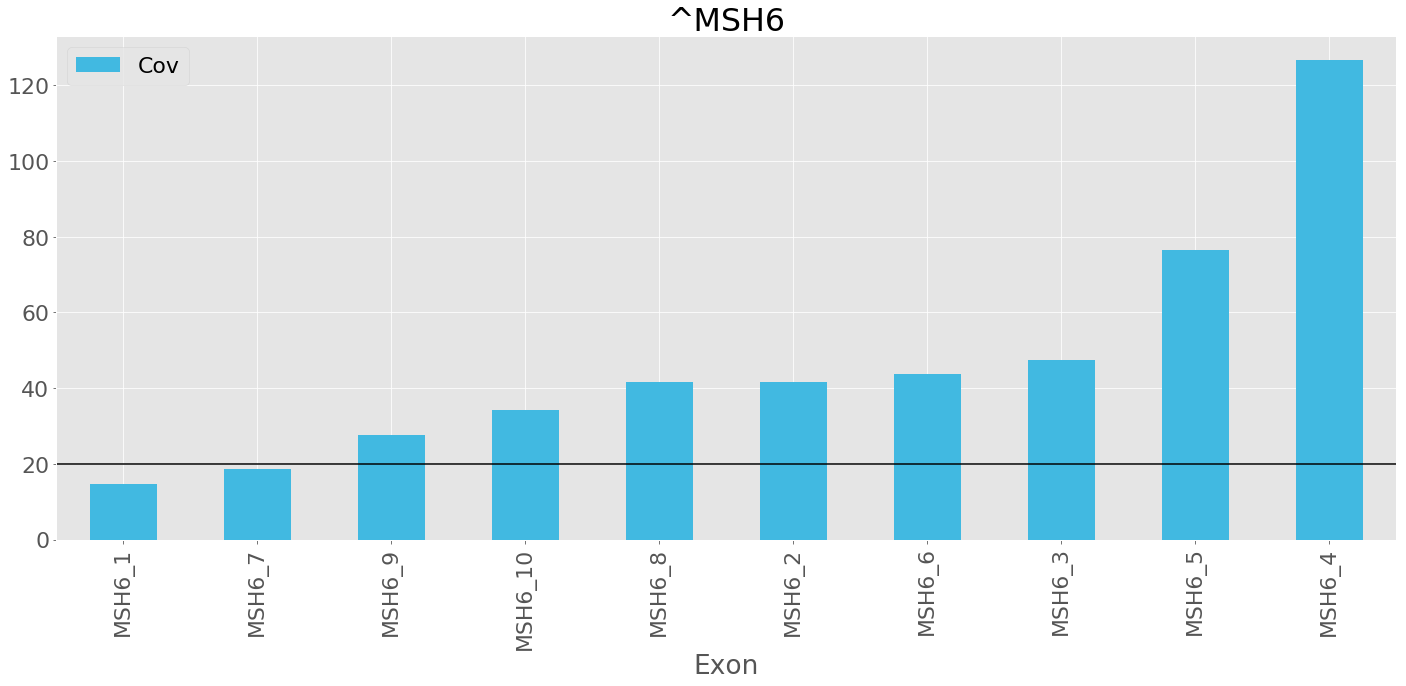

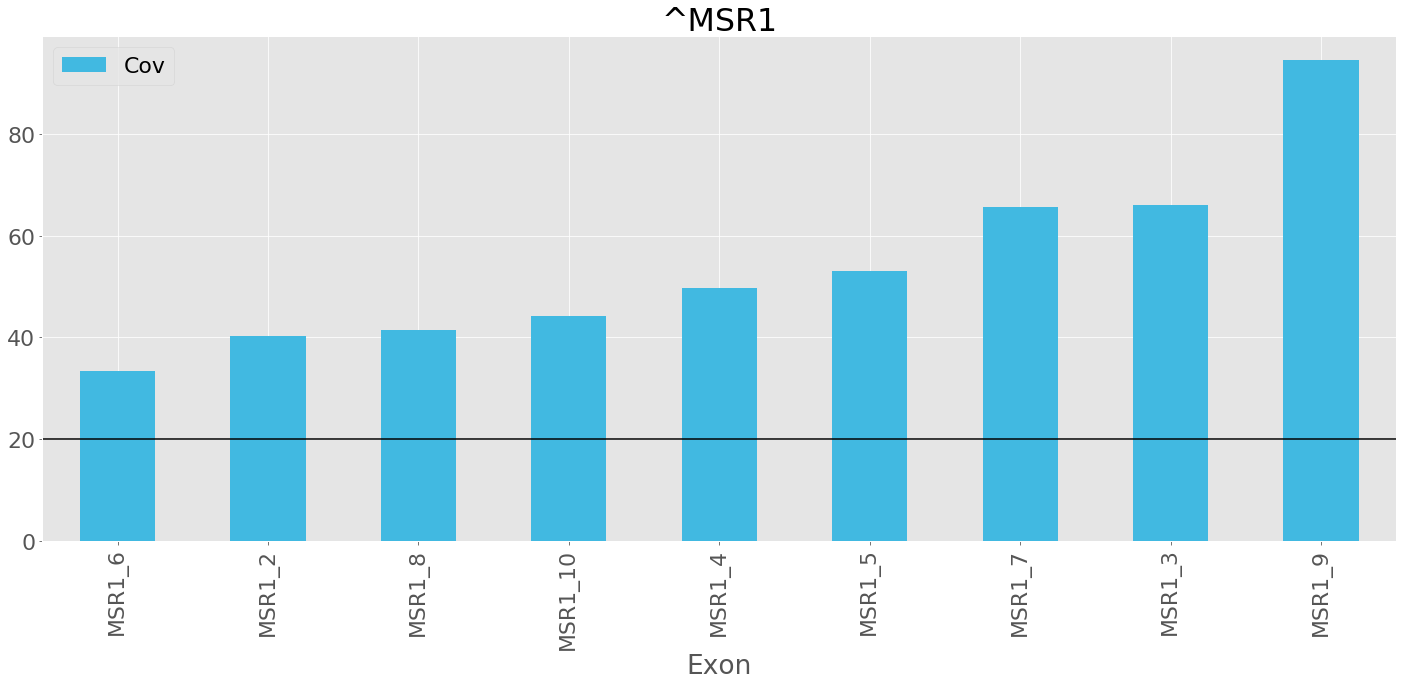

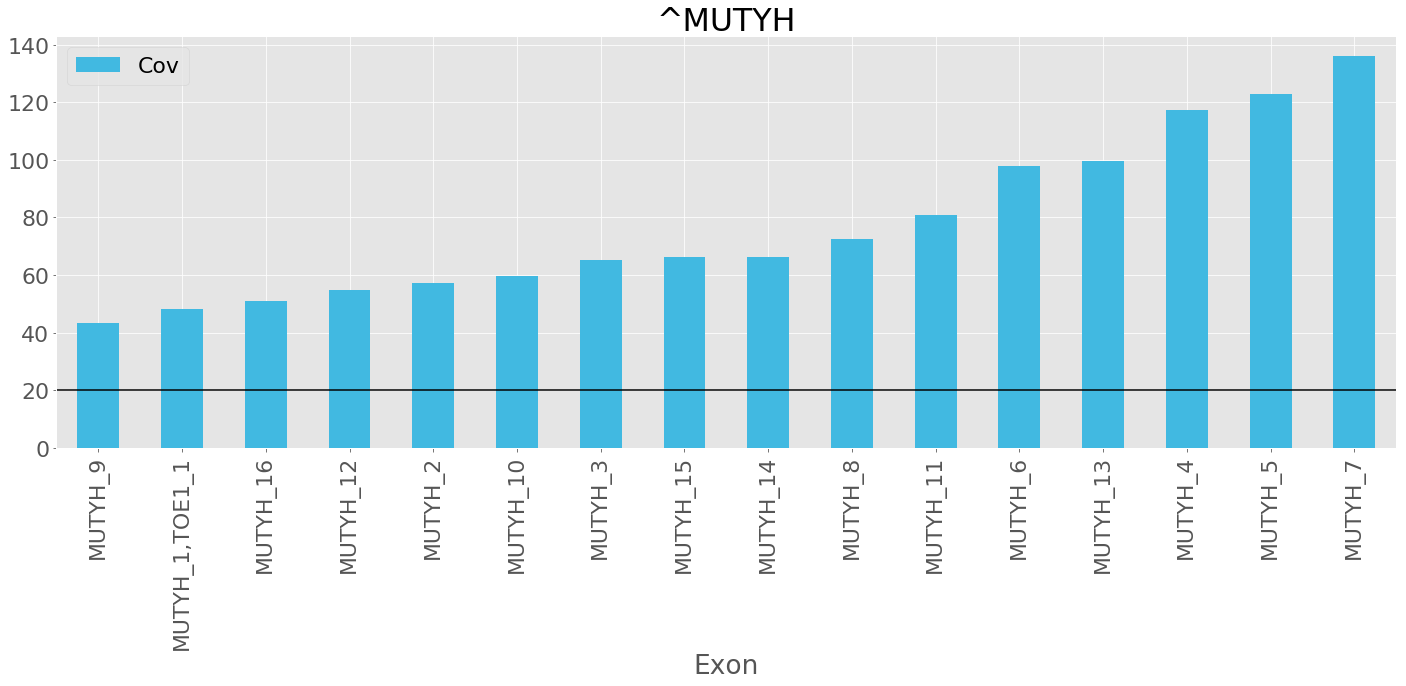

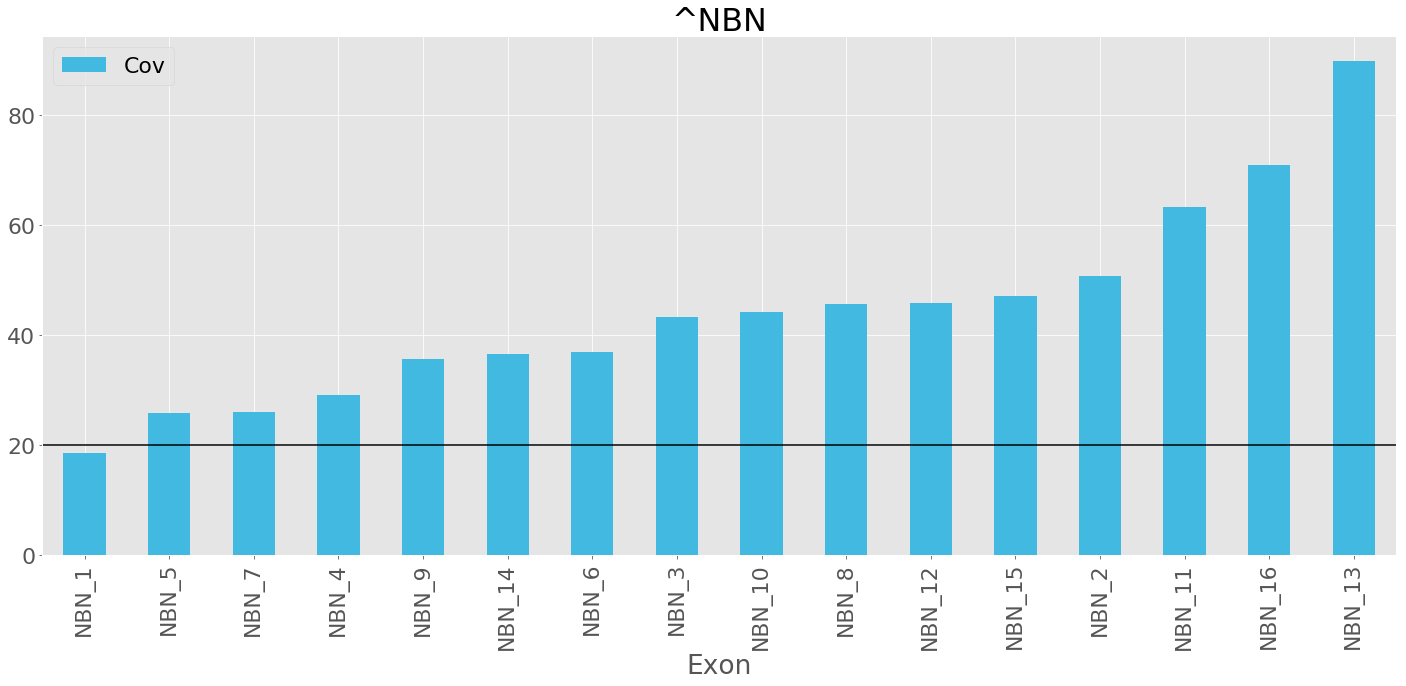

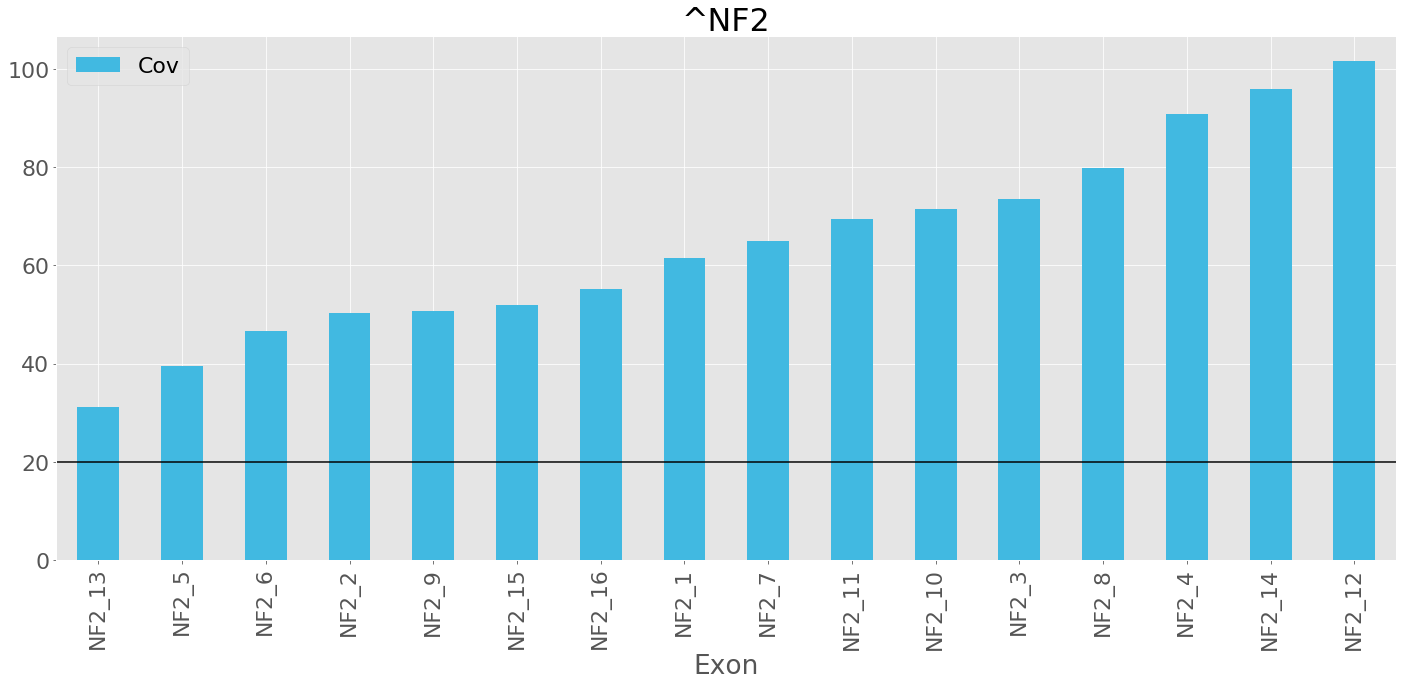

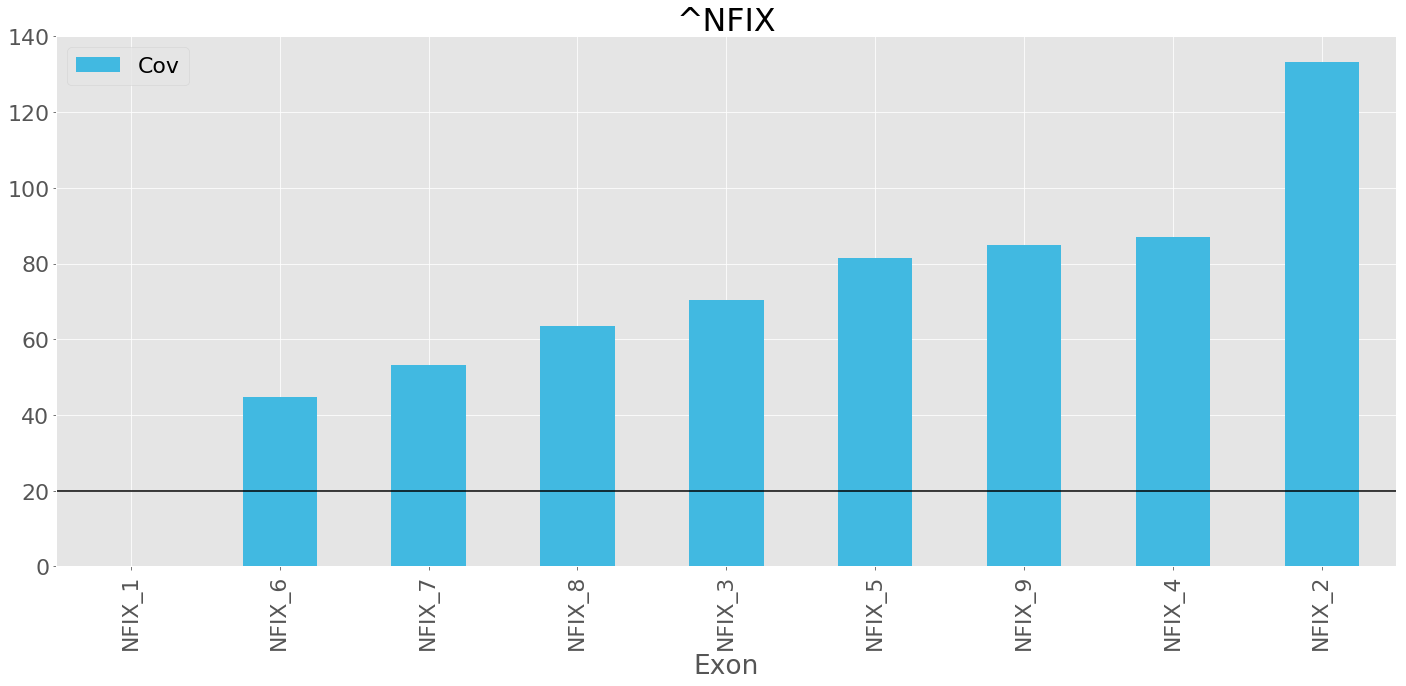

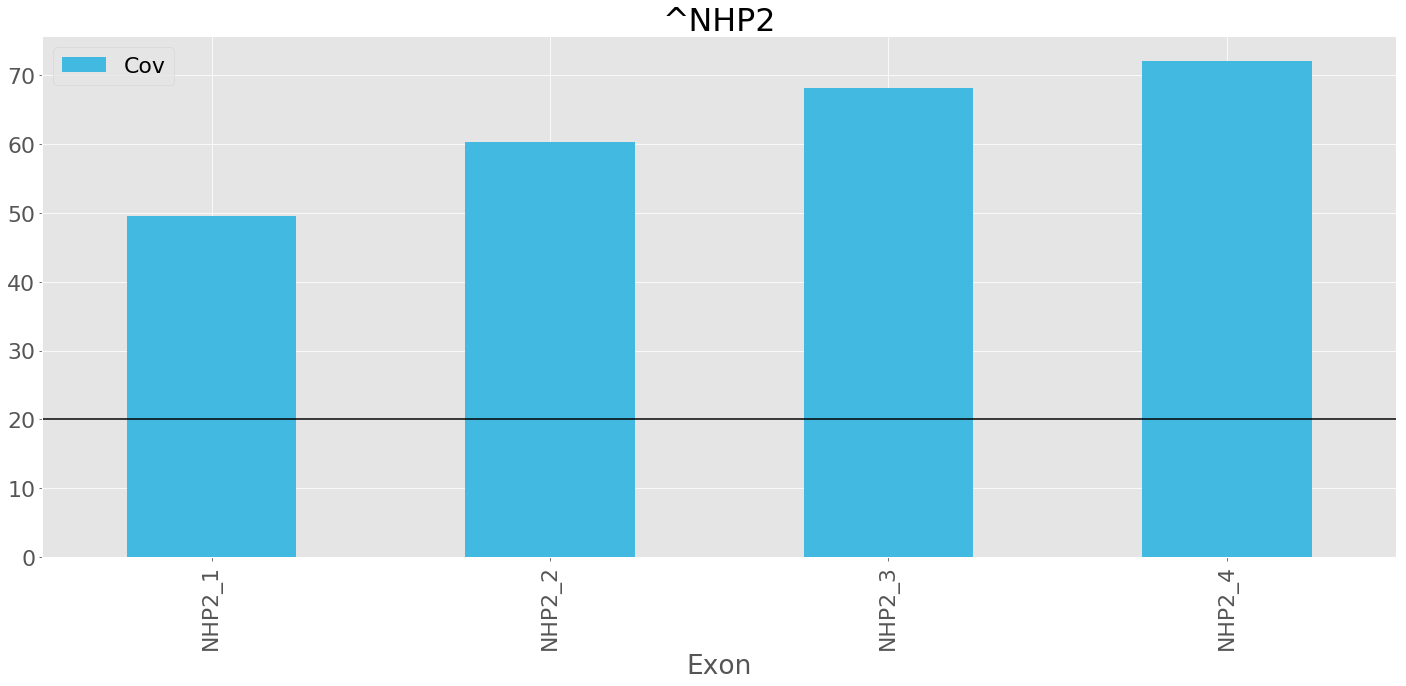

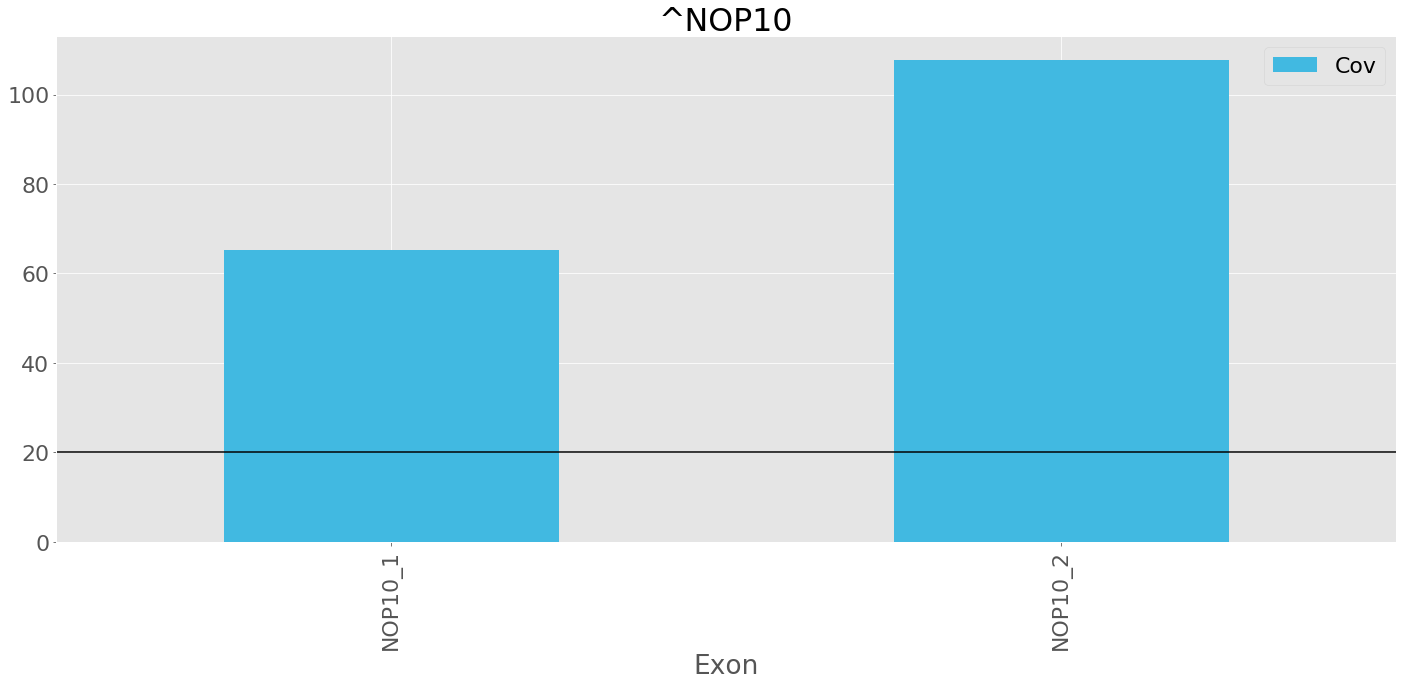

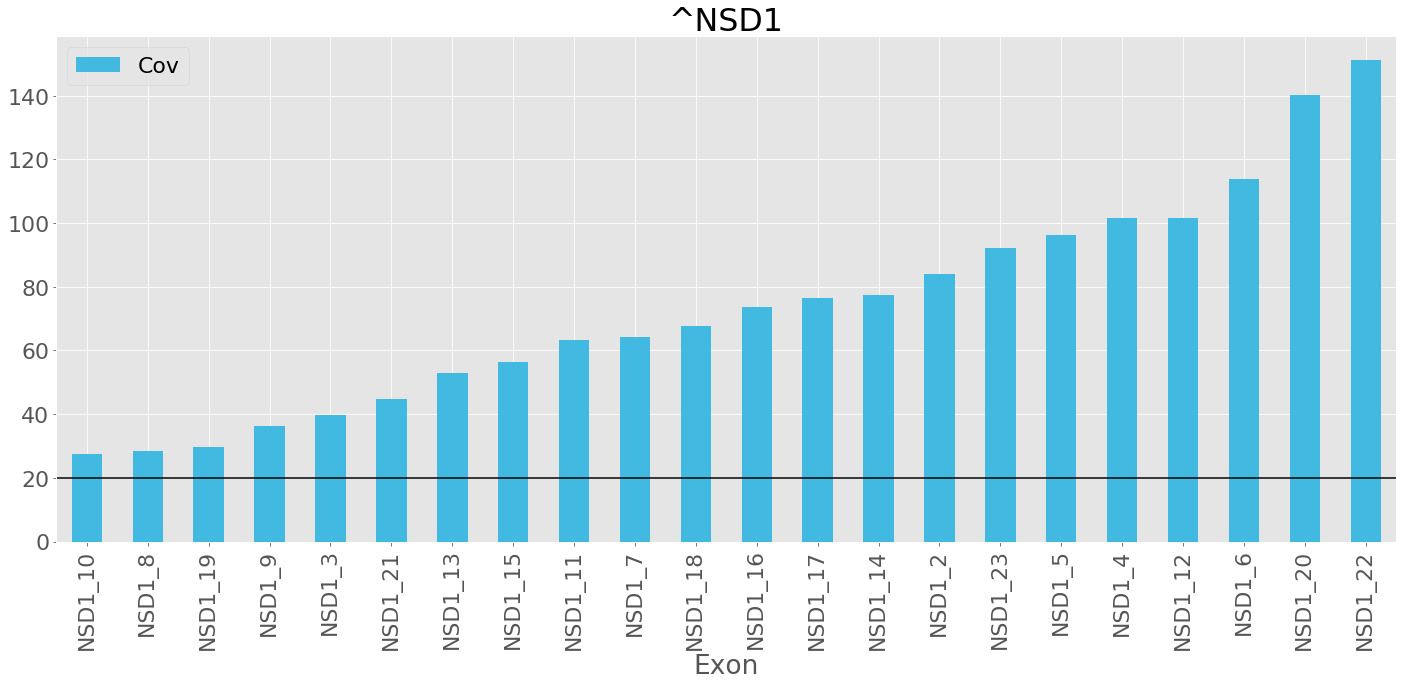

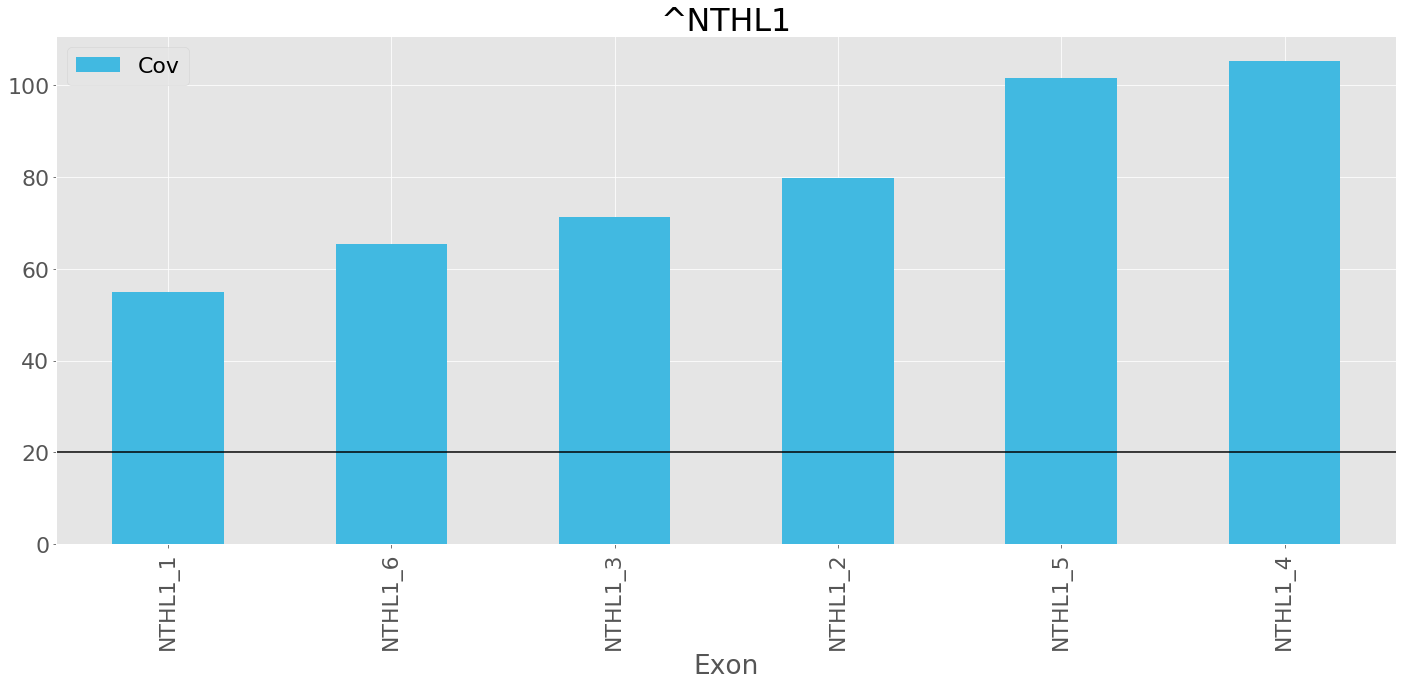

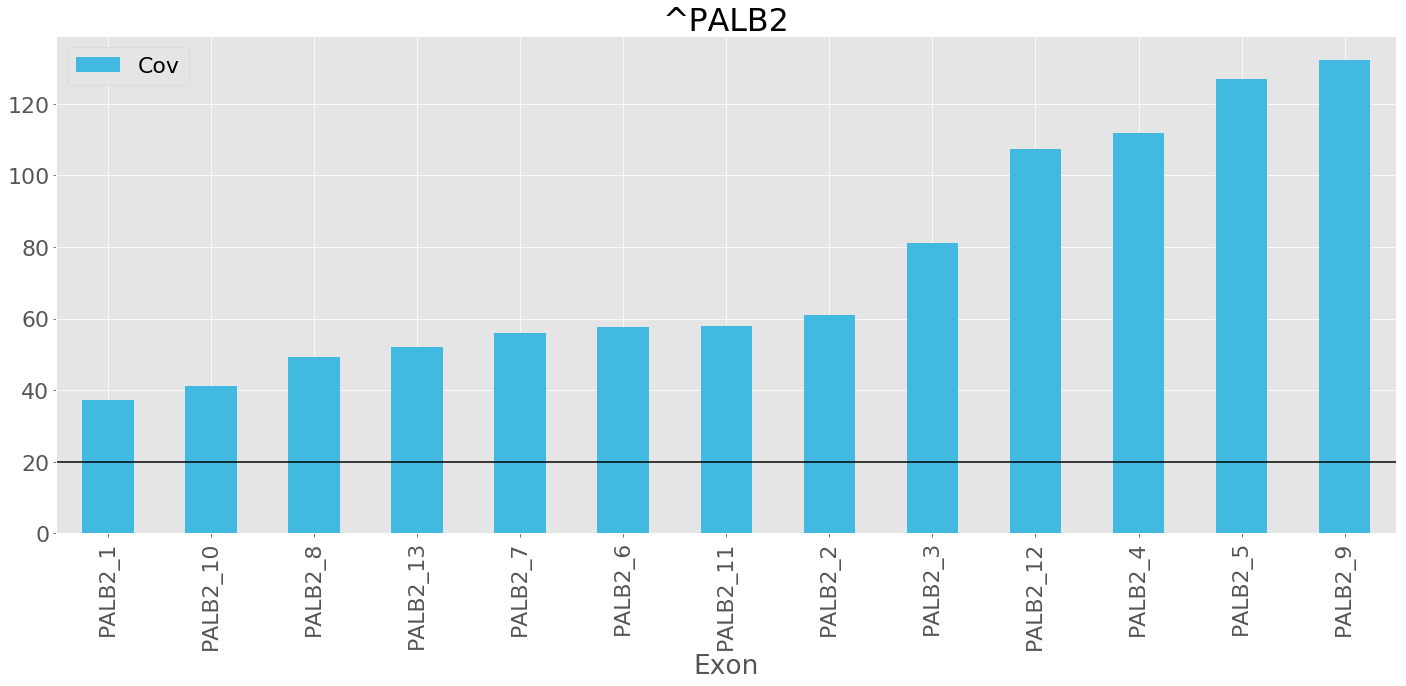

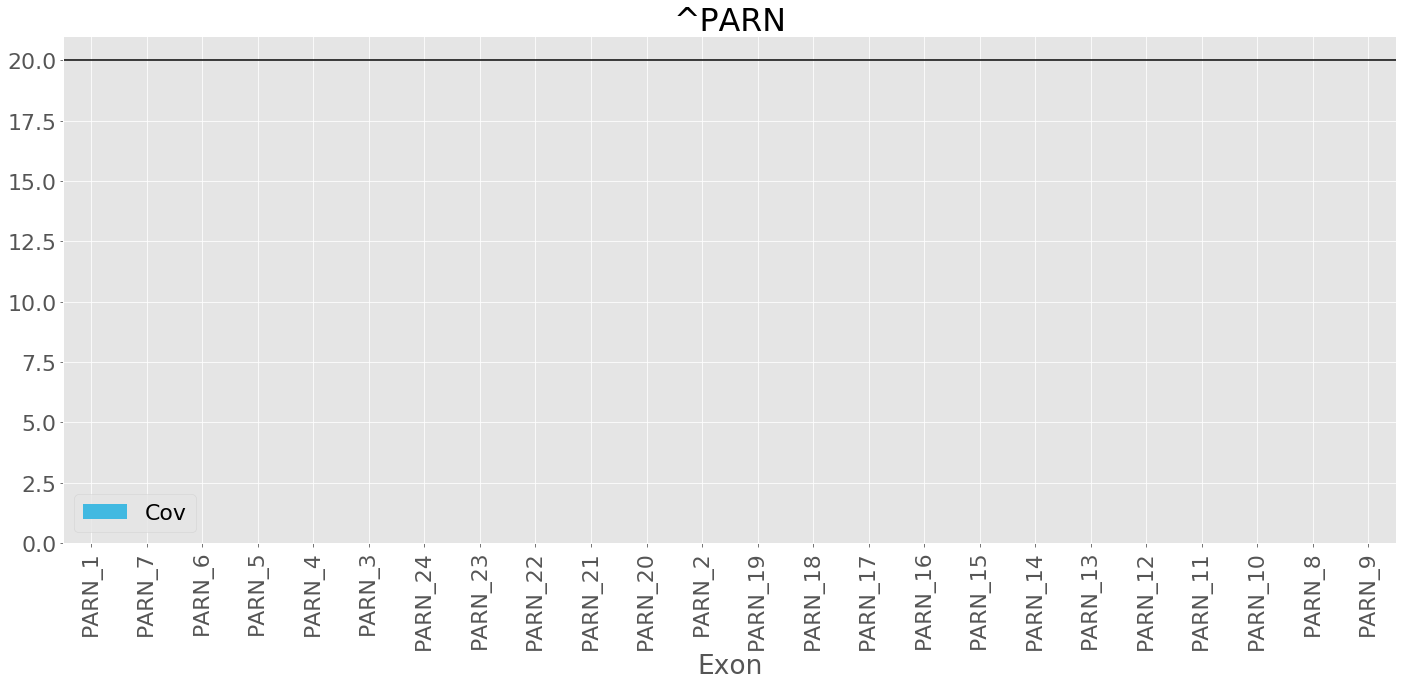

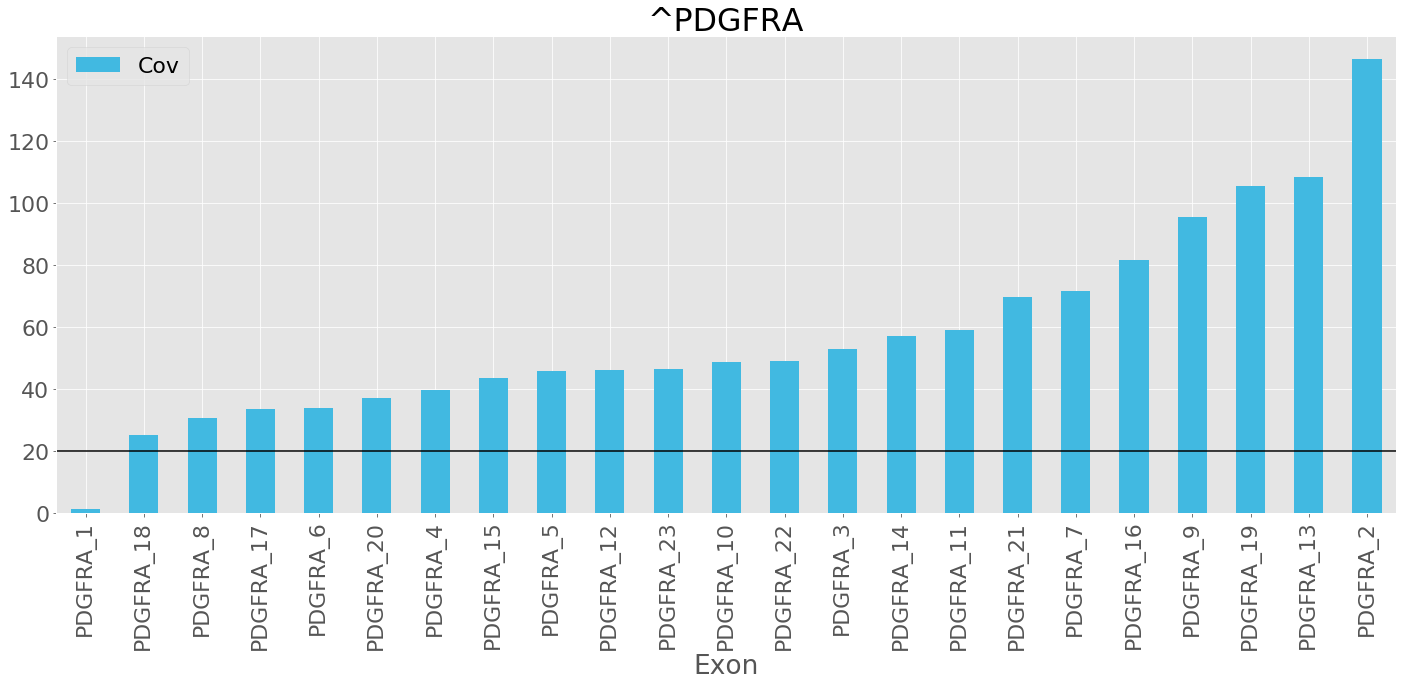

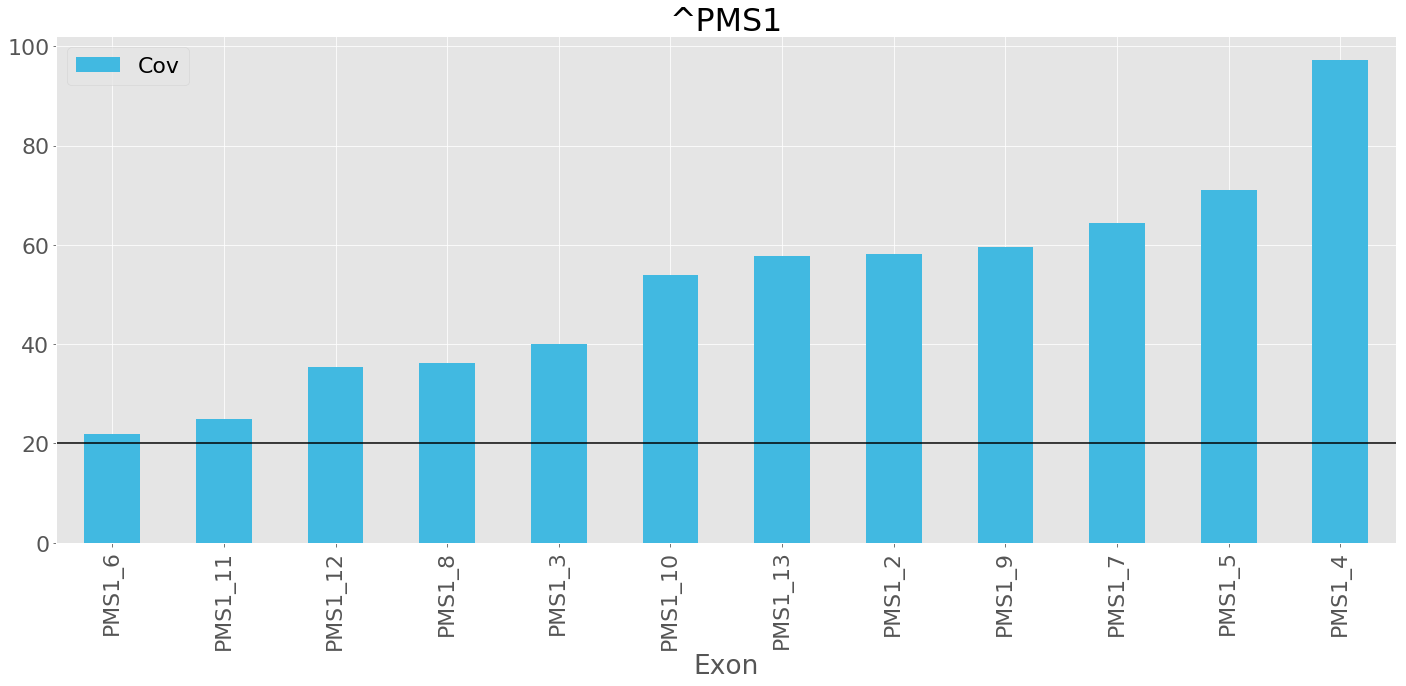

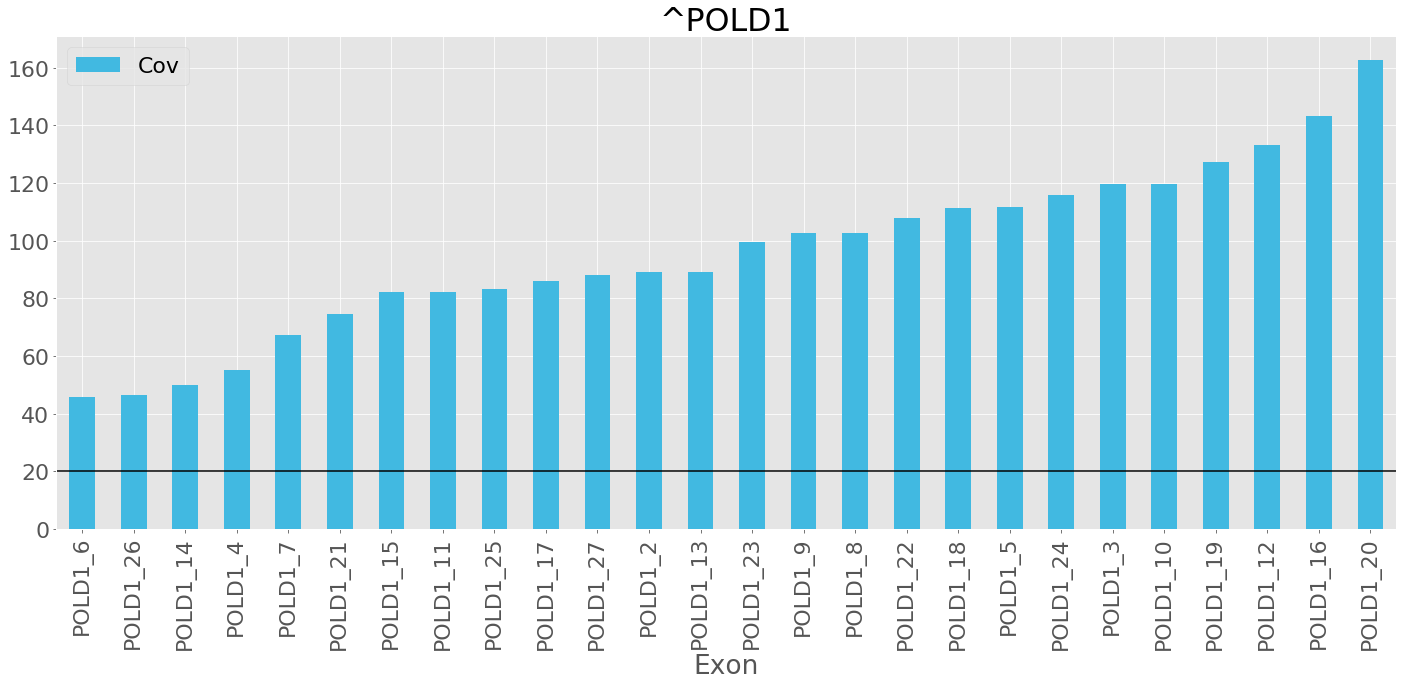

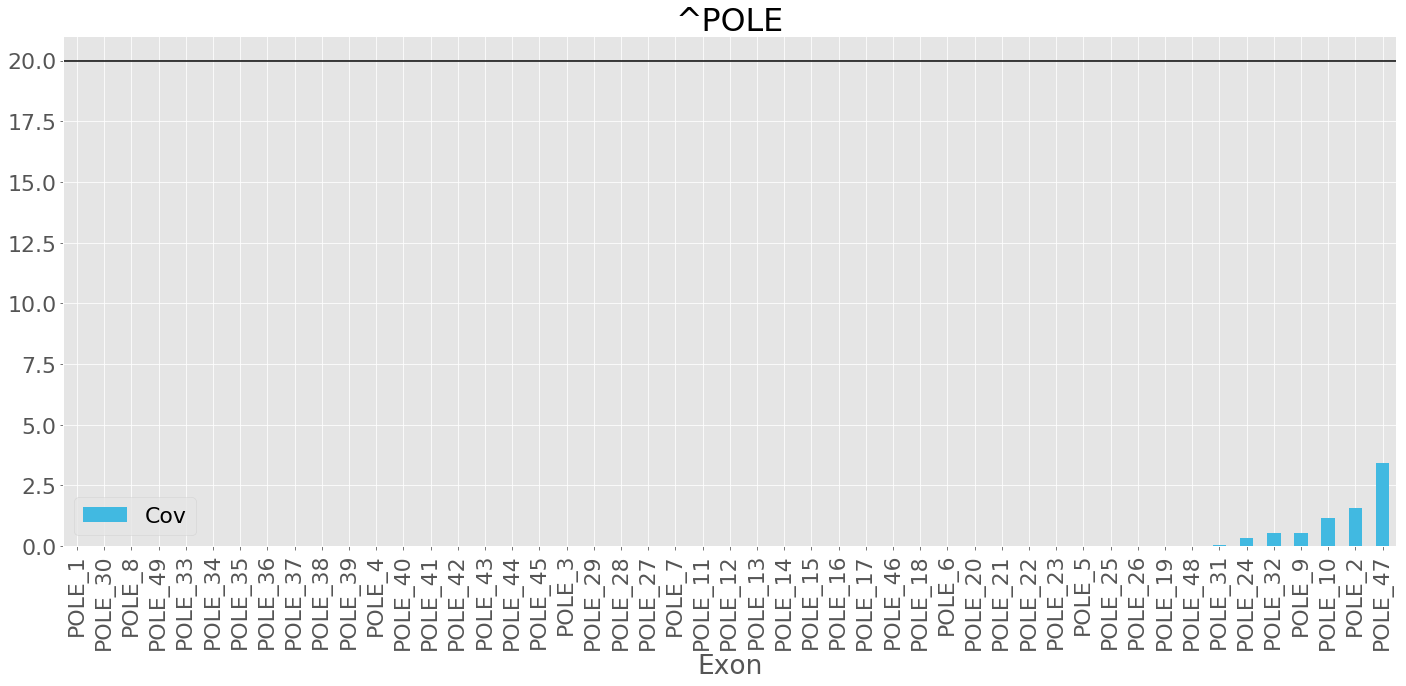

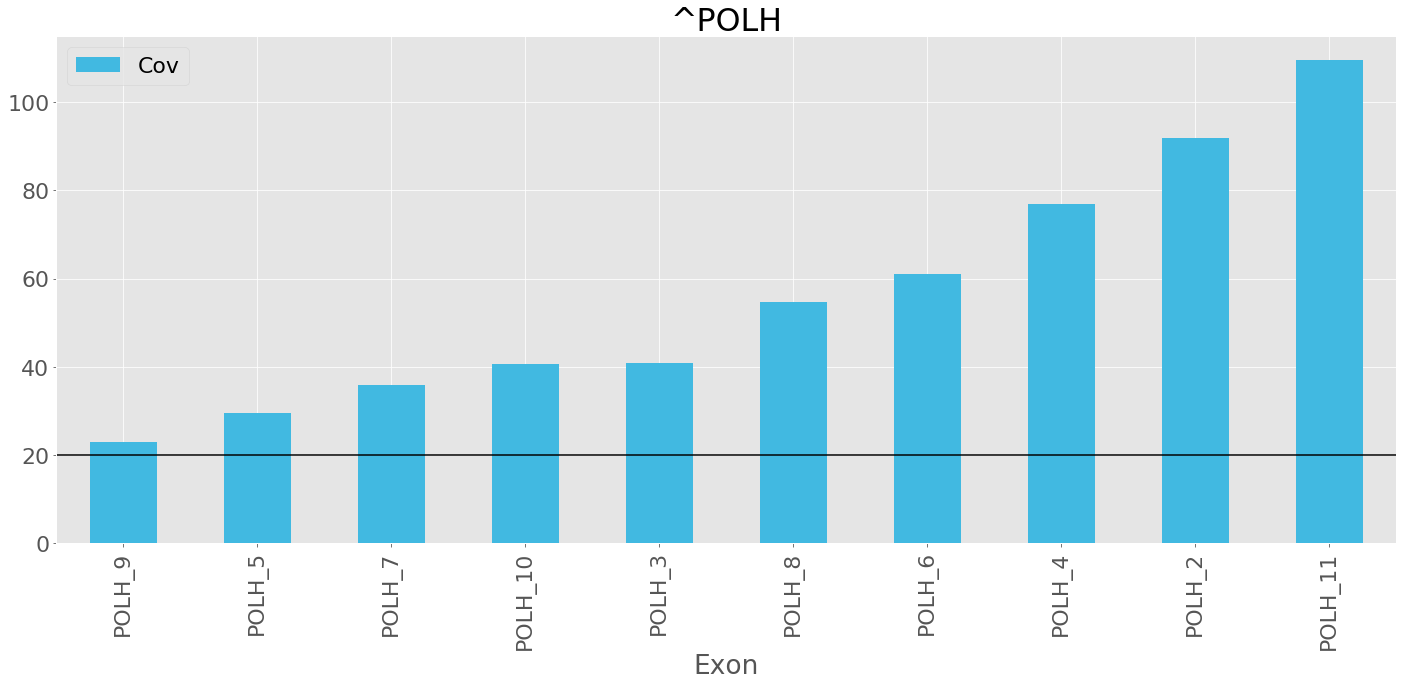

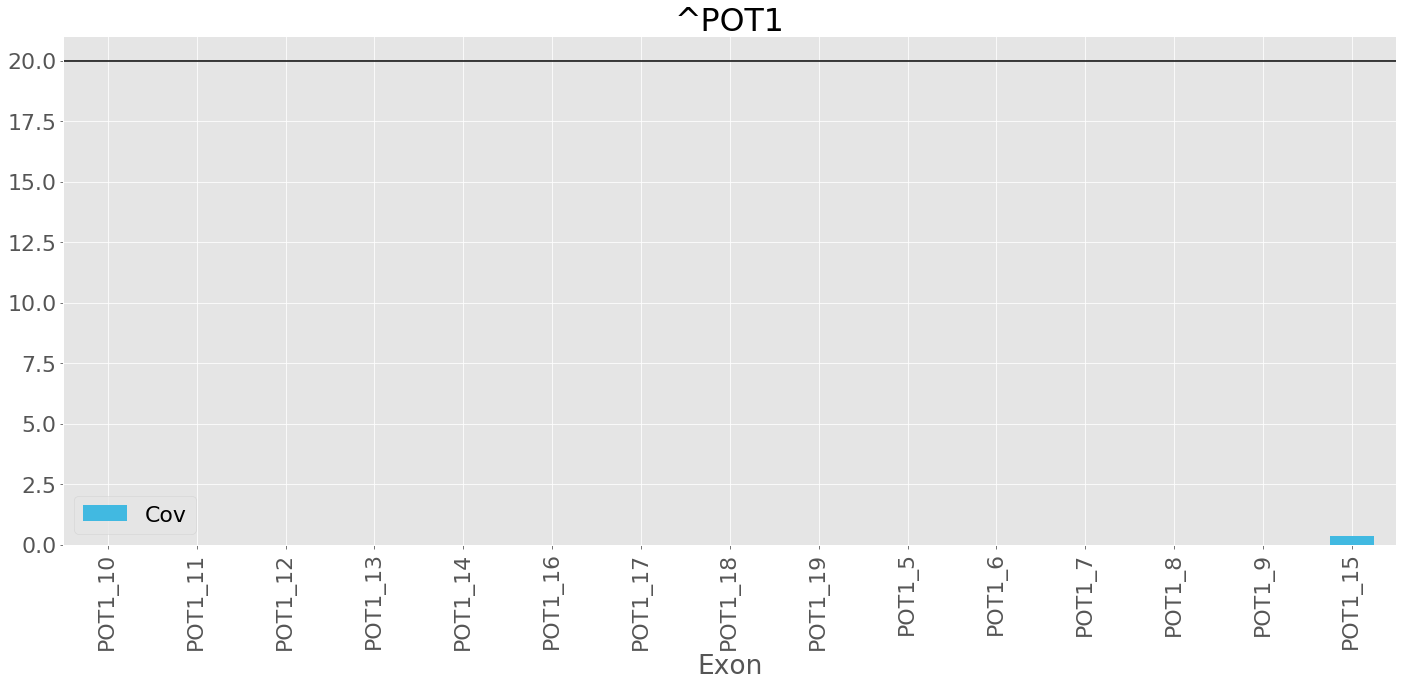

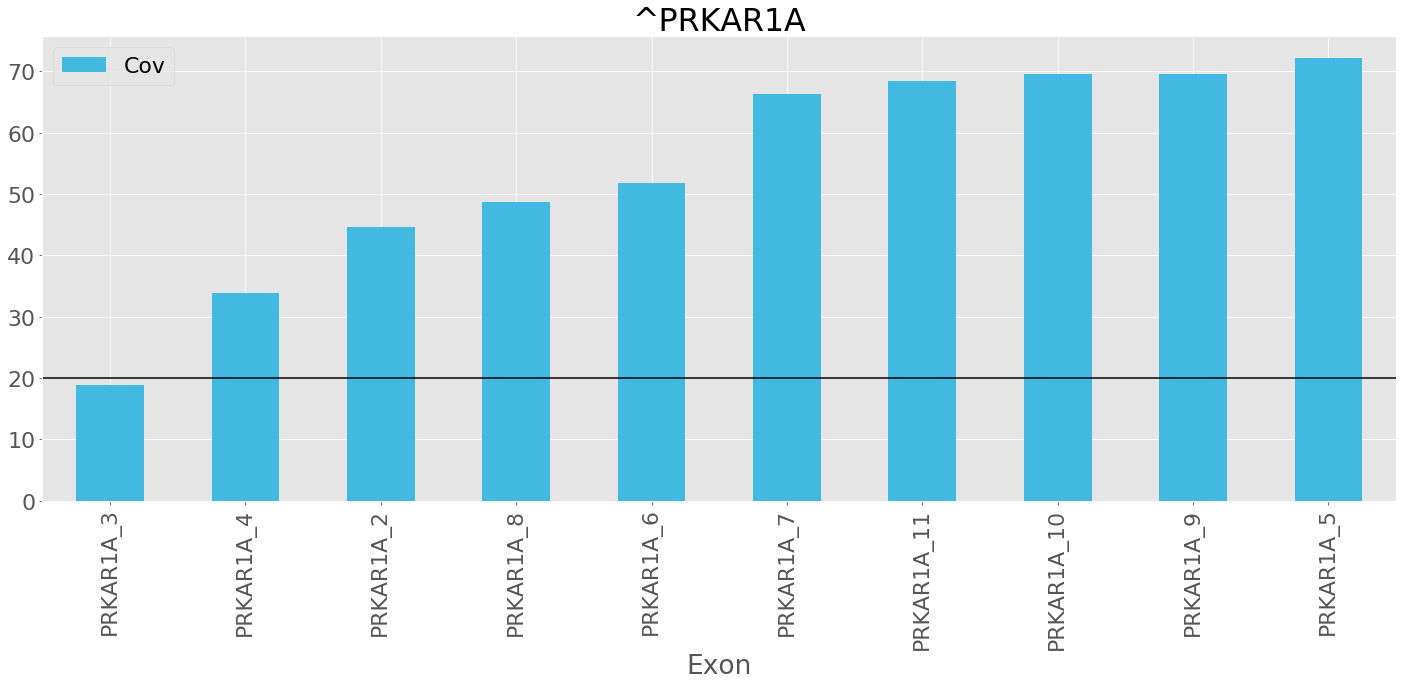

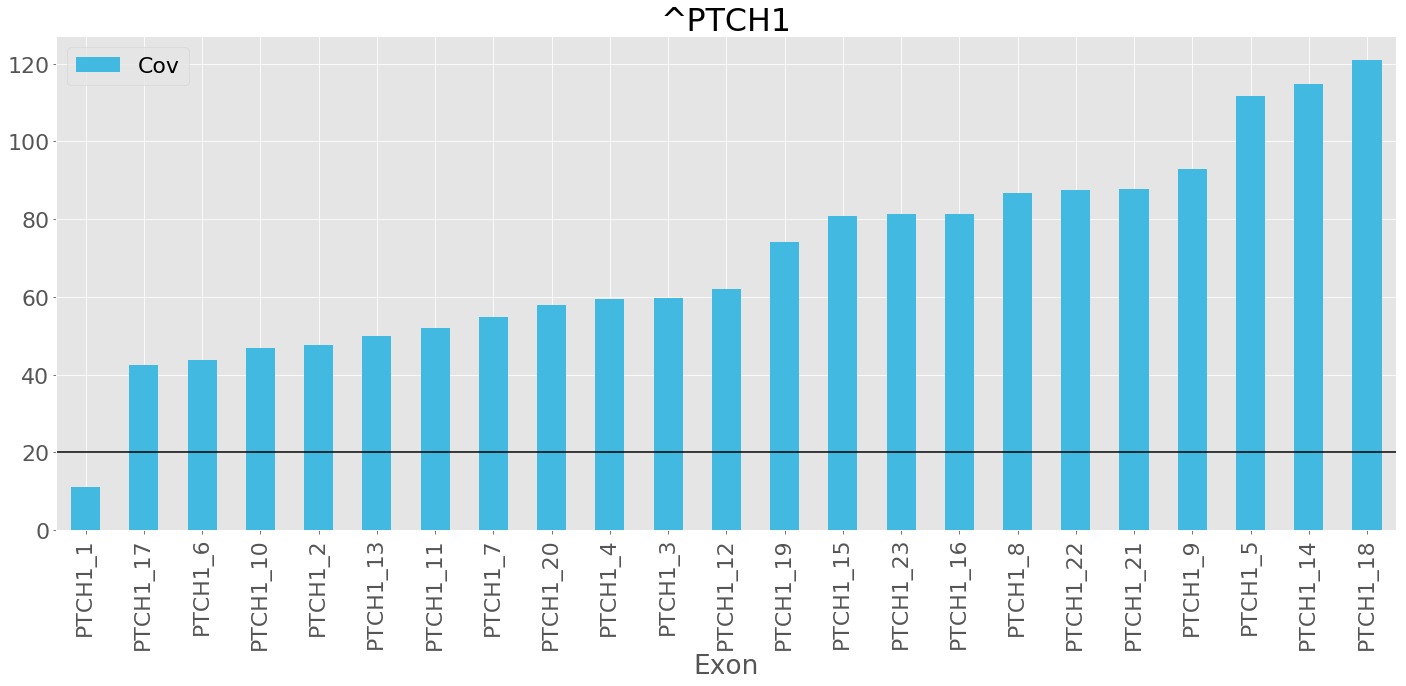

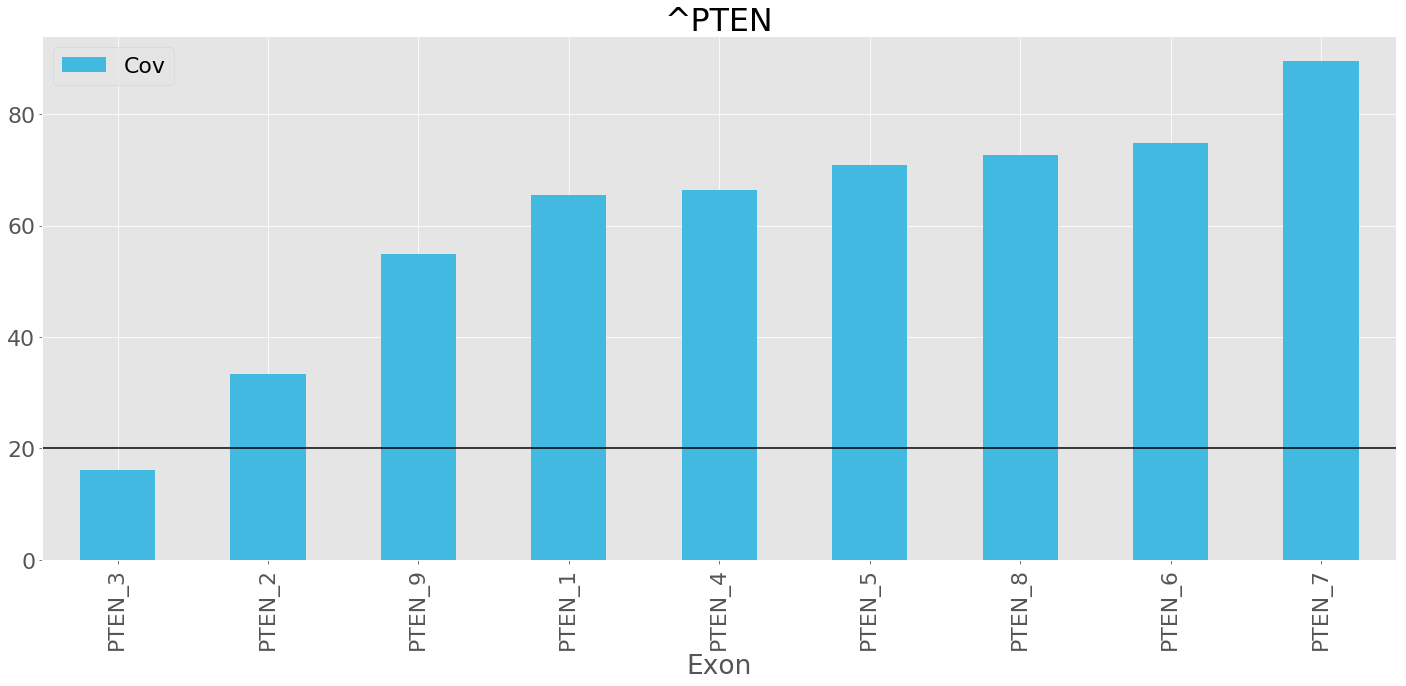

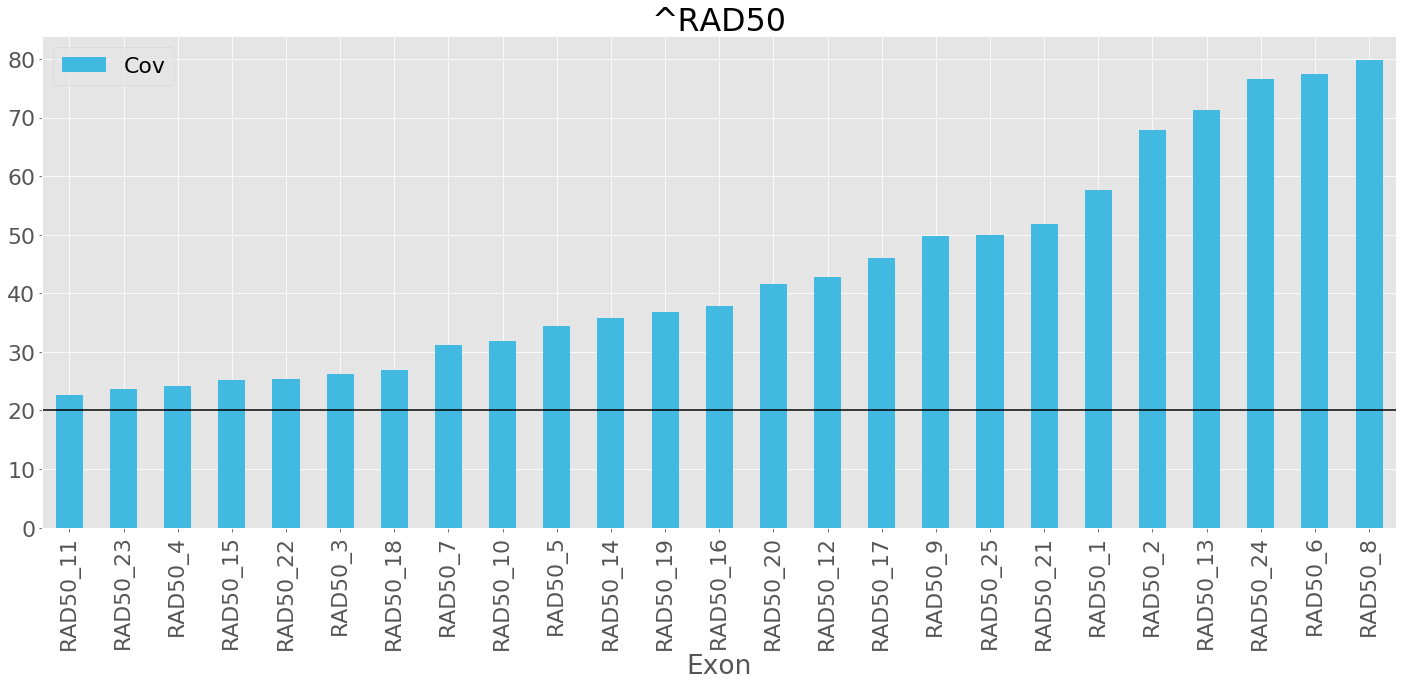

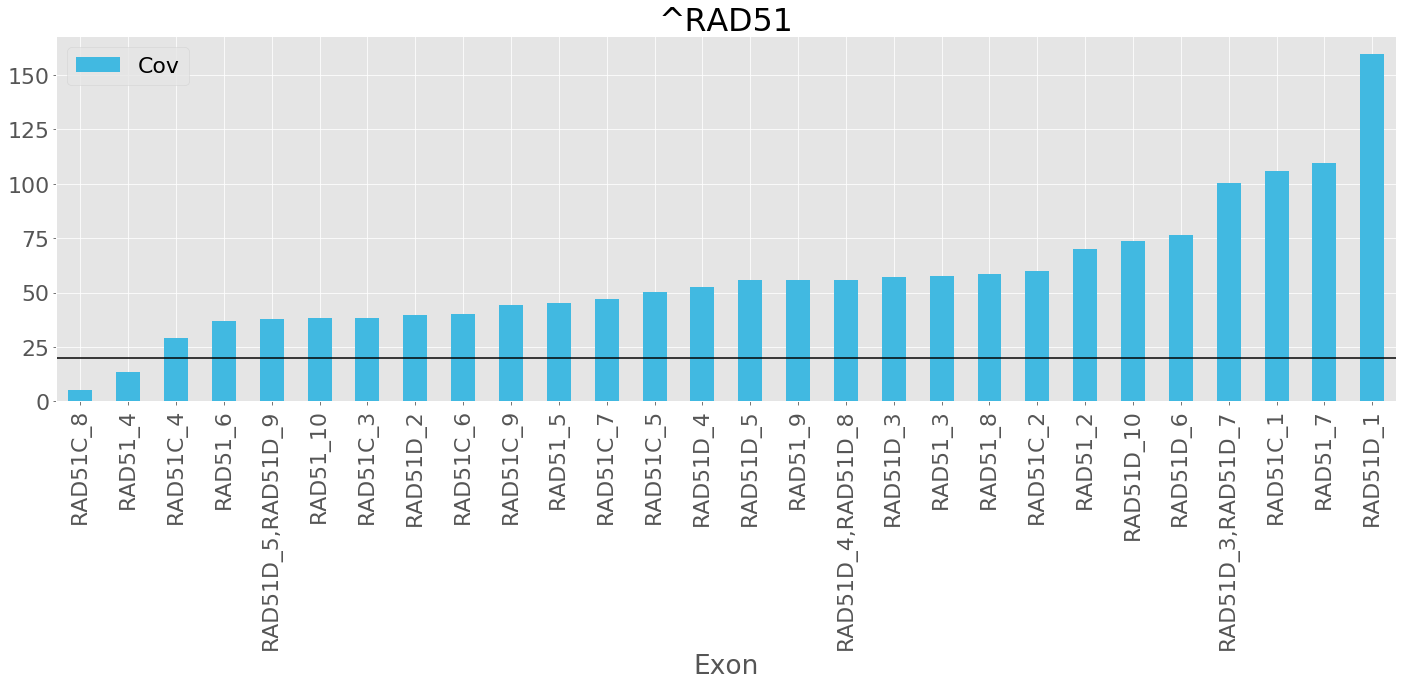

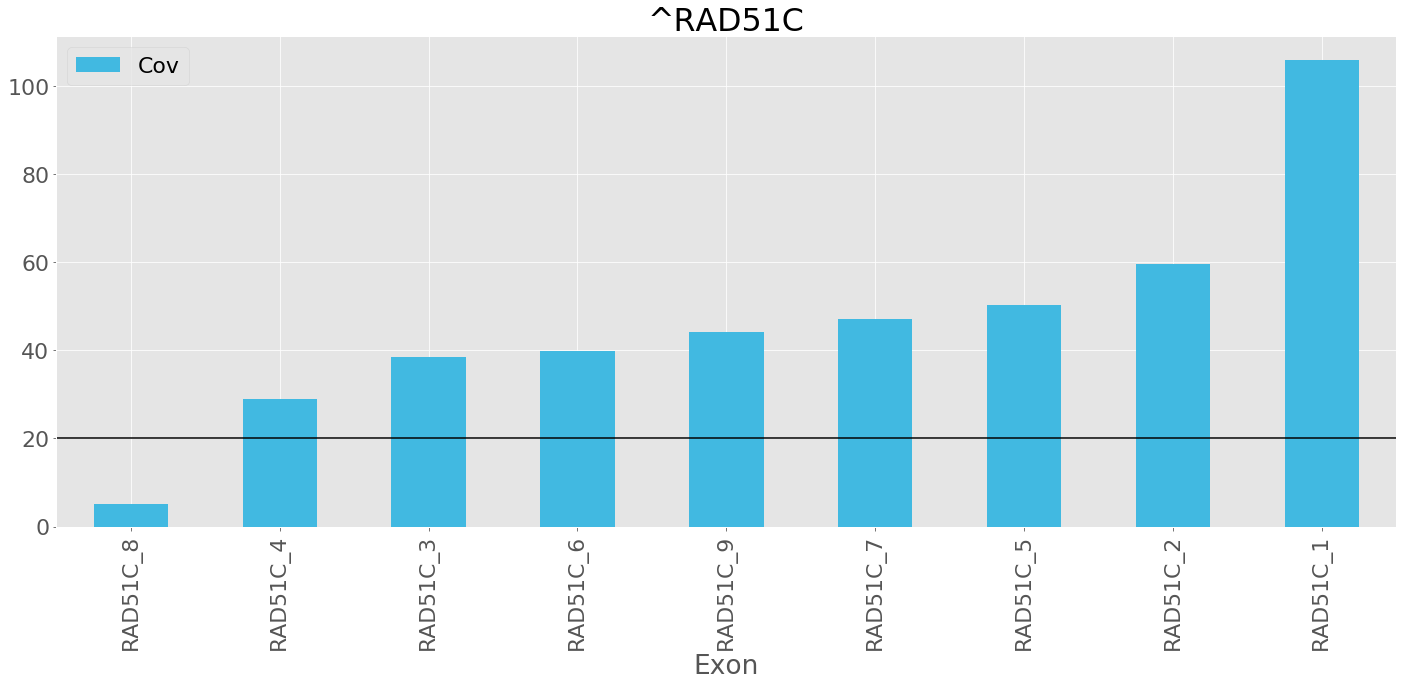

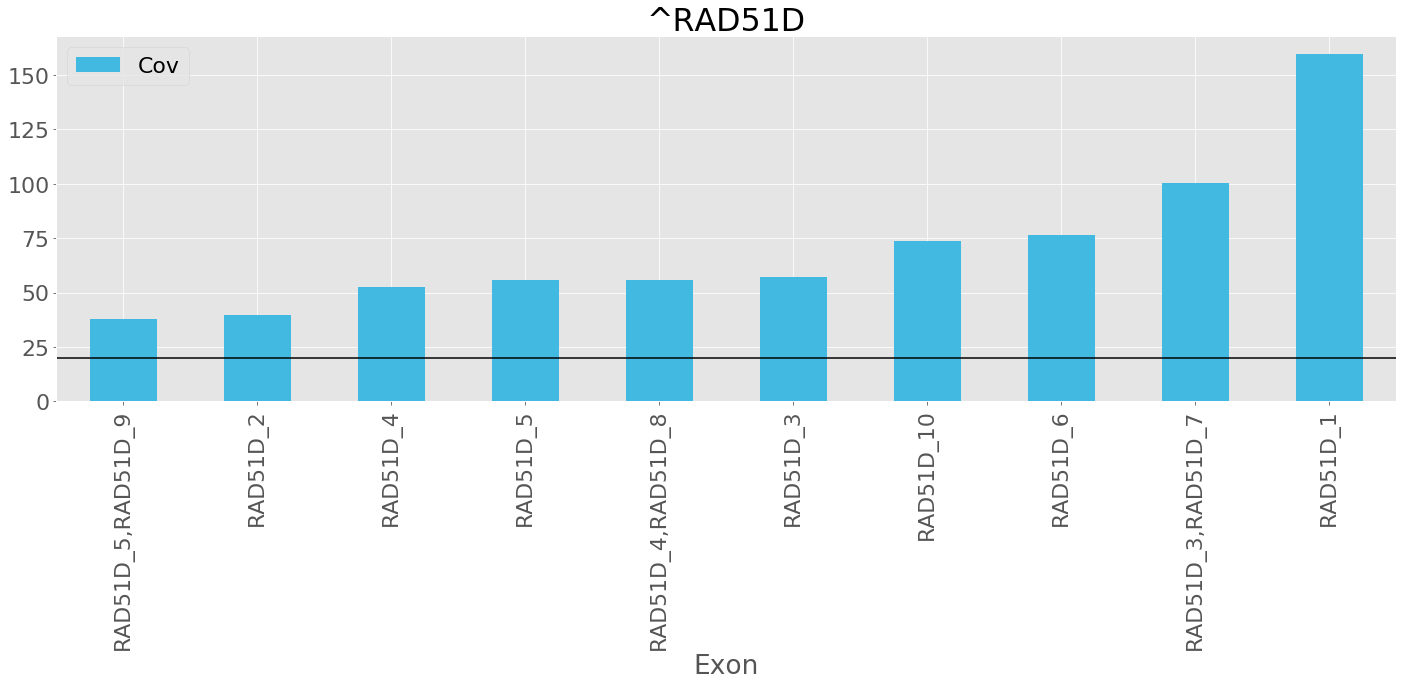

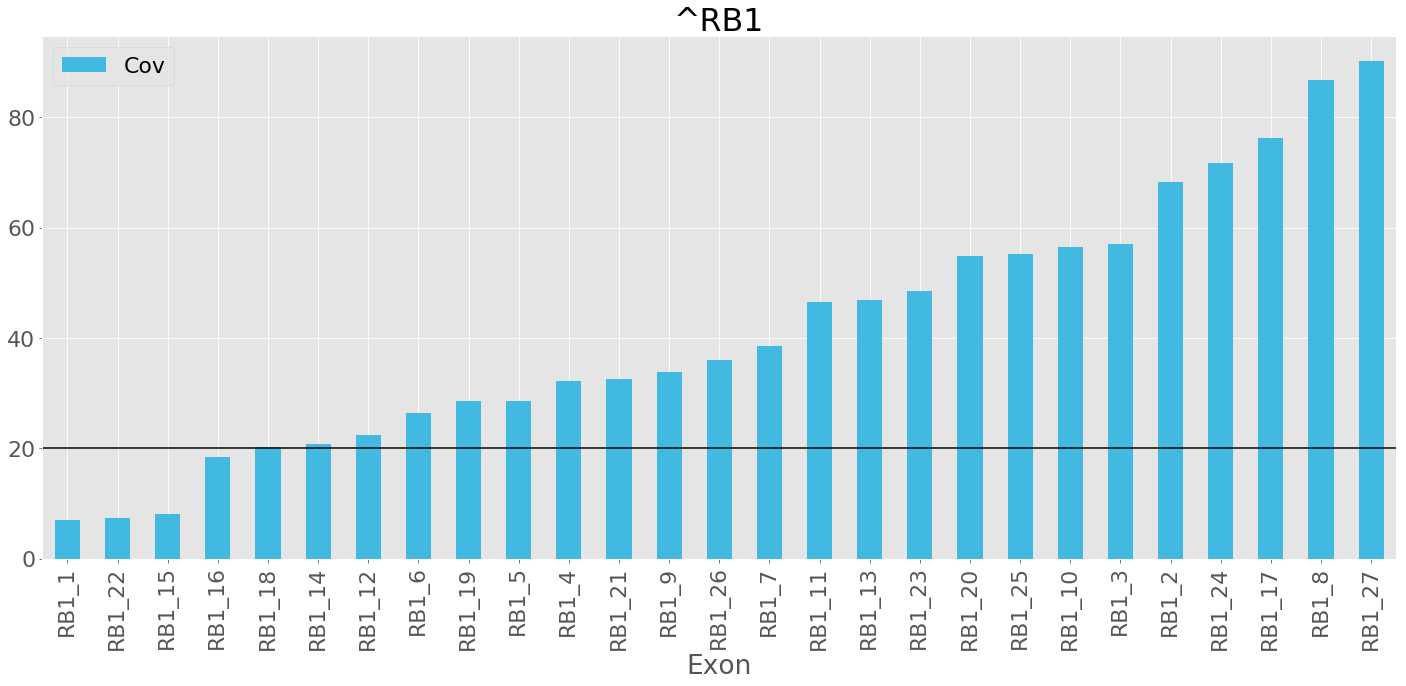

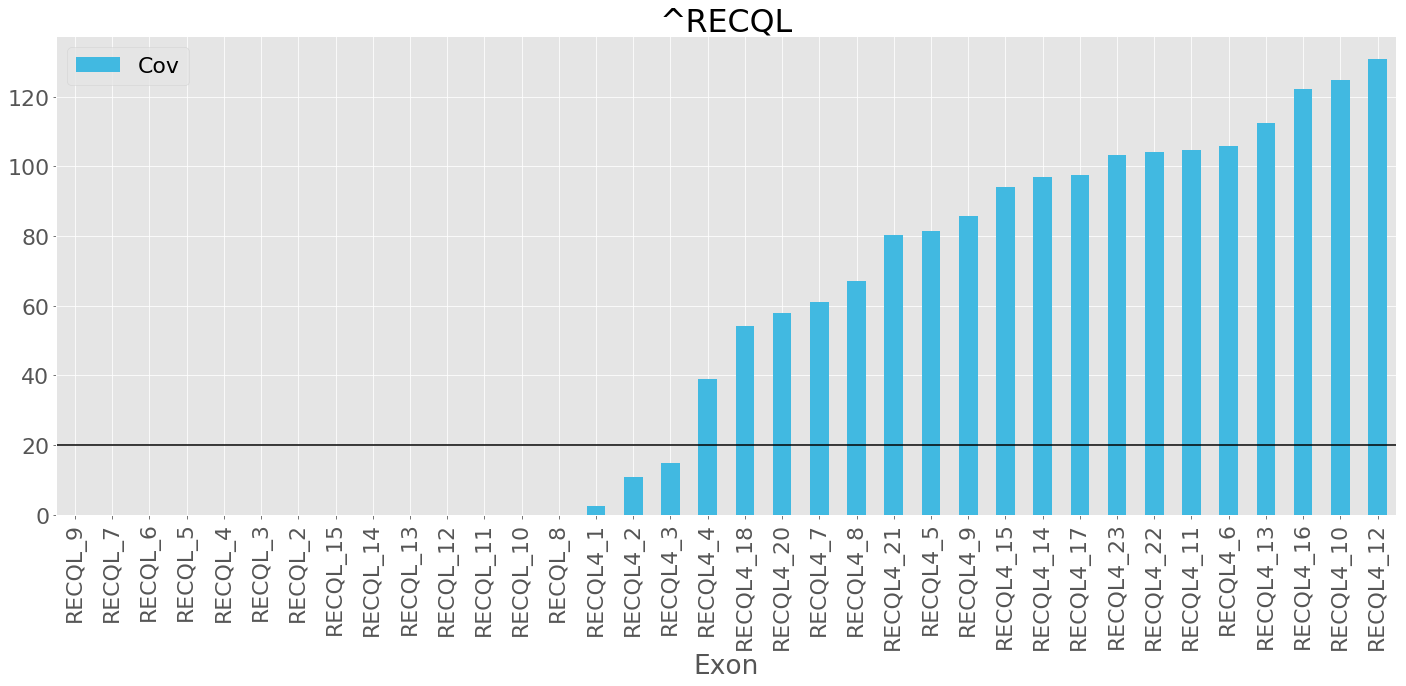

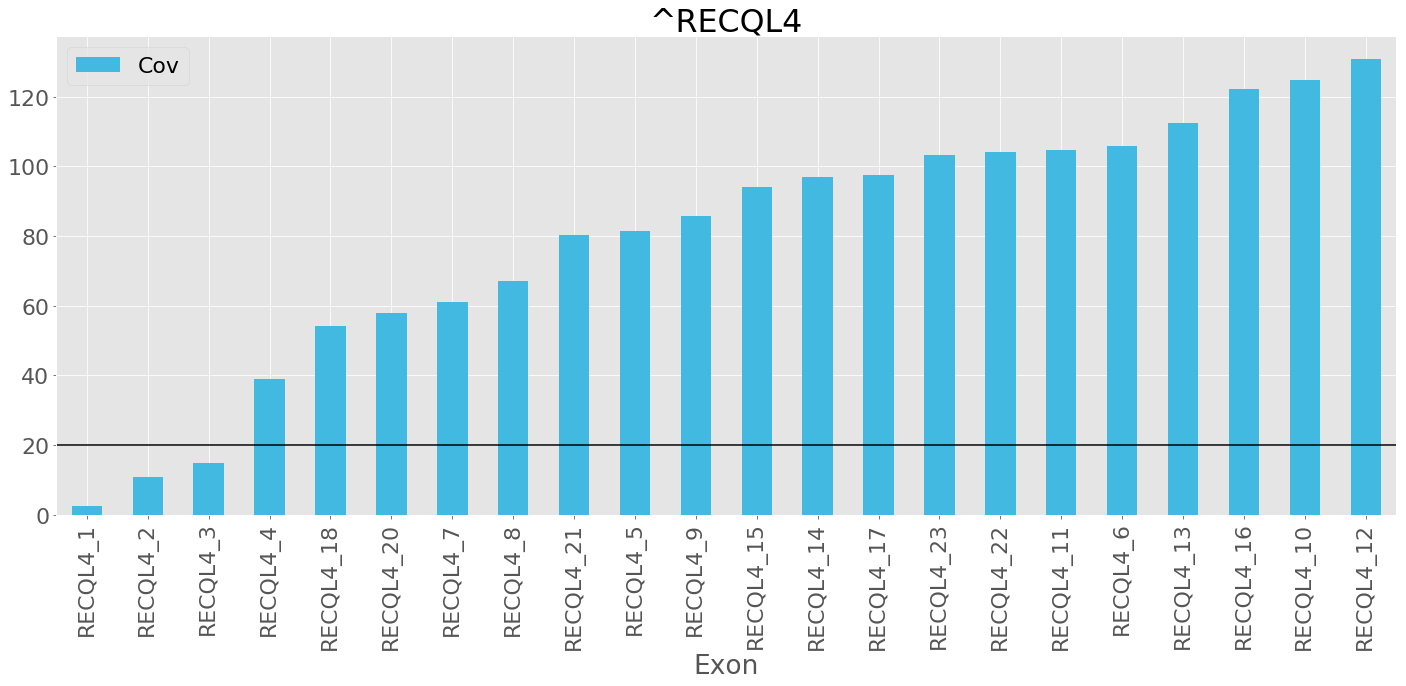

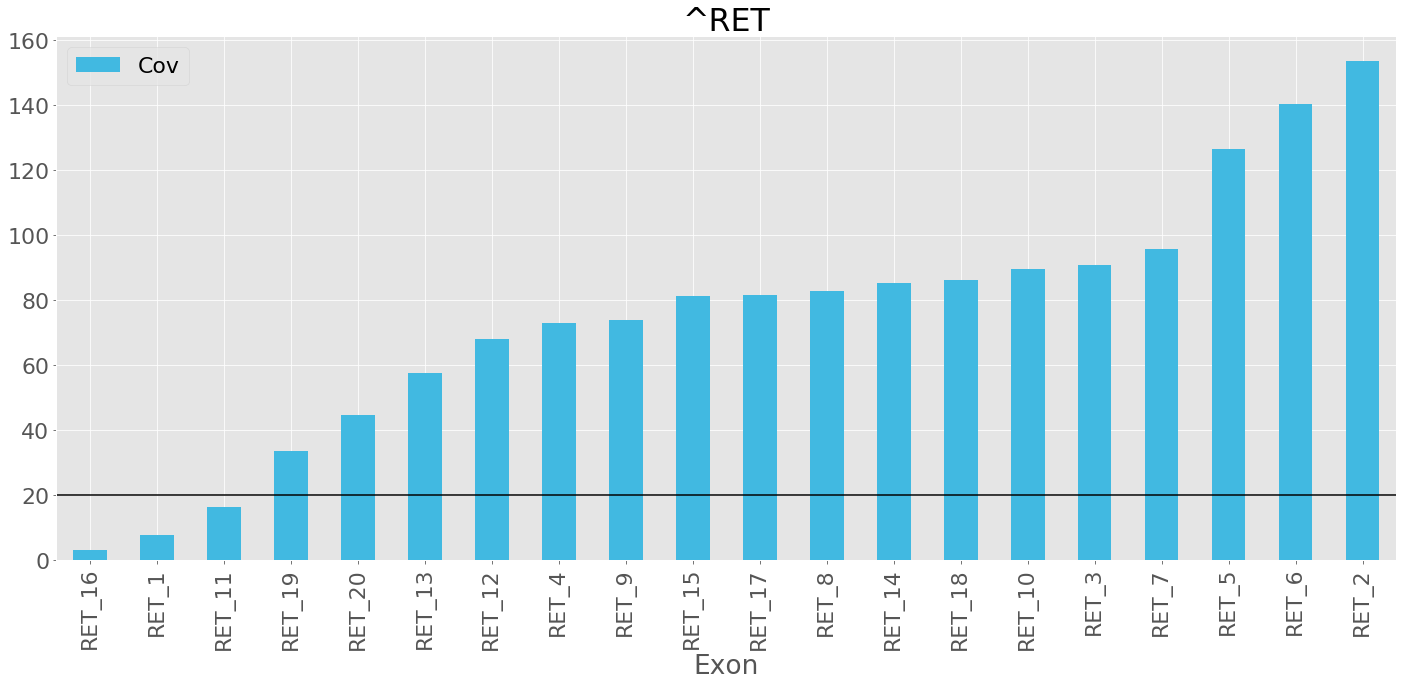

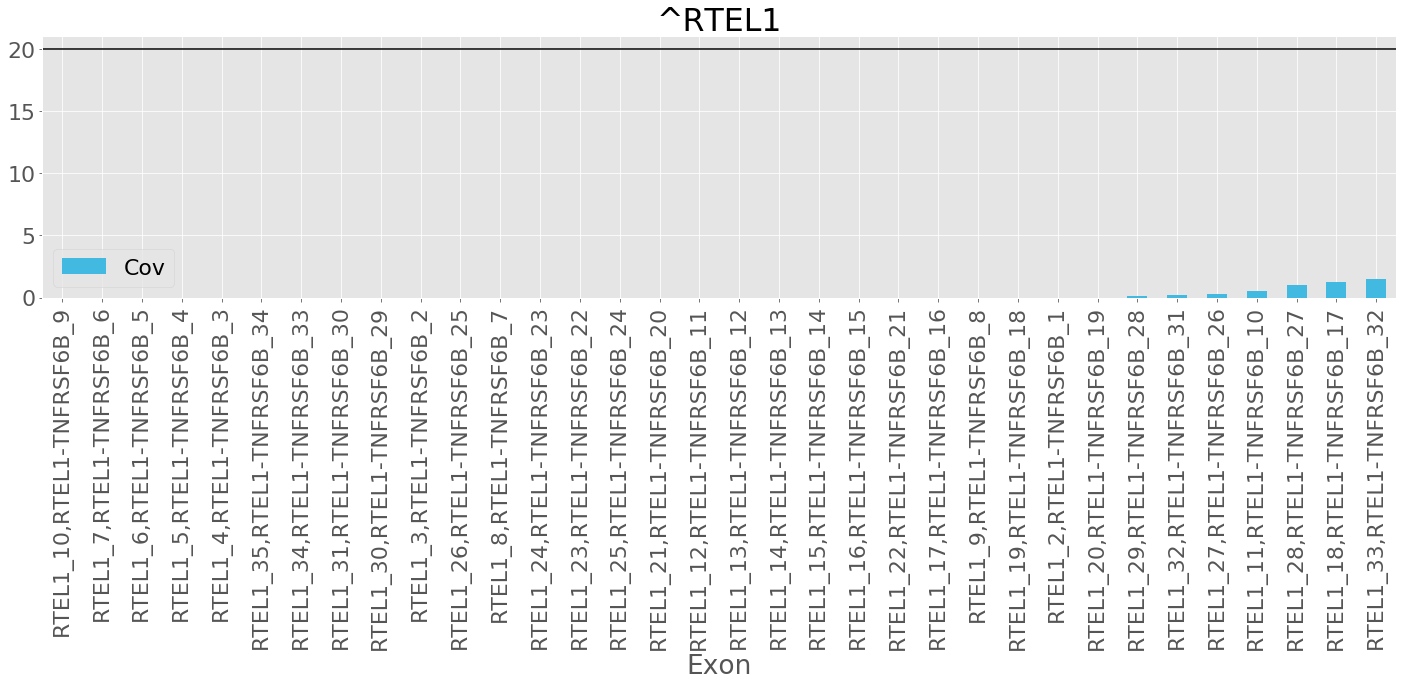

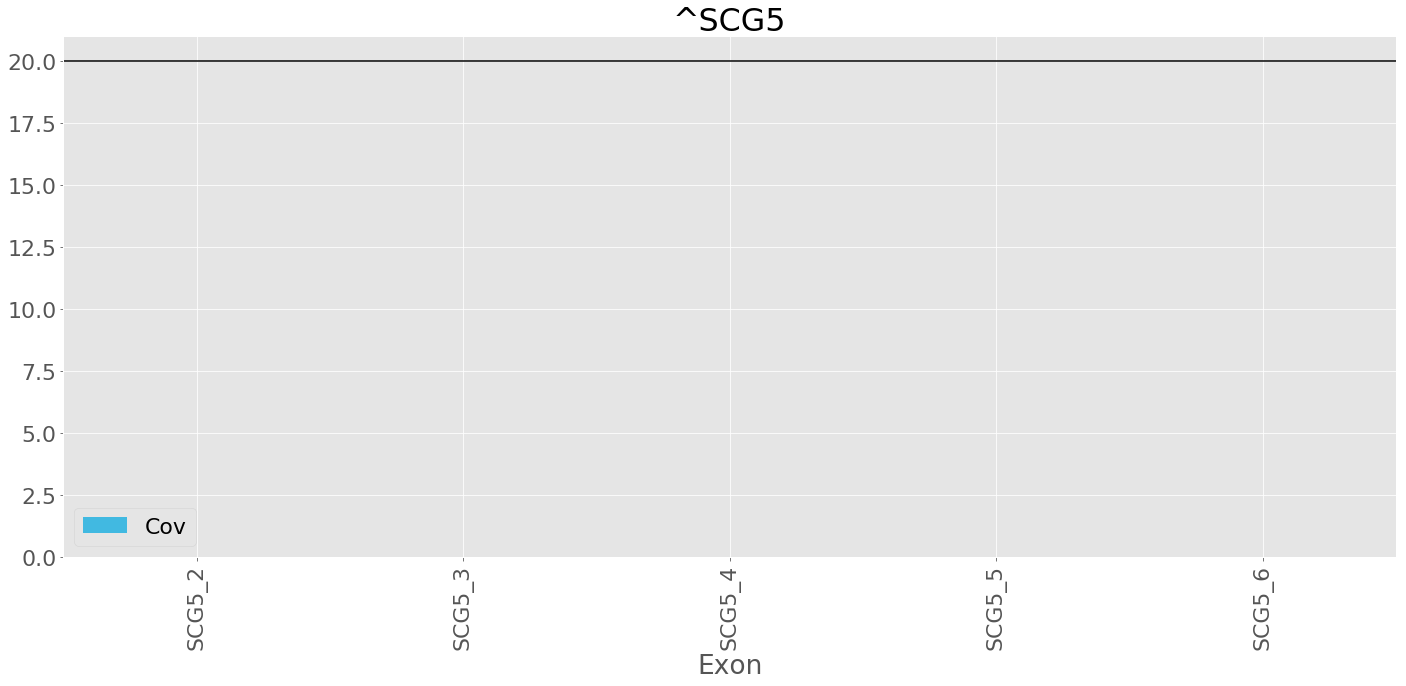

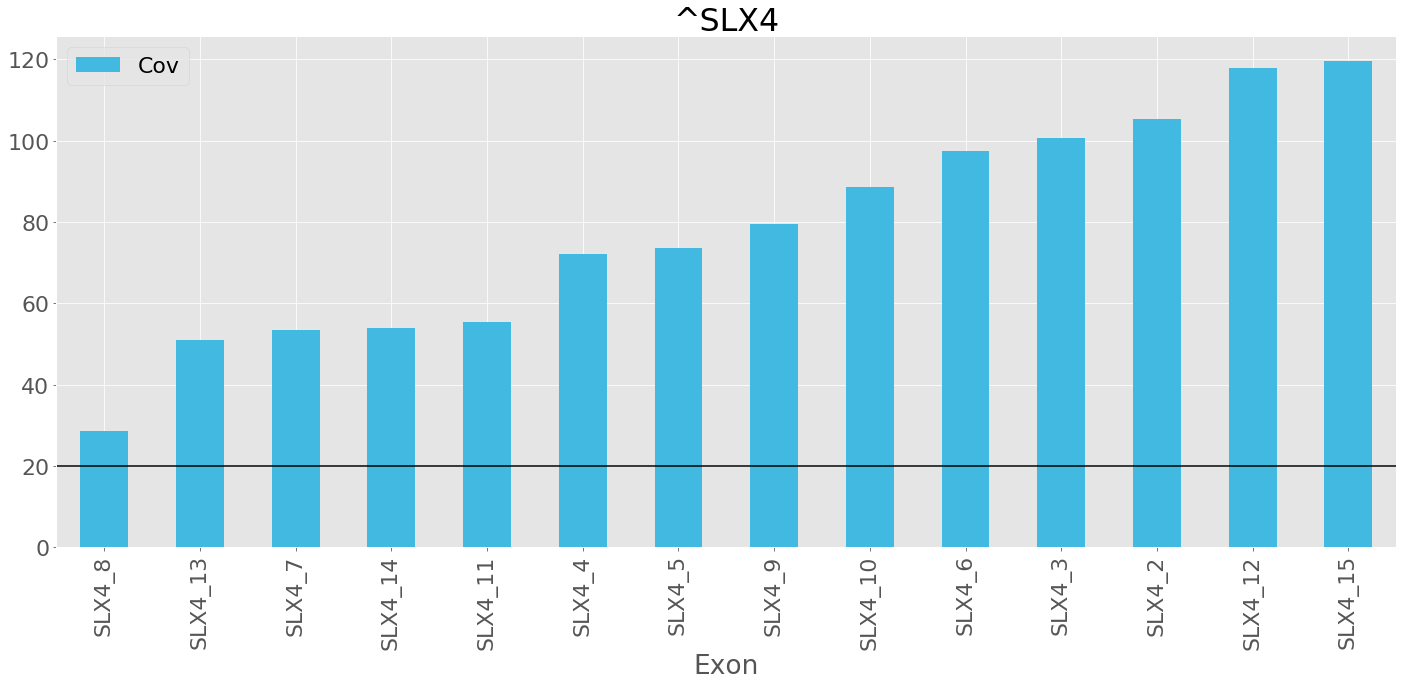

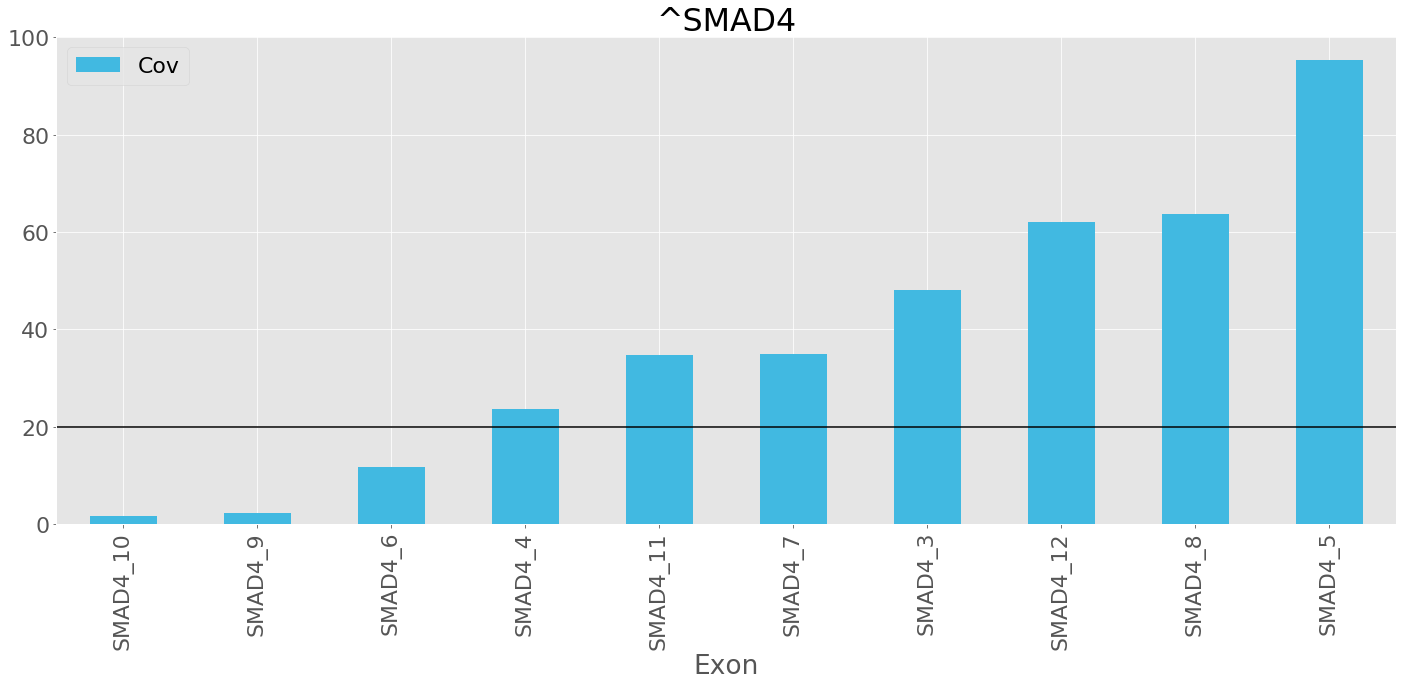

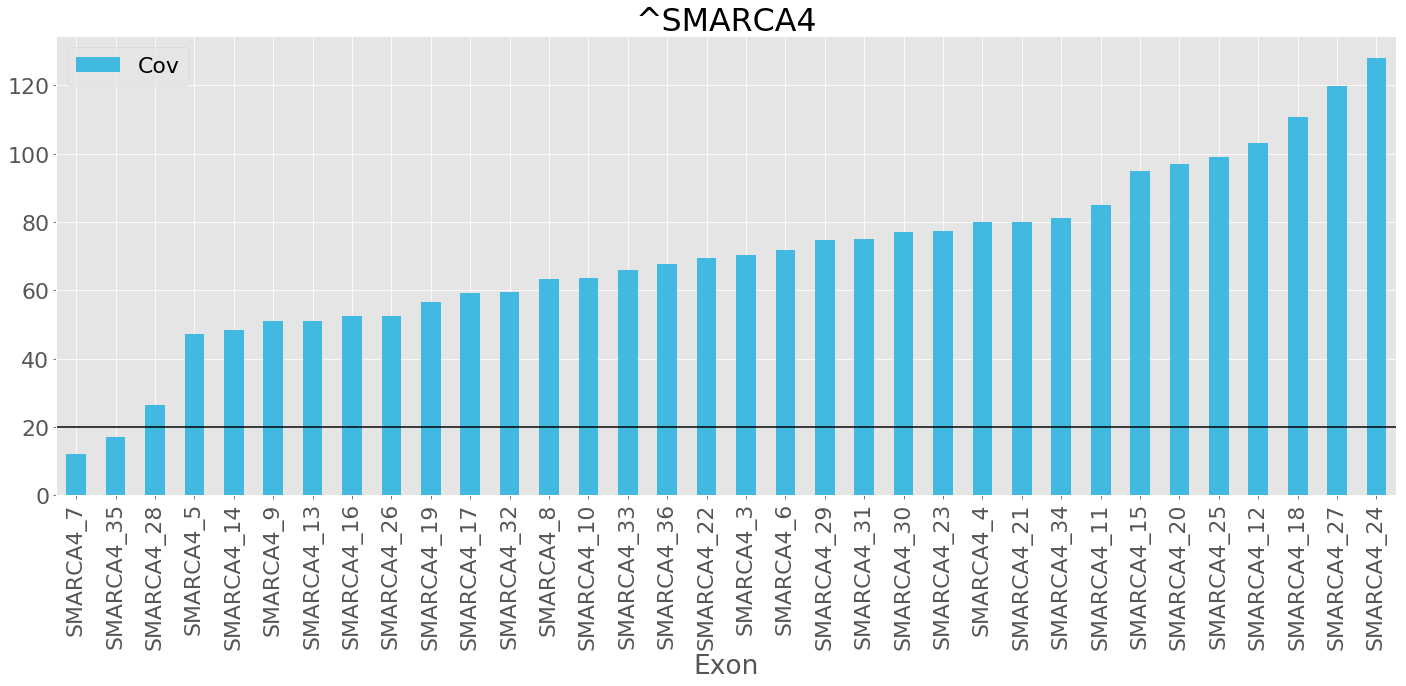

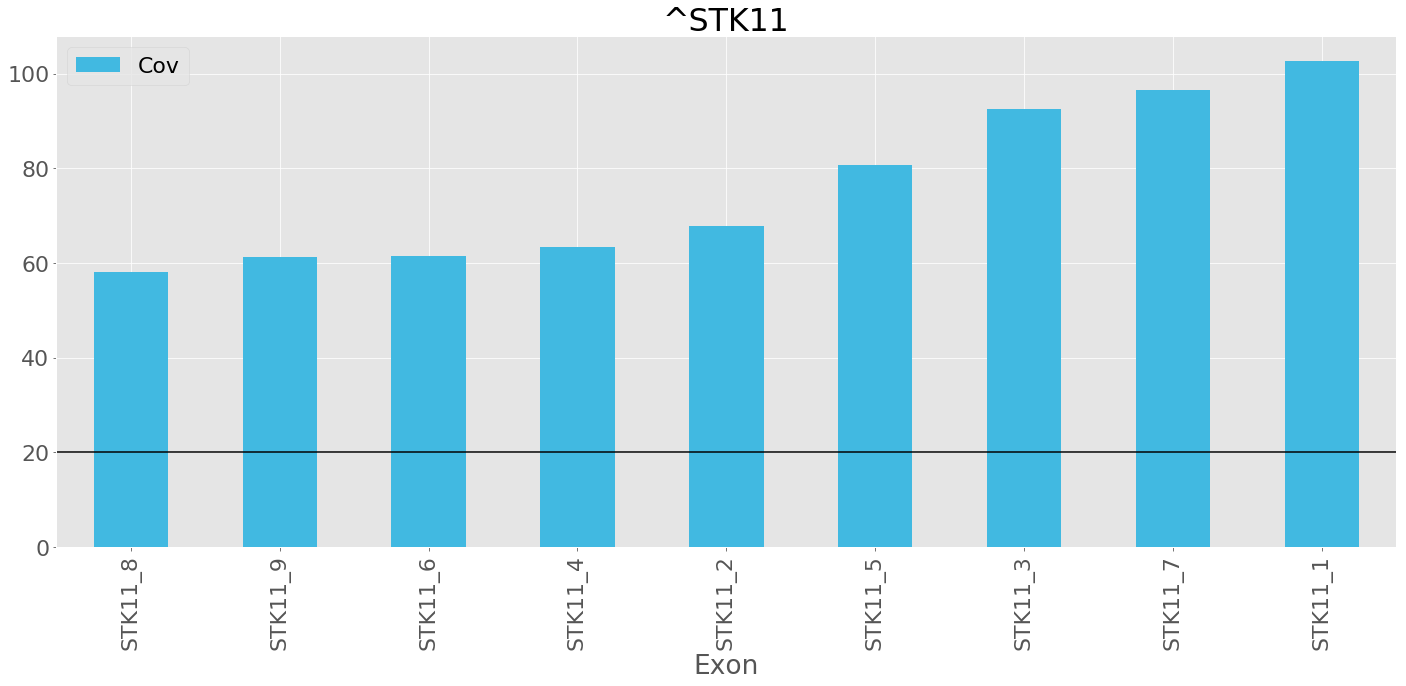

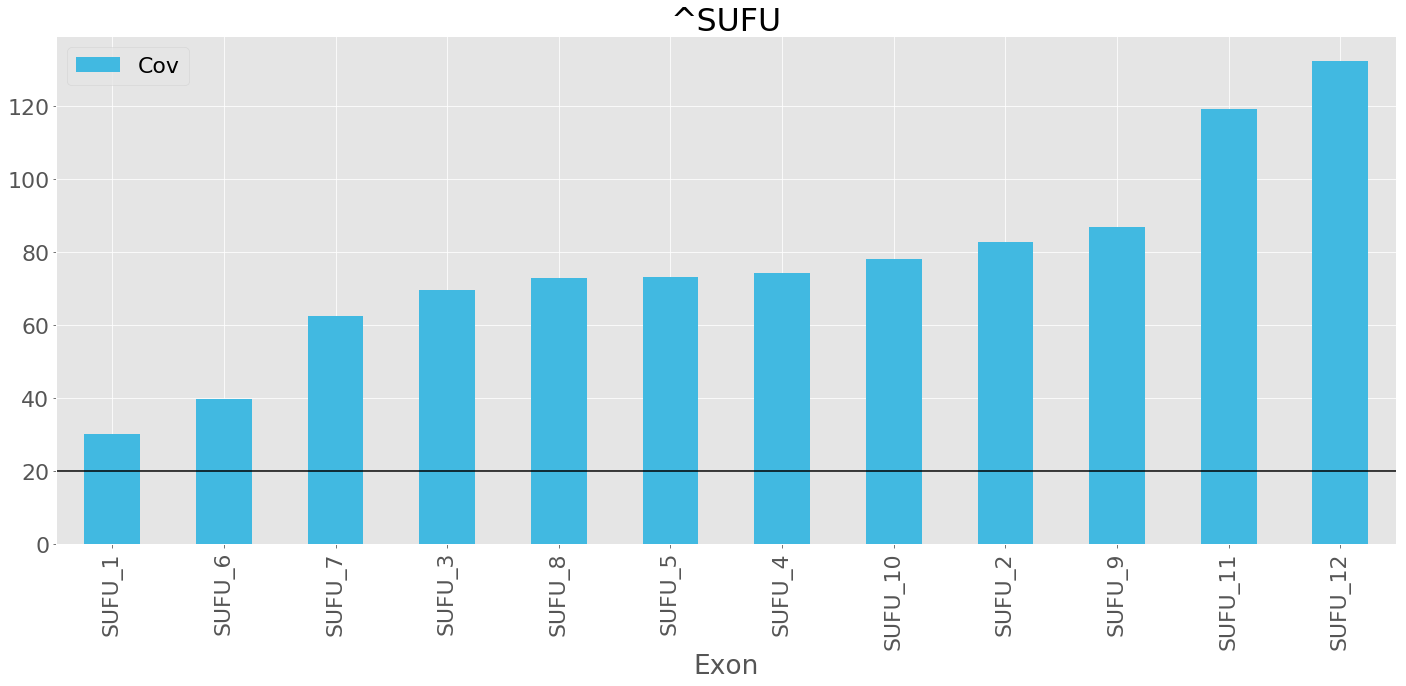

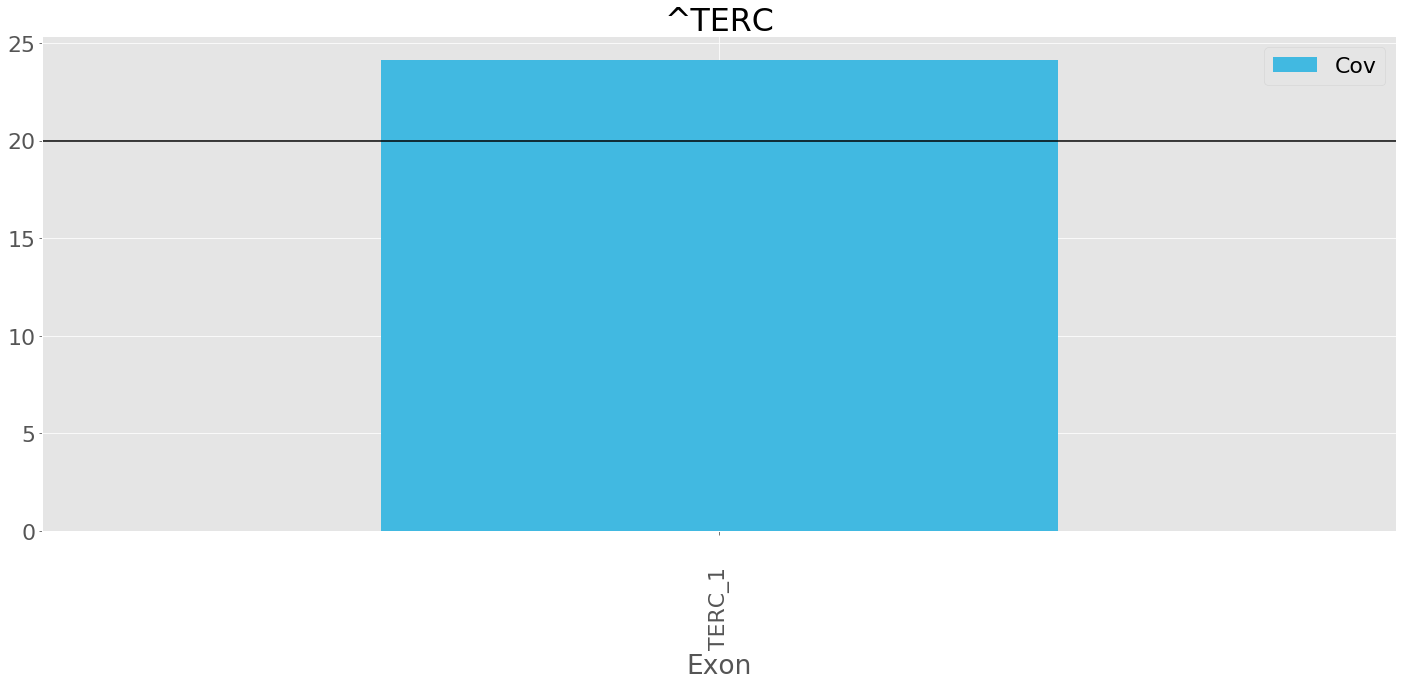

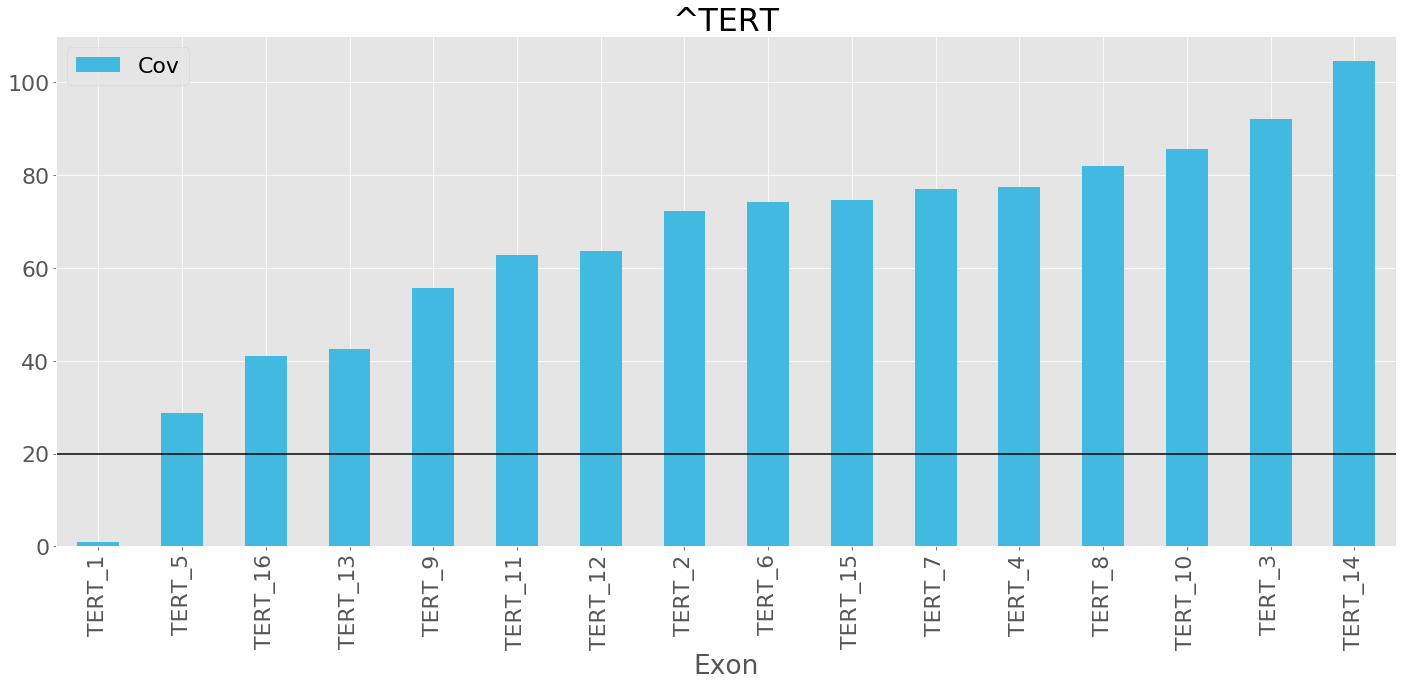

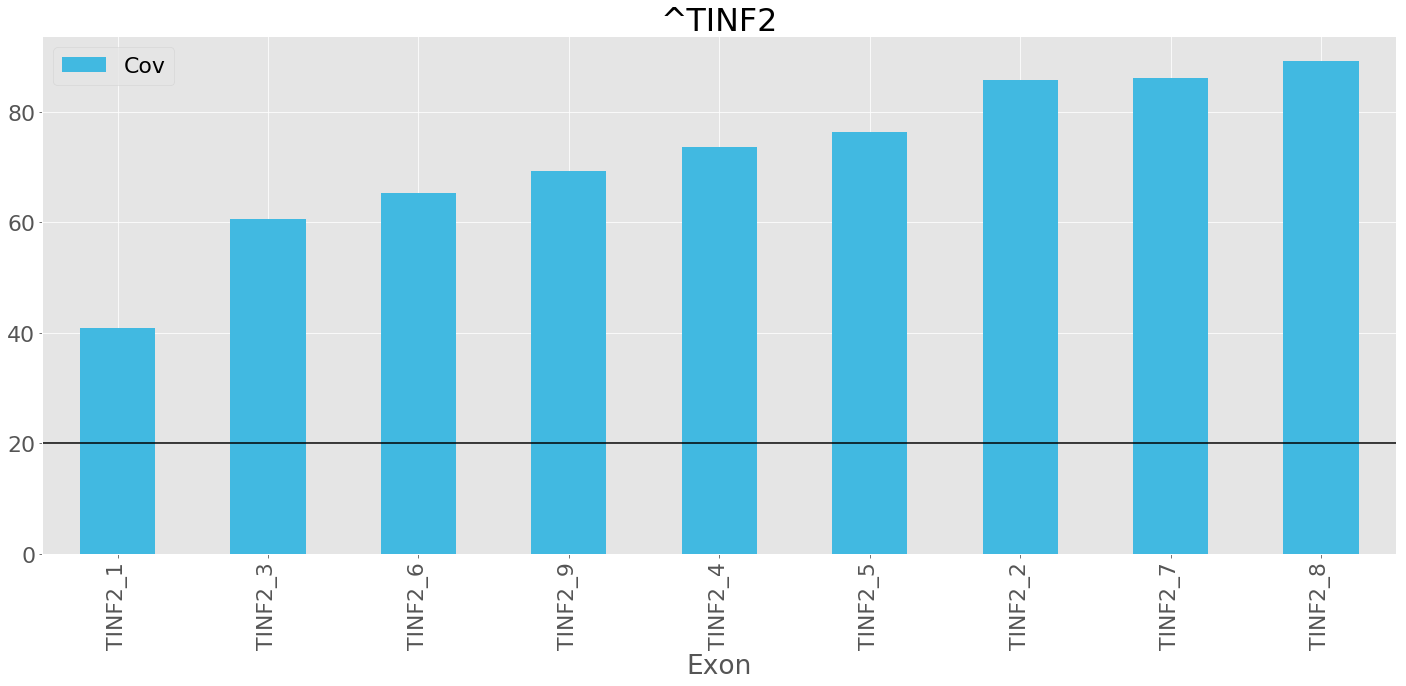

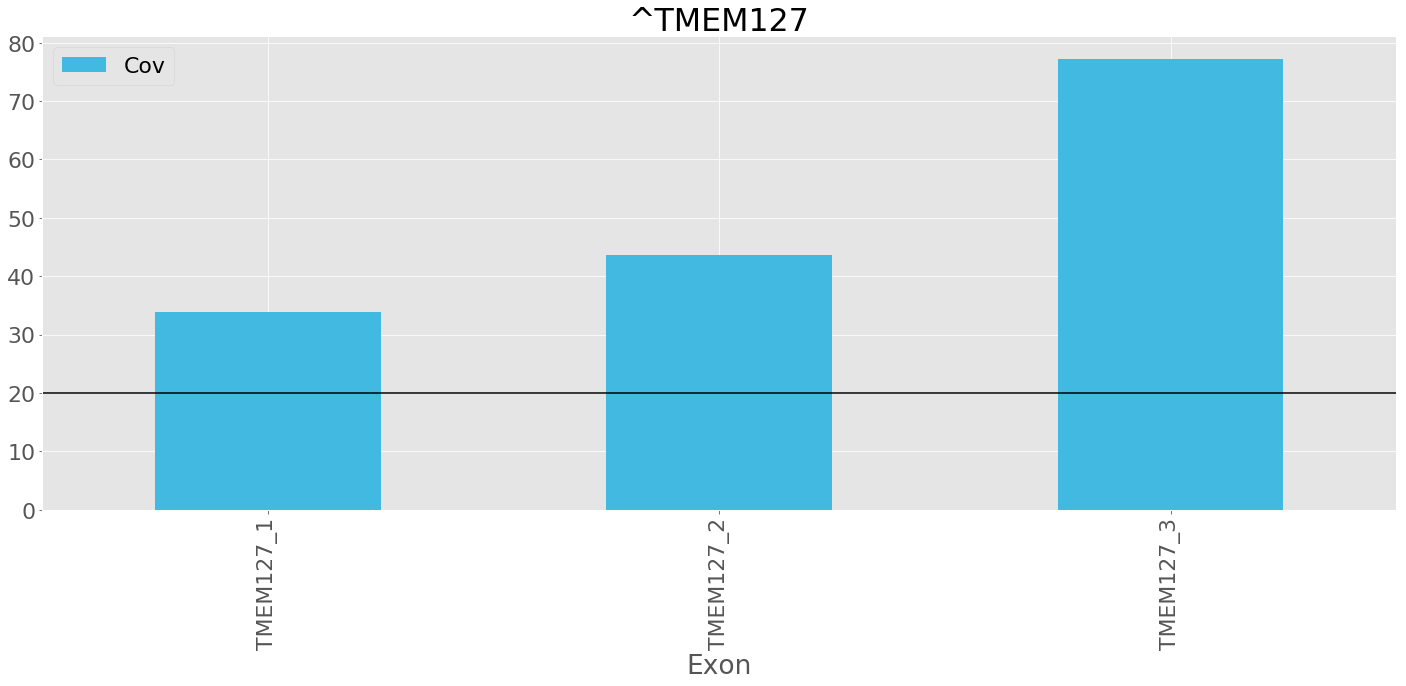

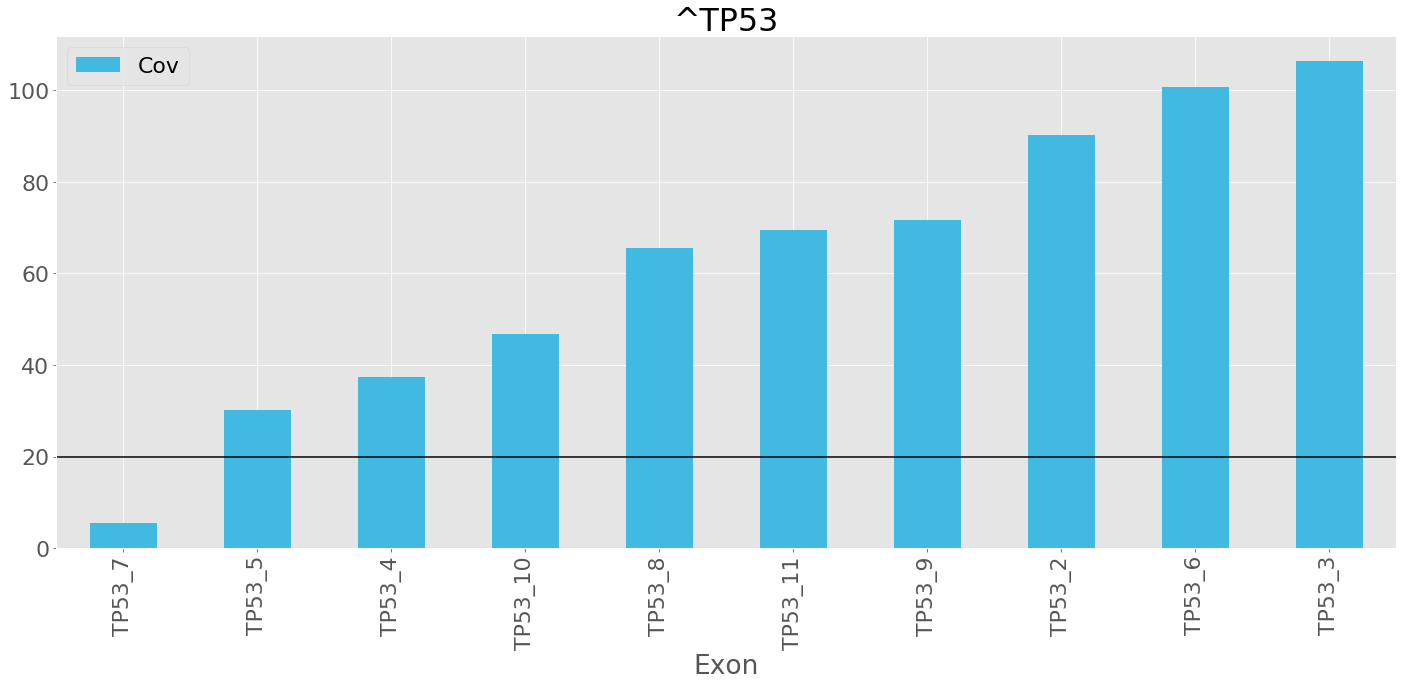

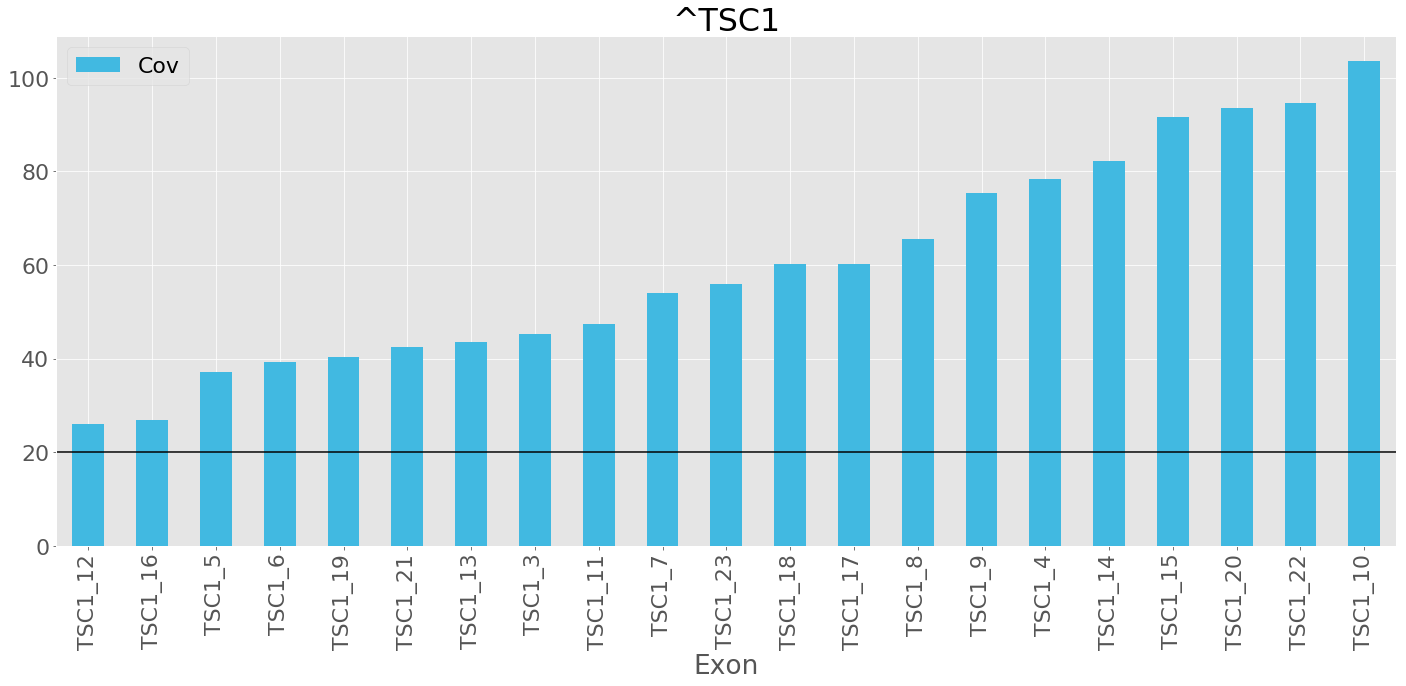

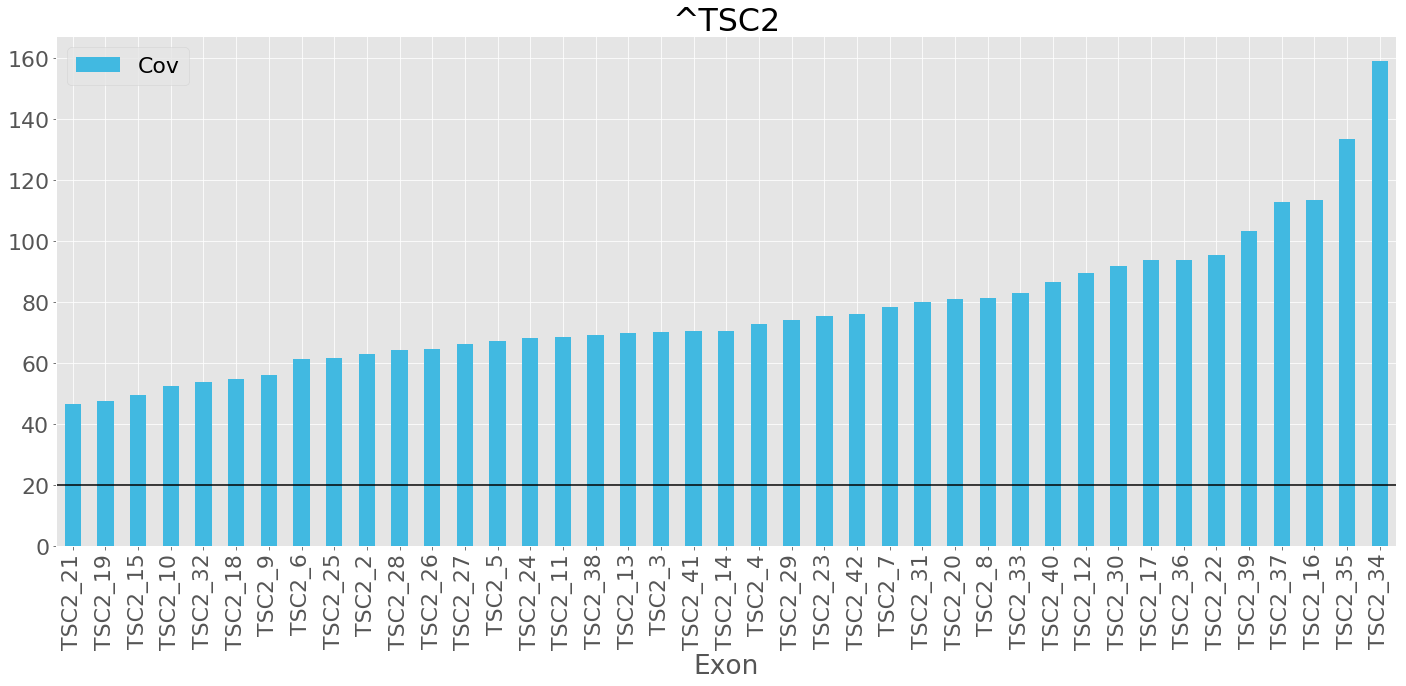

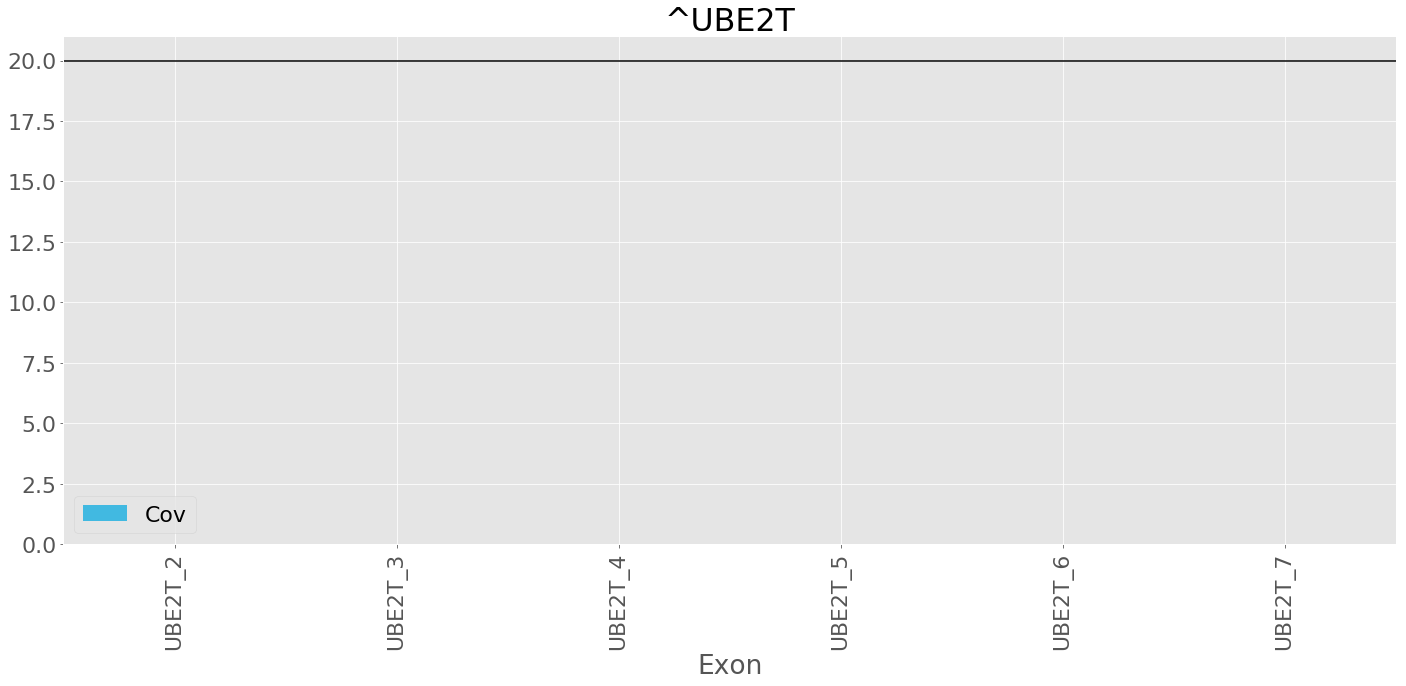

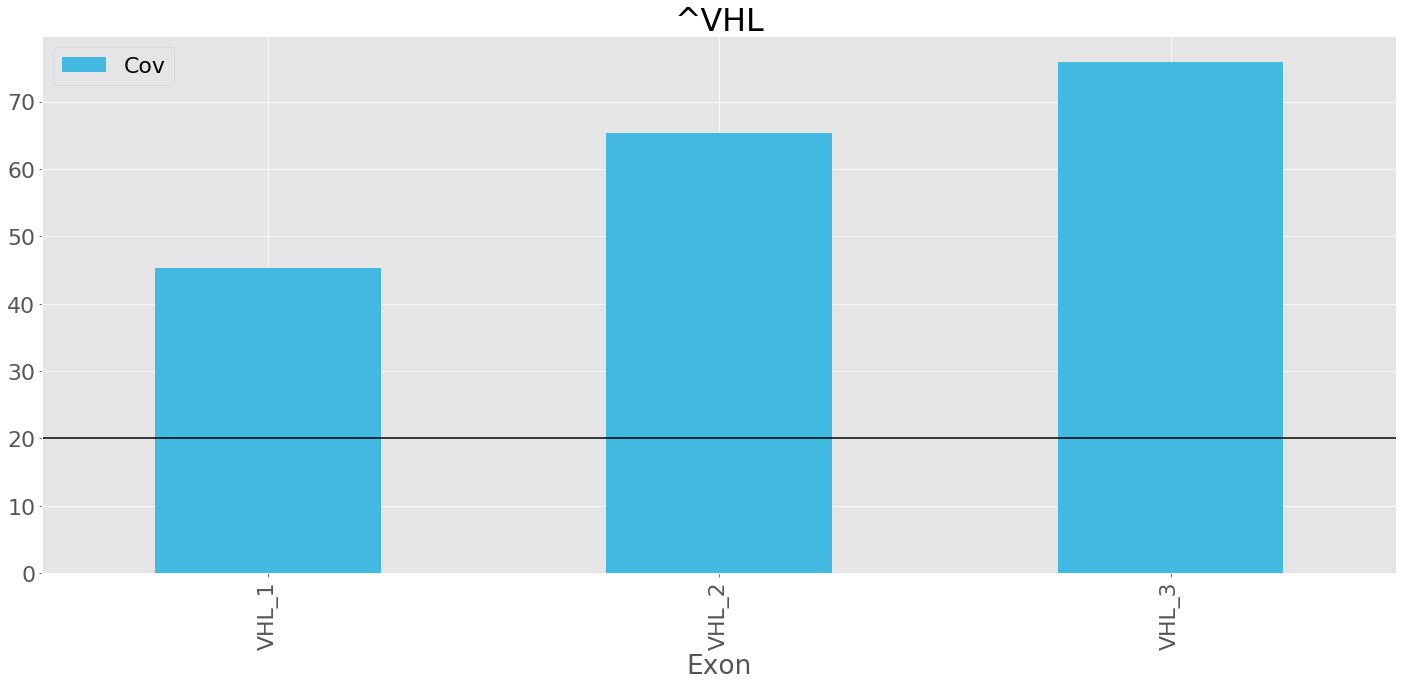

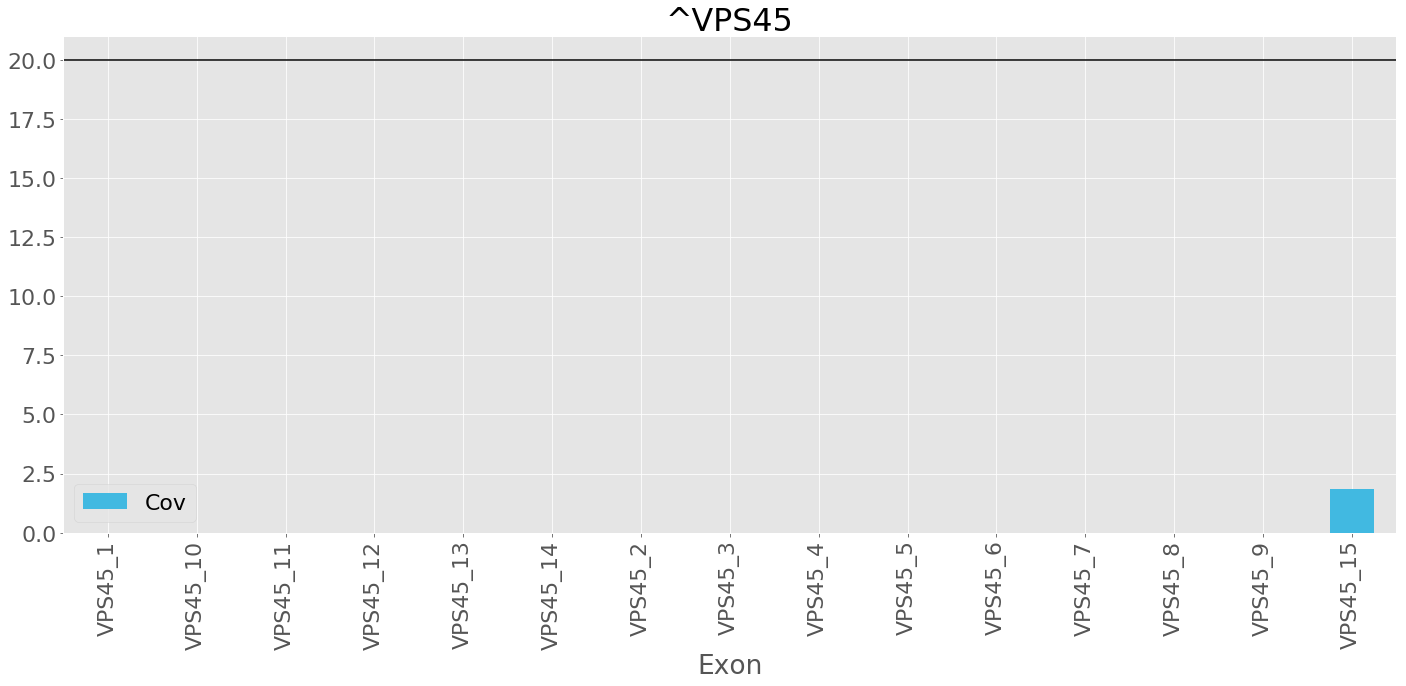

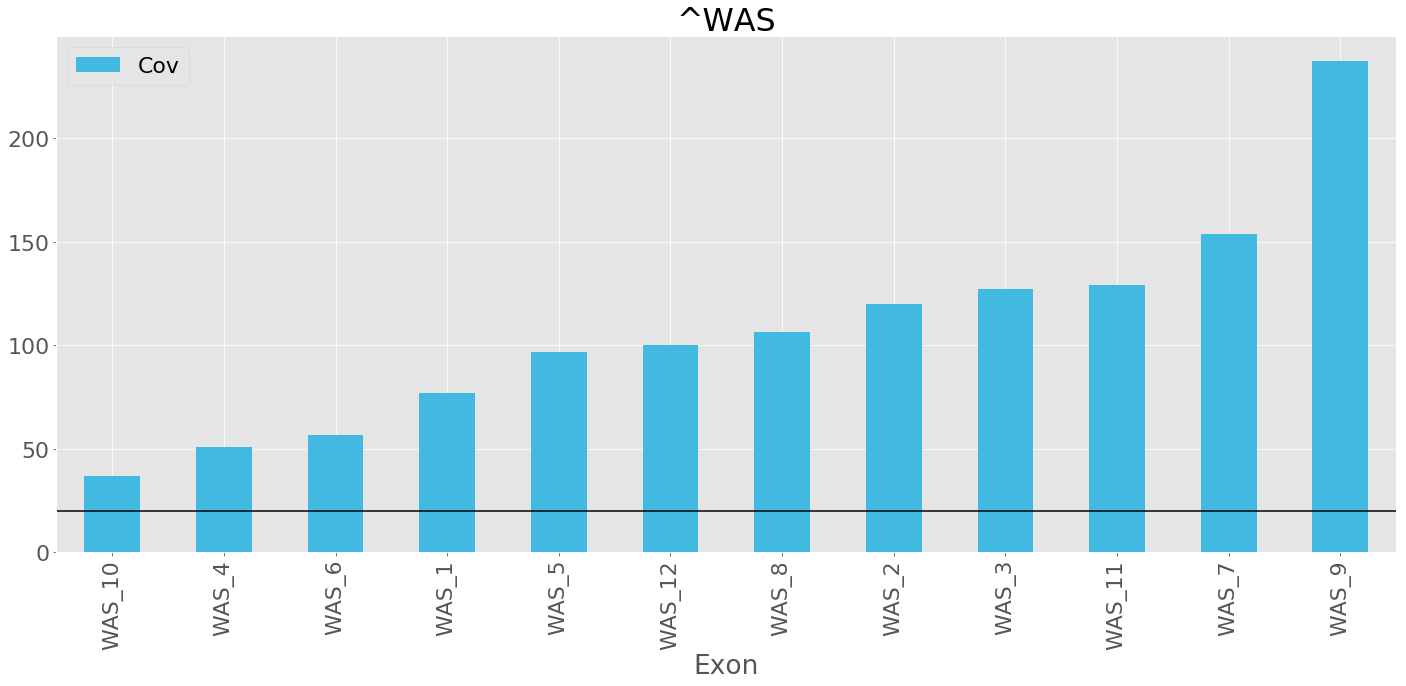

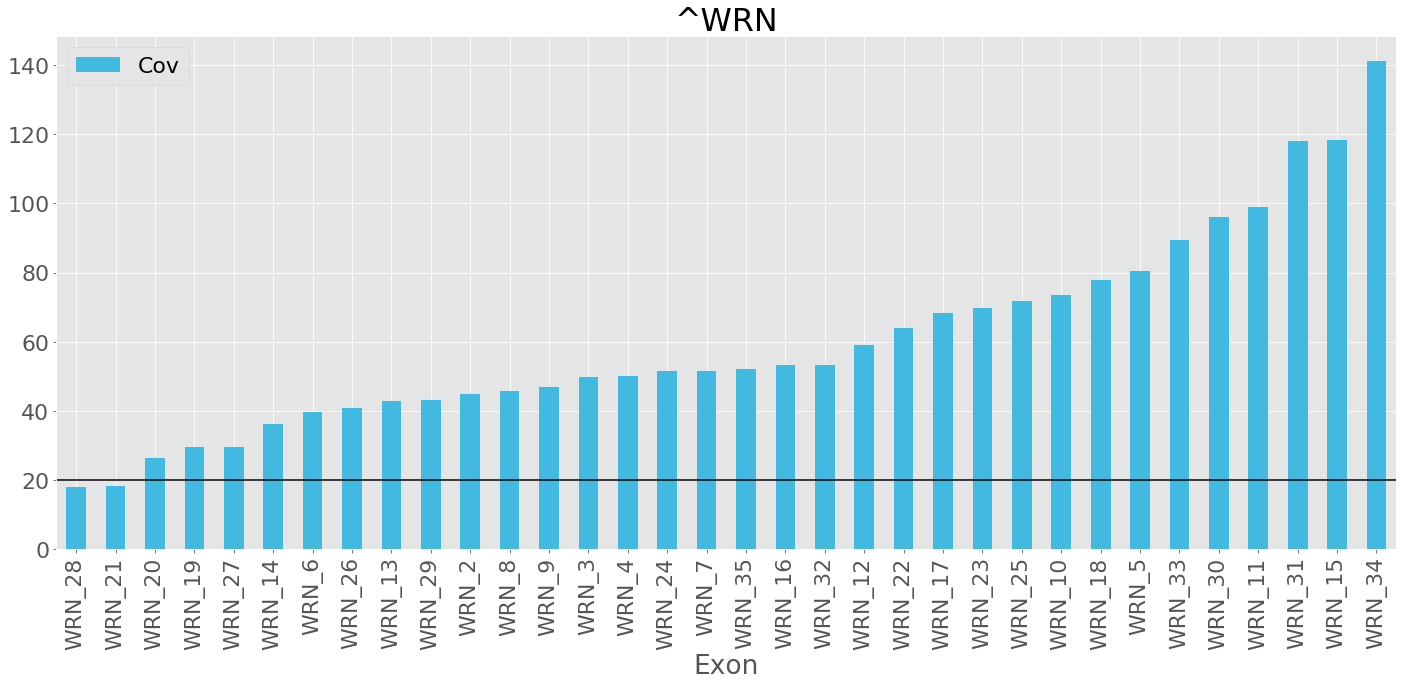

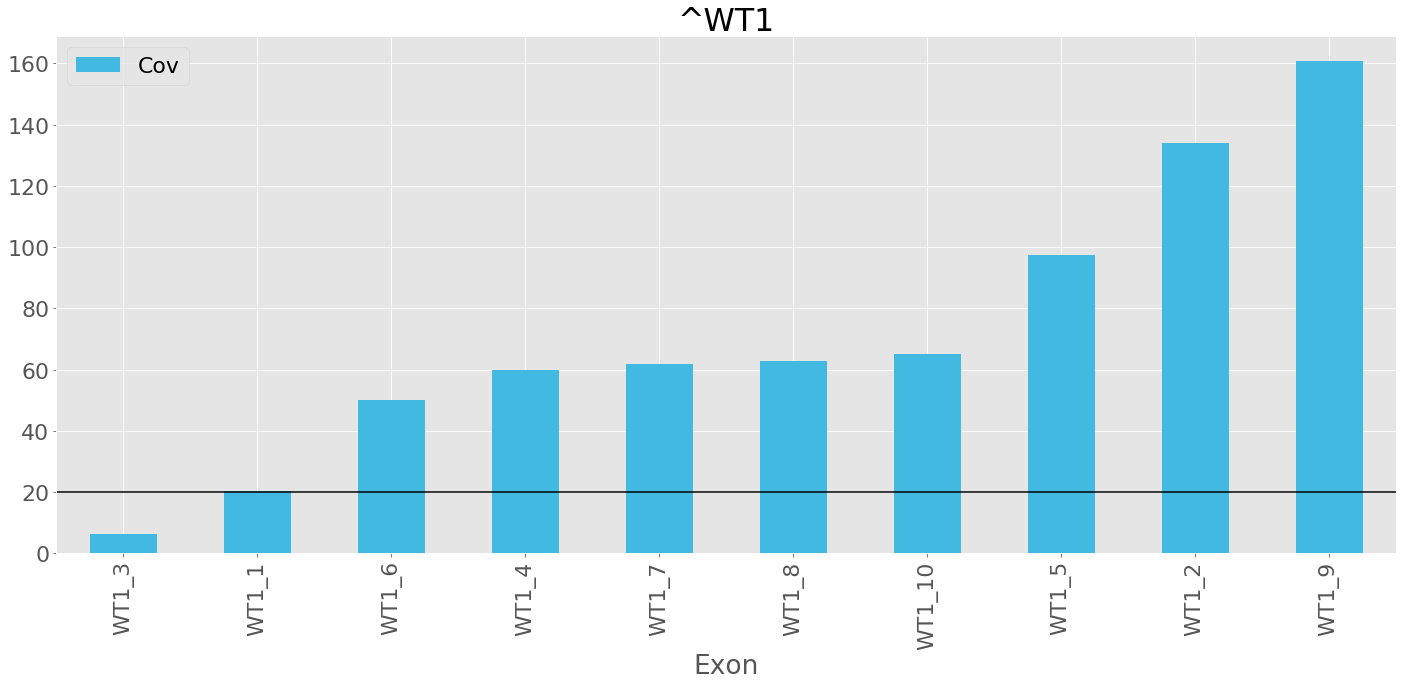

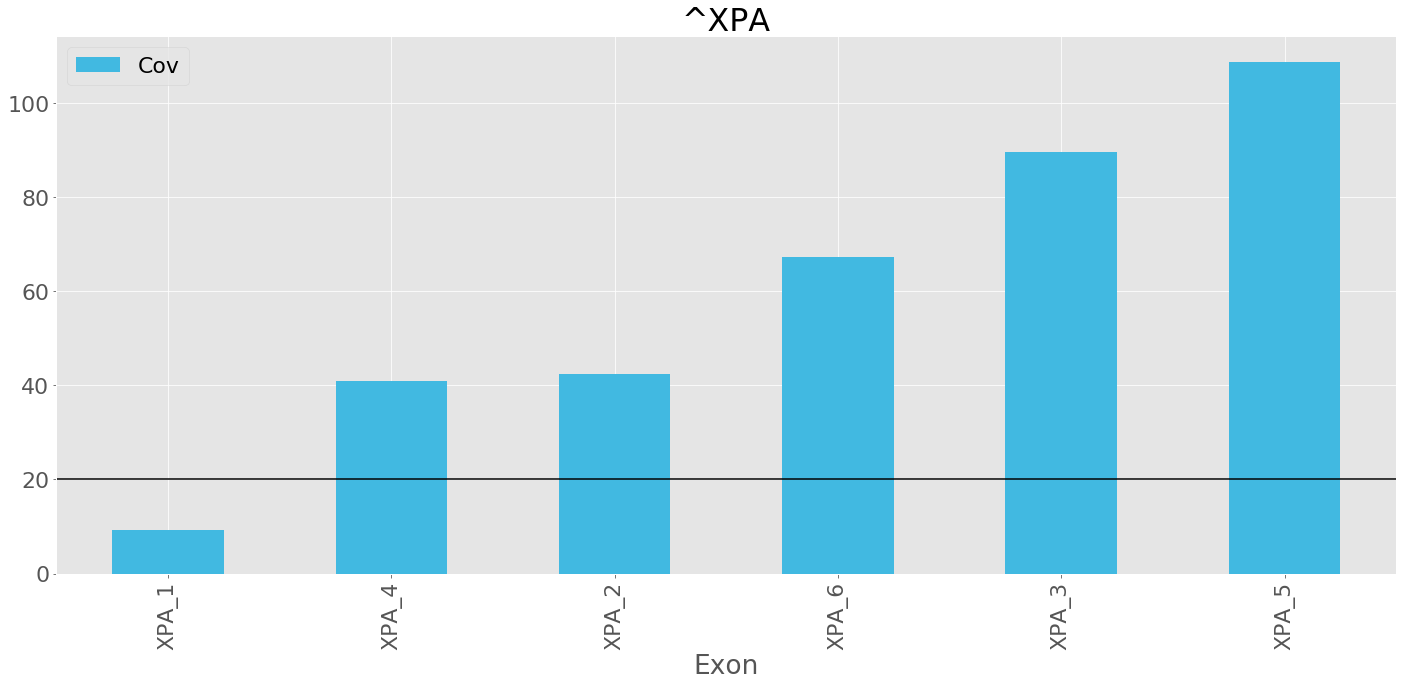

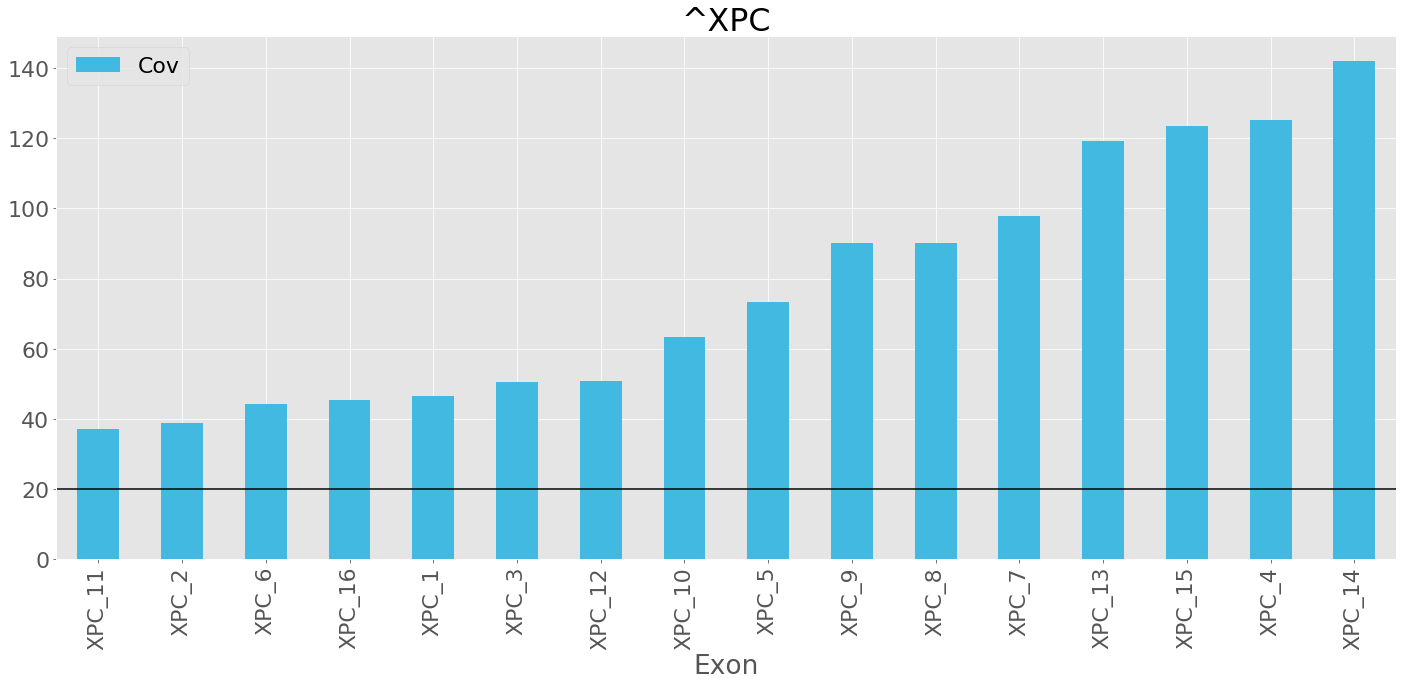

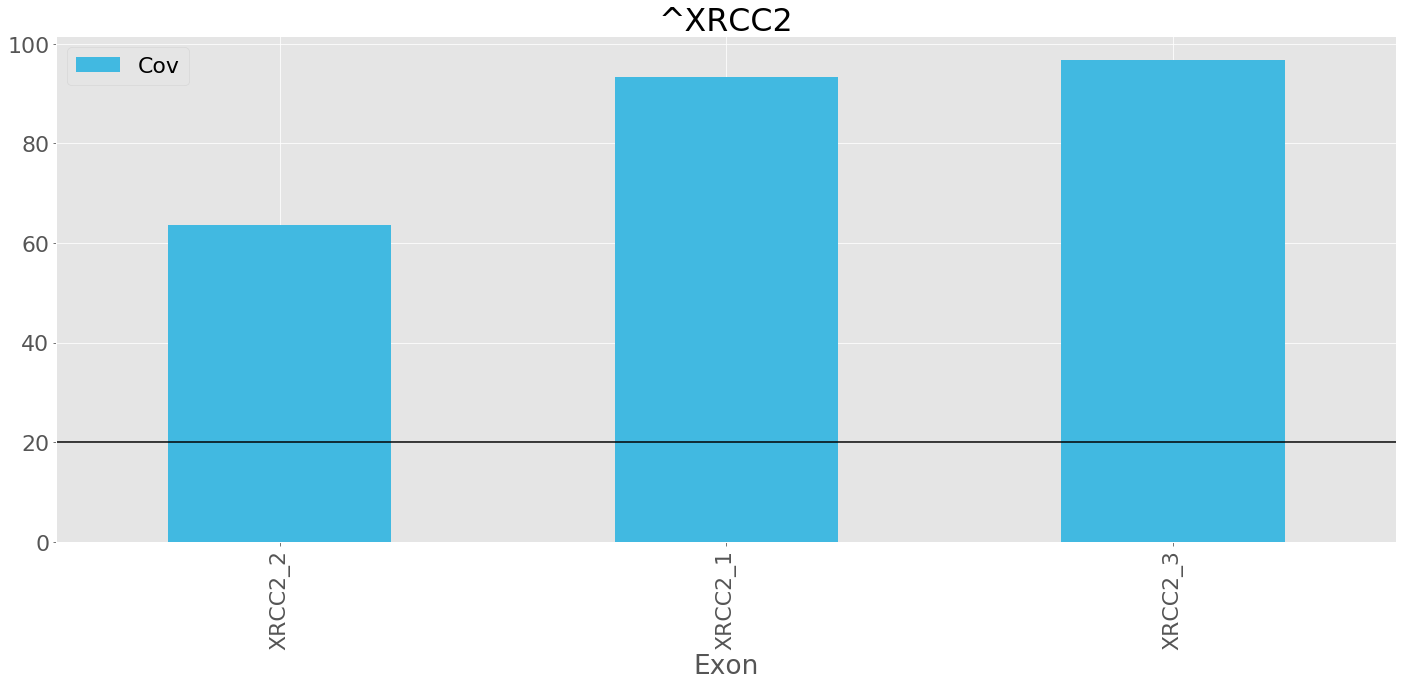

In [41]:
for genes in genes:
    grafico_media(genes)

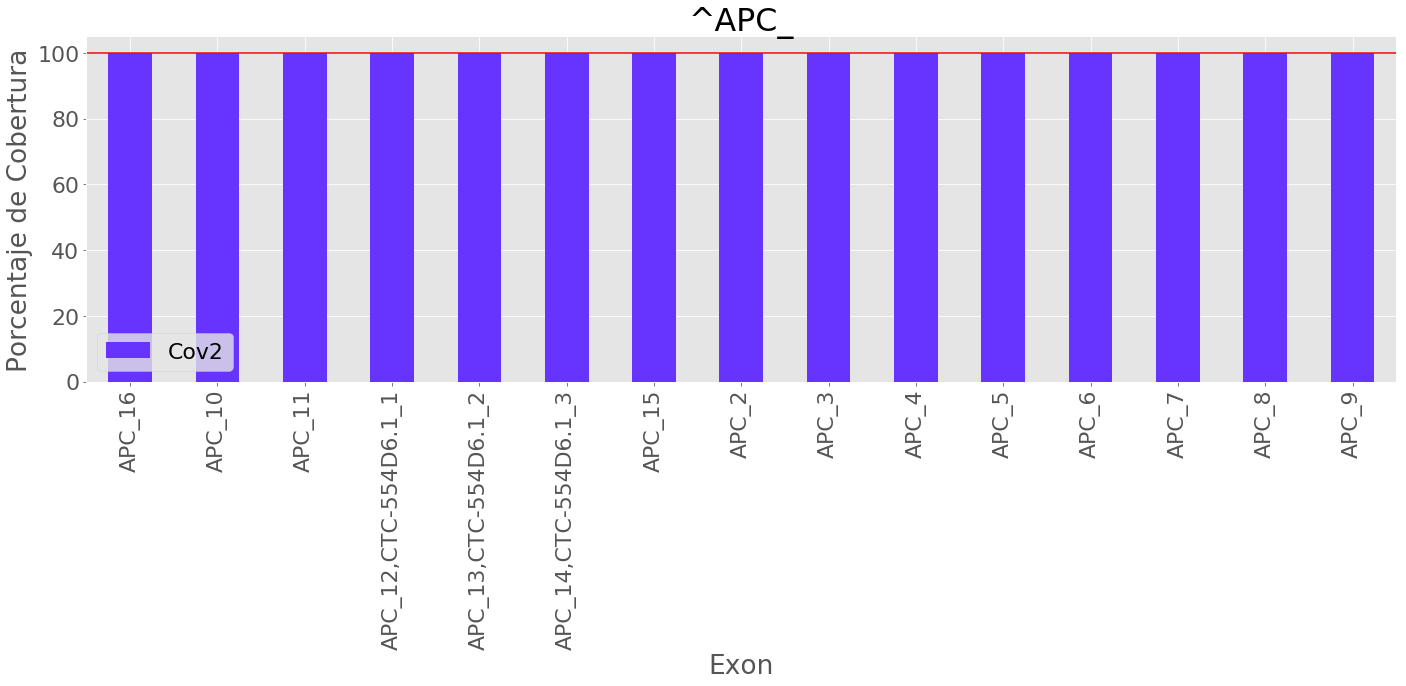

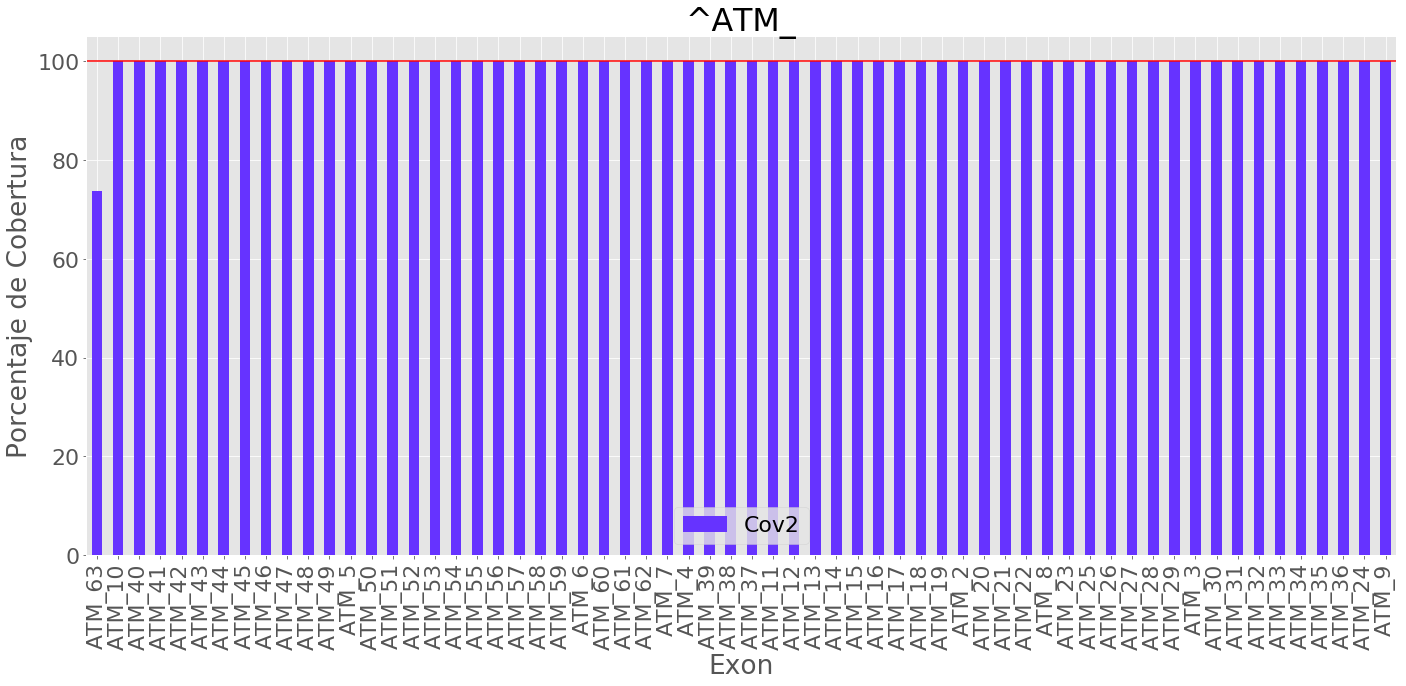

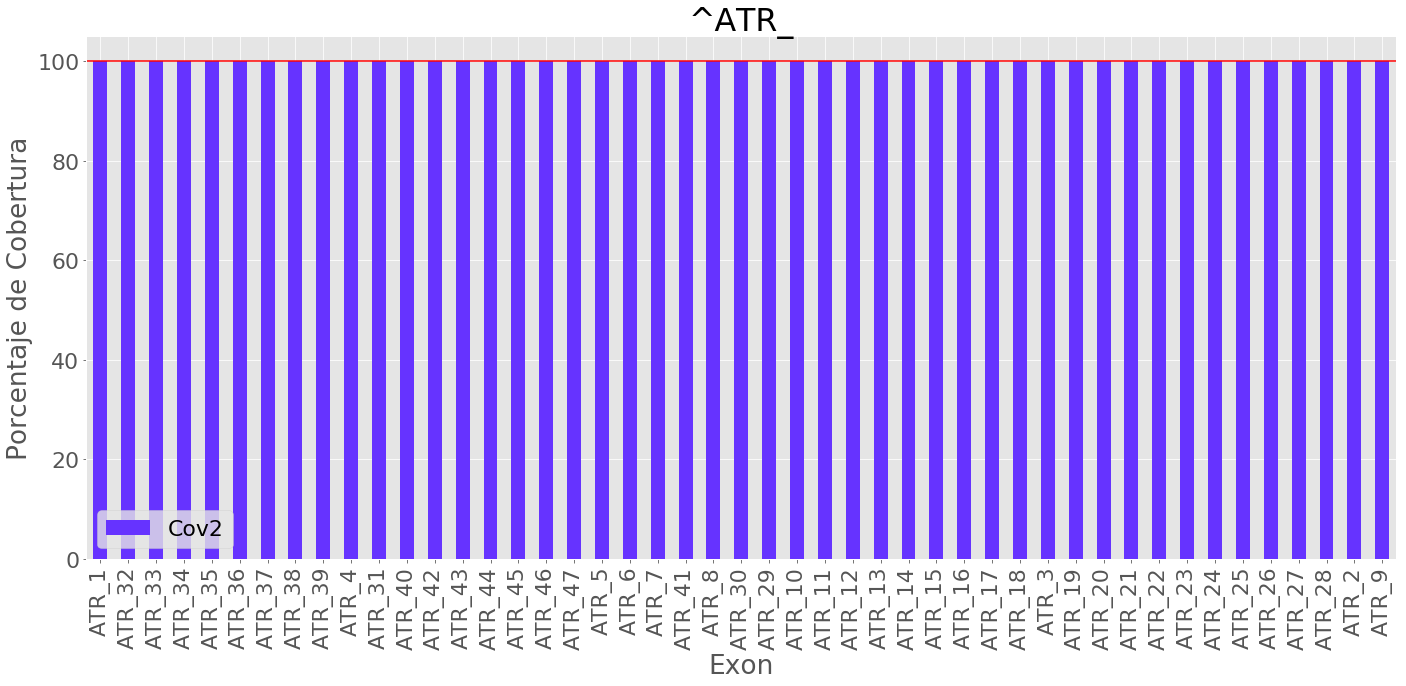

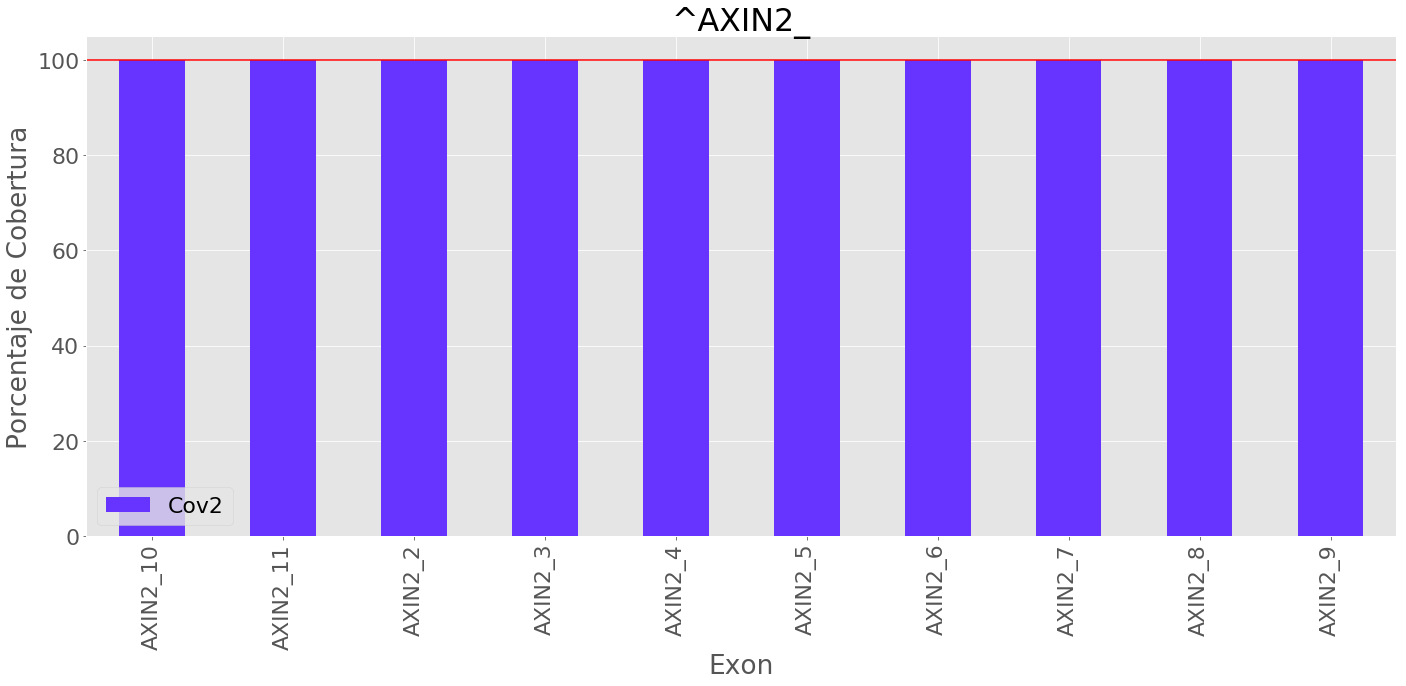

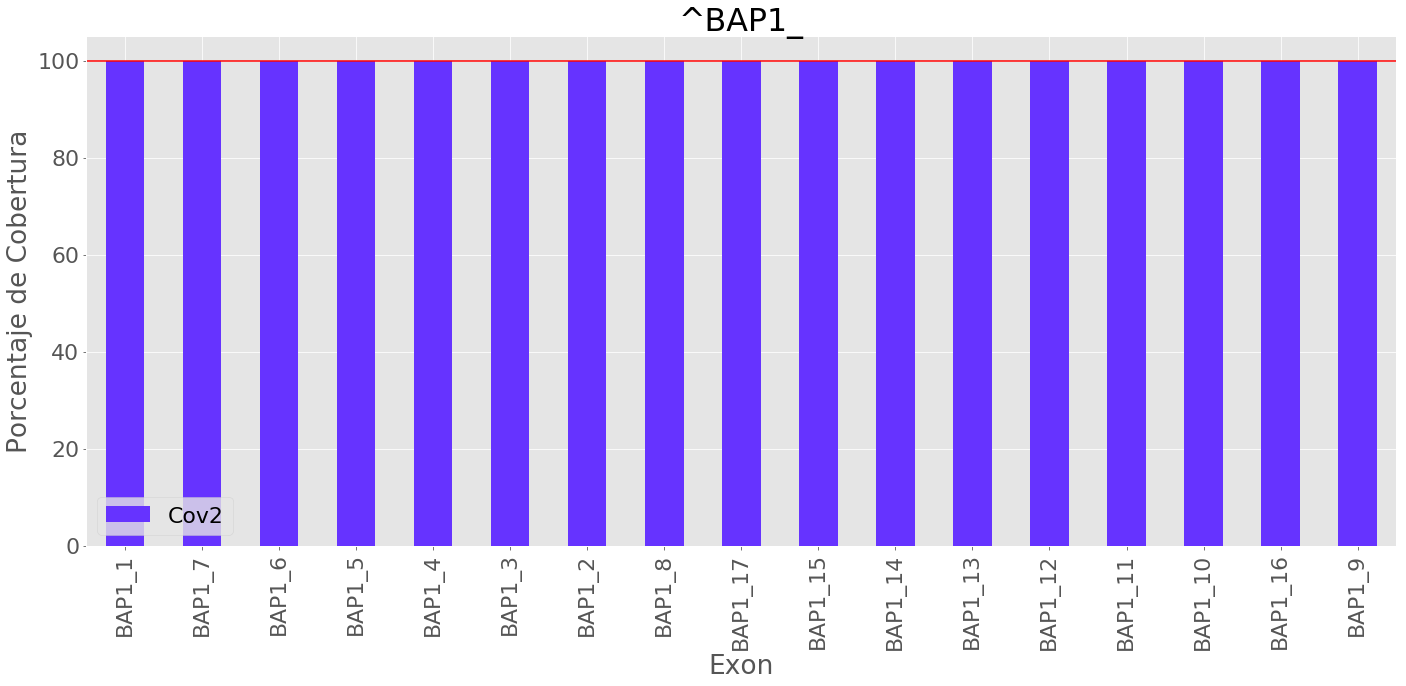

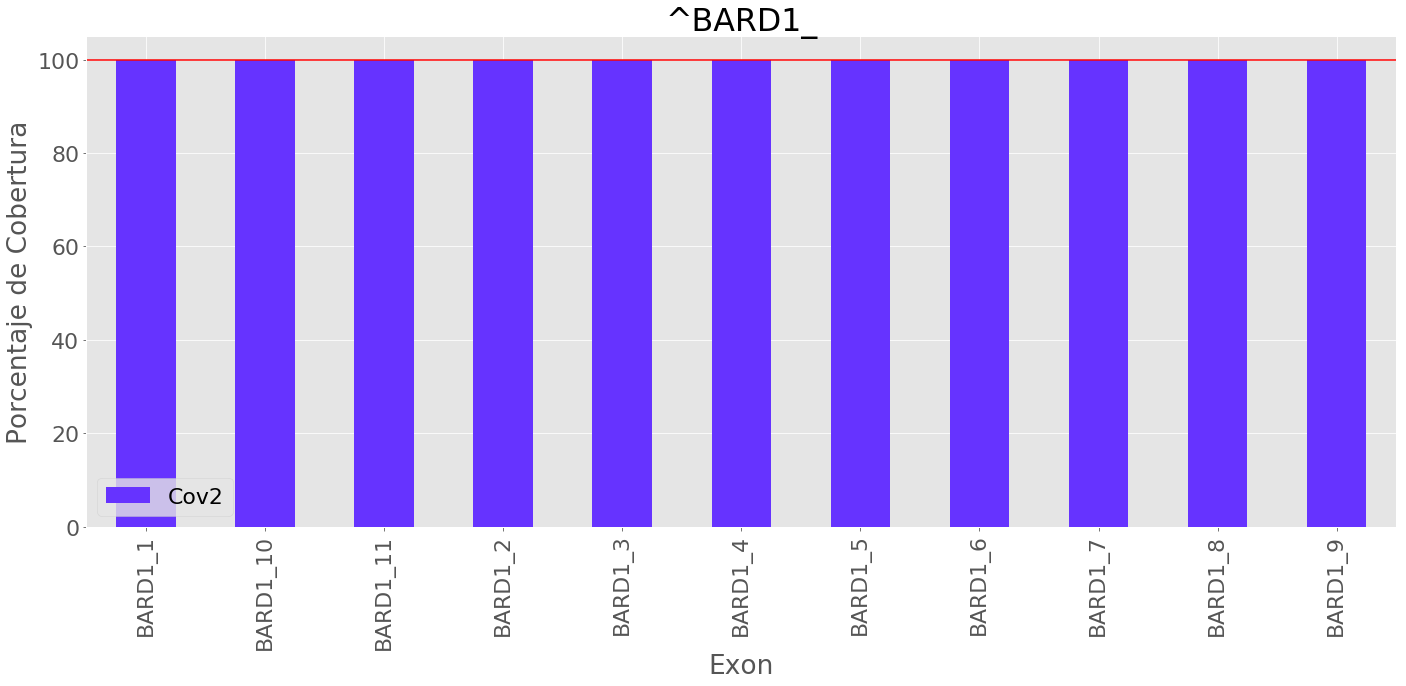

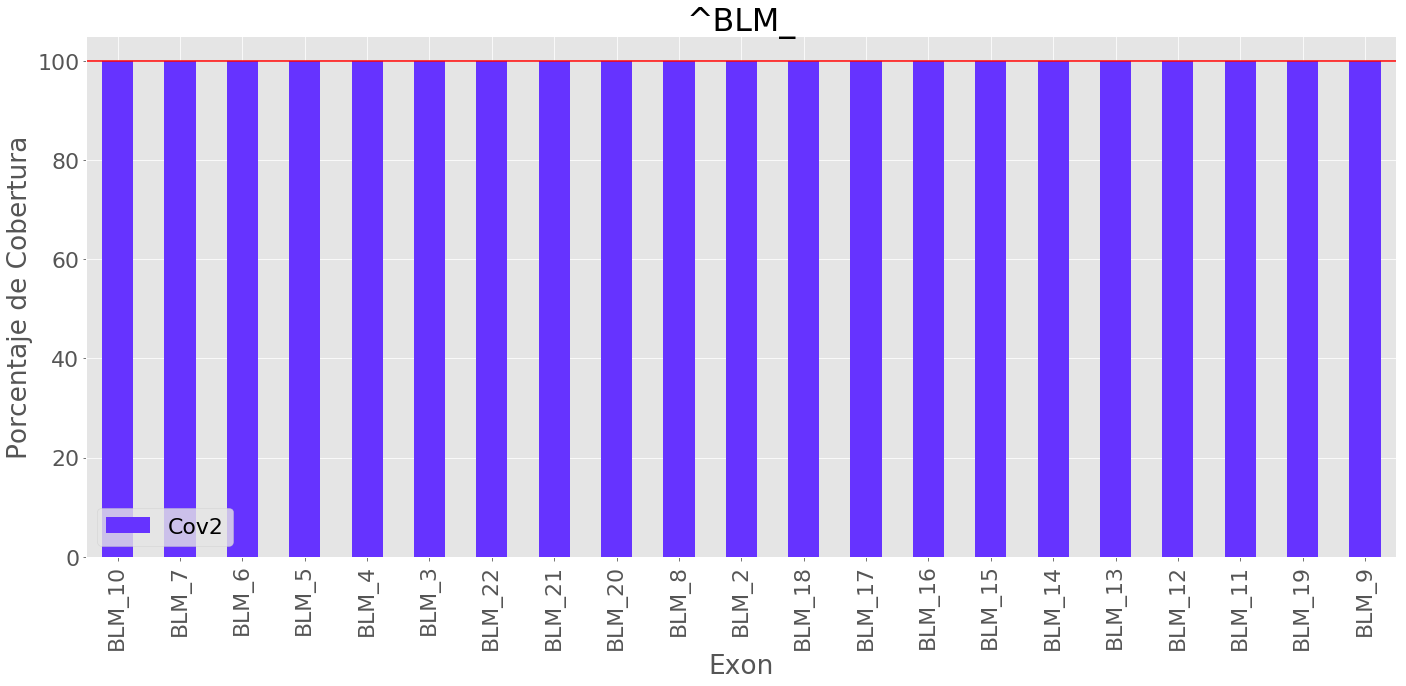

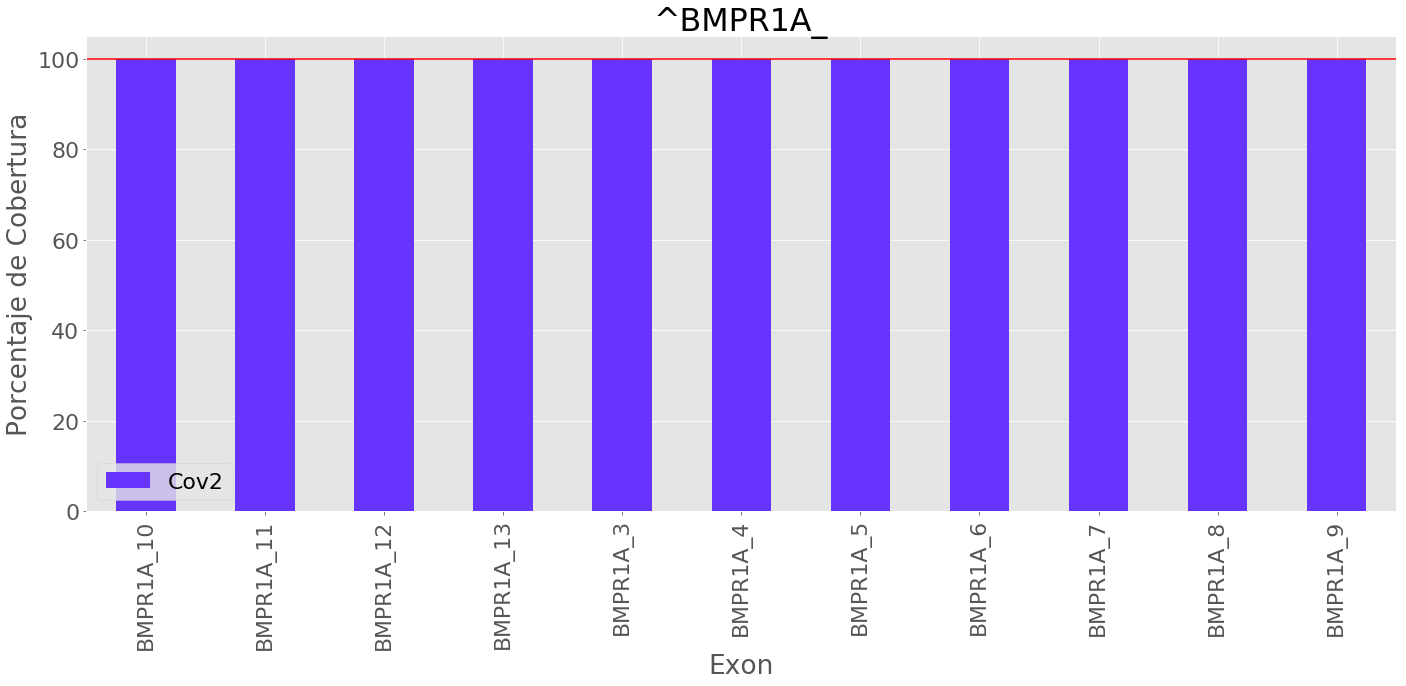

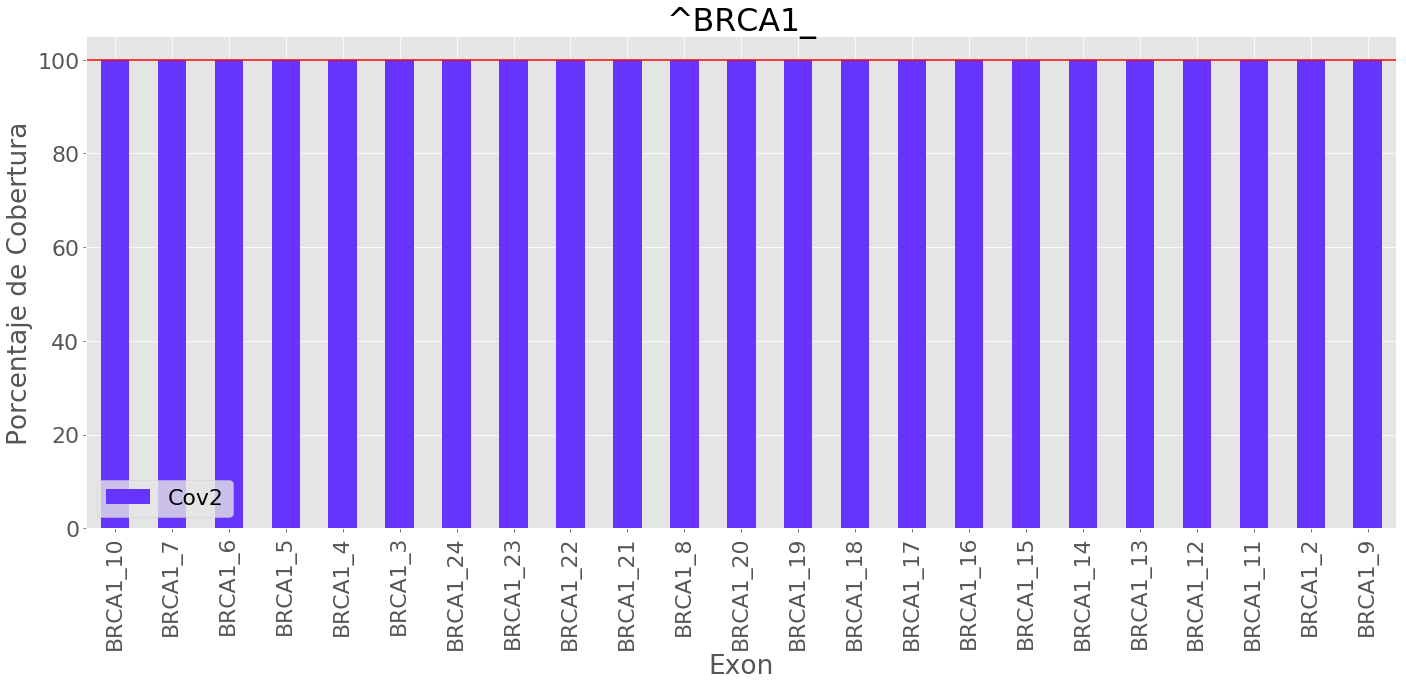

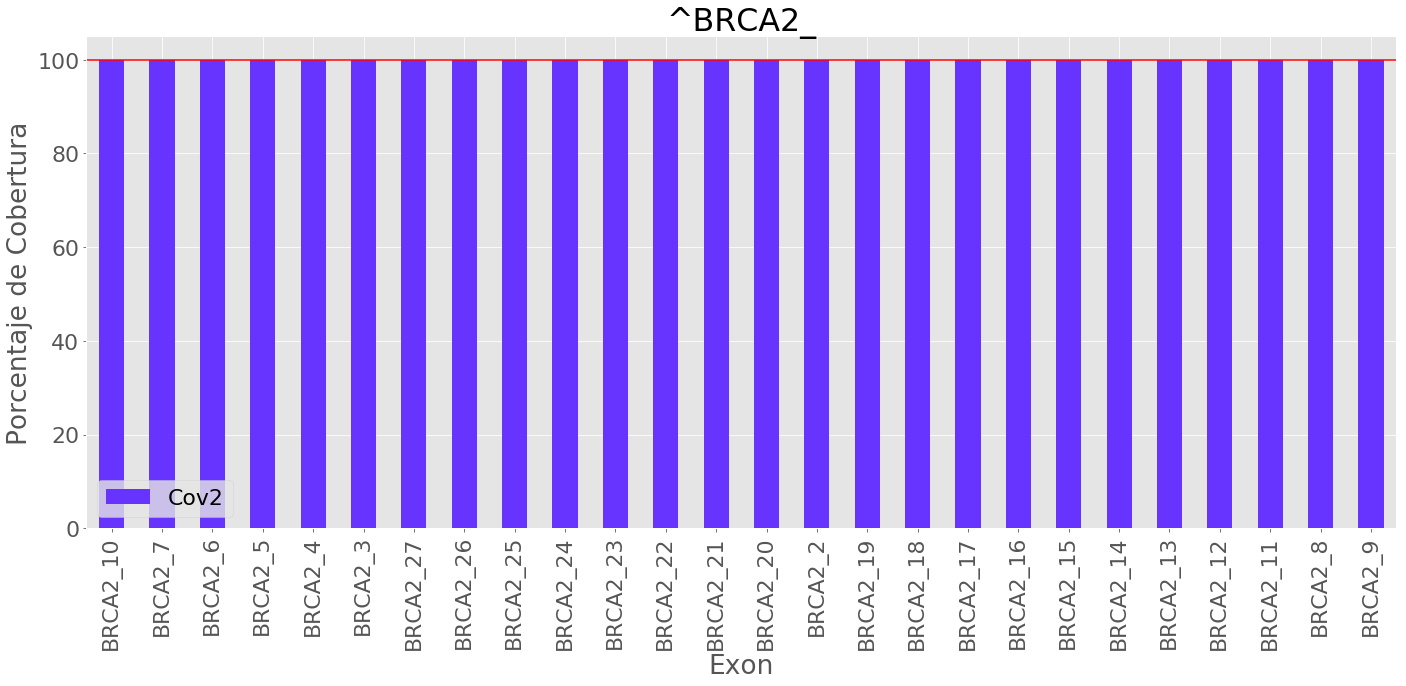

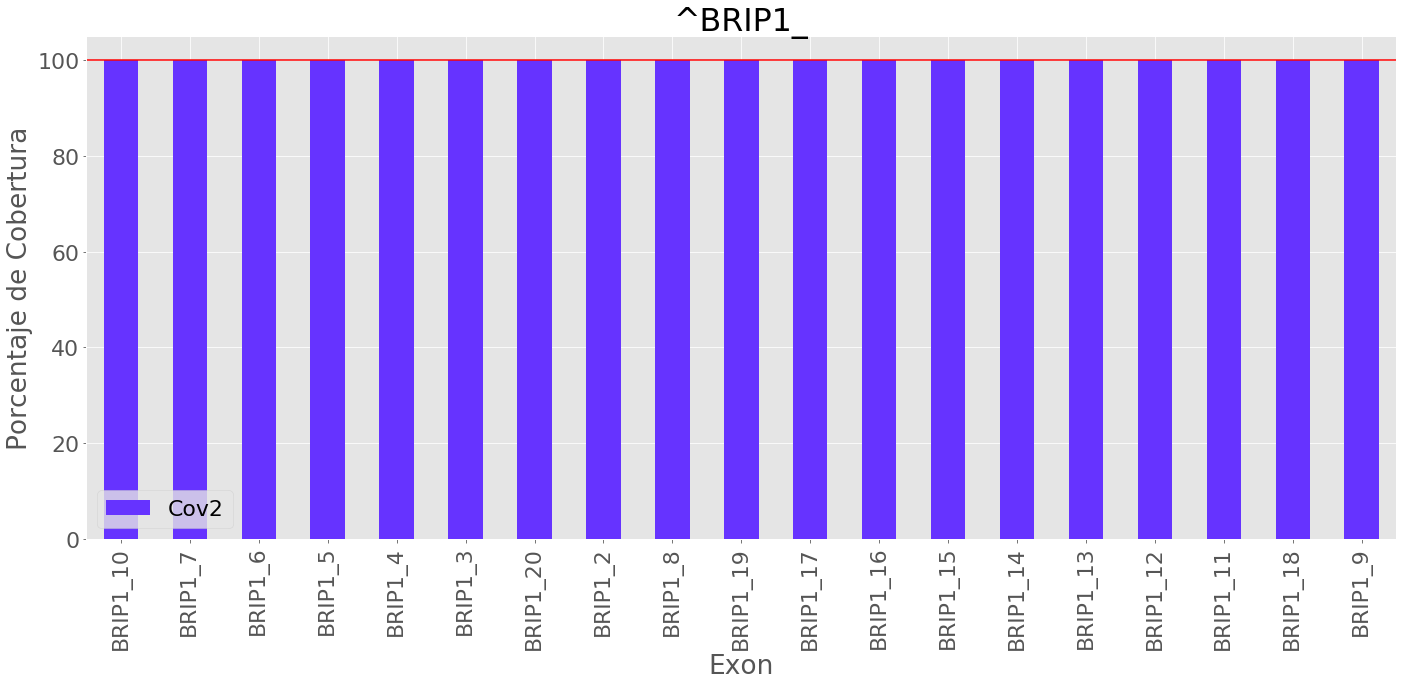

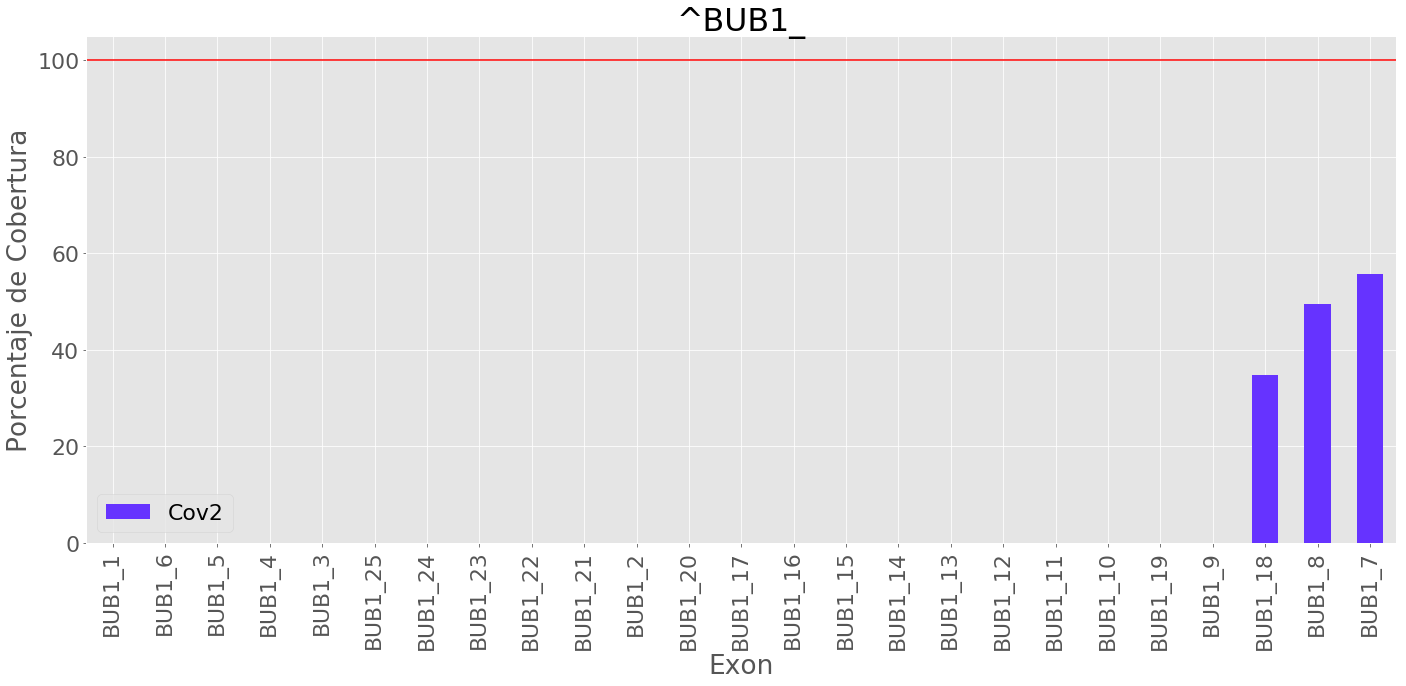

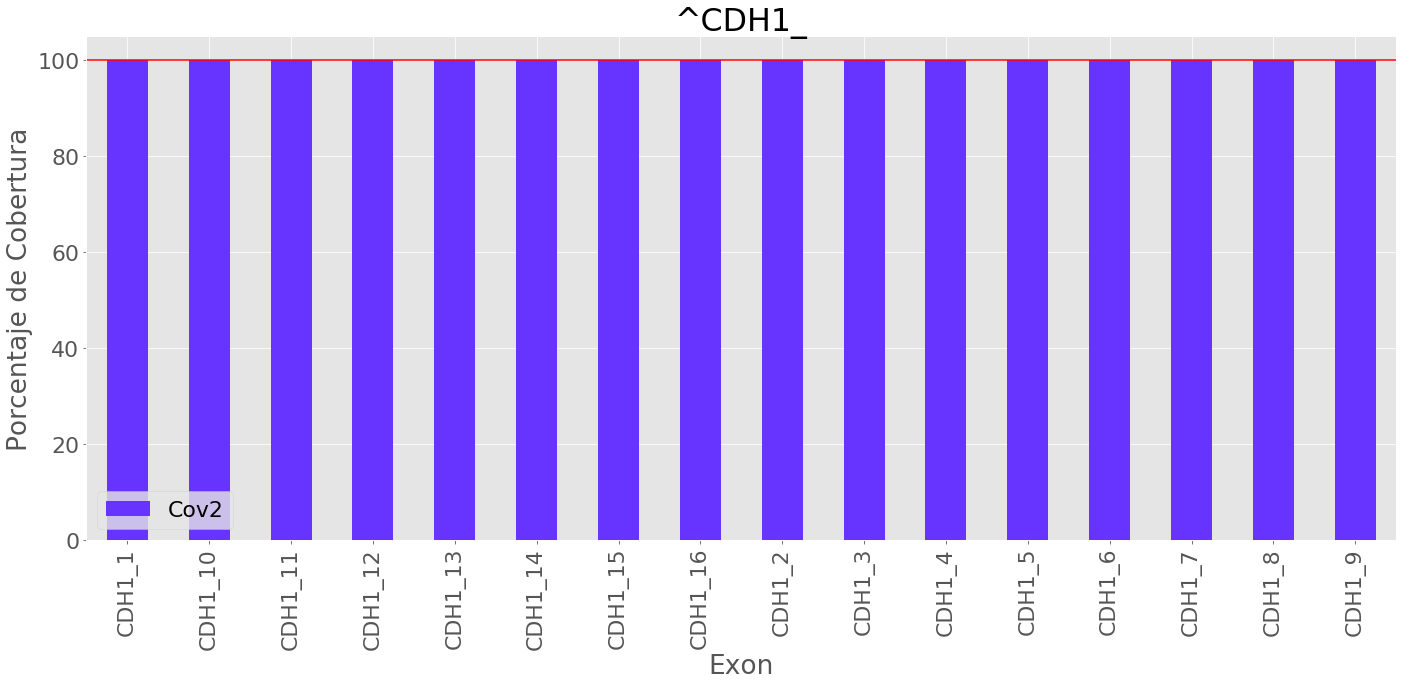

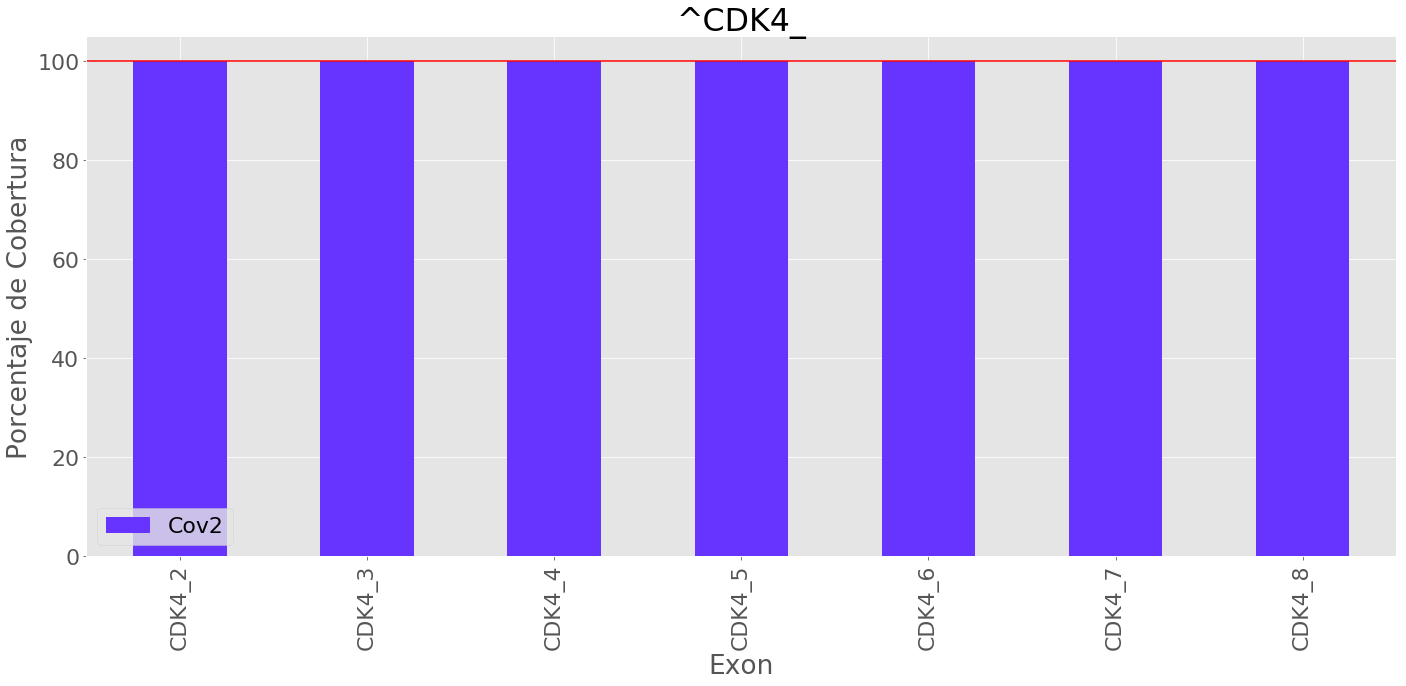

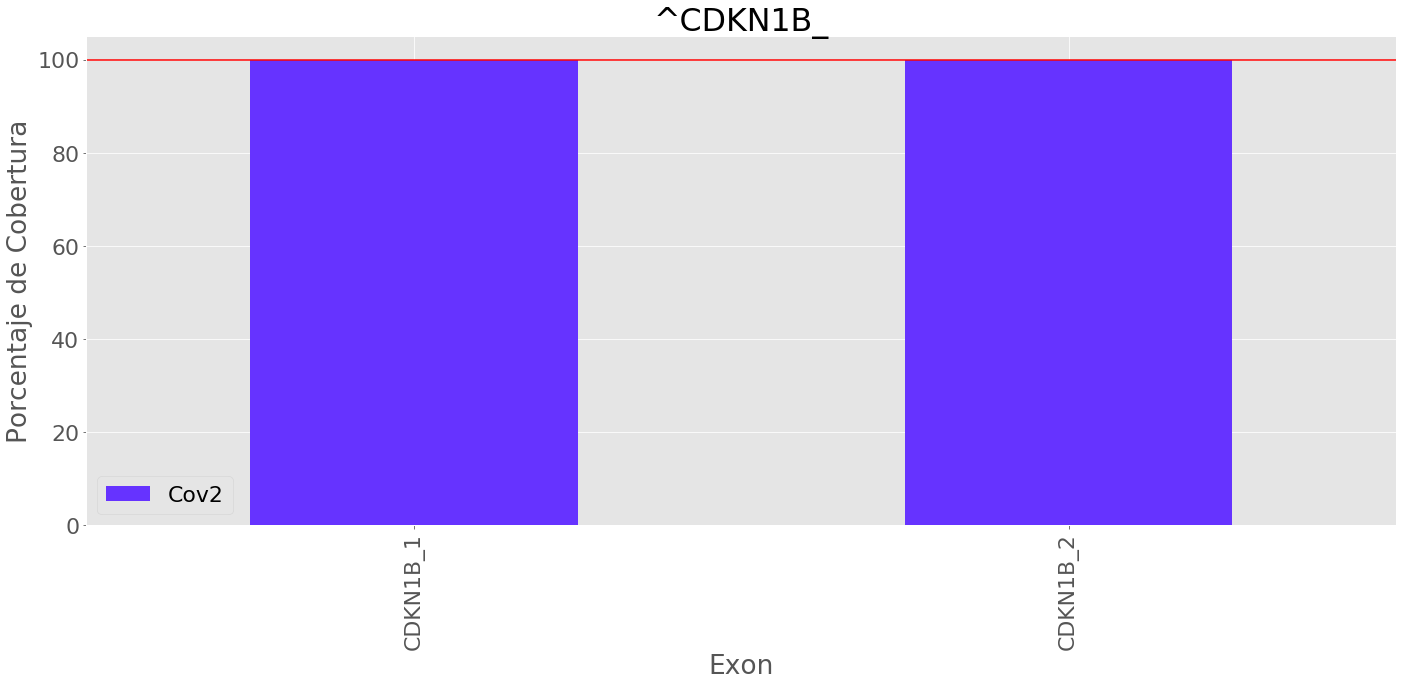

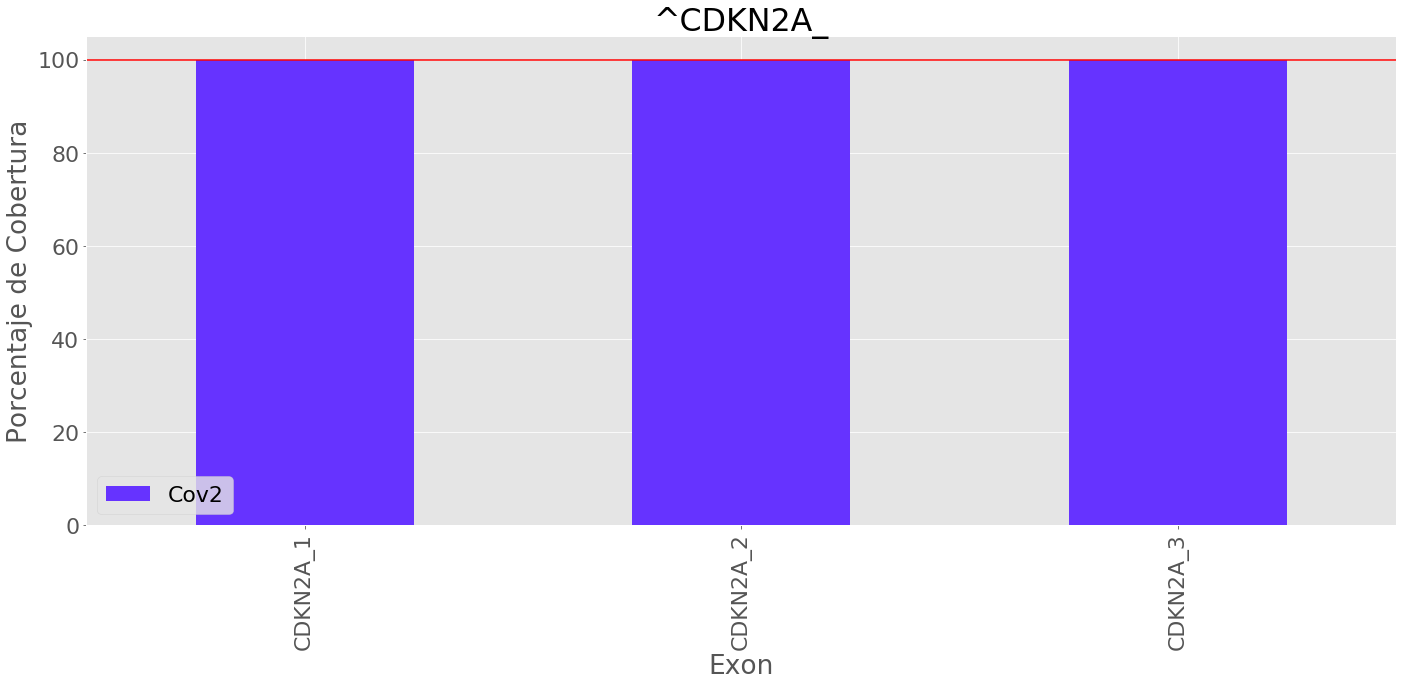

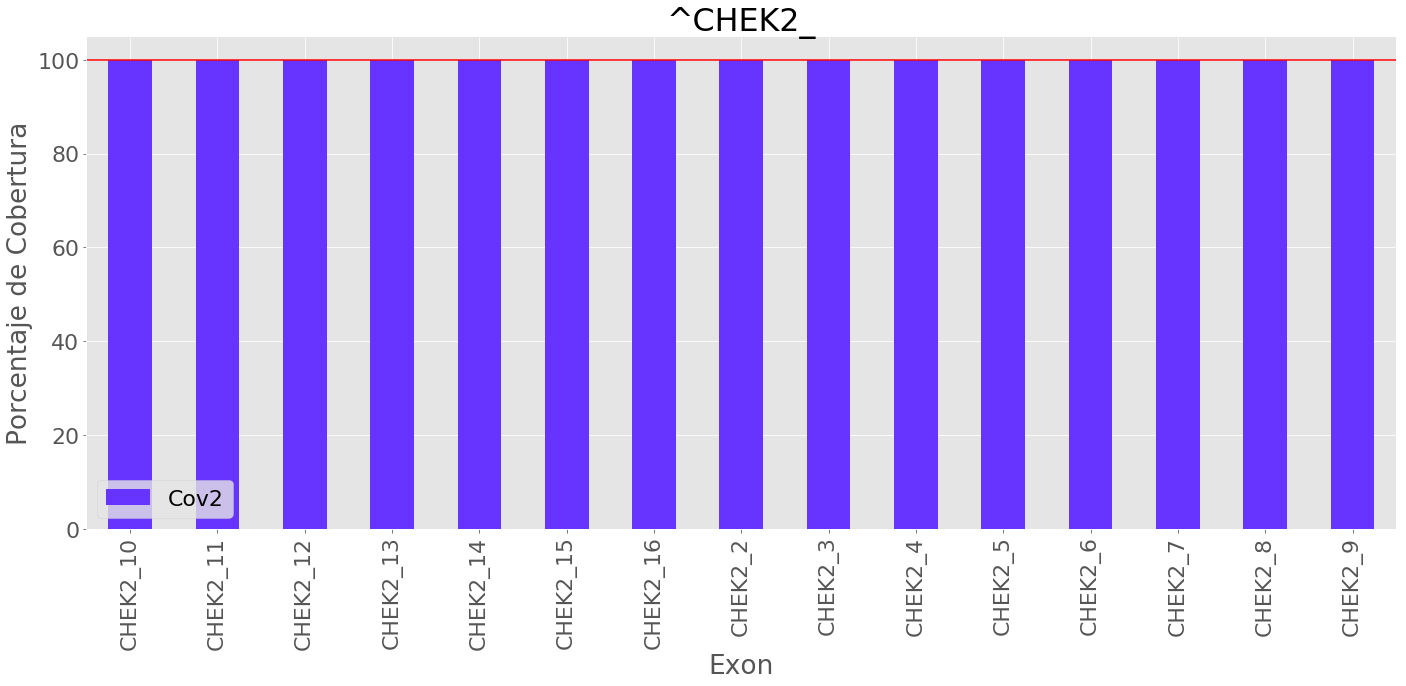

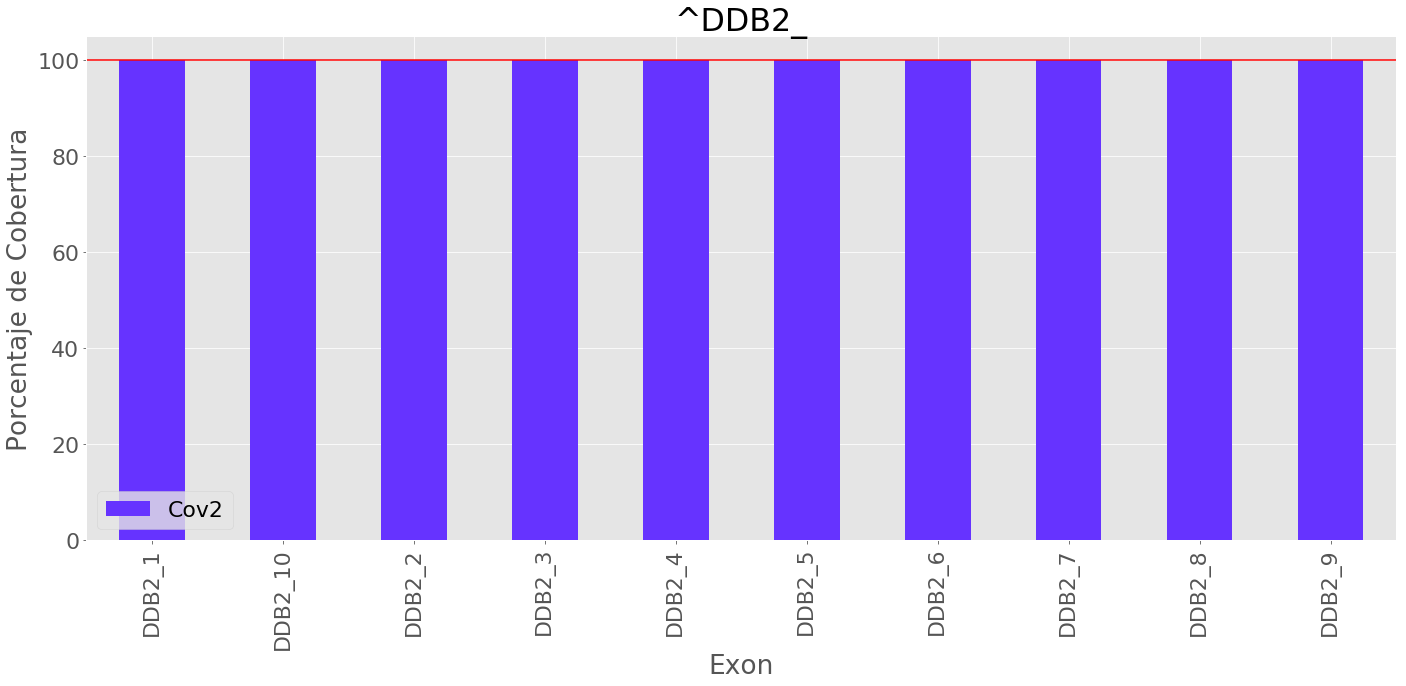

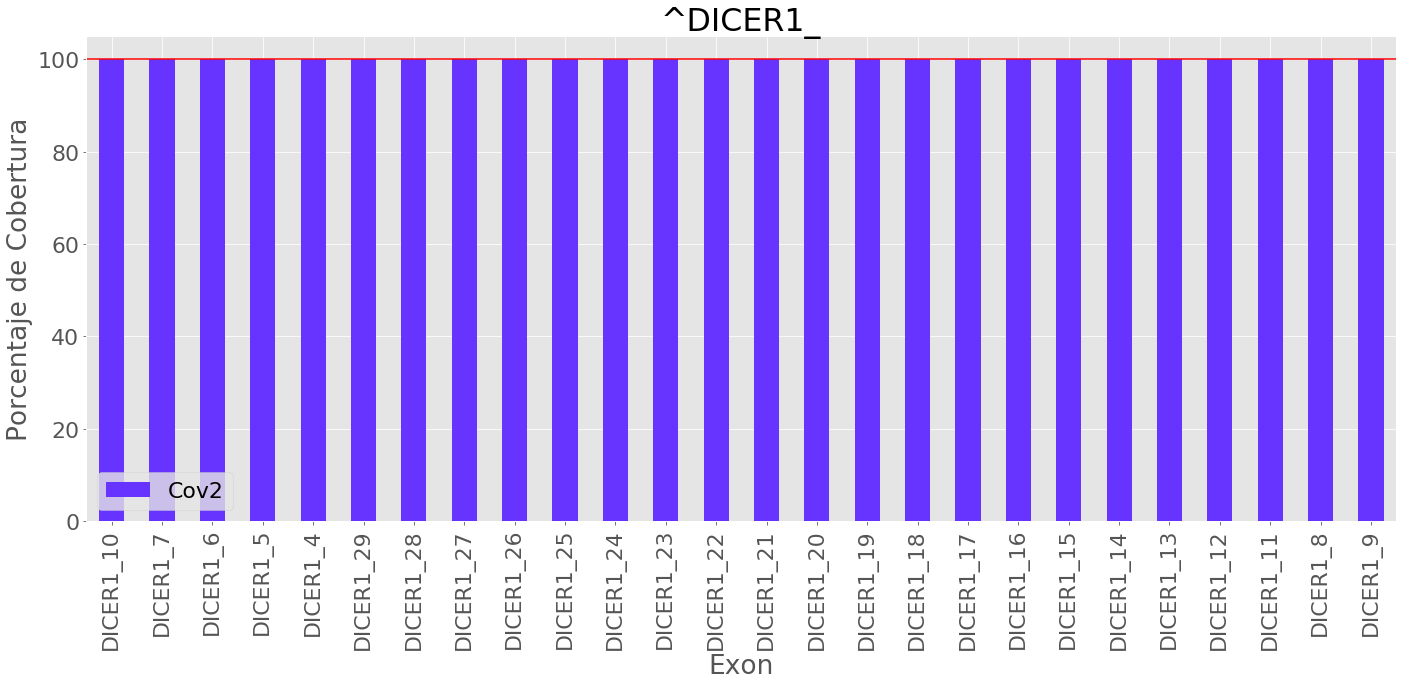

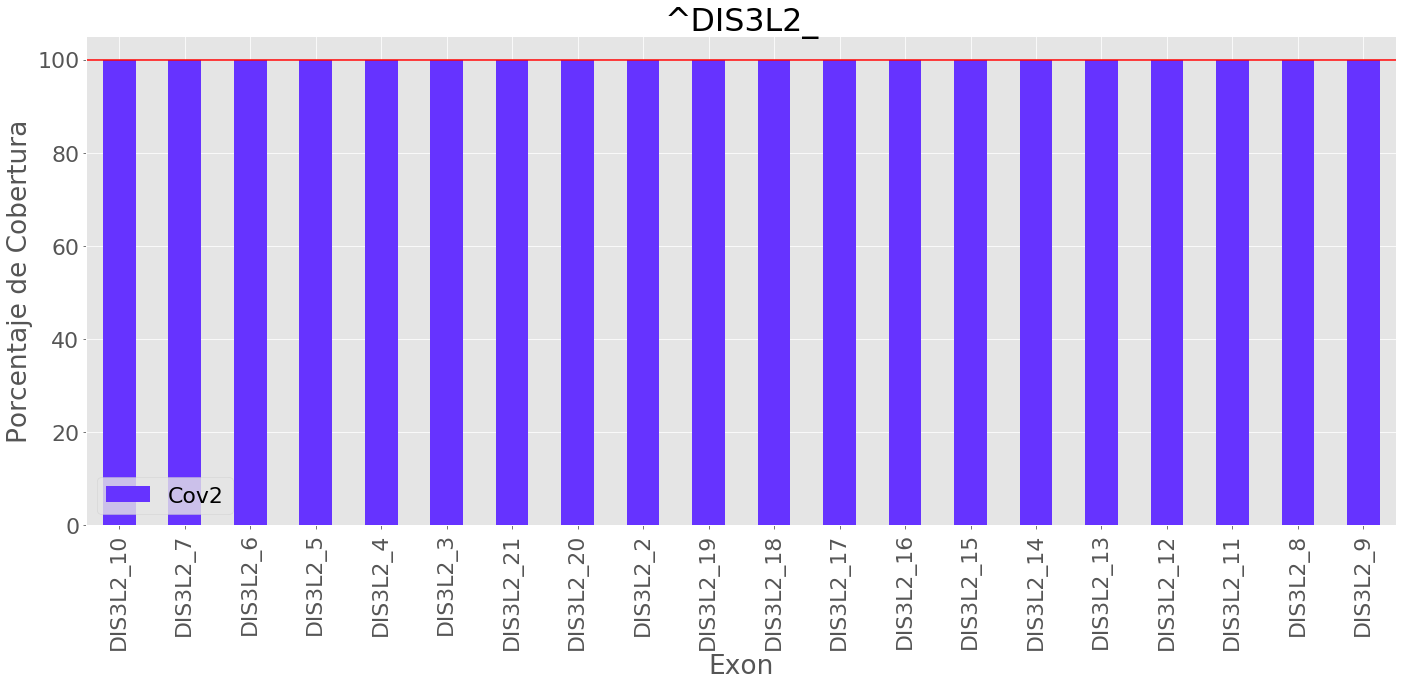

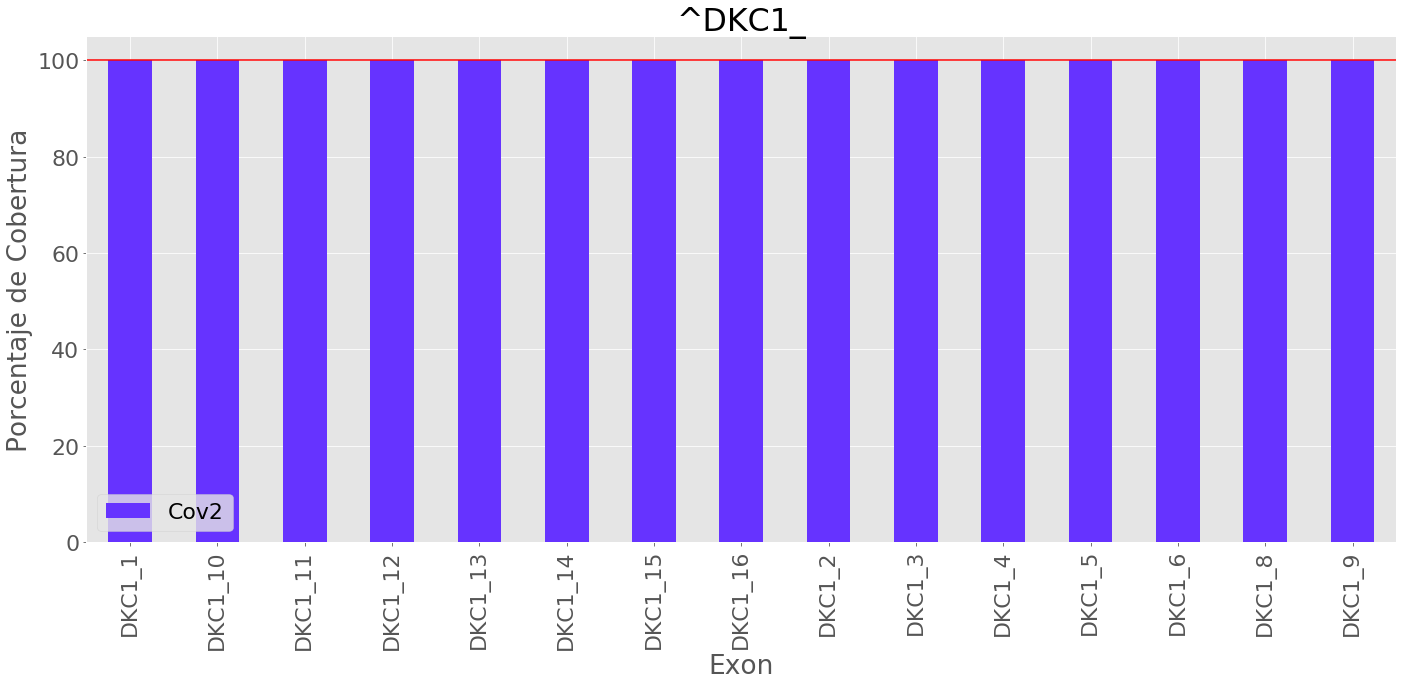

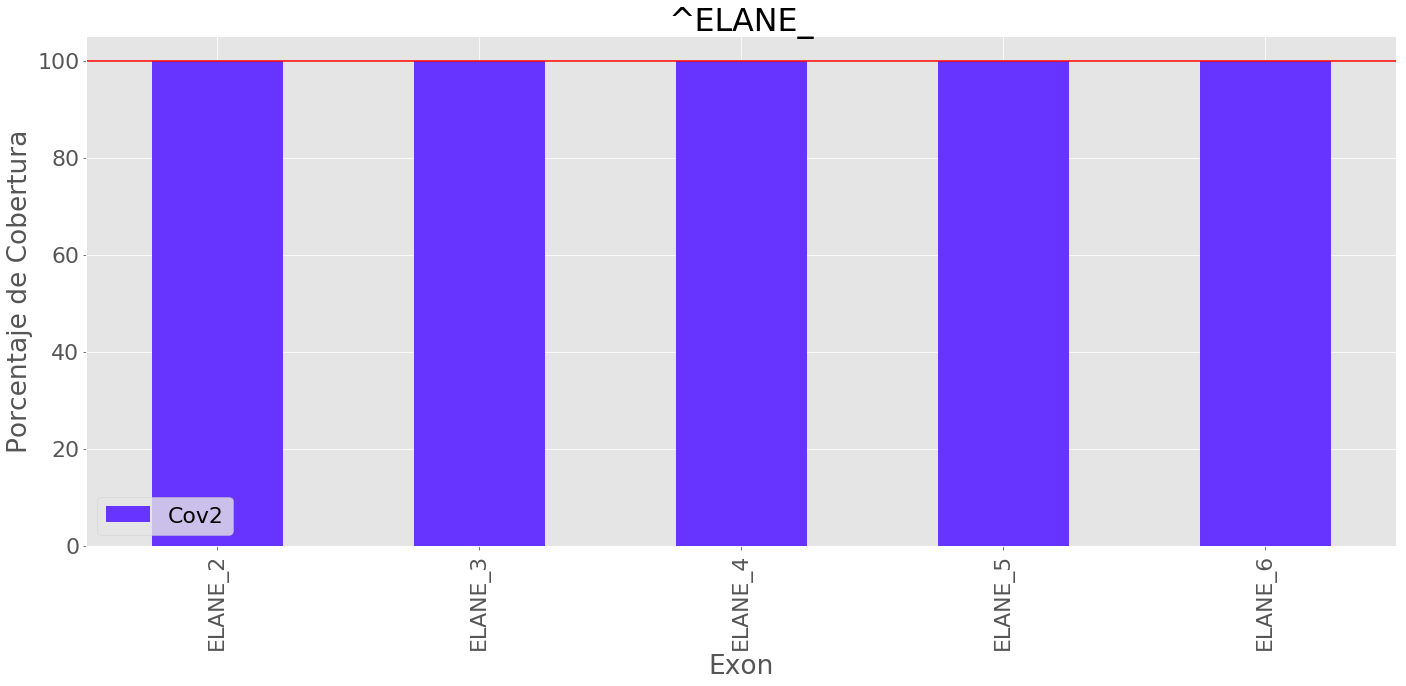

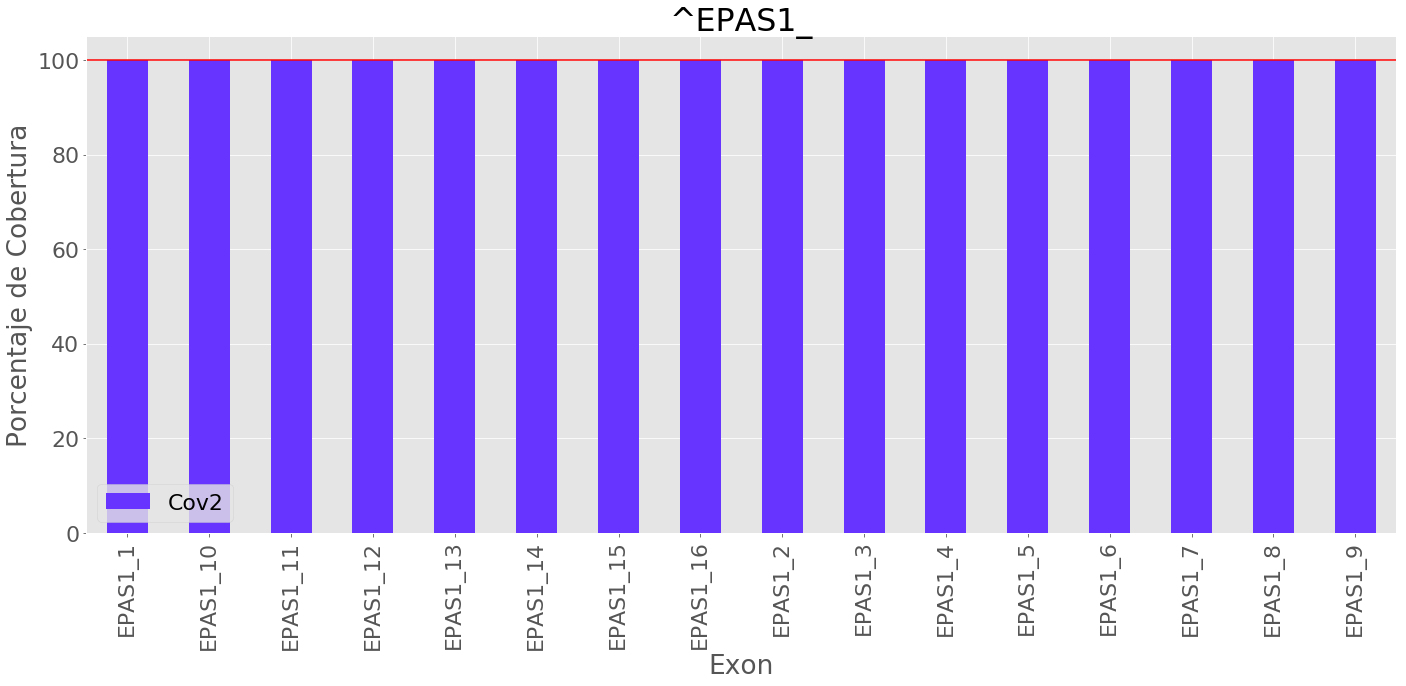

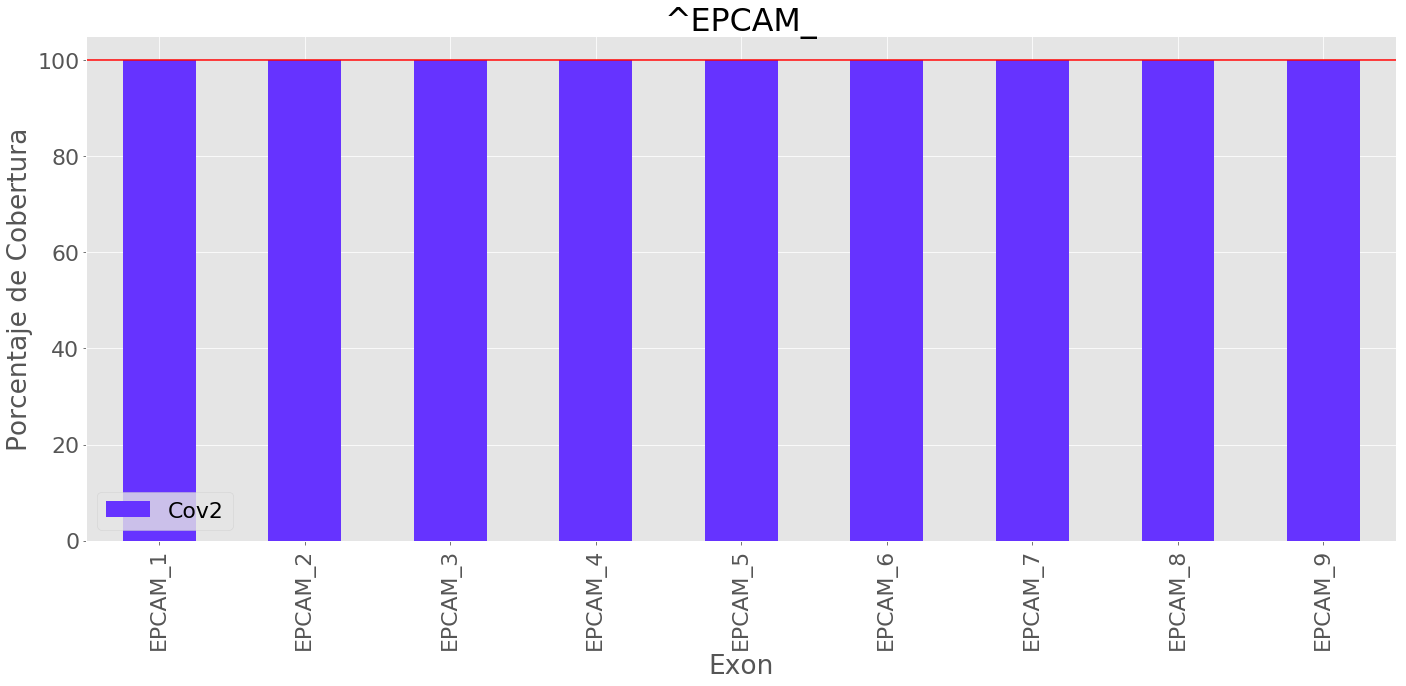

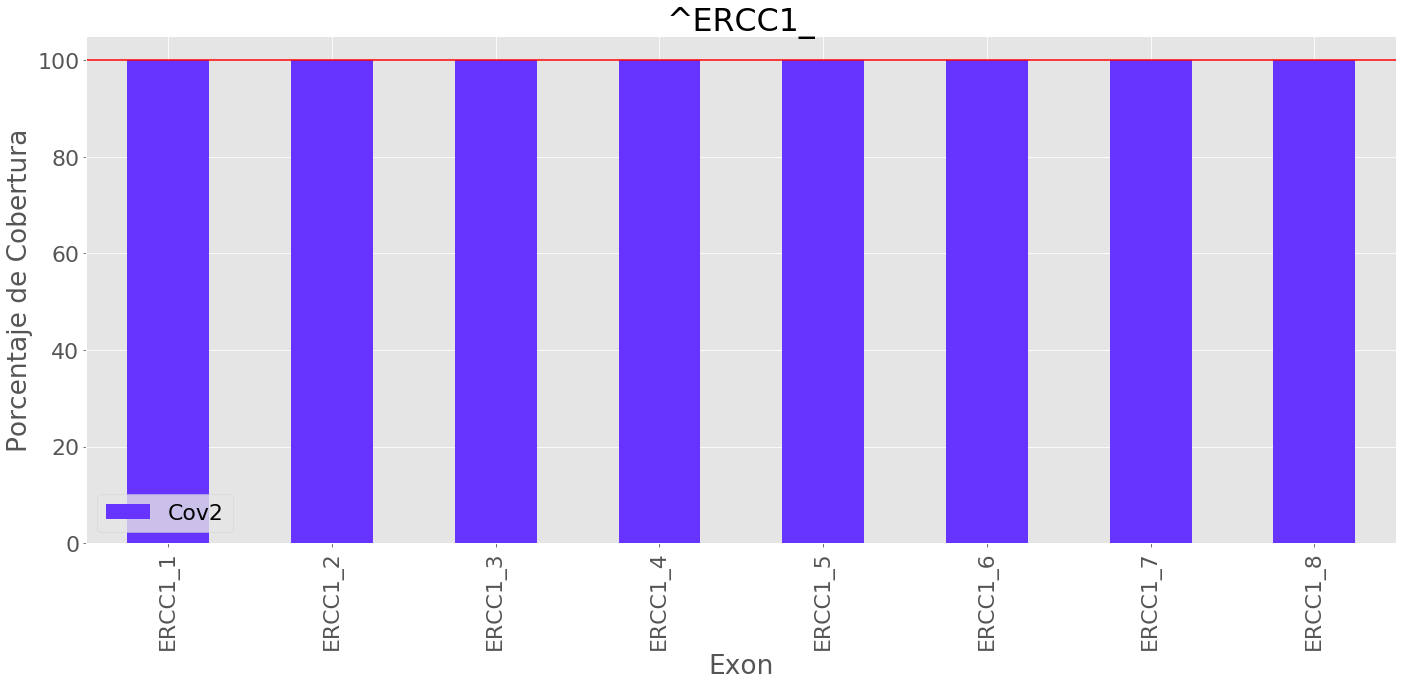

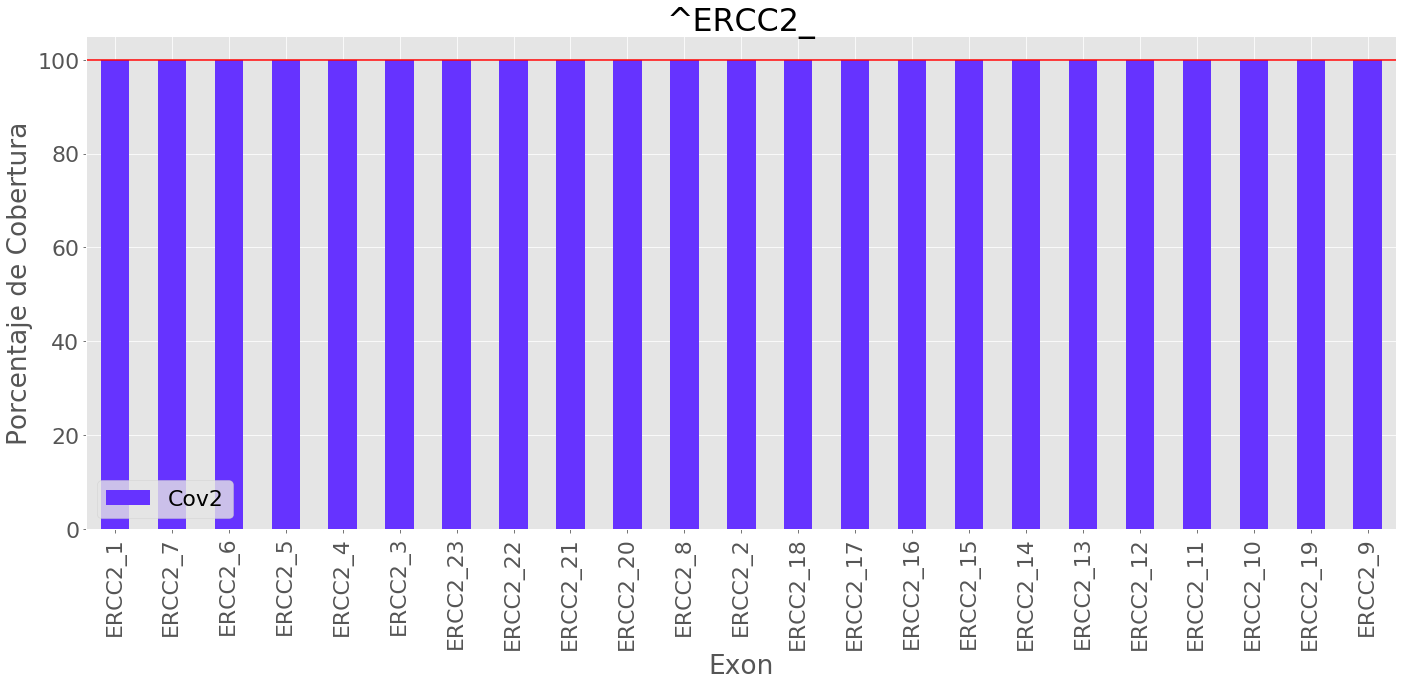

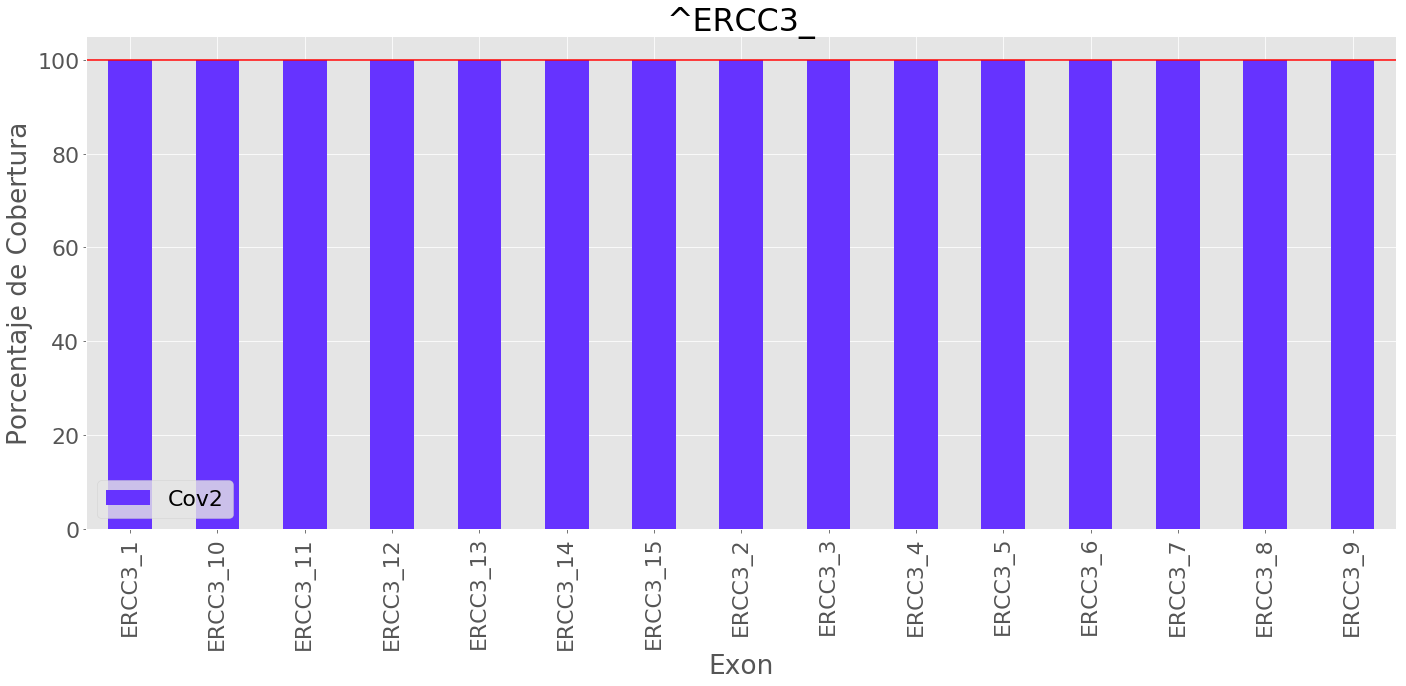

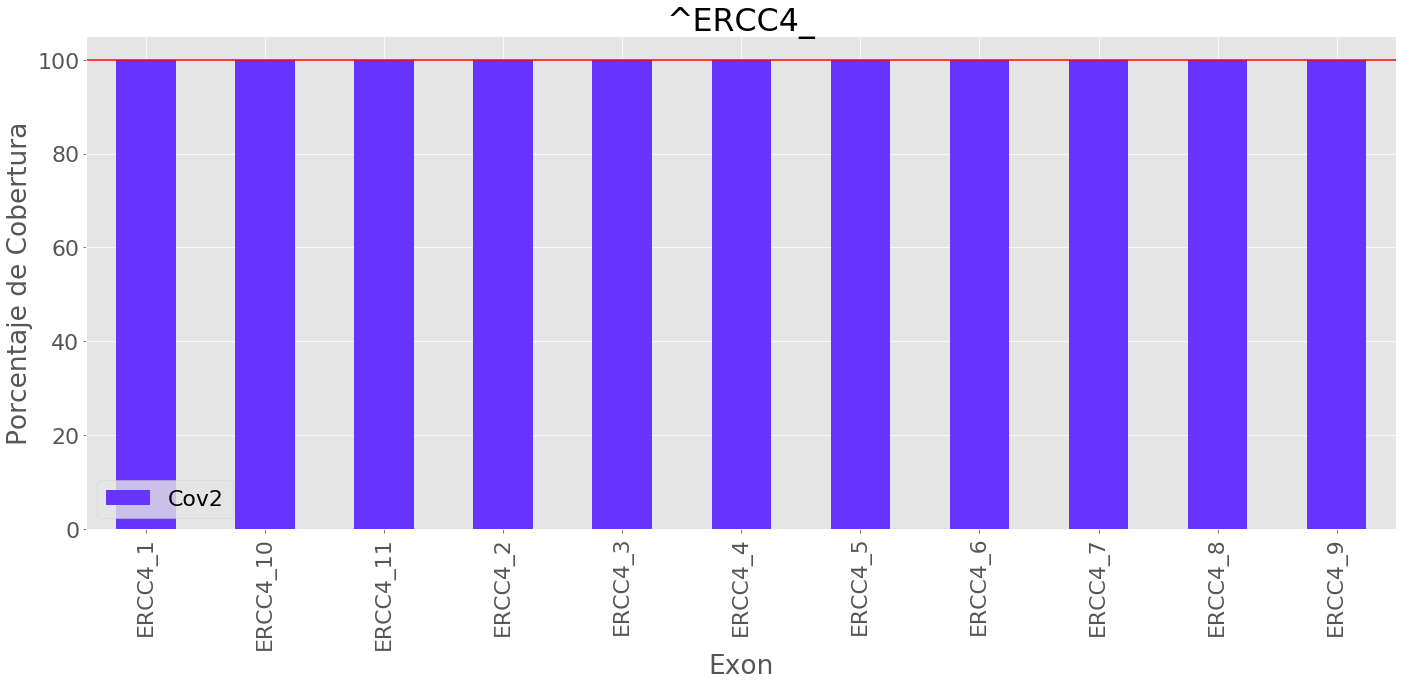

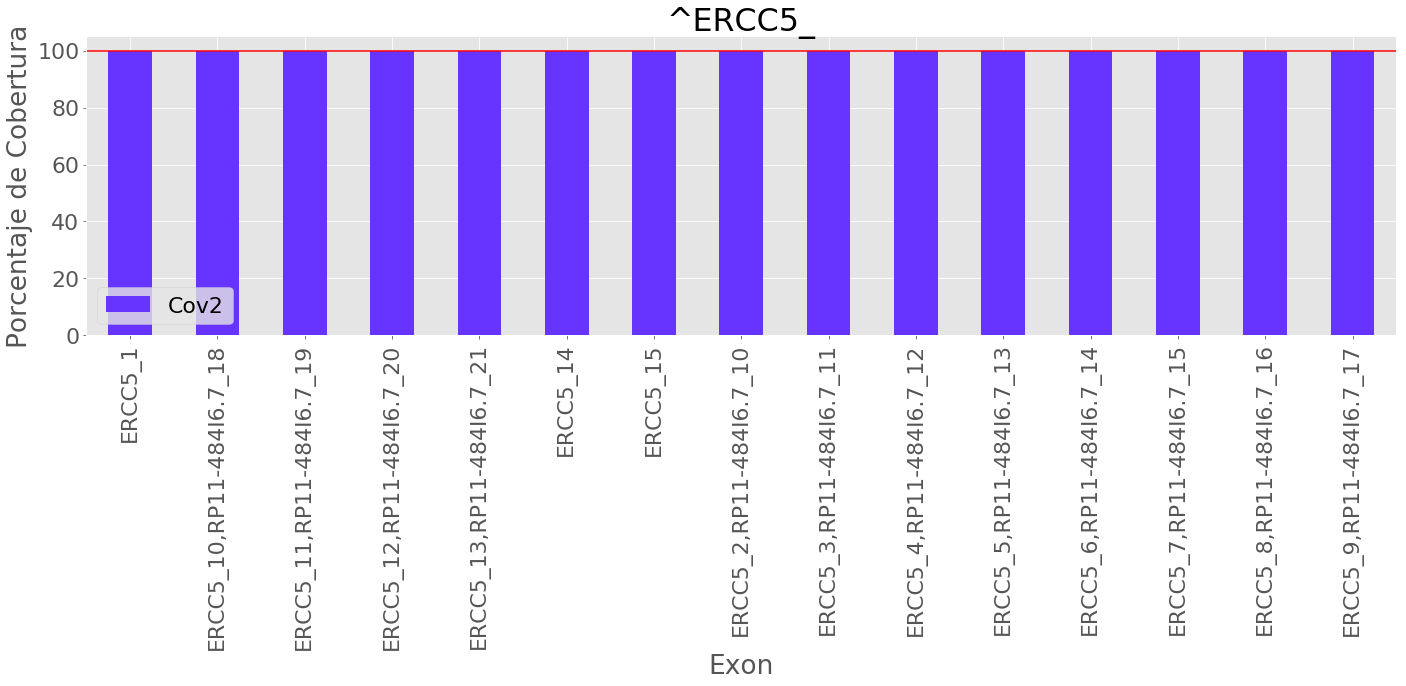

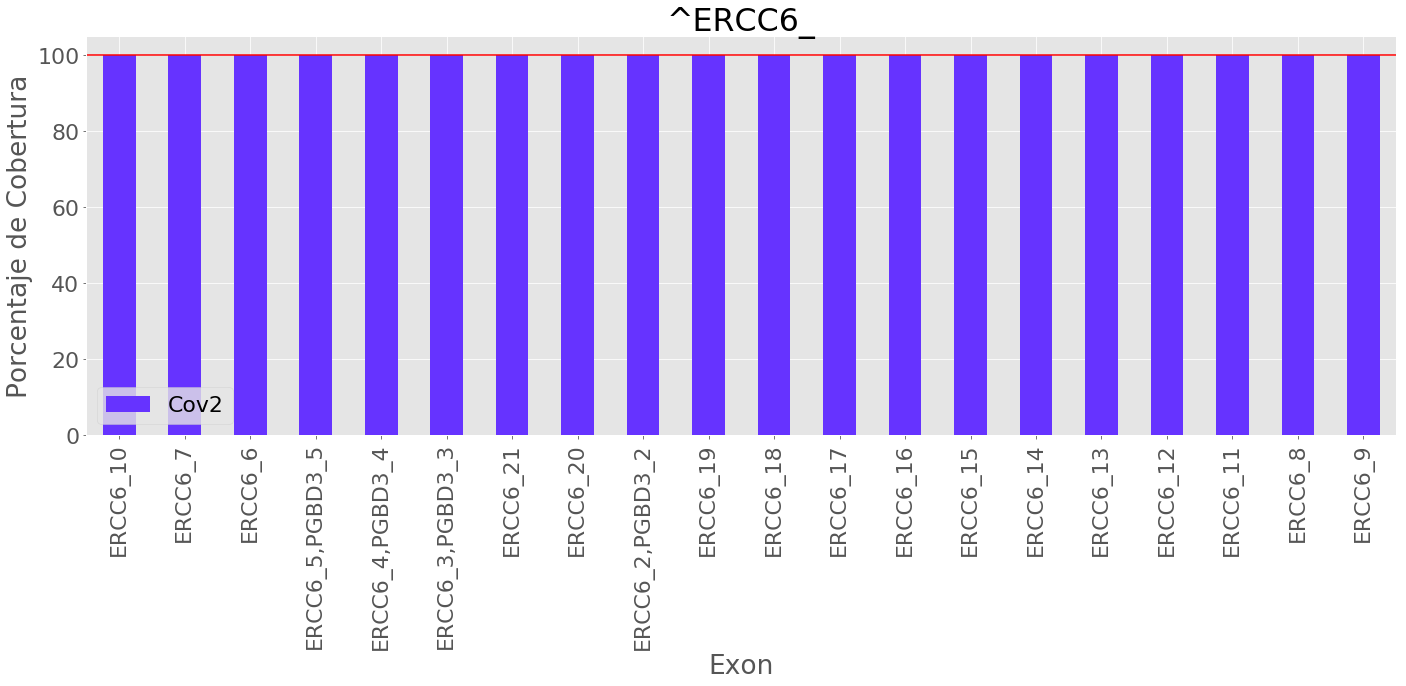

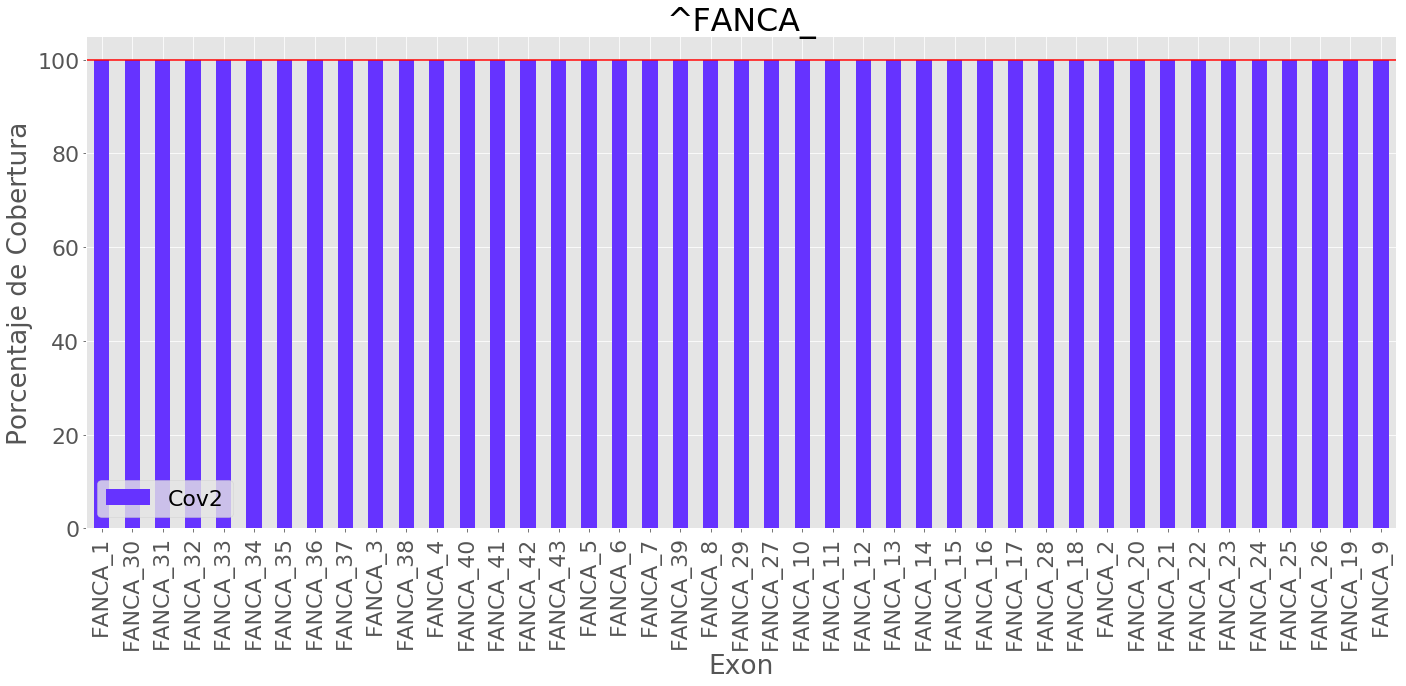

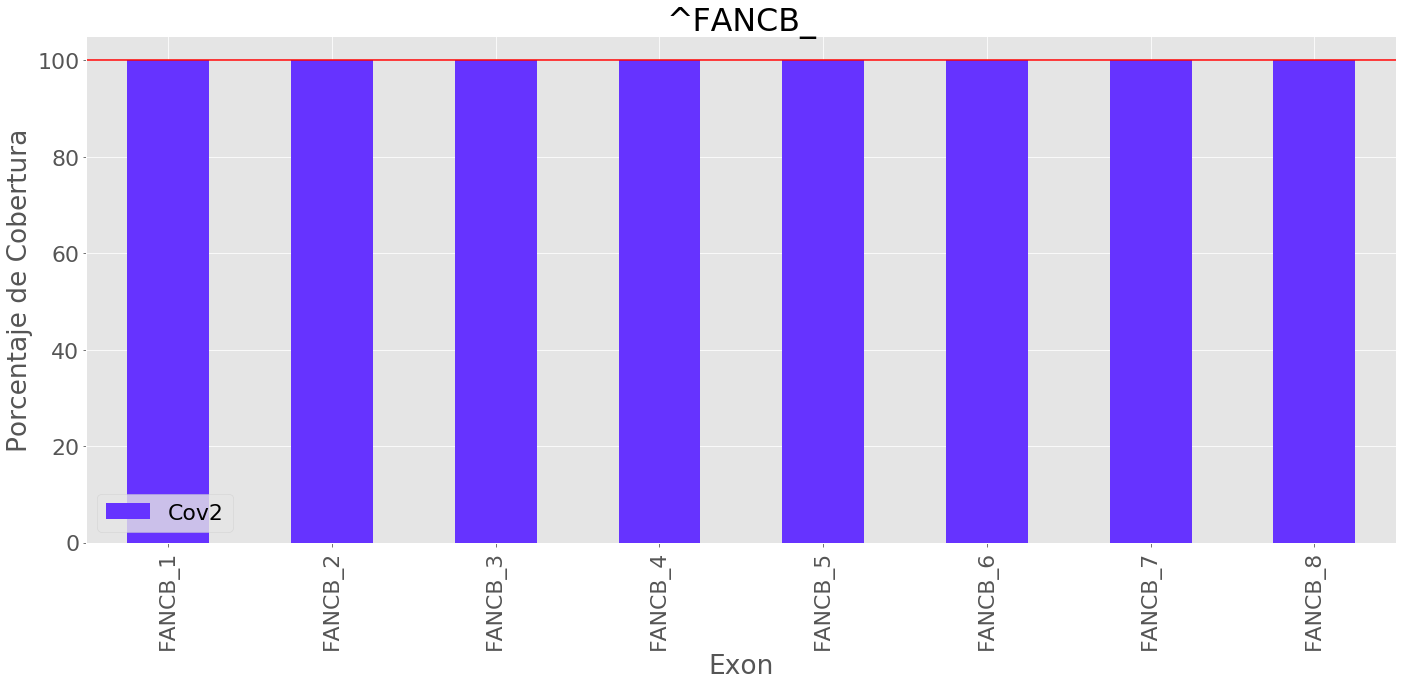

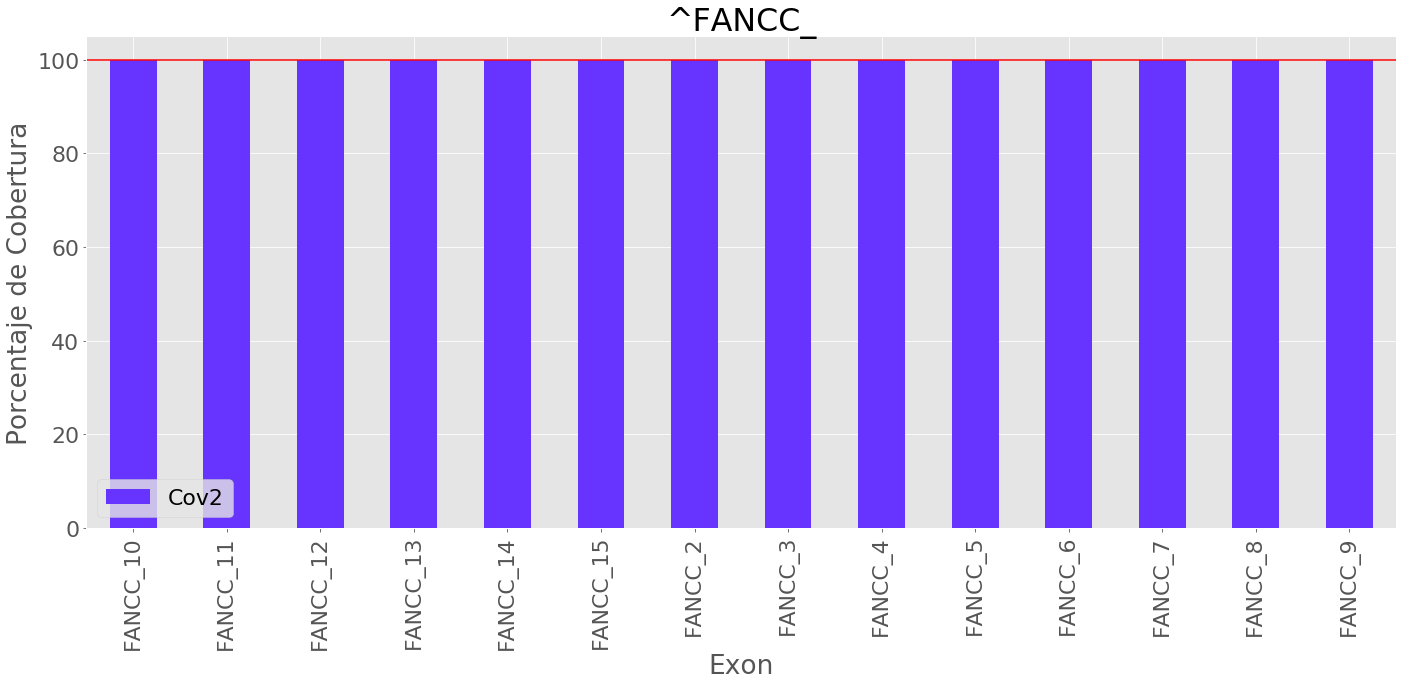

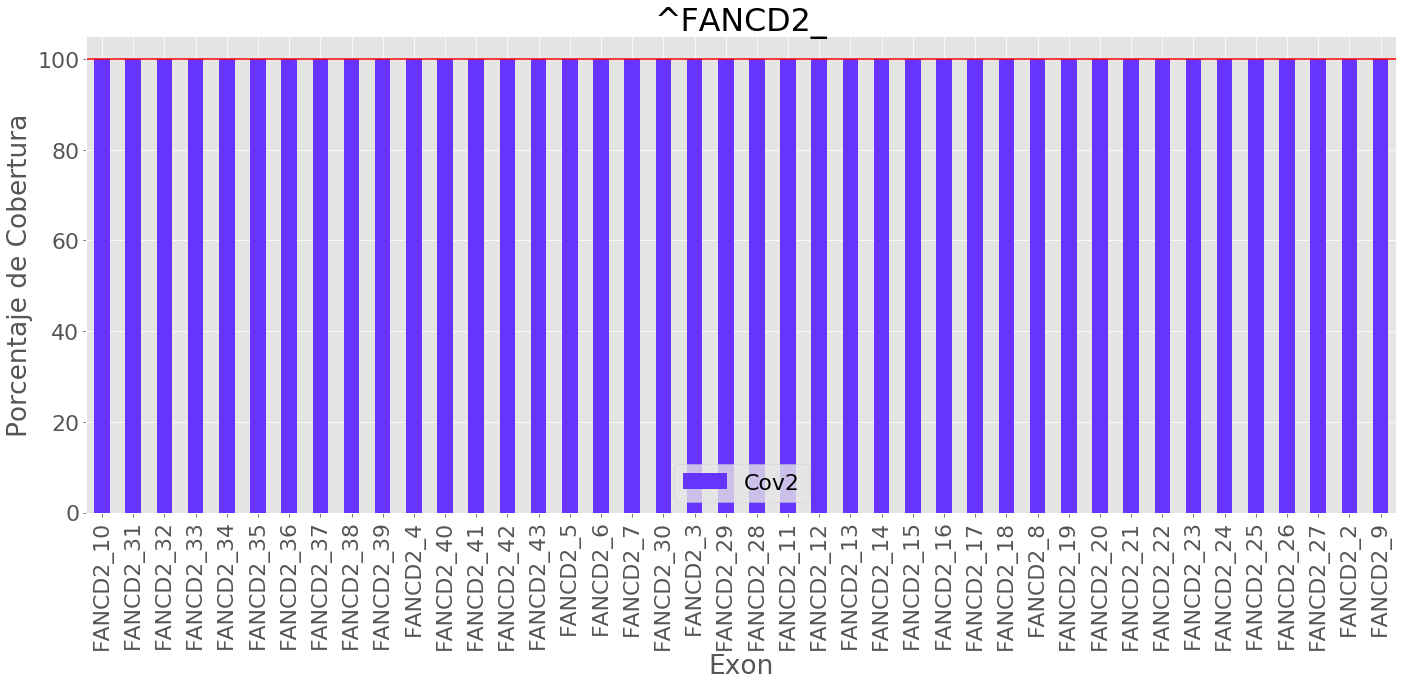

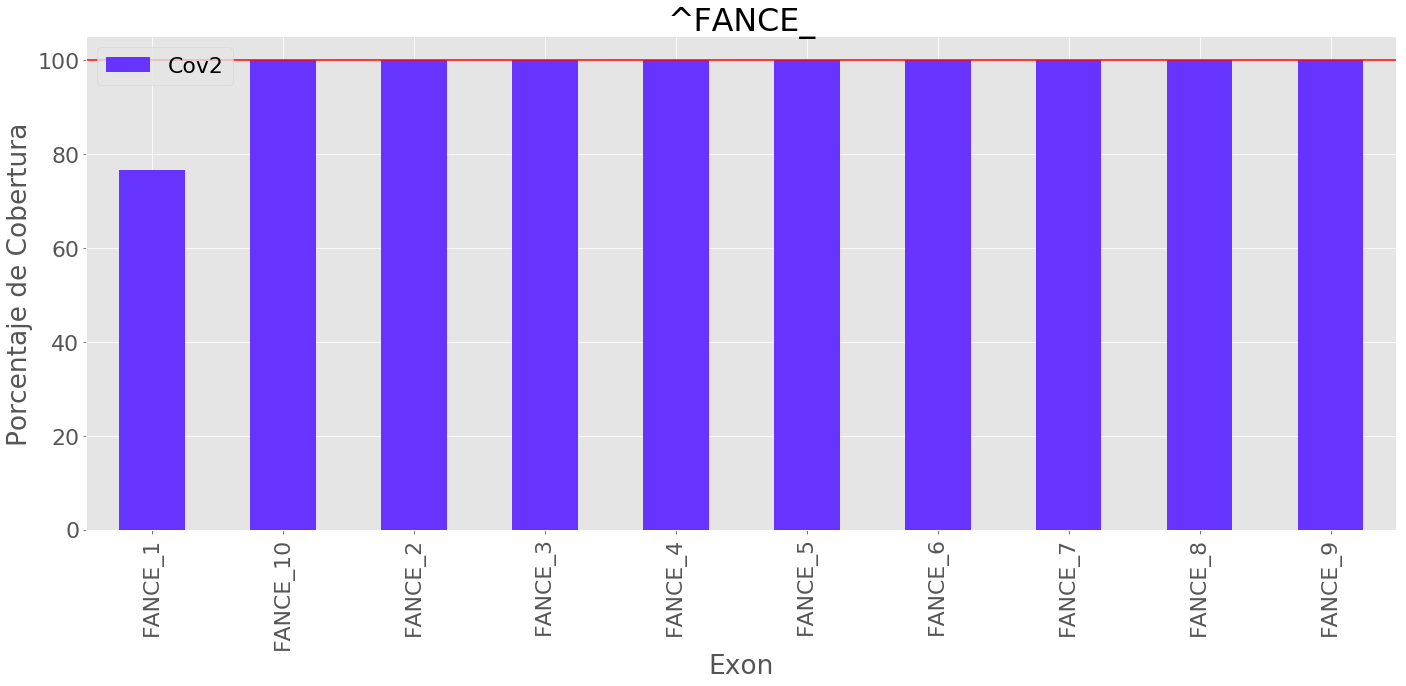

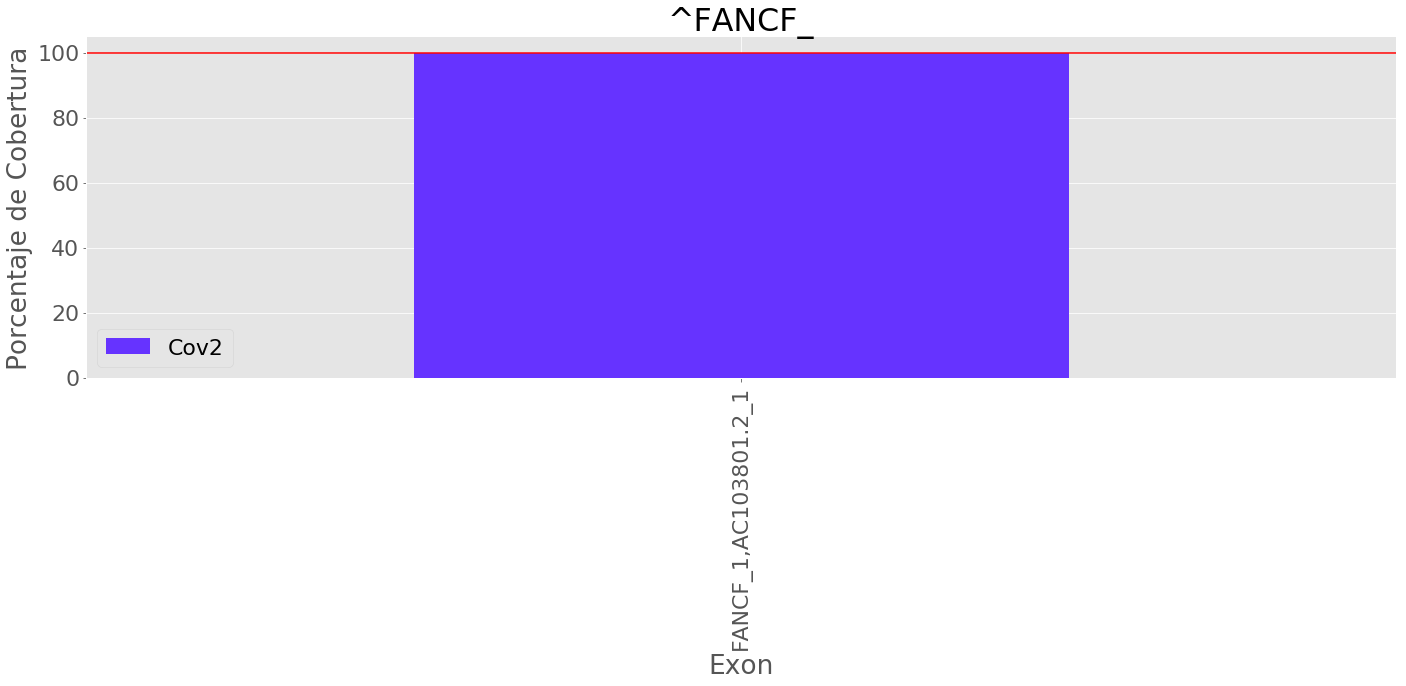

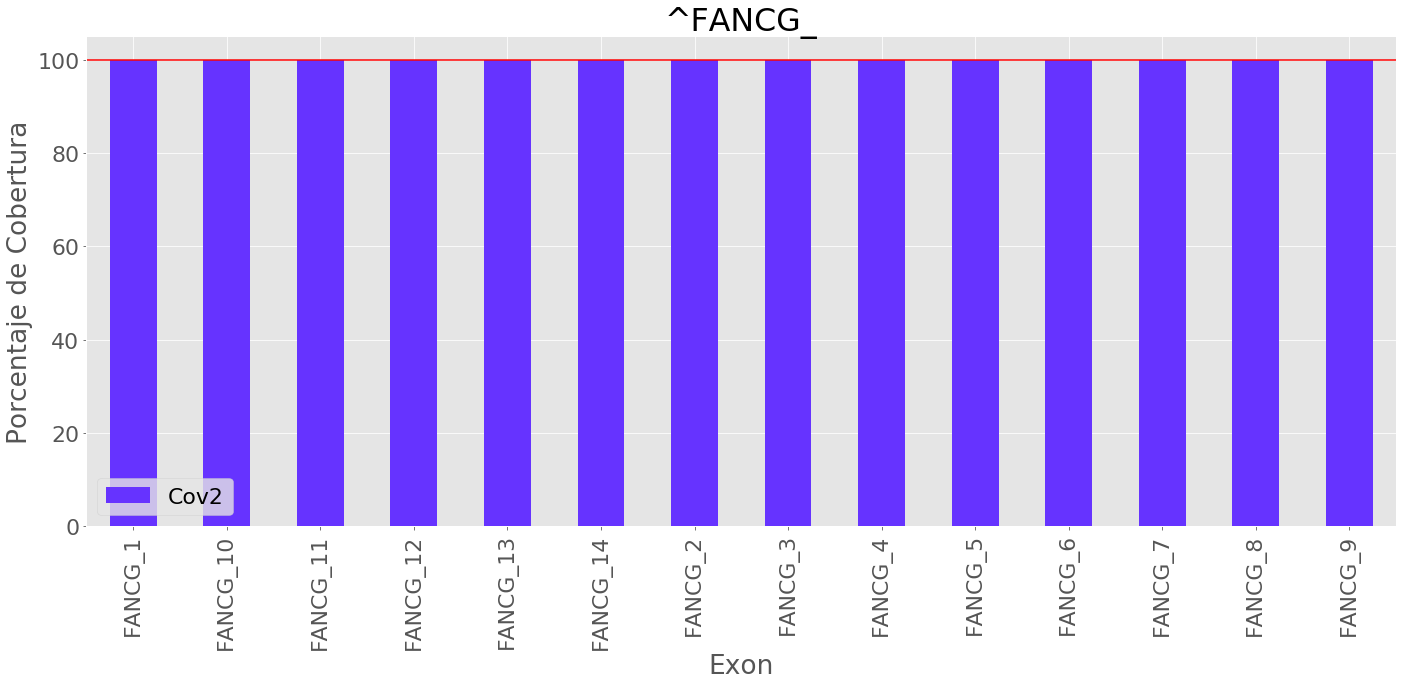

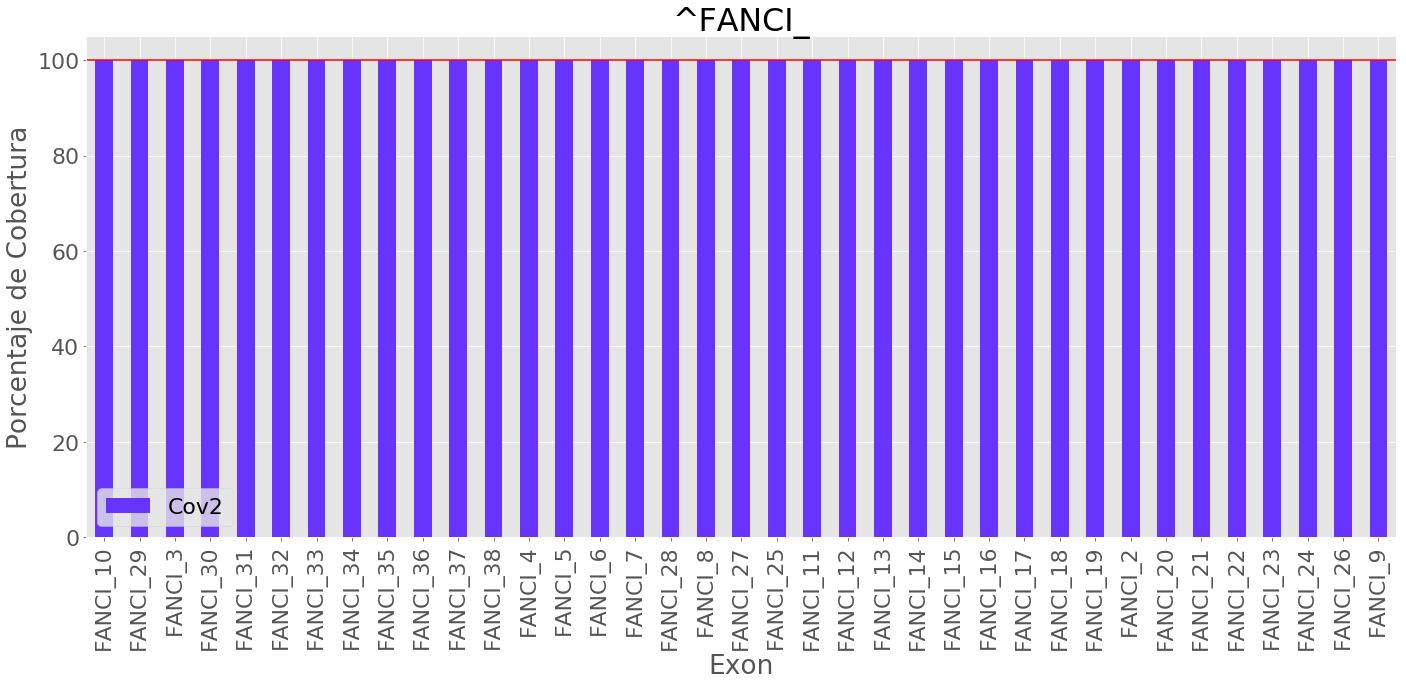

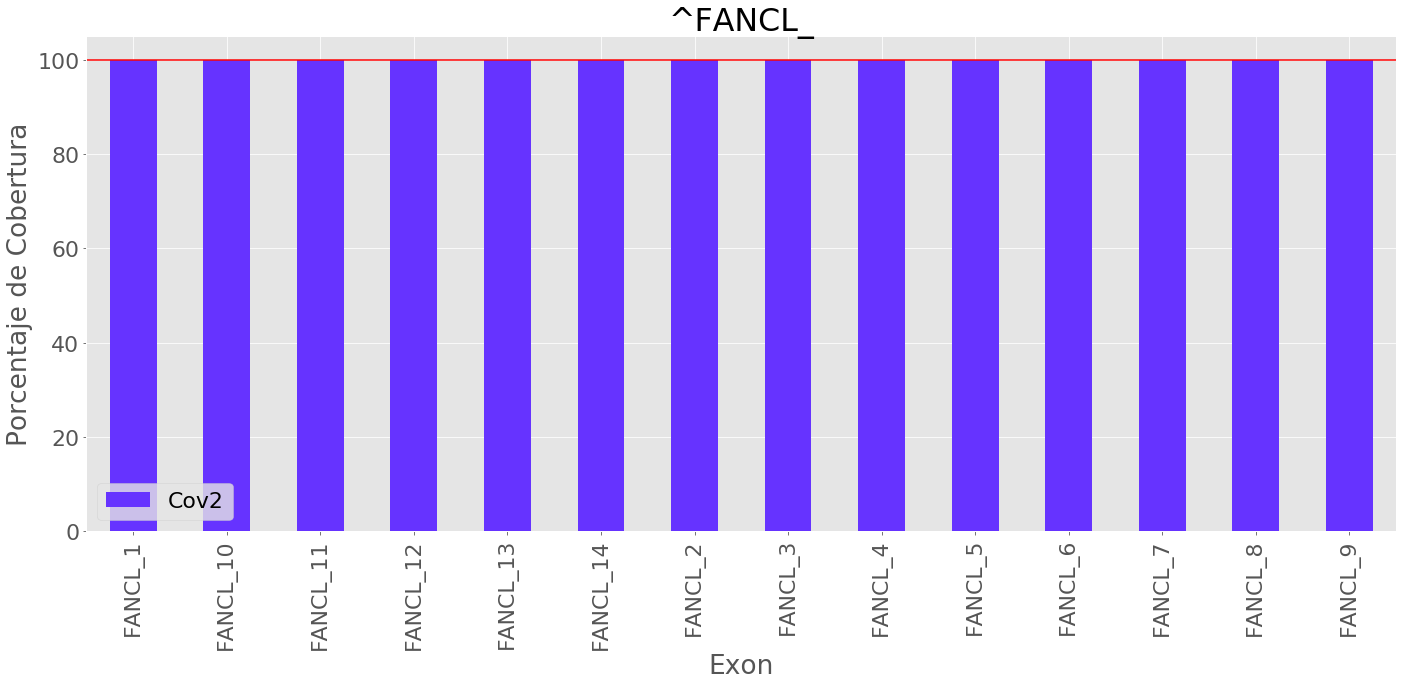

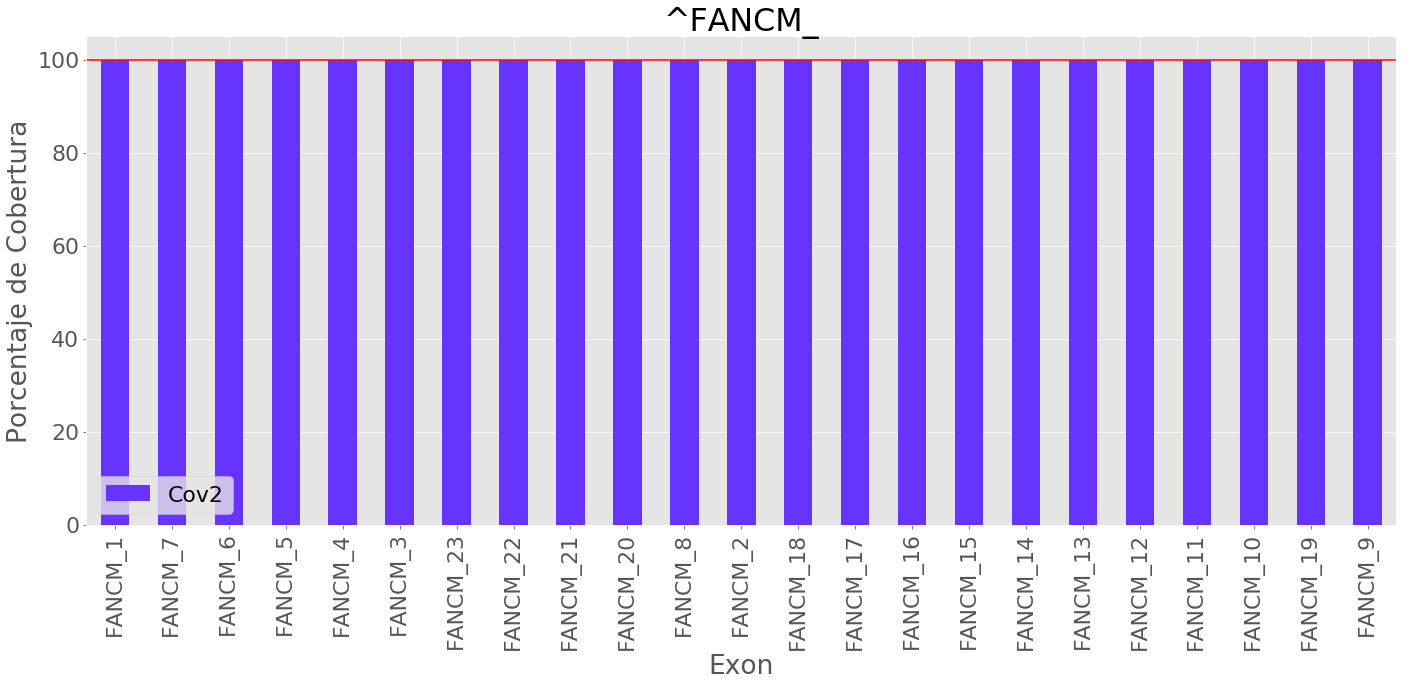

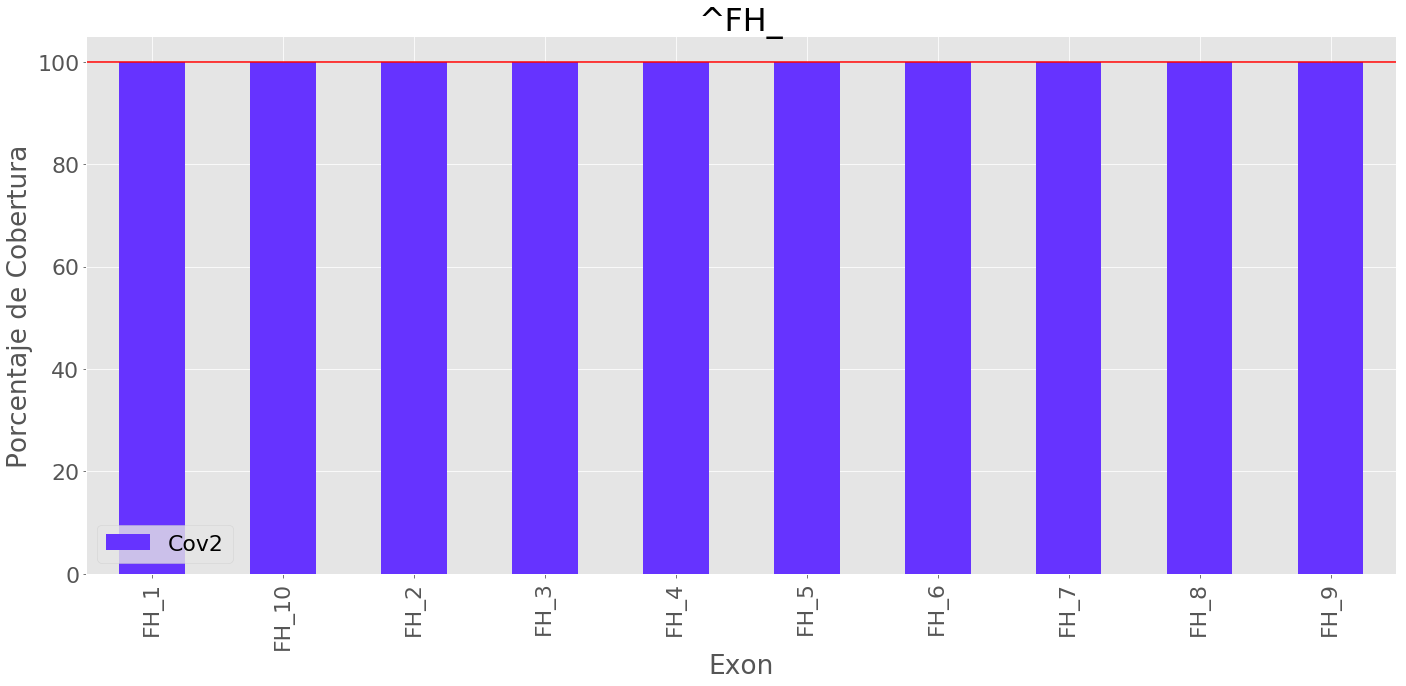

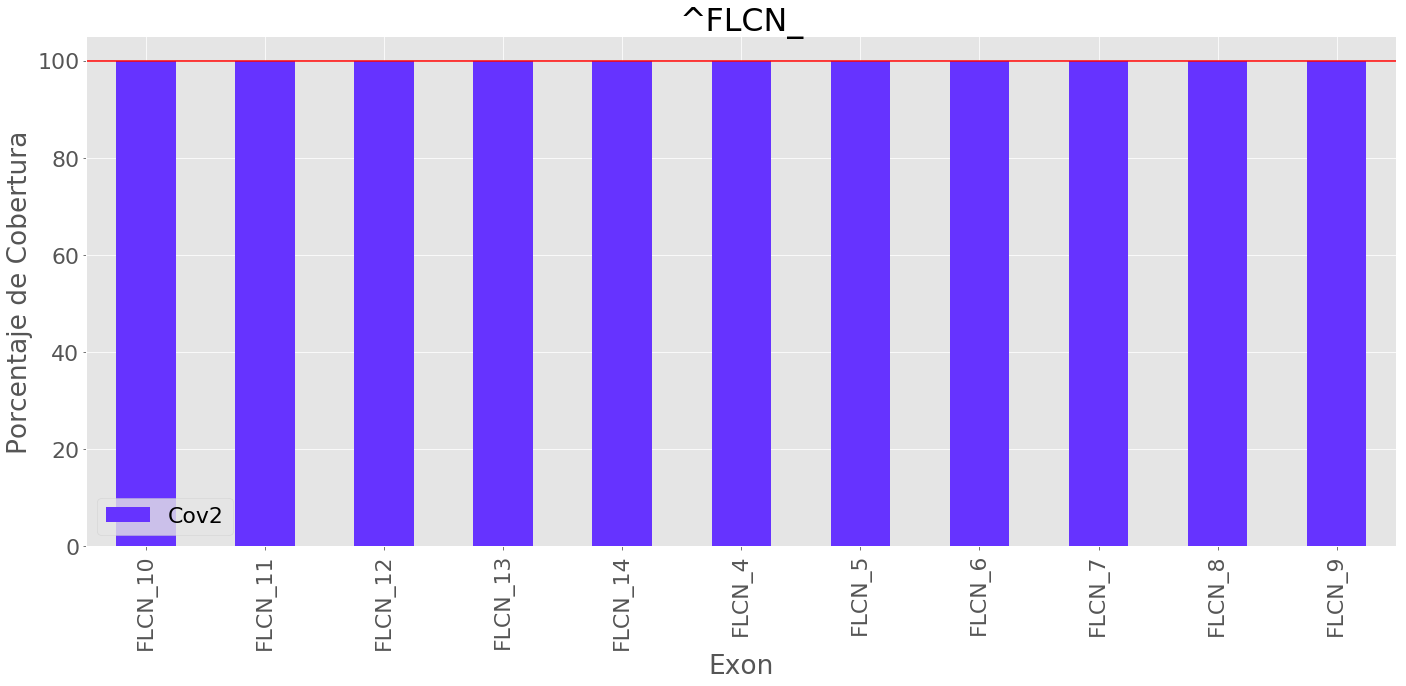

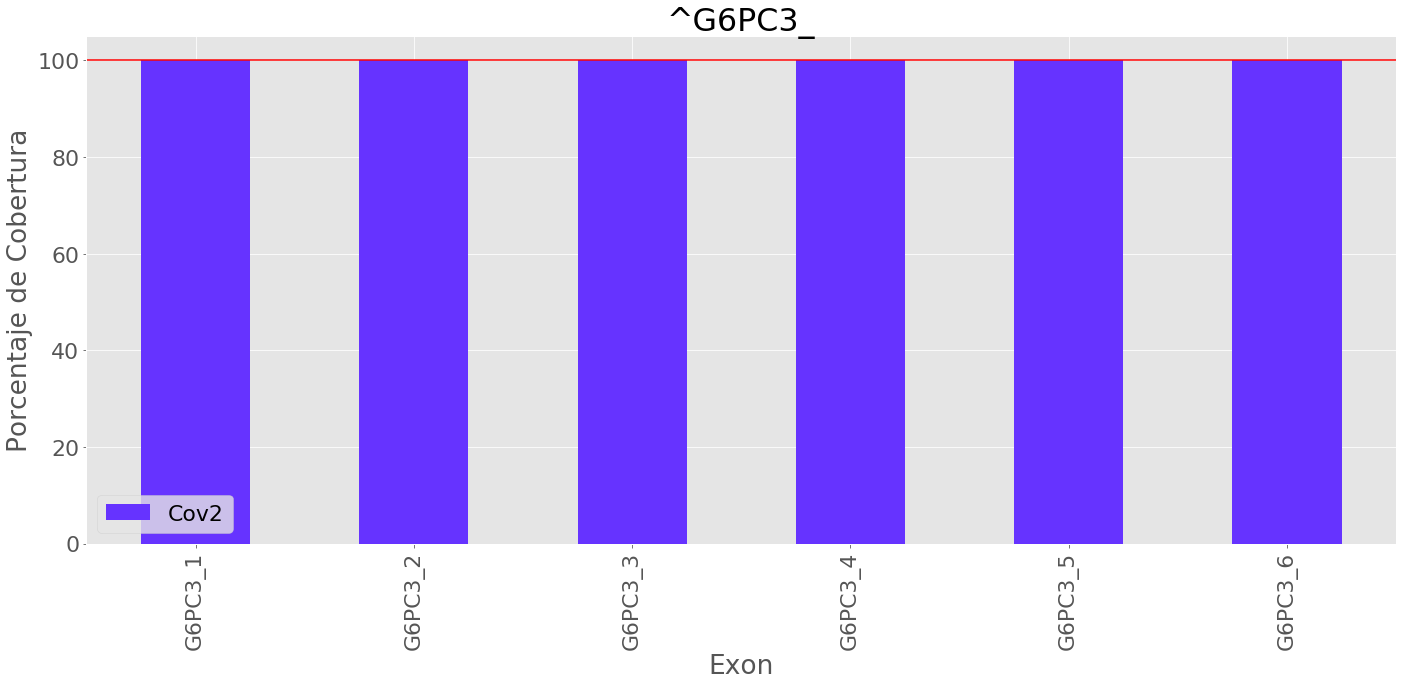

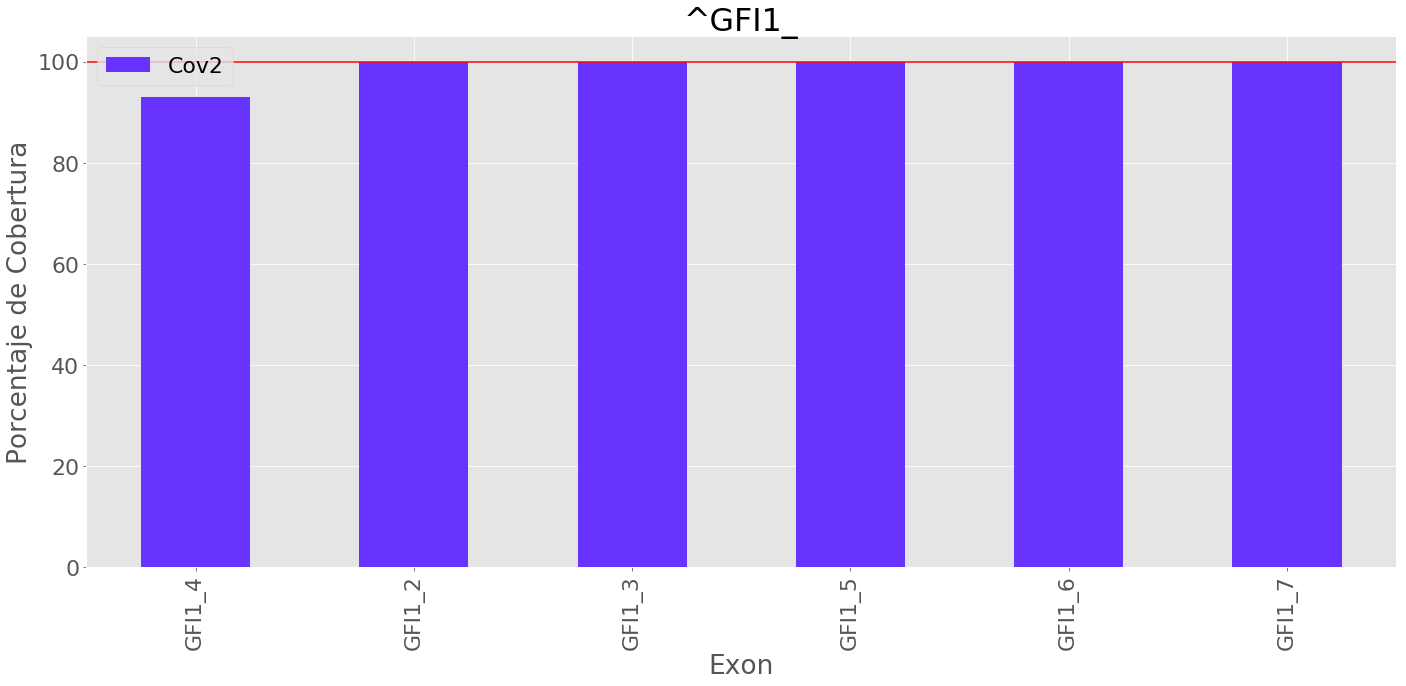

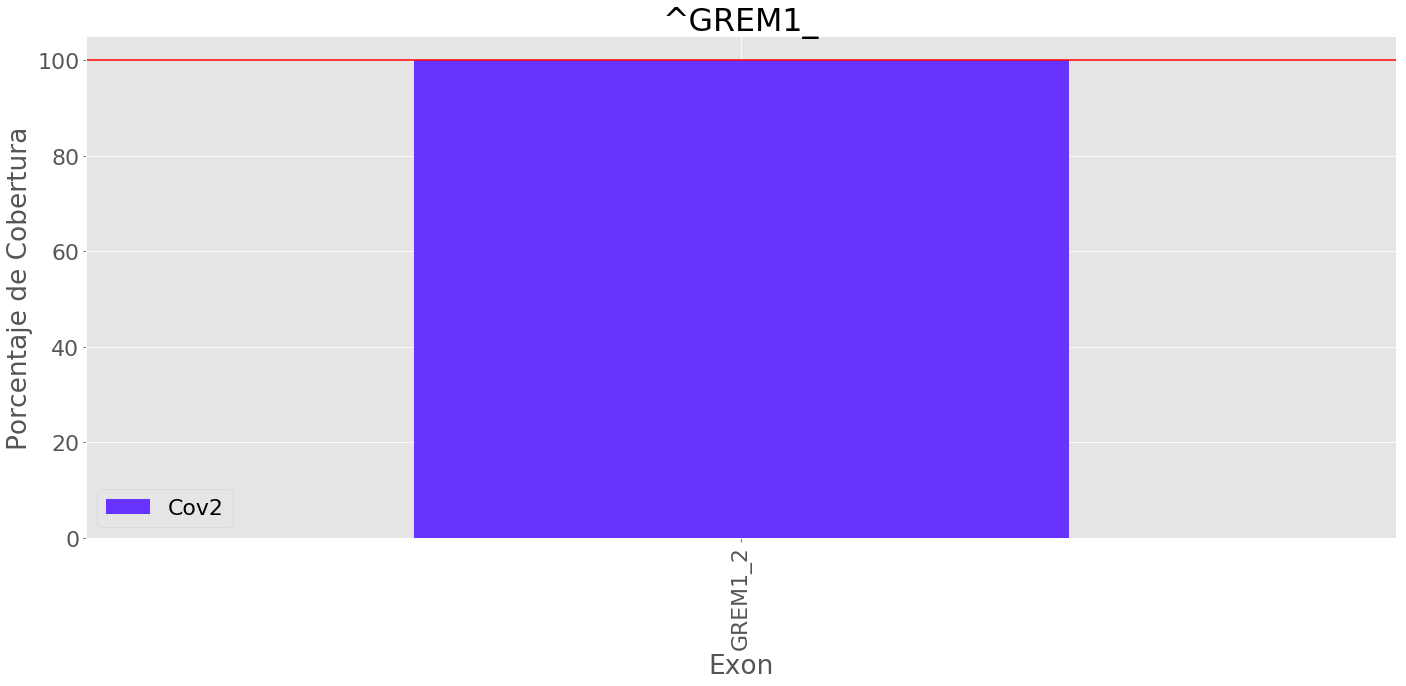

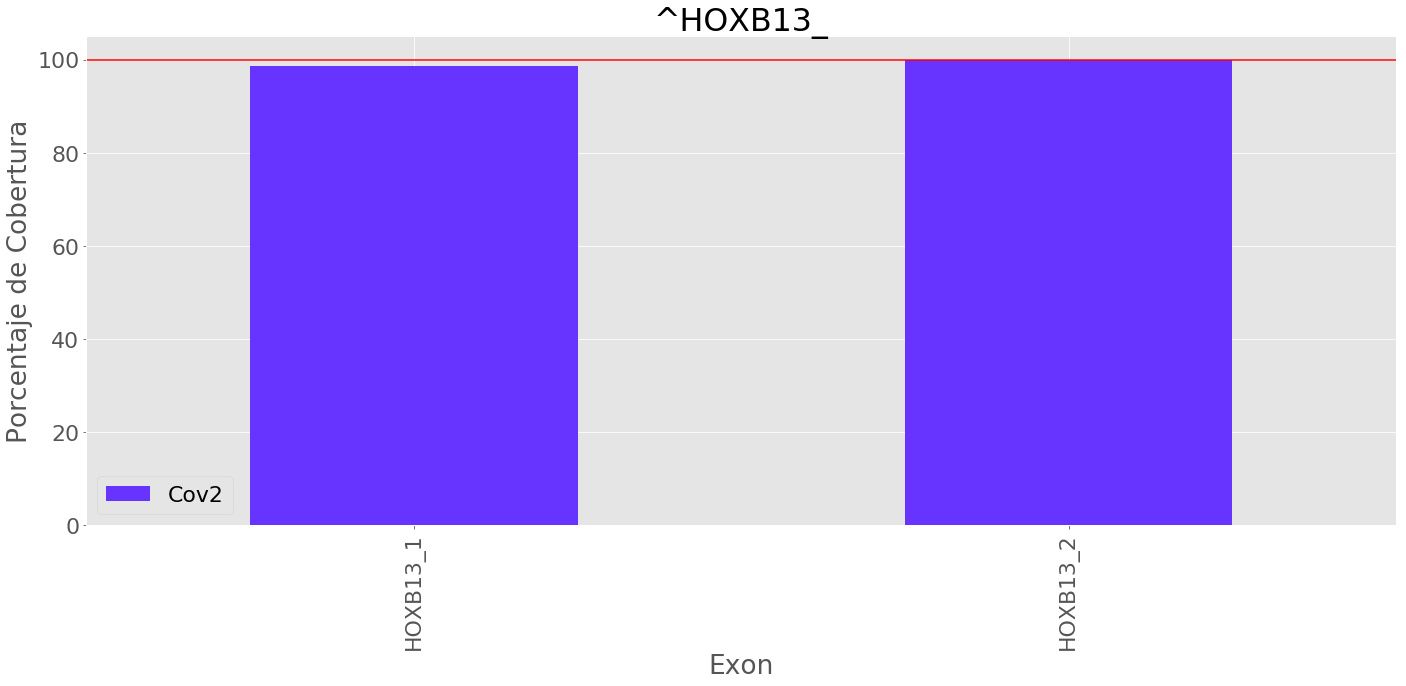

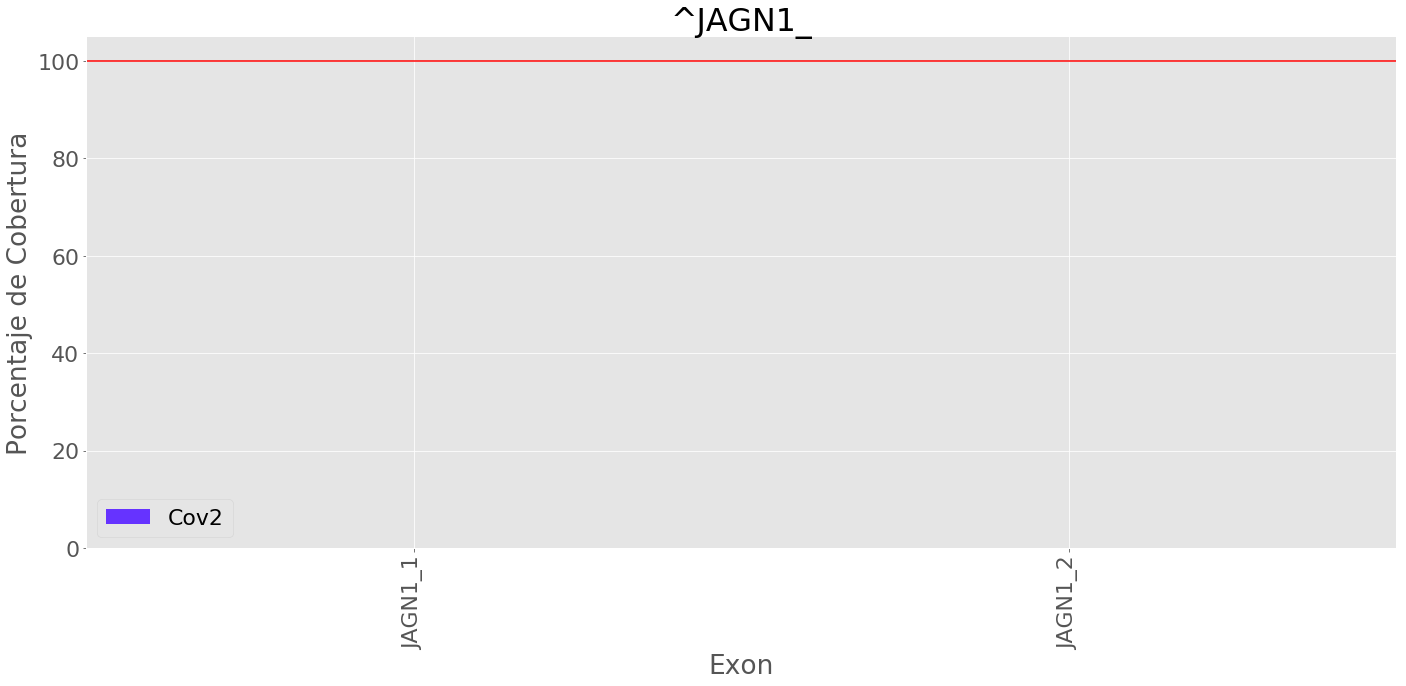

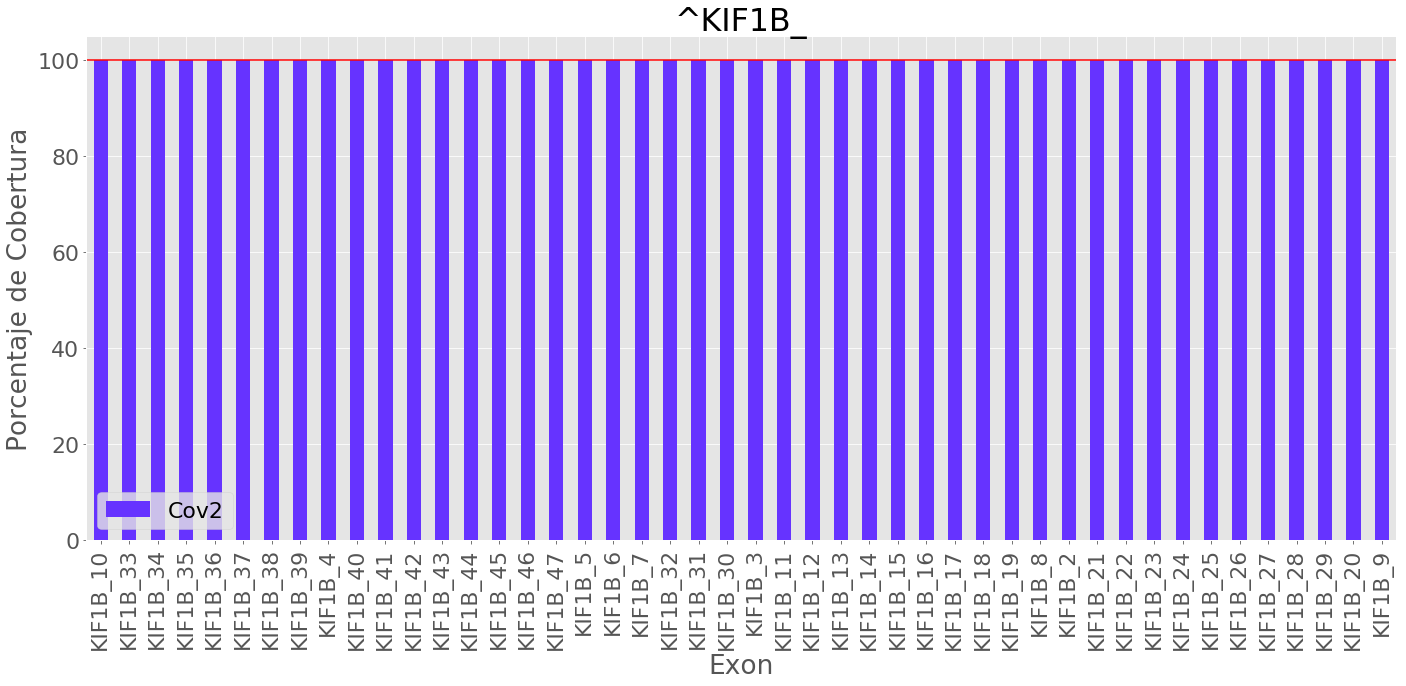

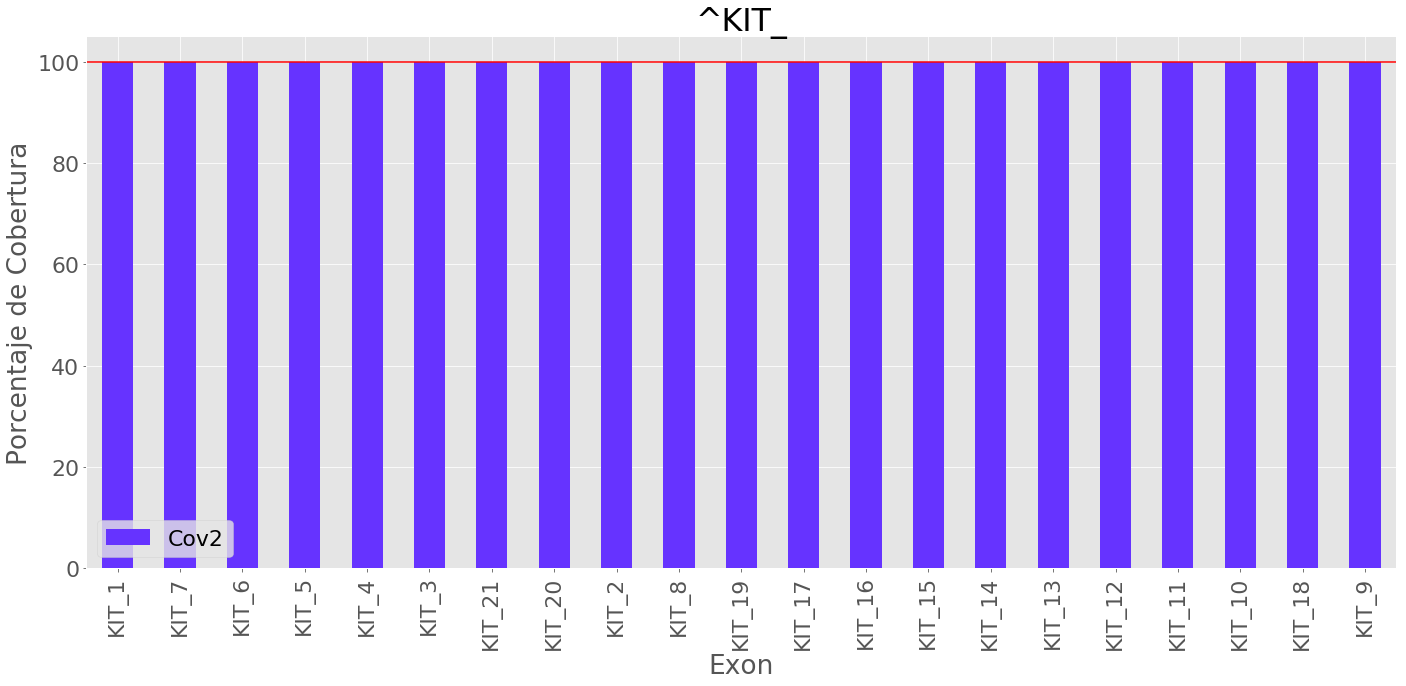

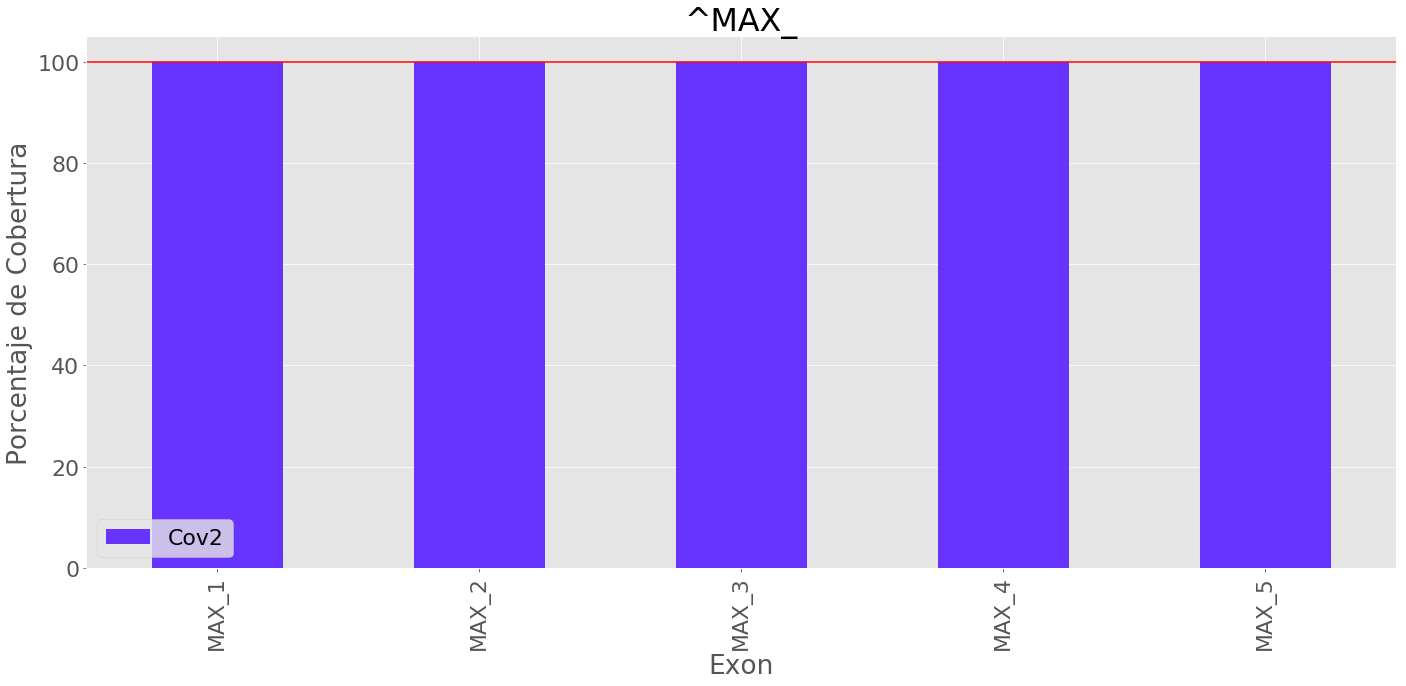

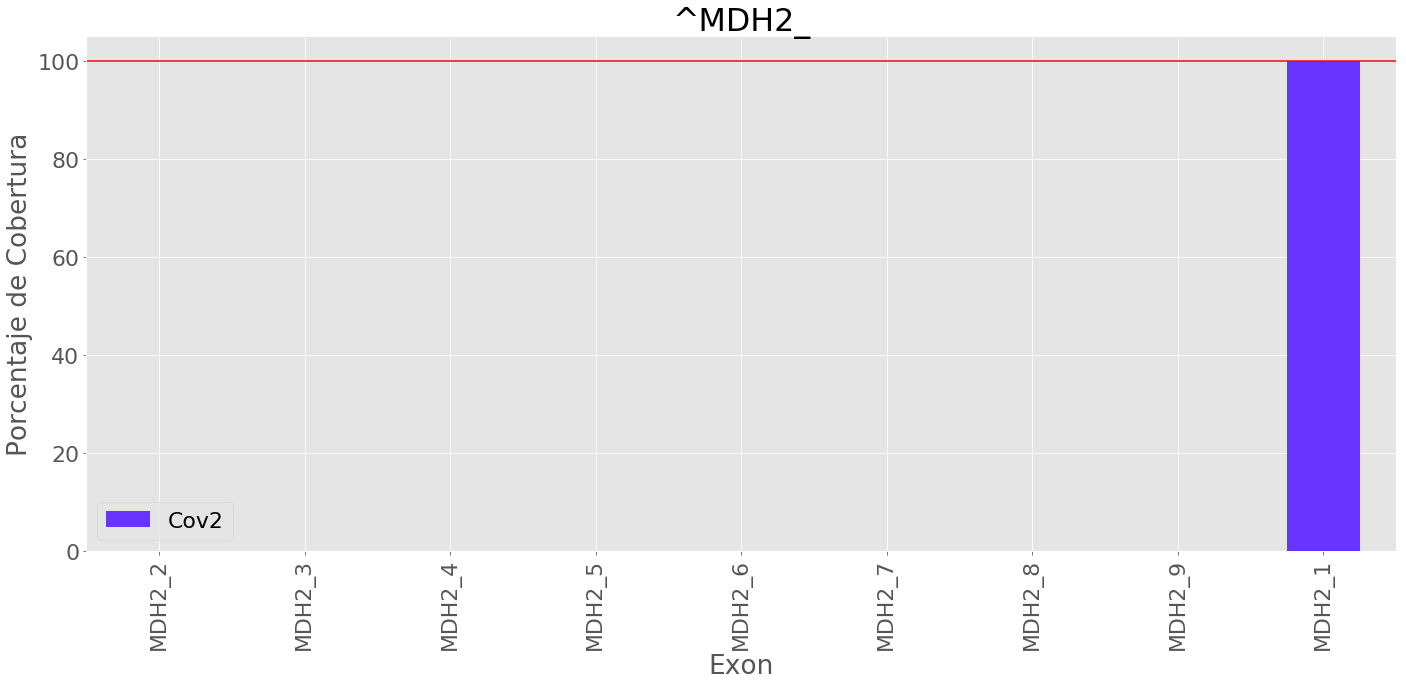

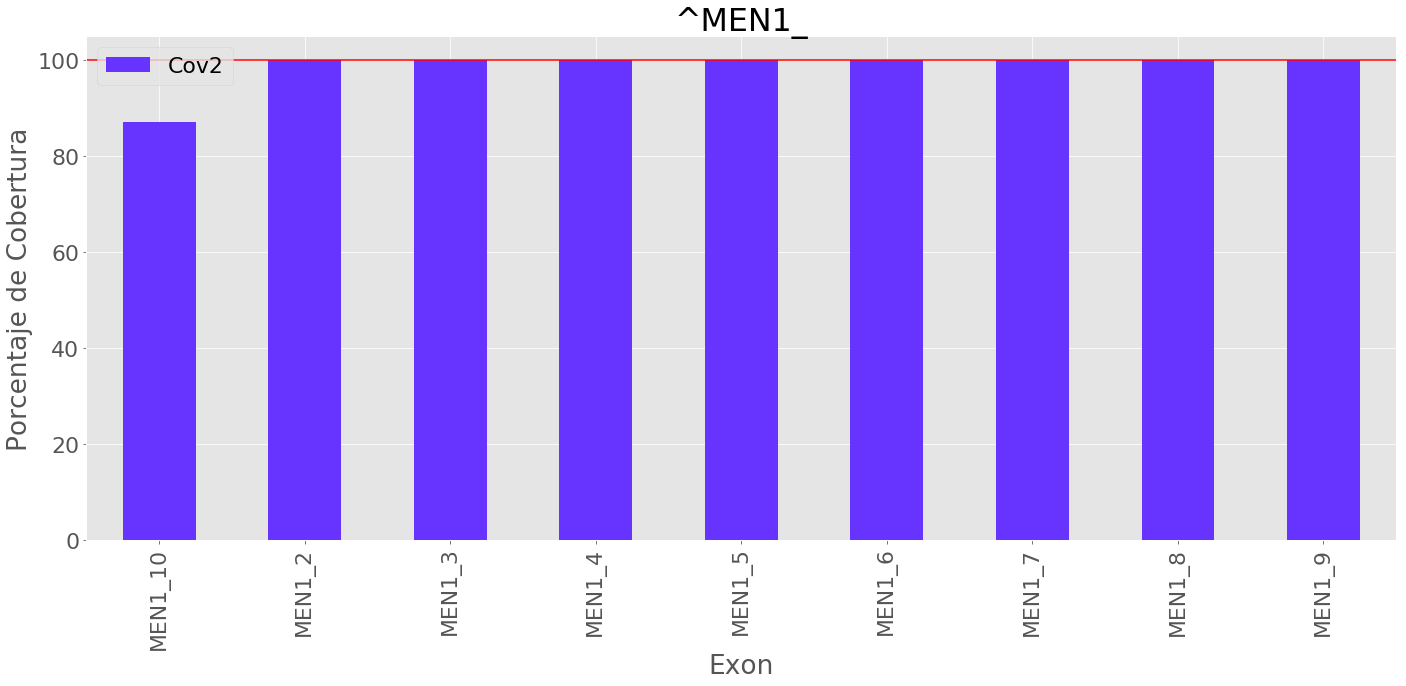

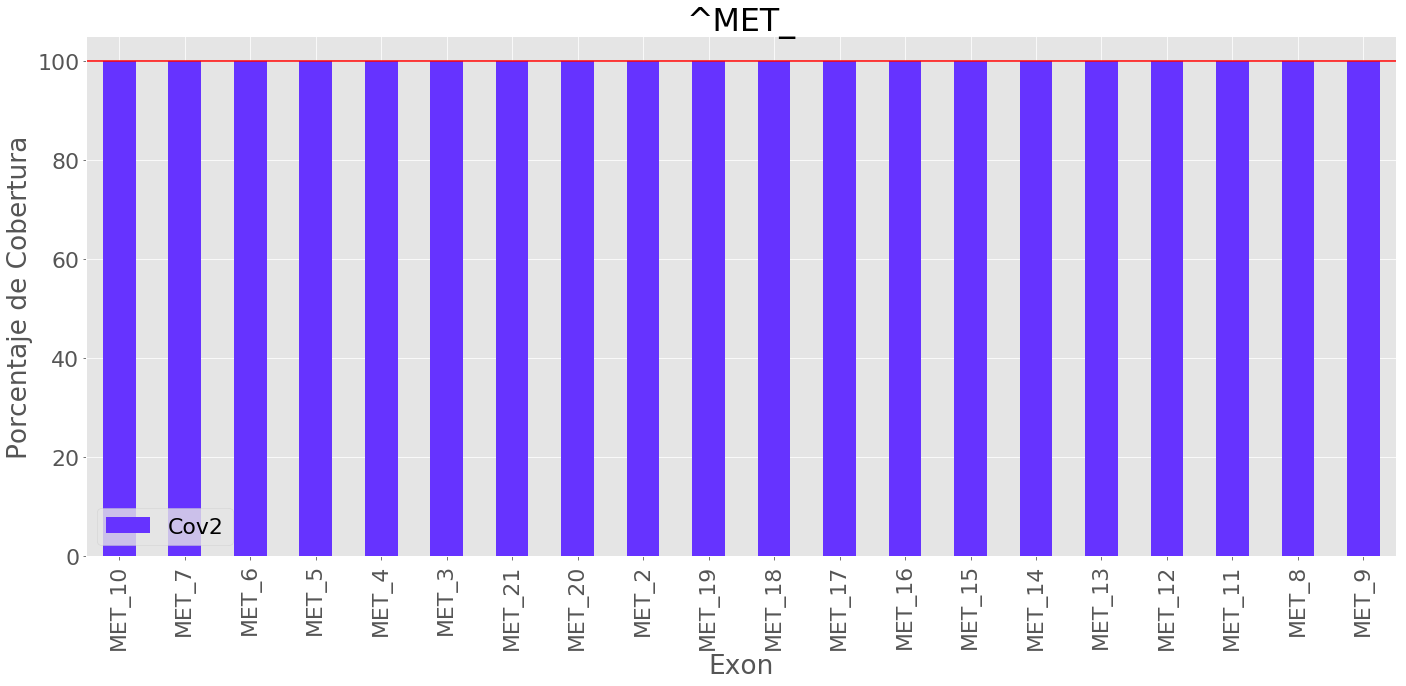

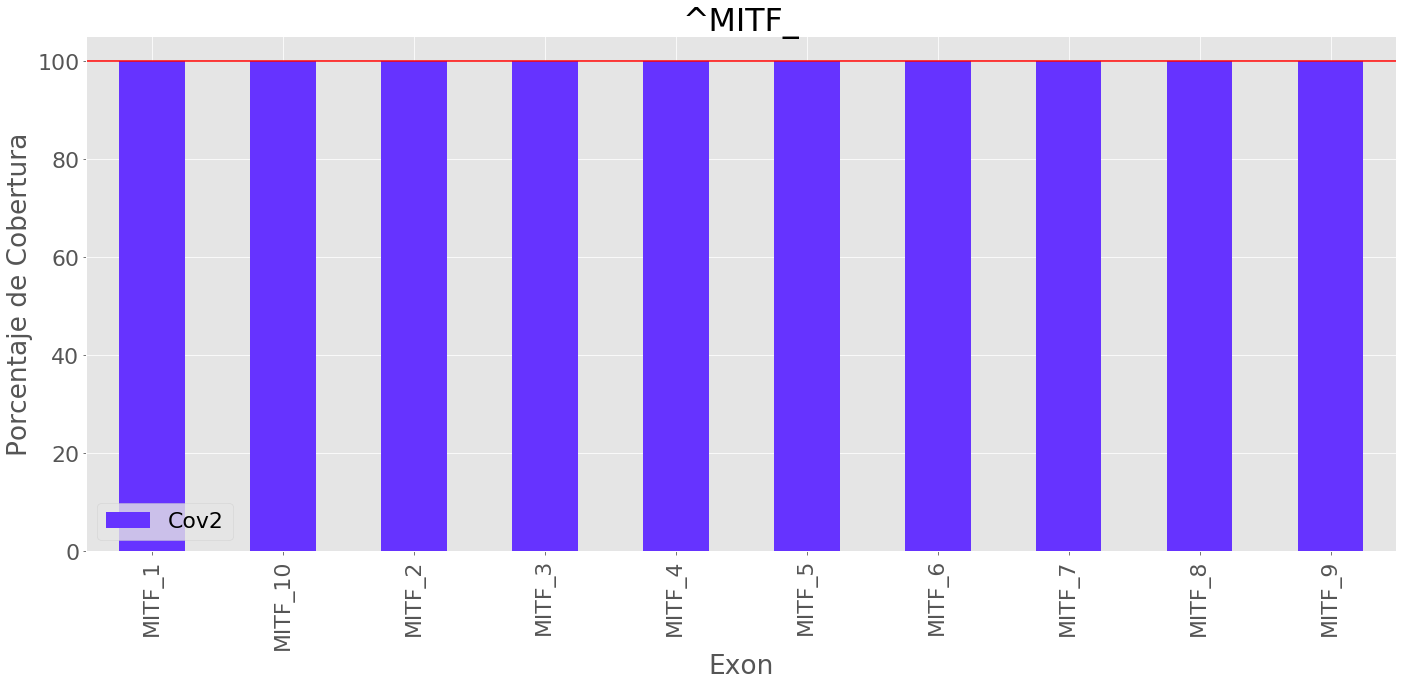

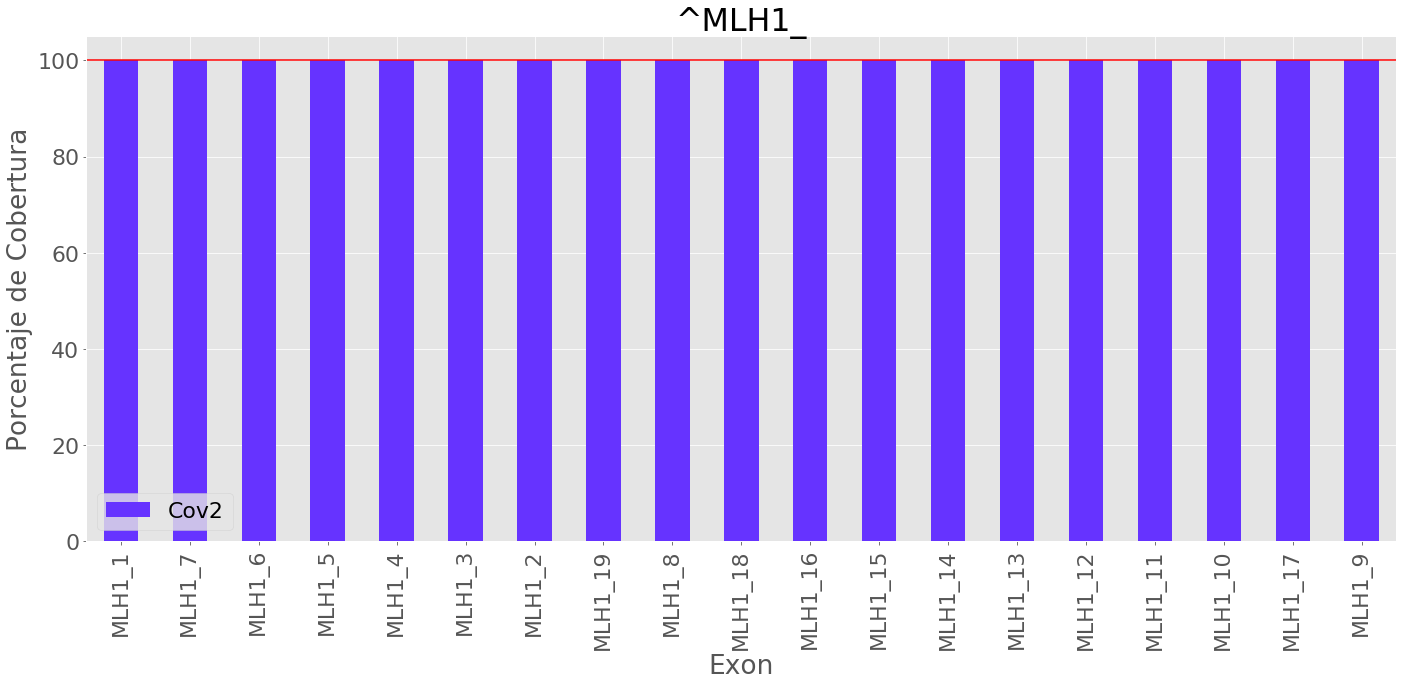

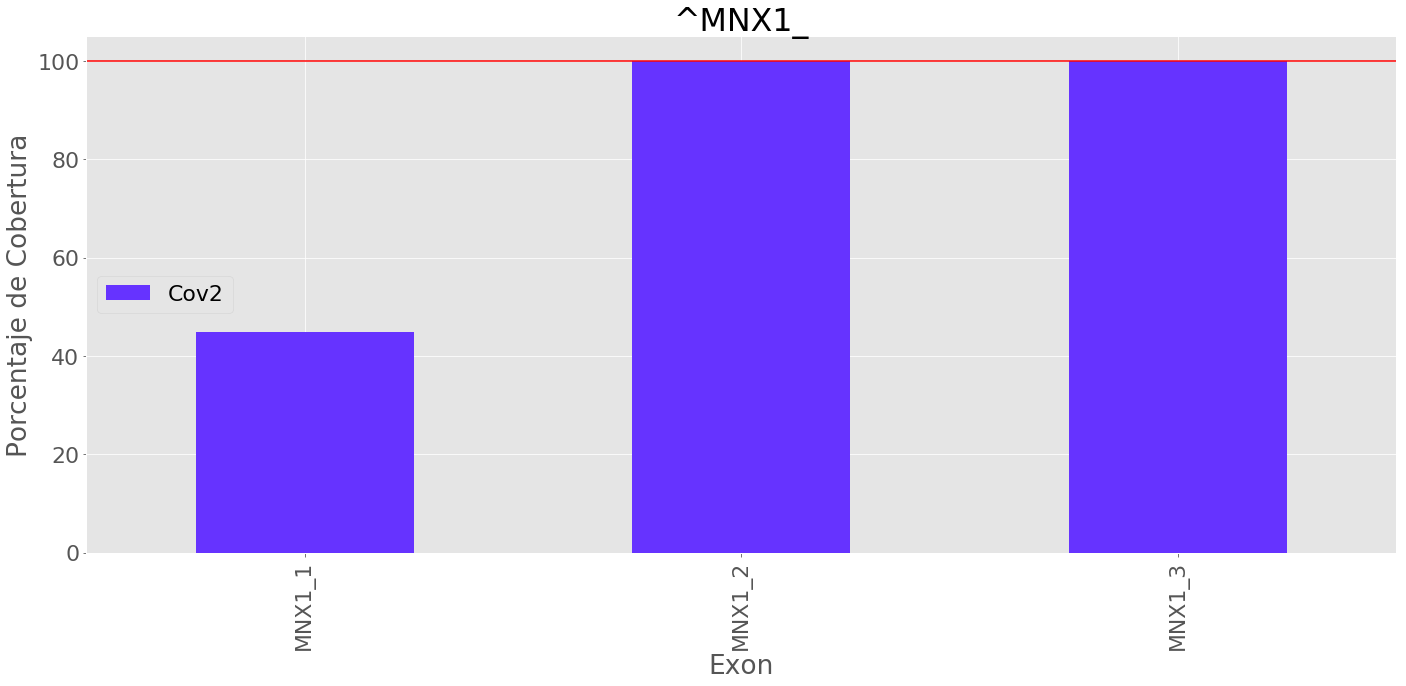

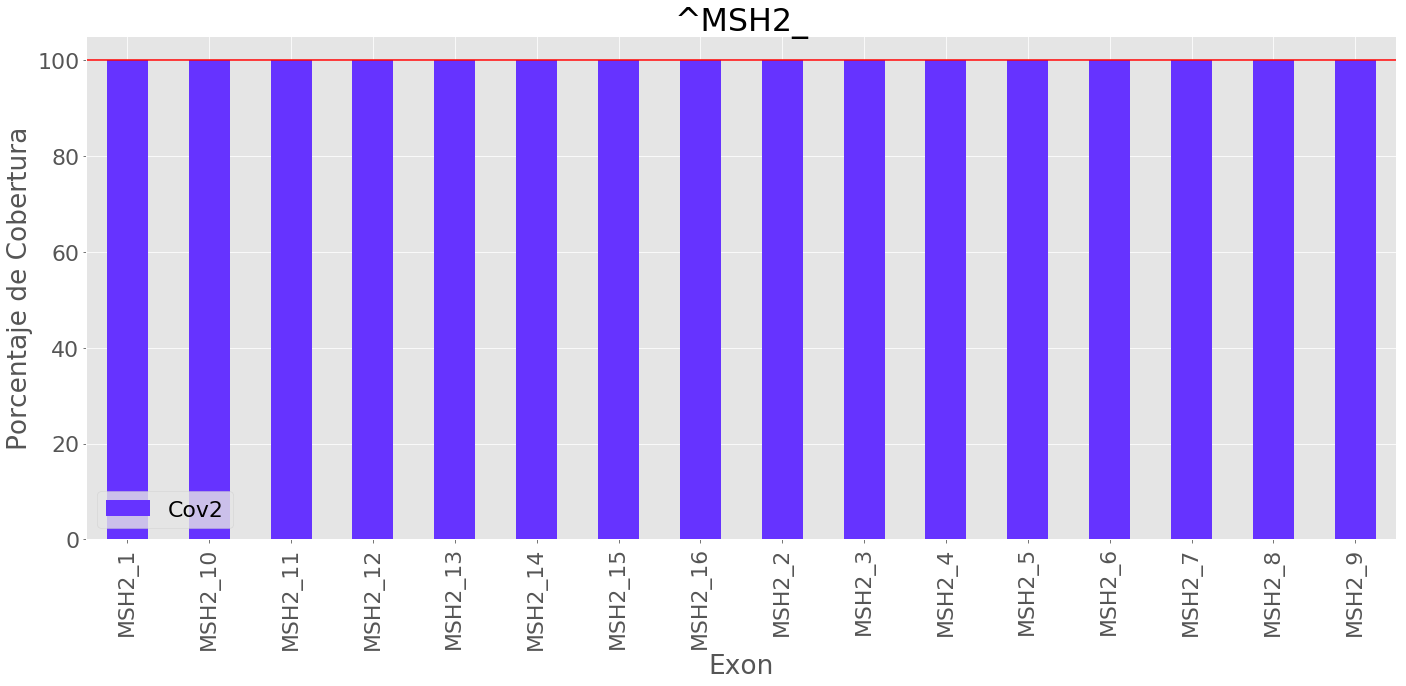

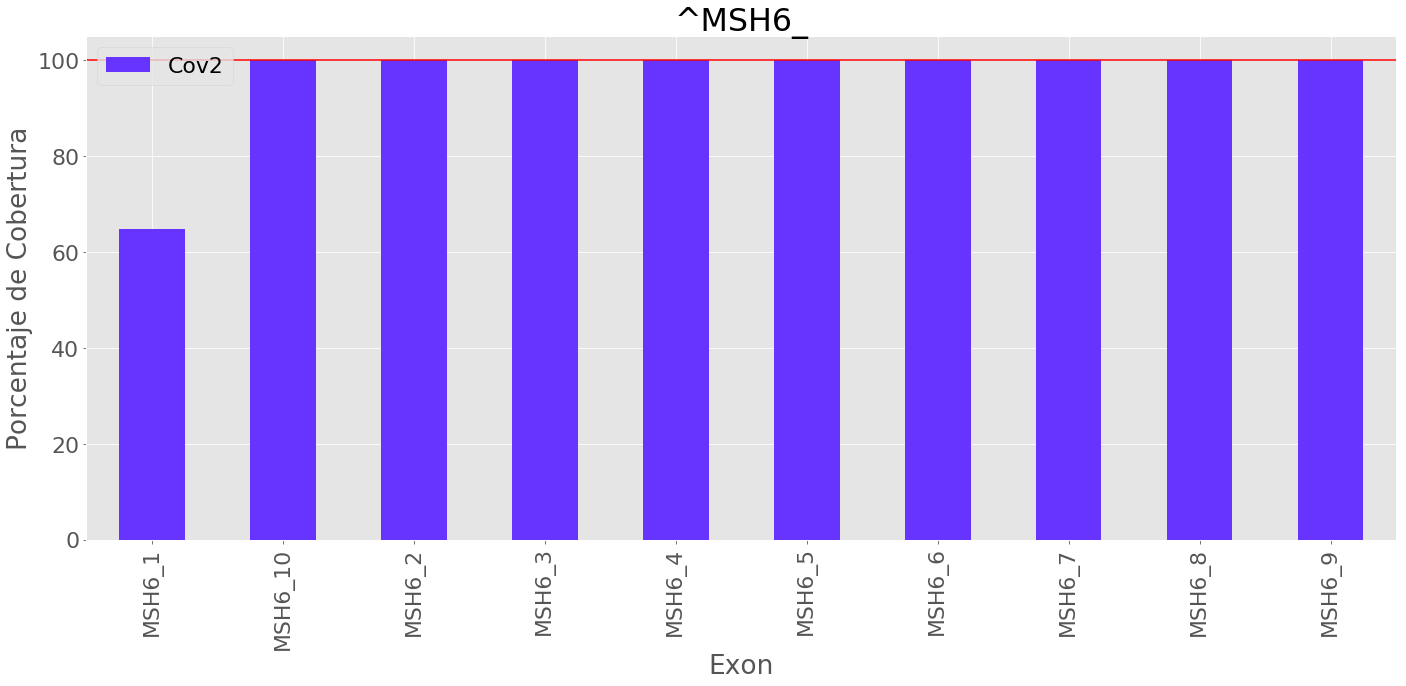

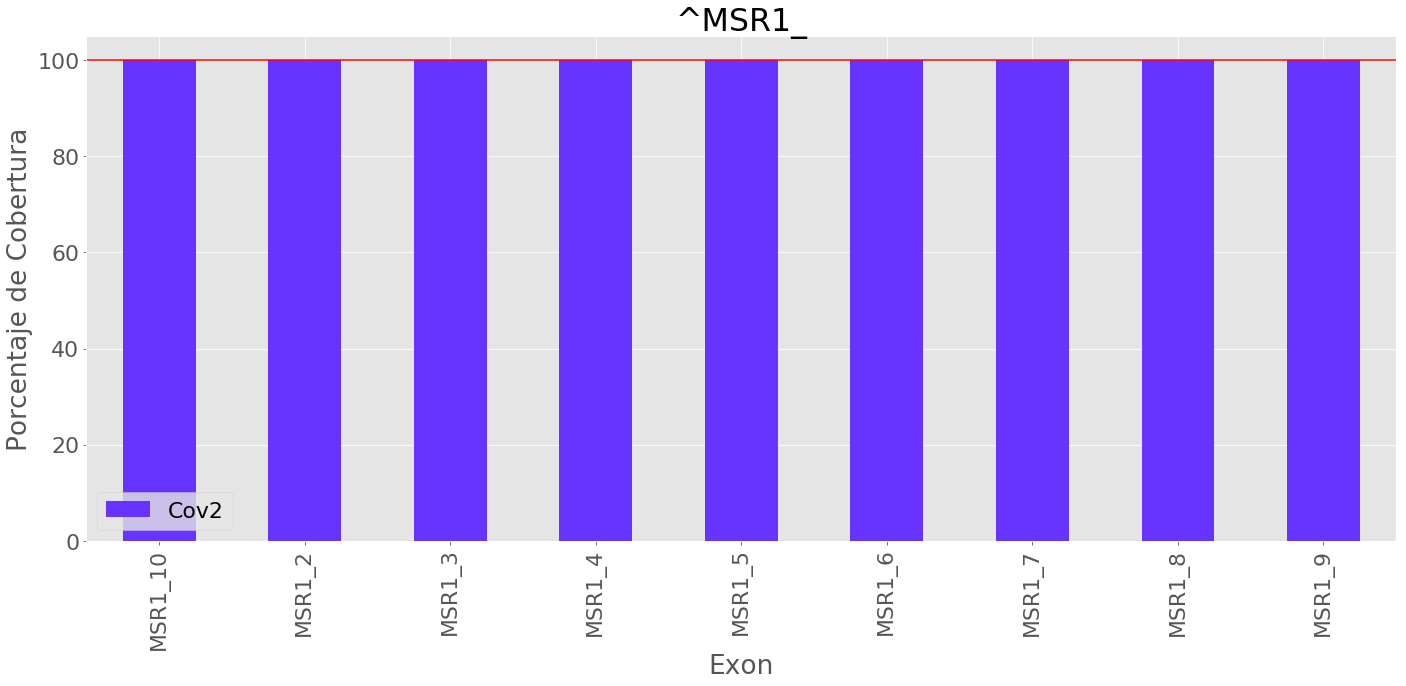

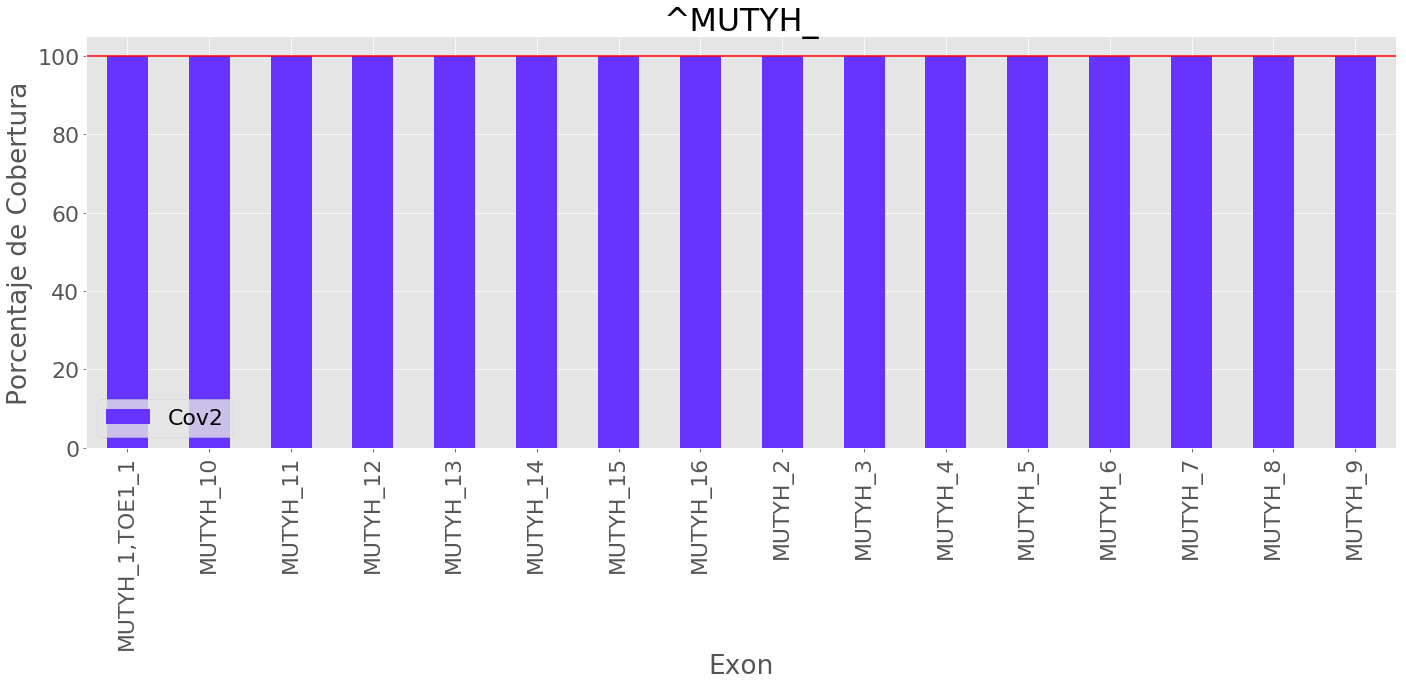

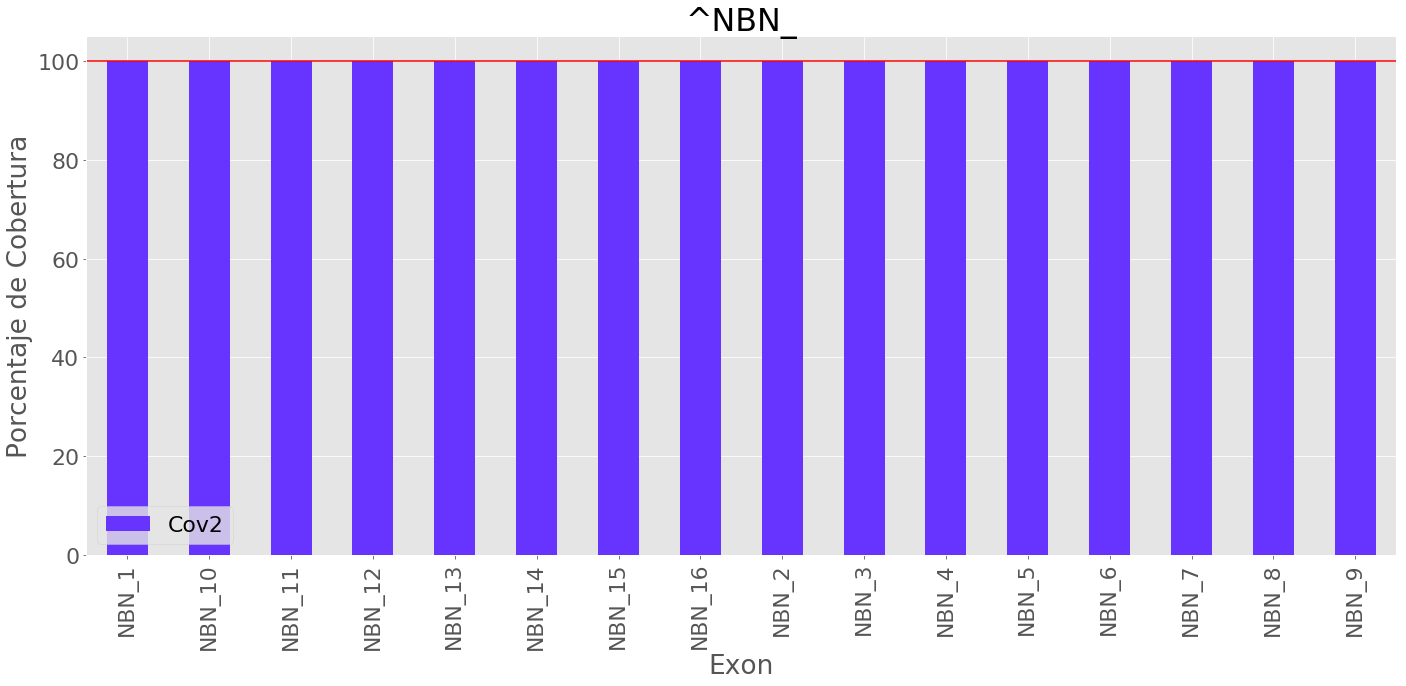

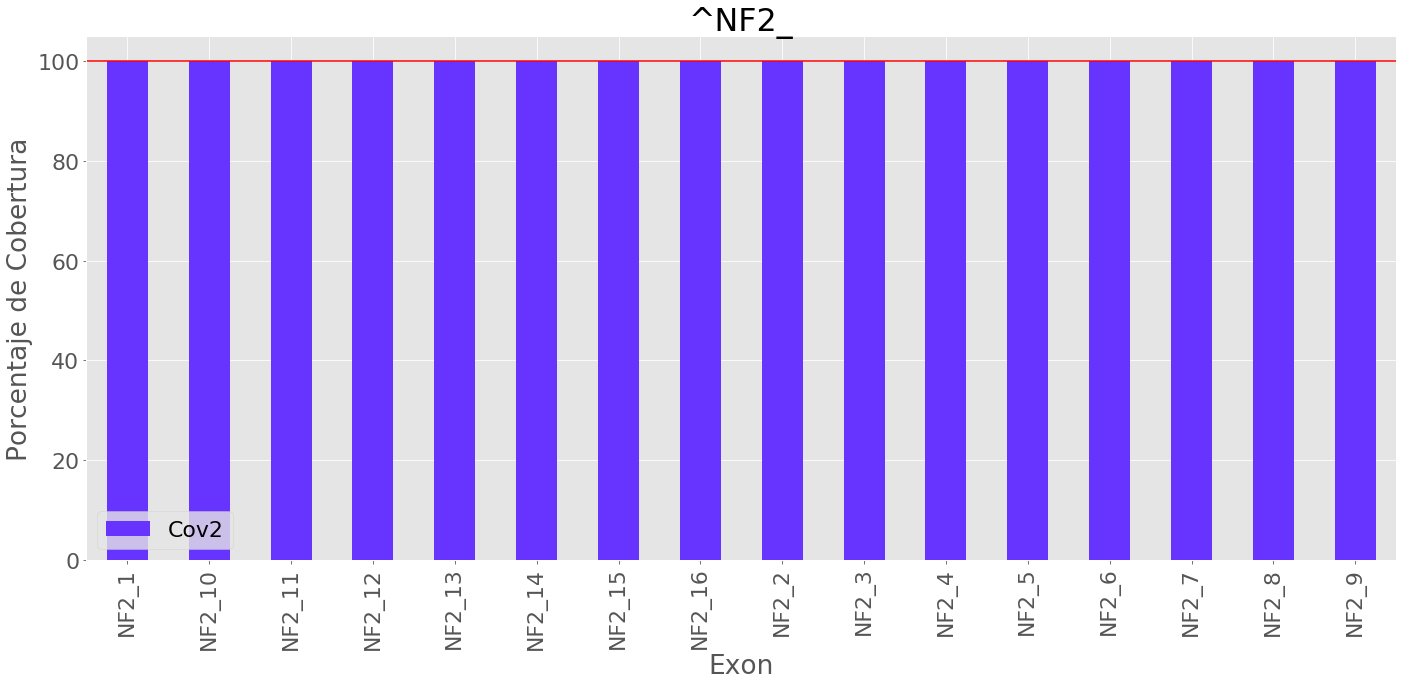

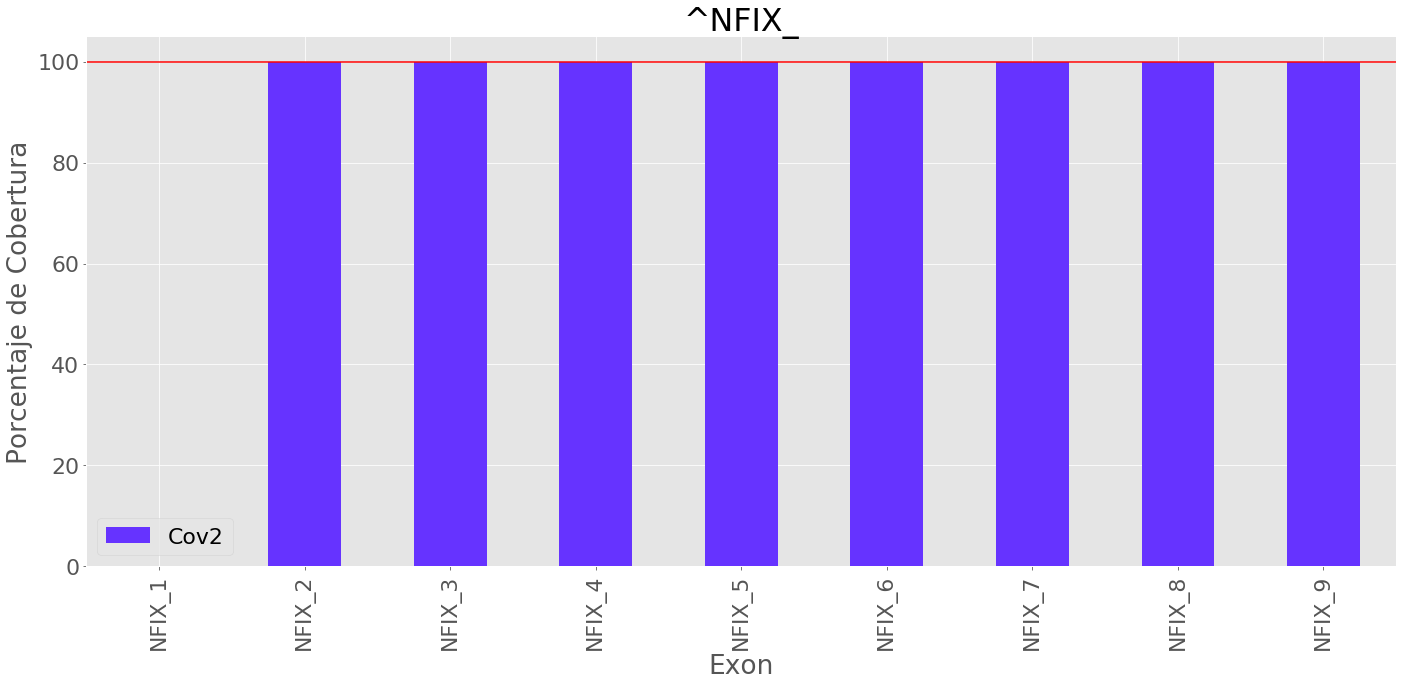

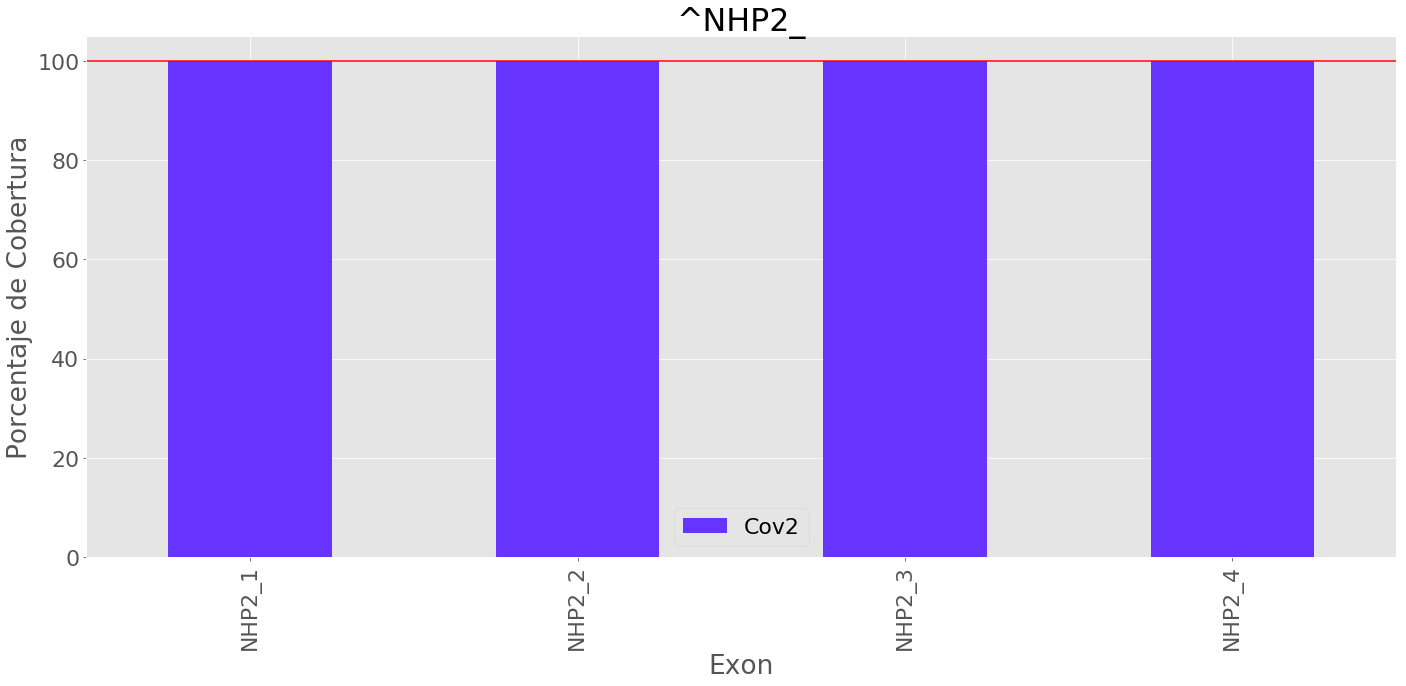

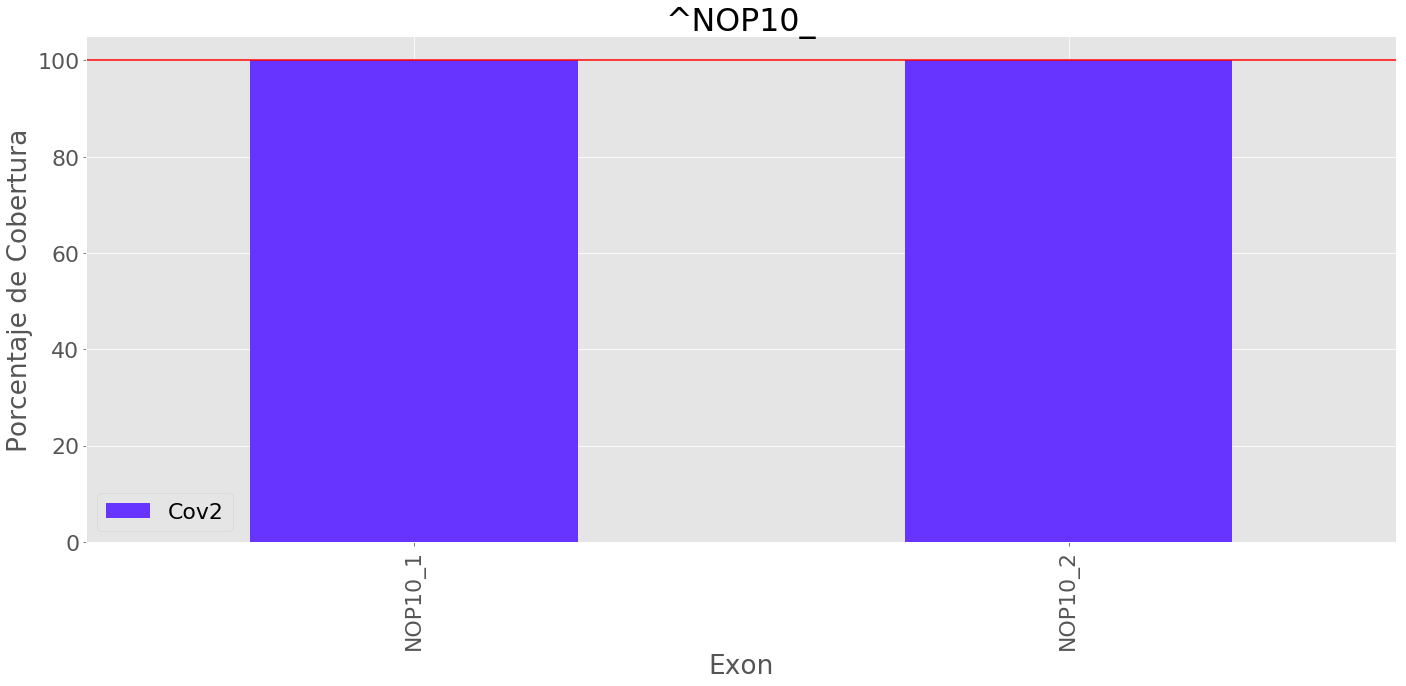

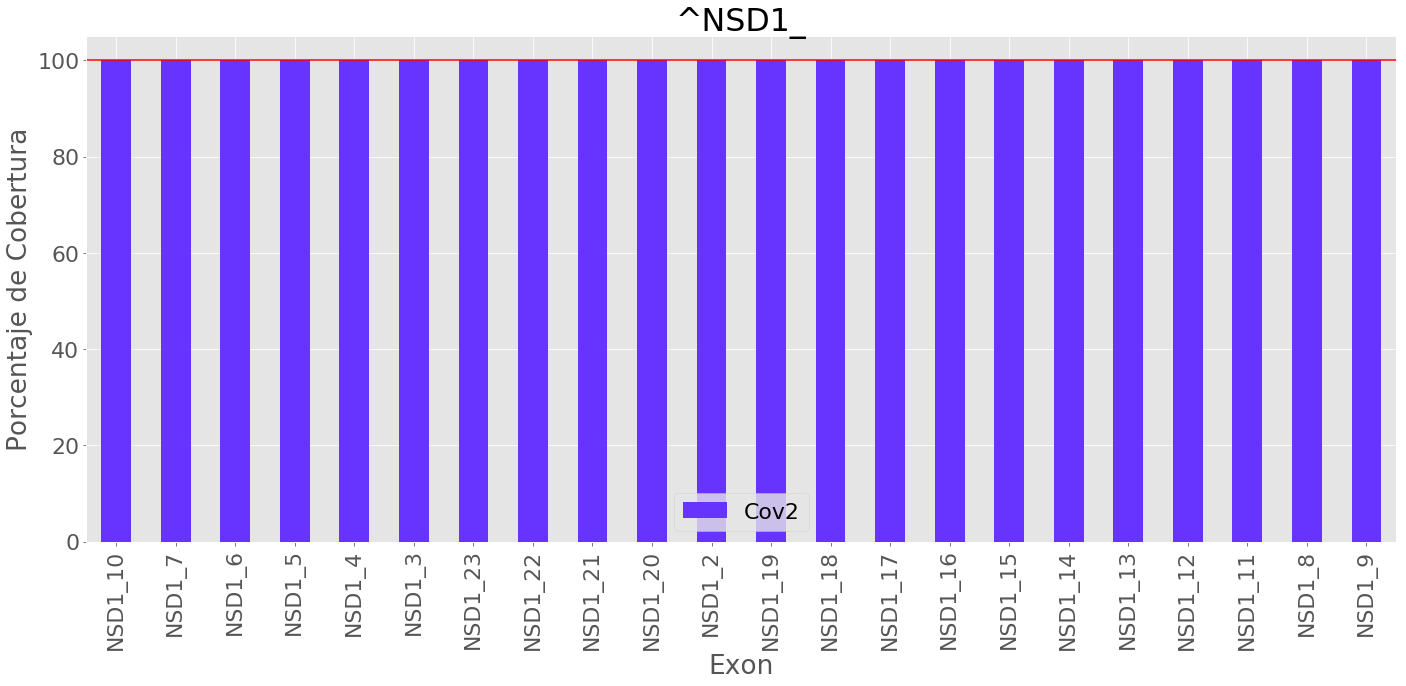

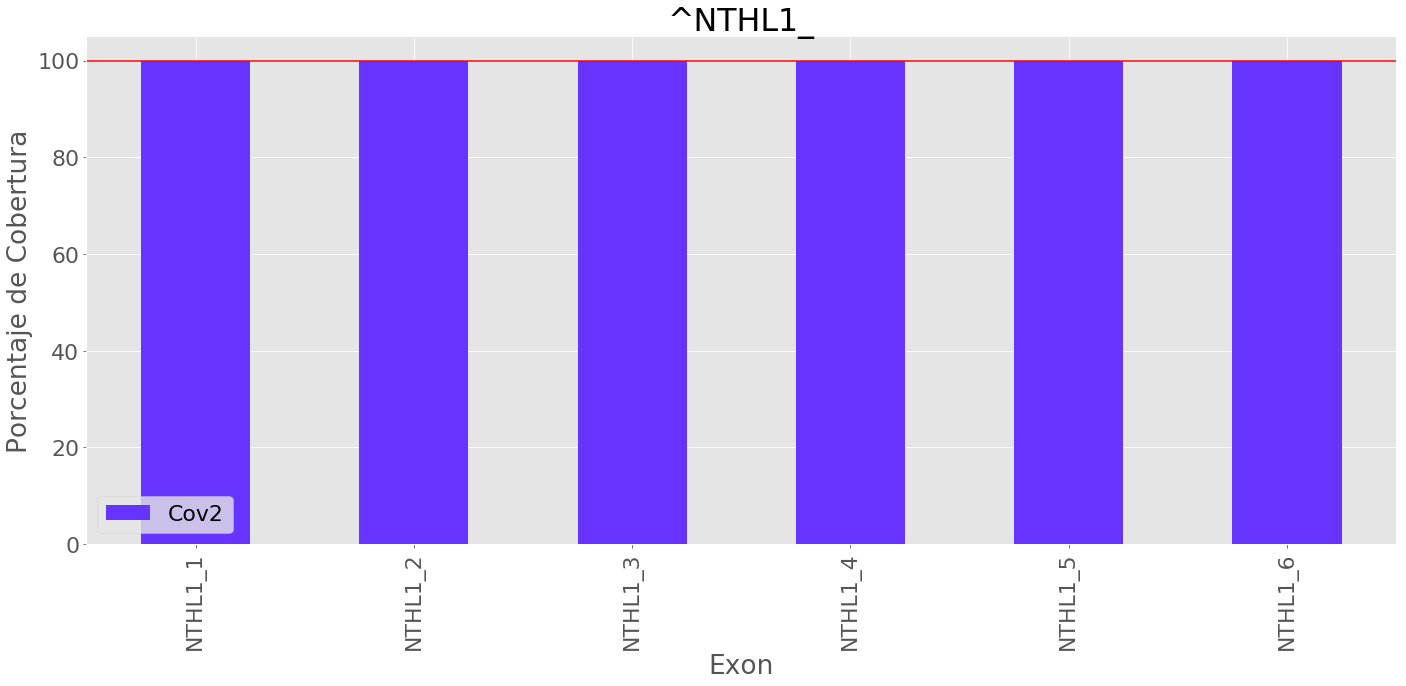

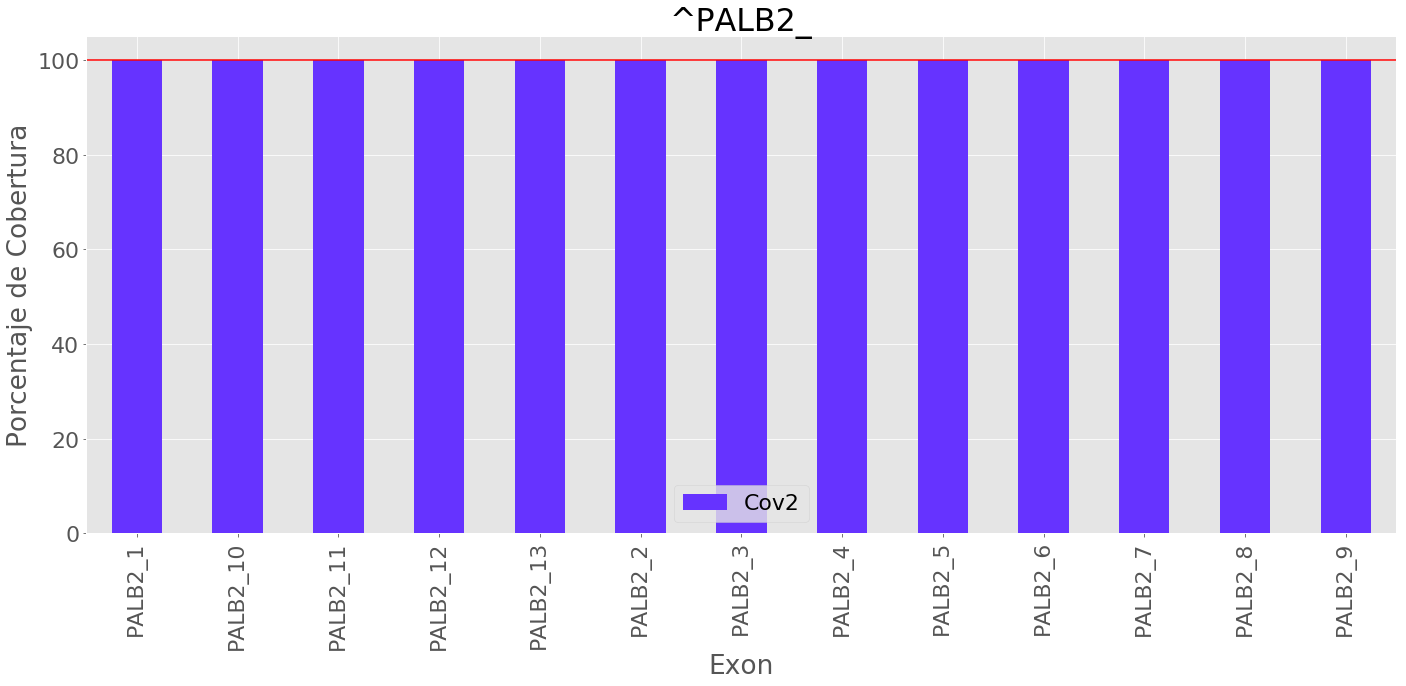

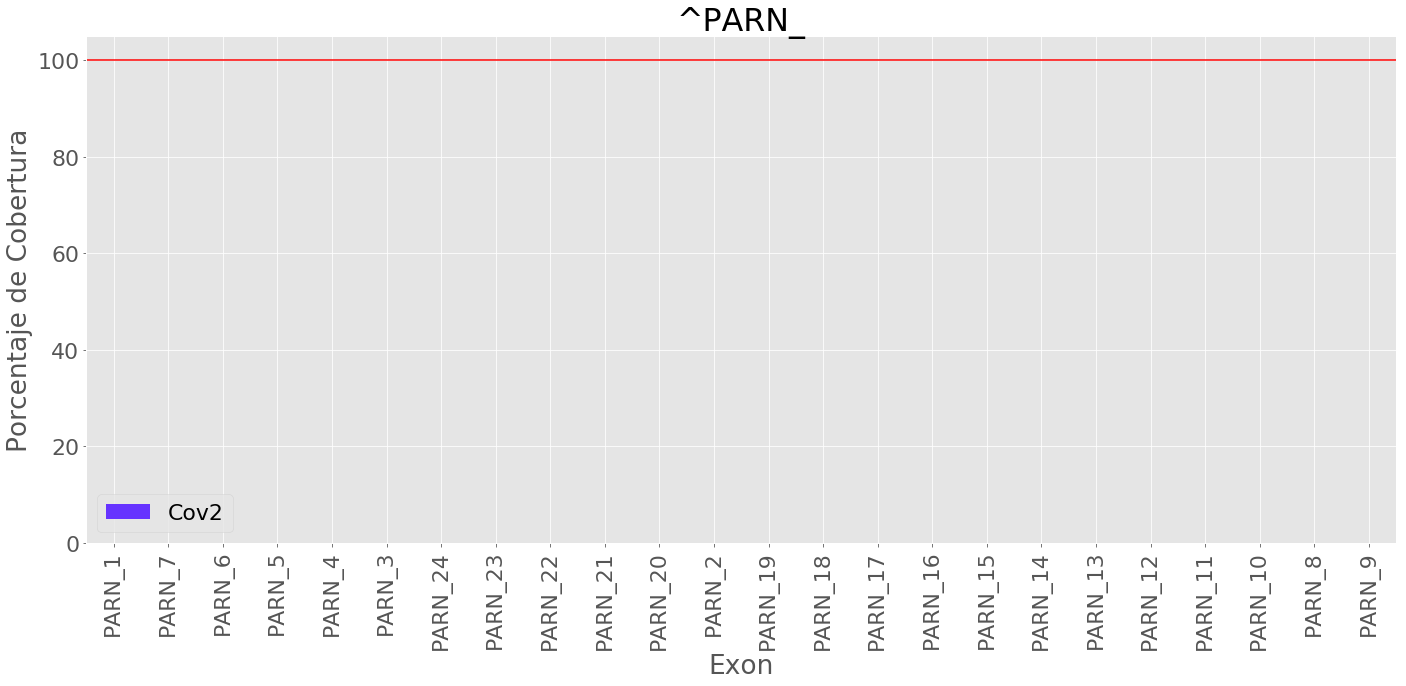

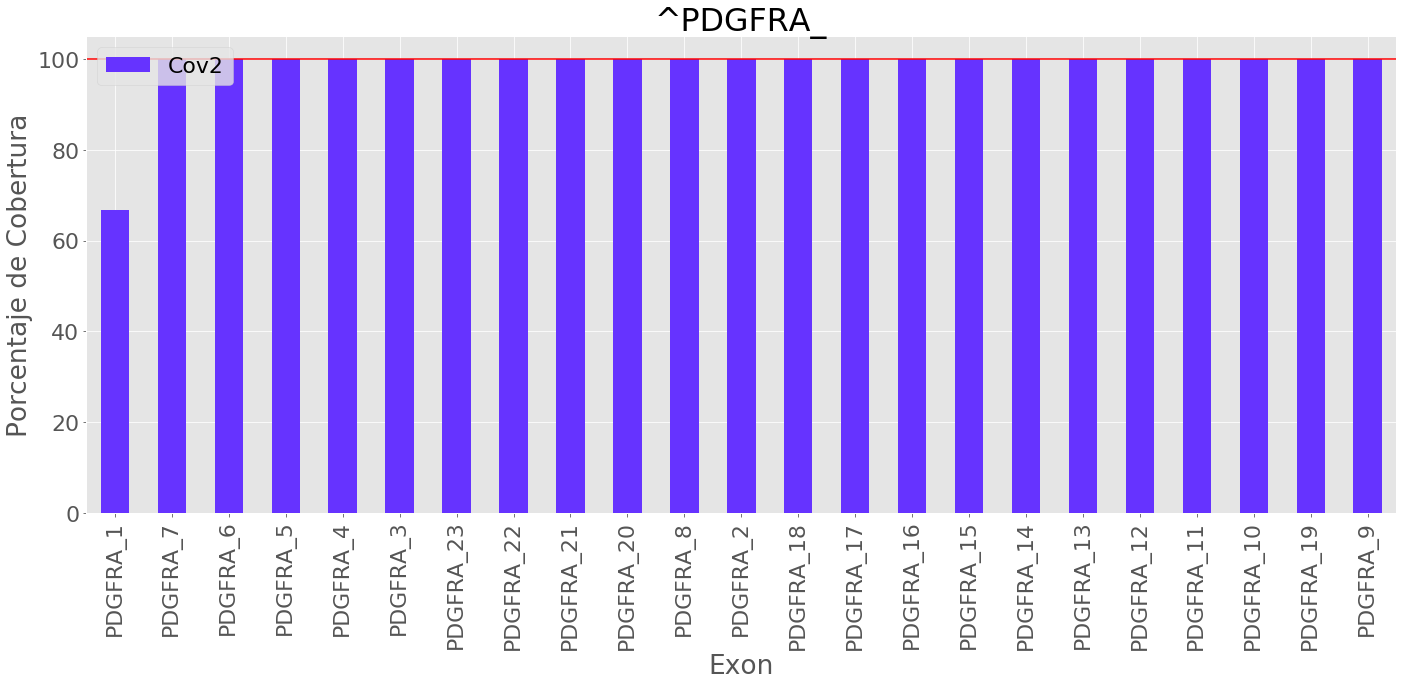

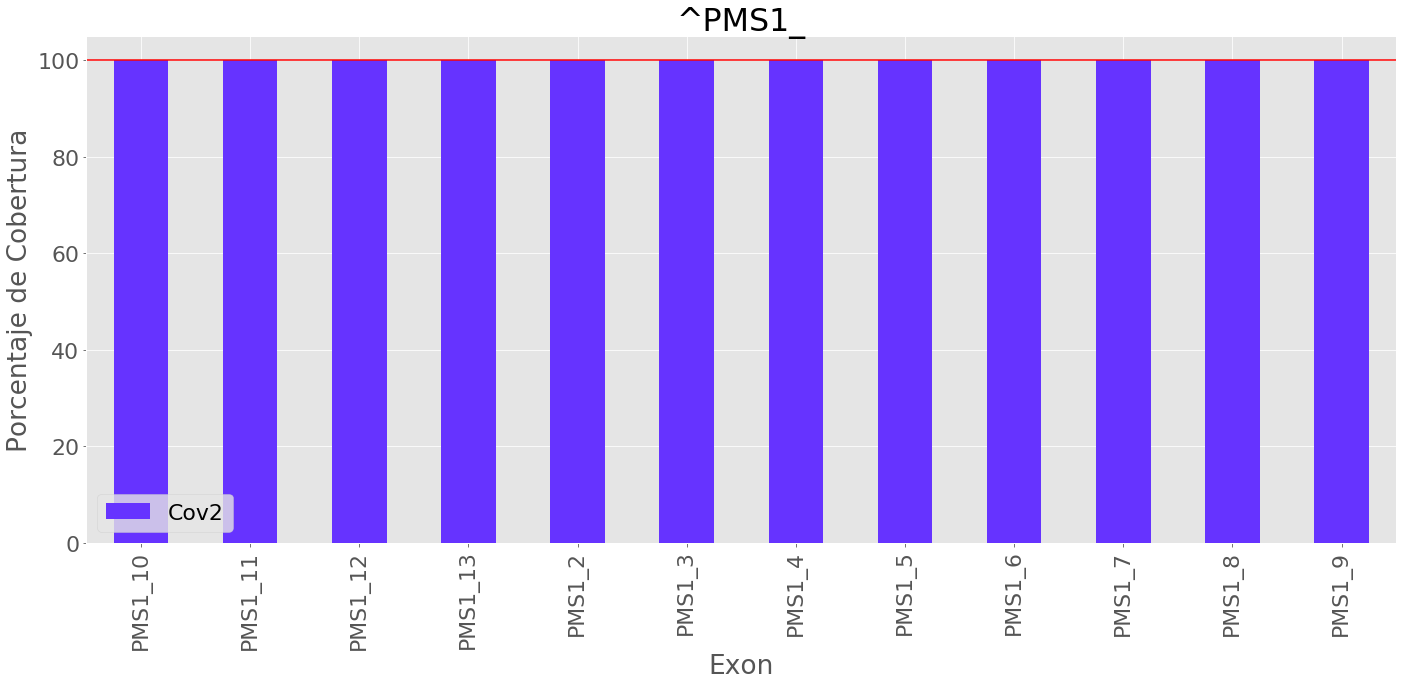

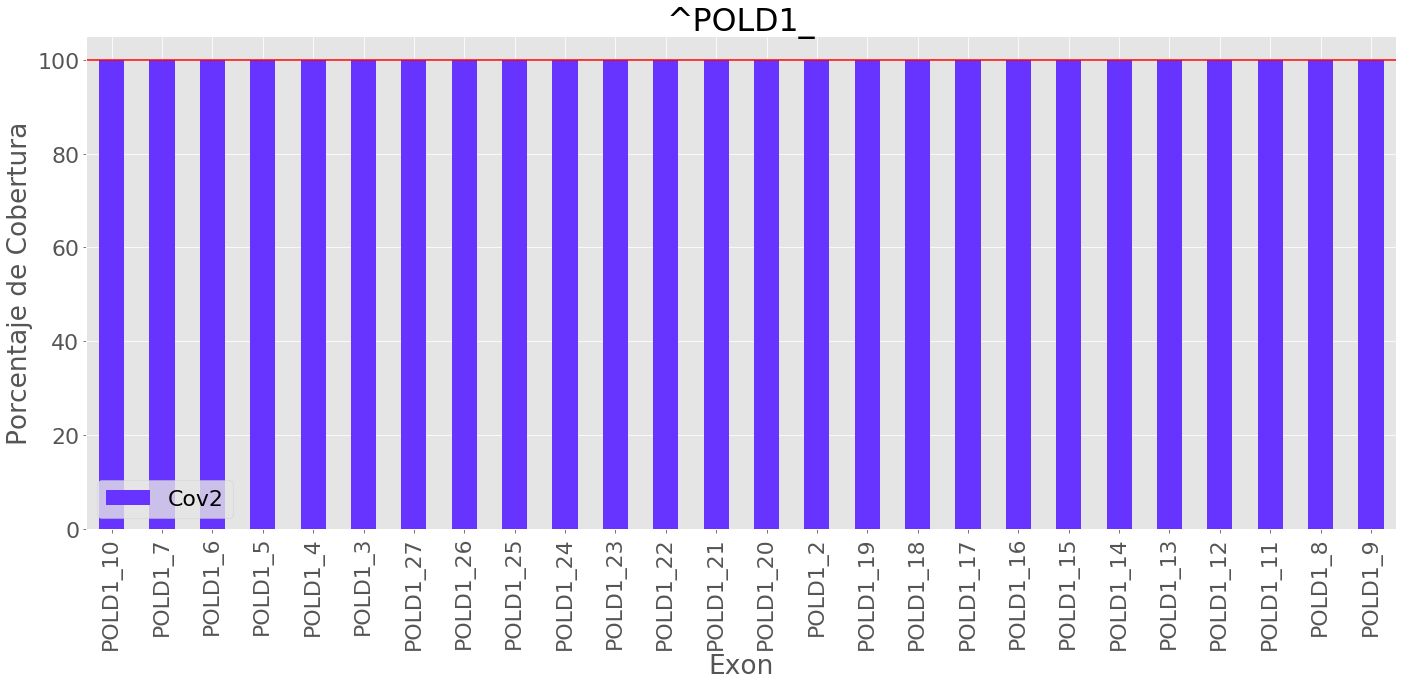

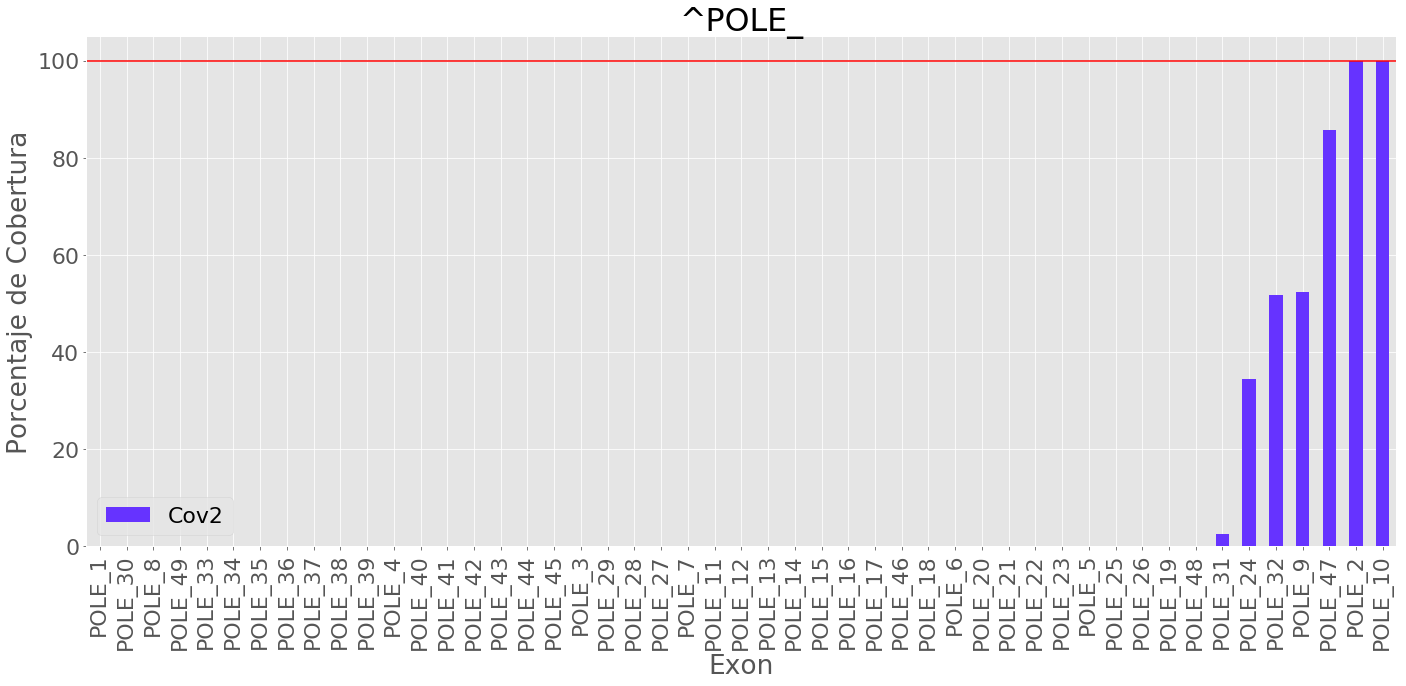

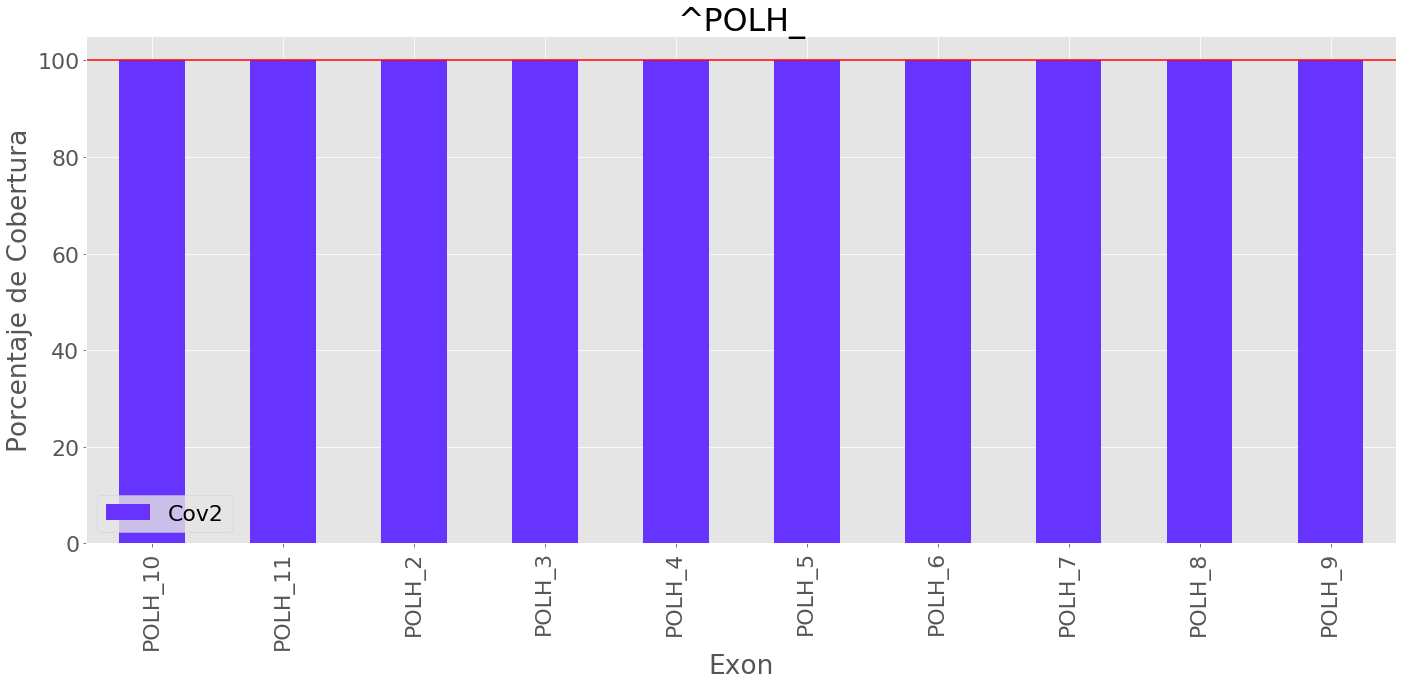

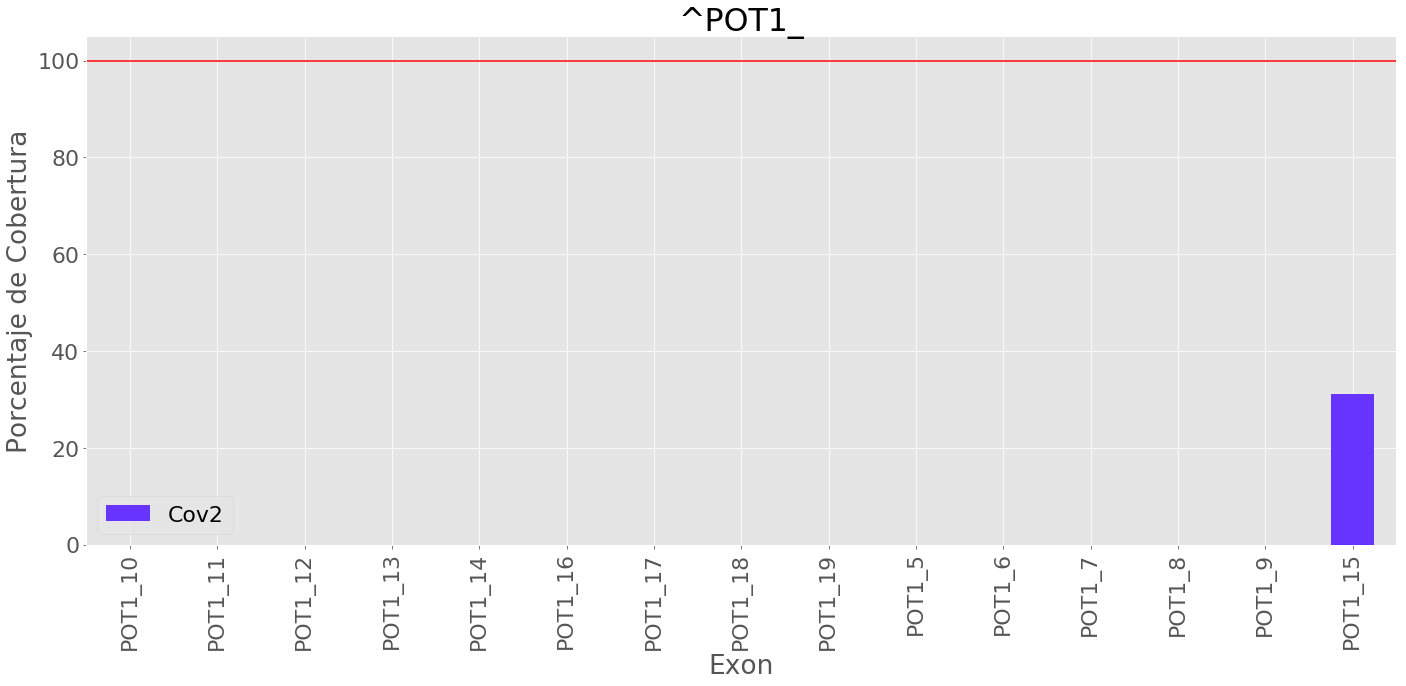

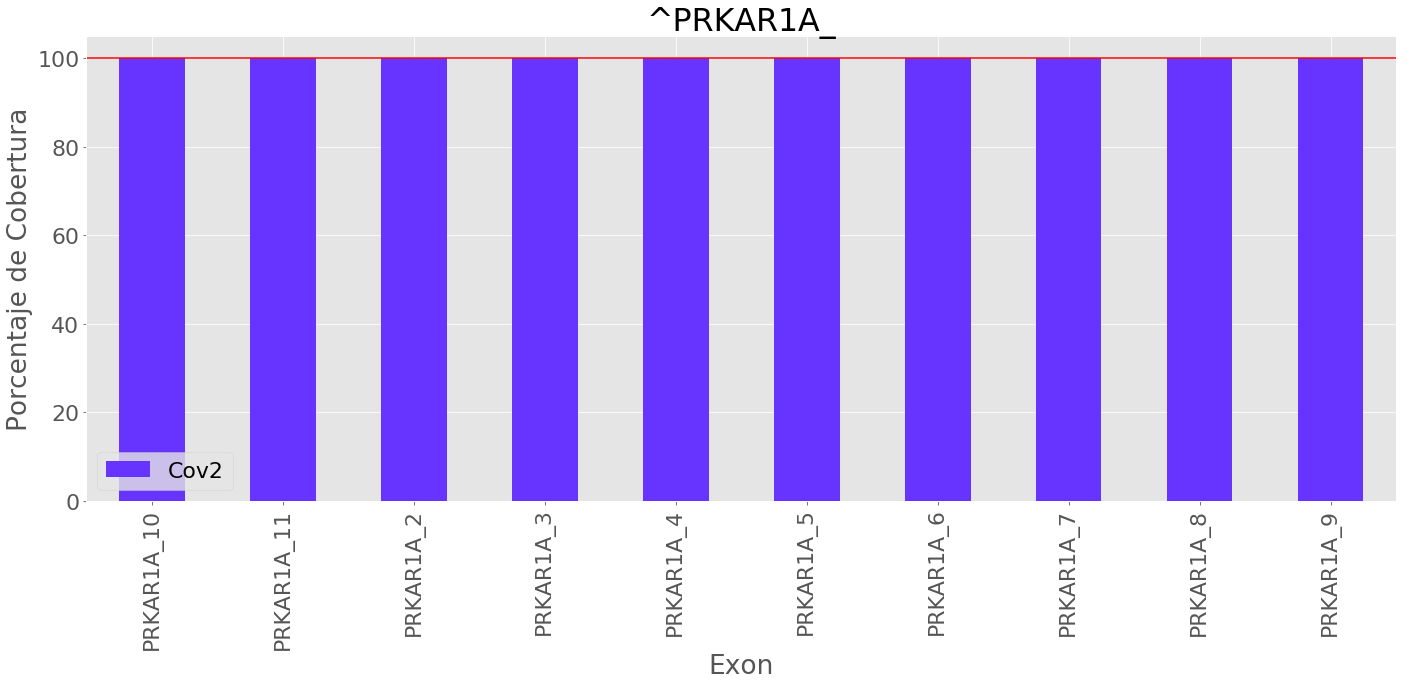

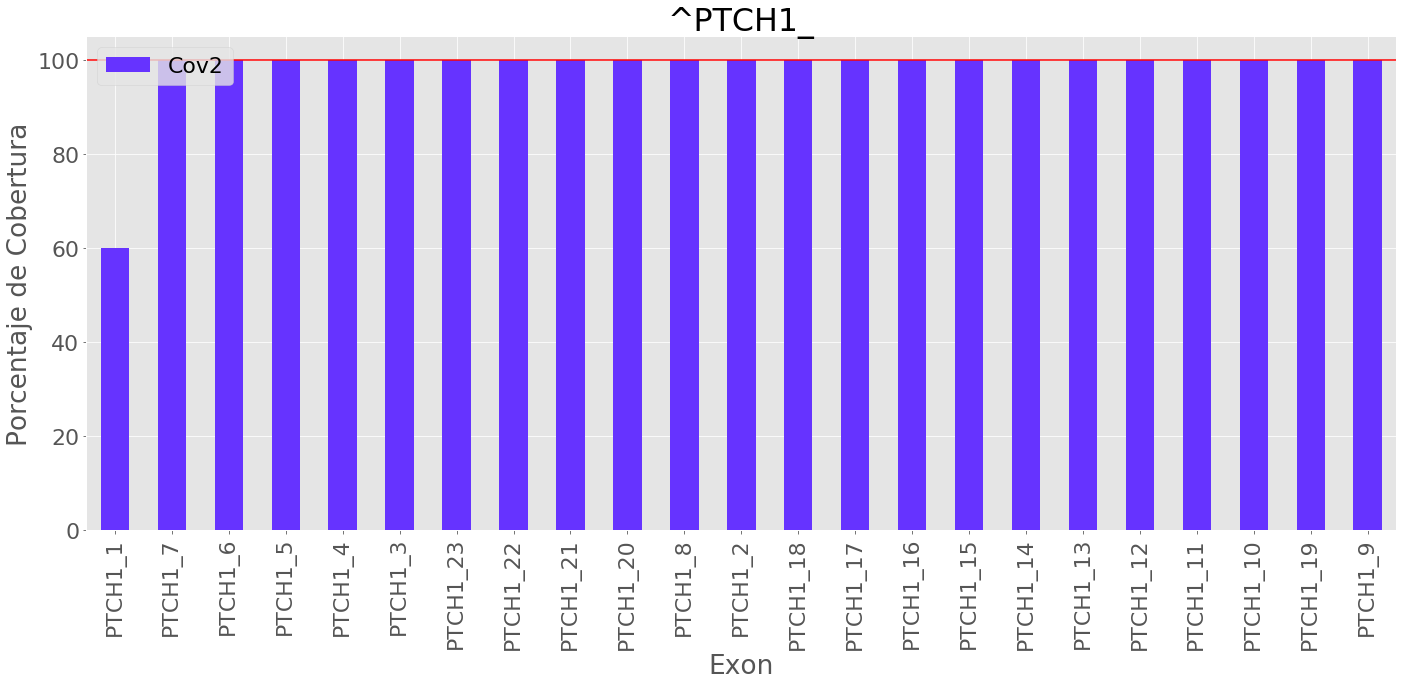

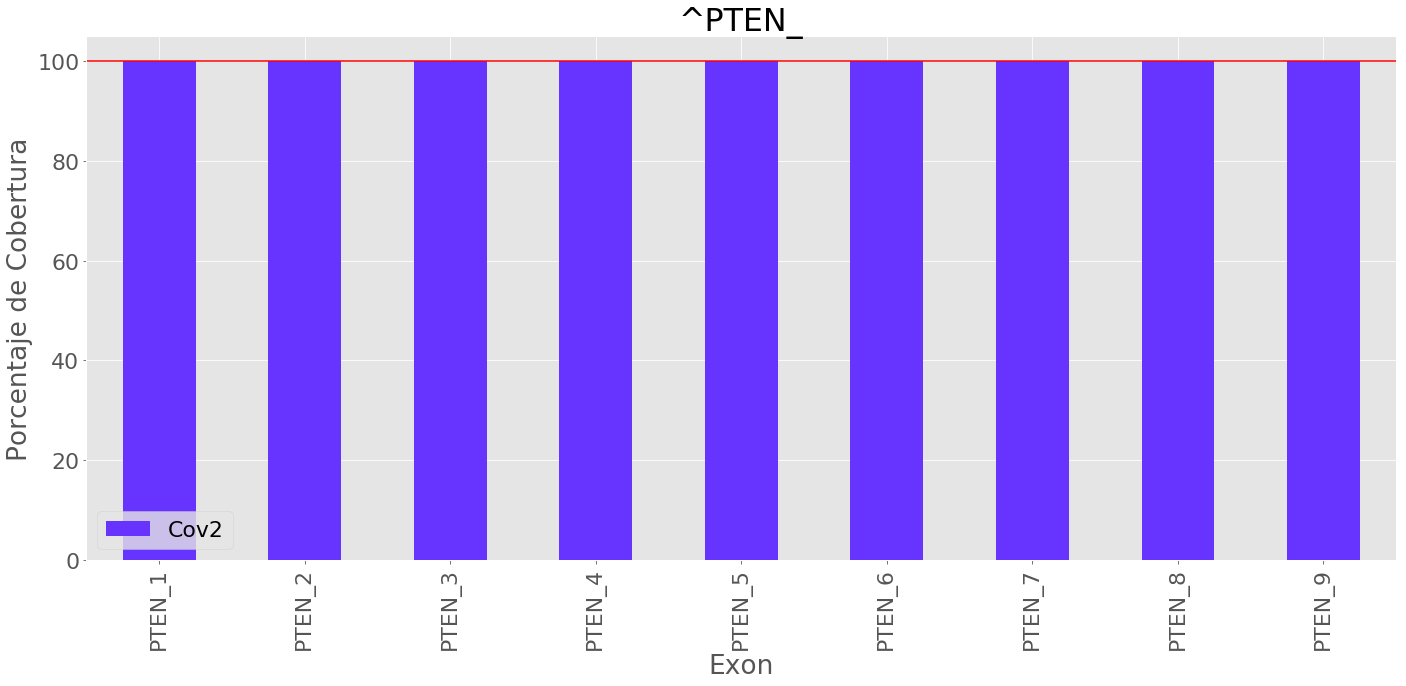

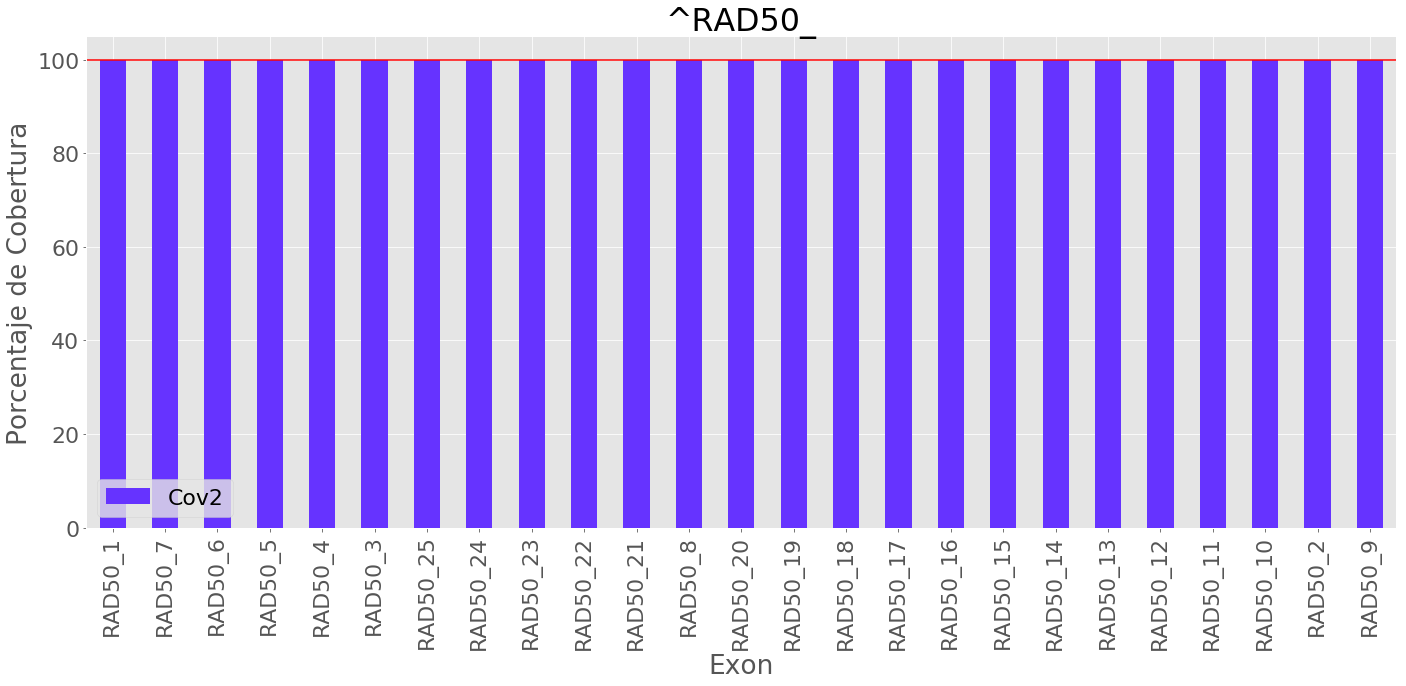

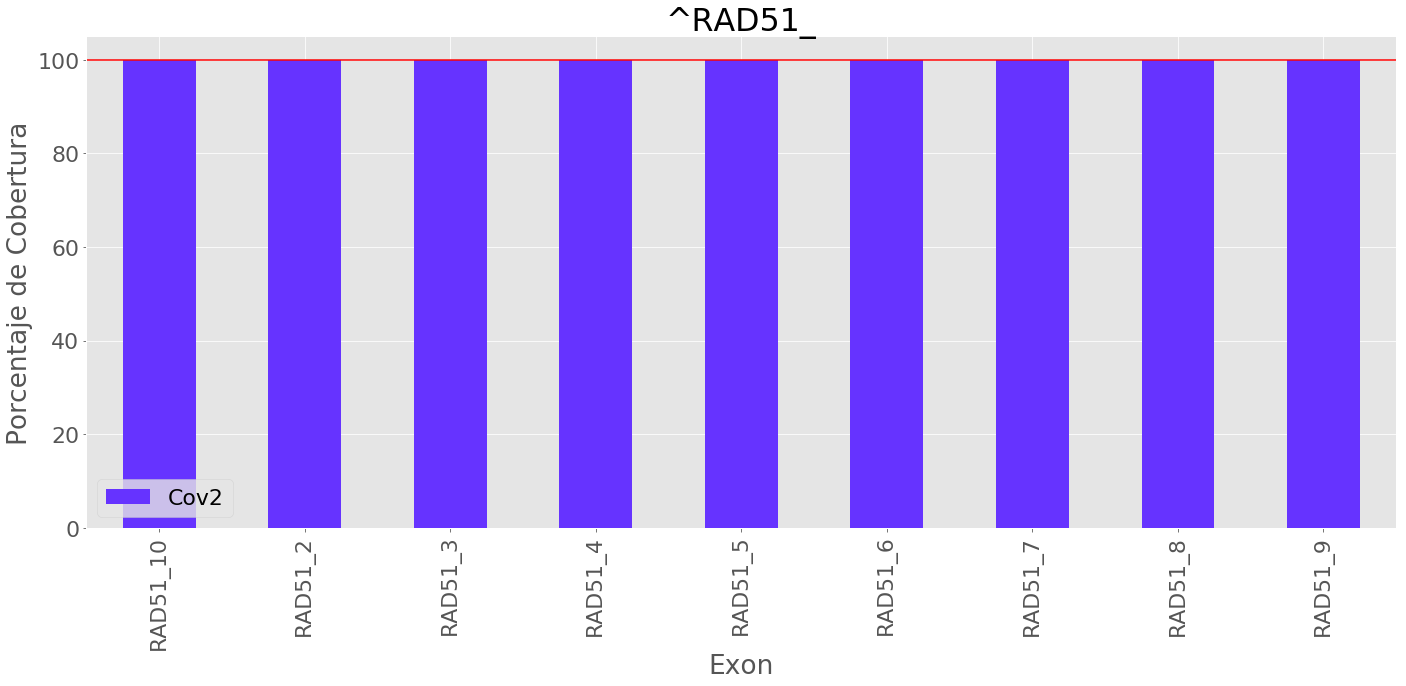

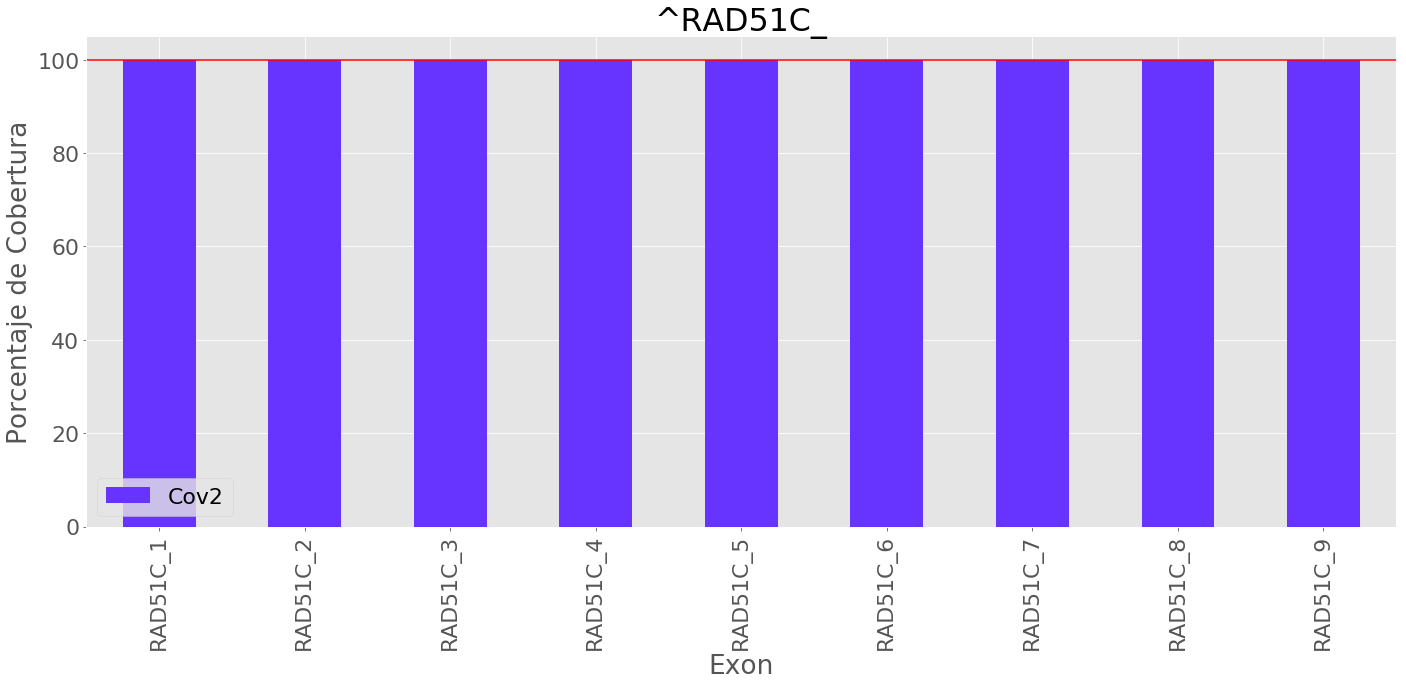

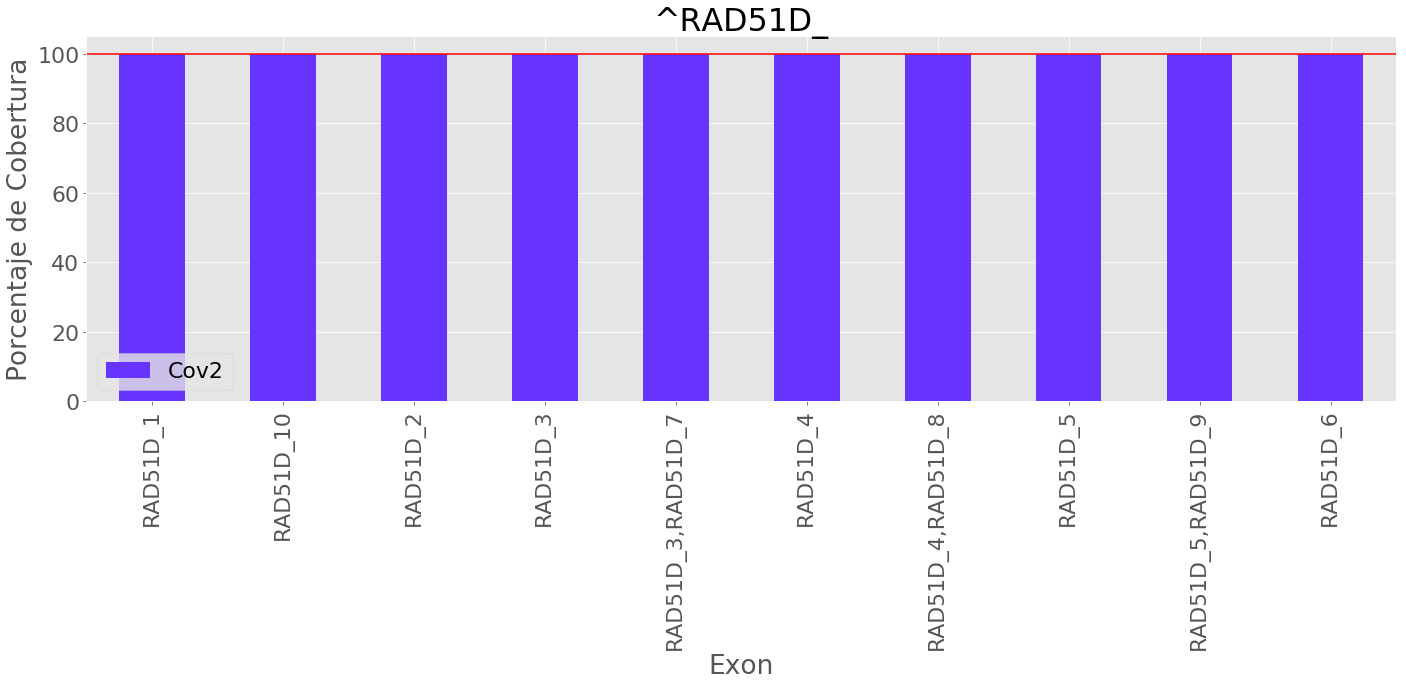

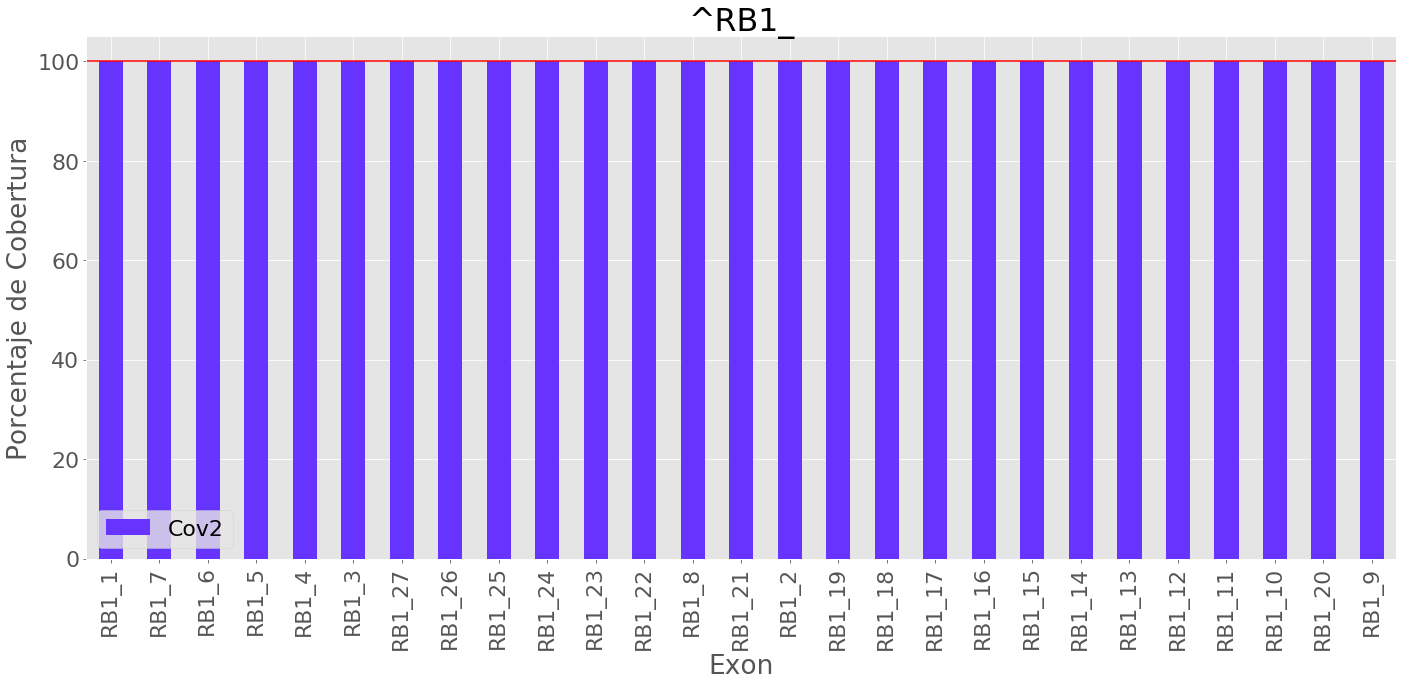

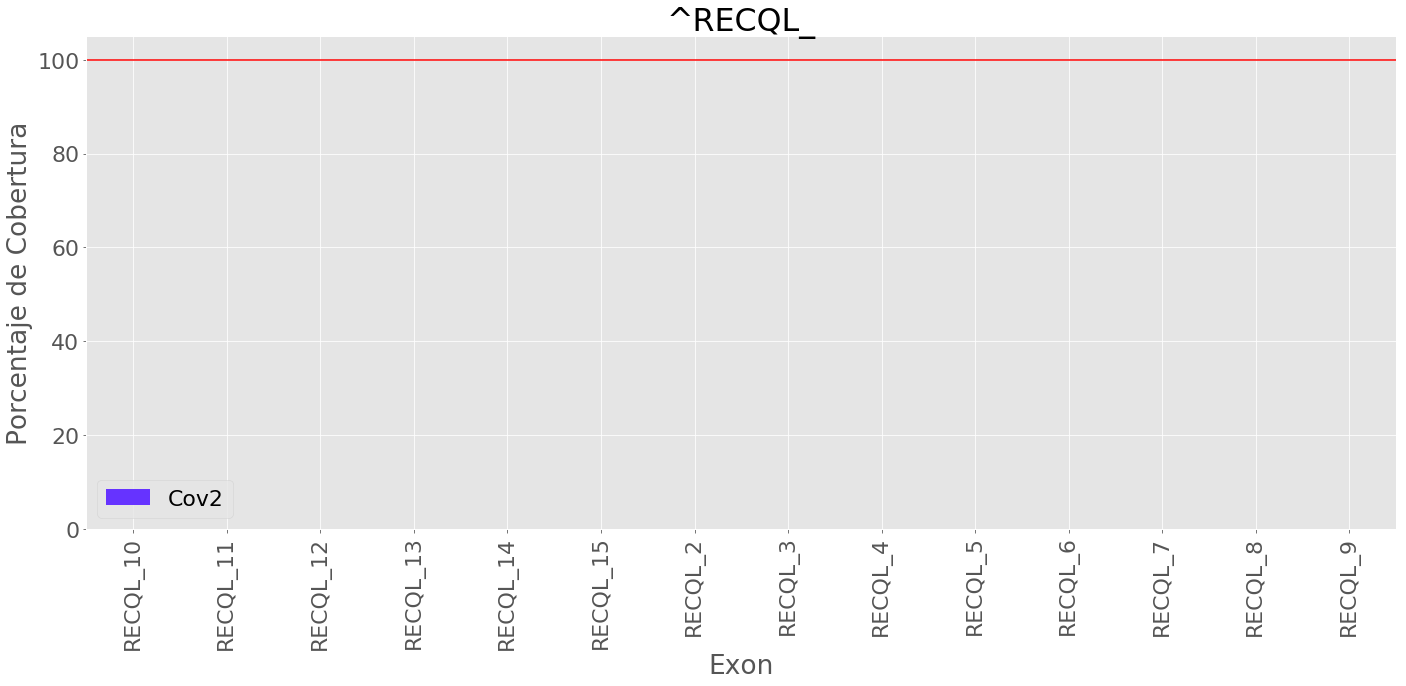

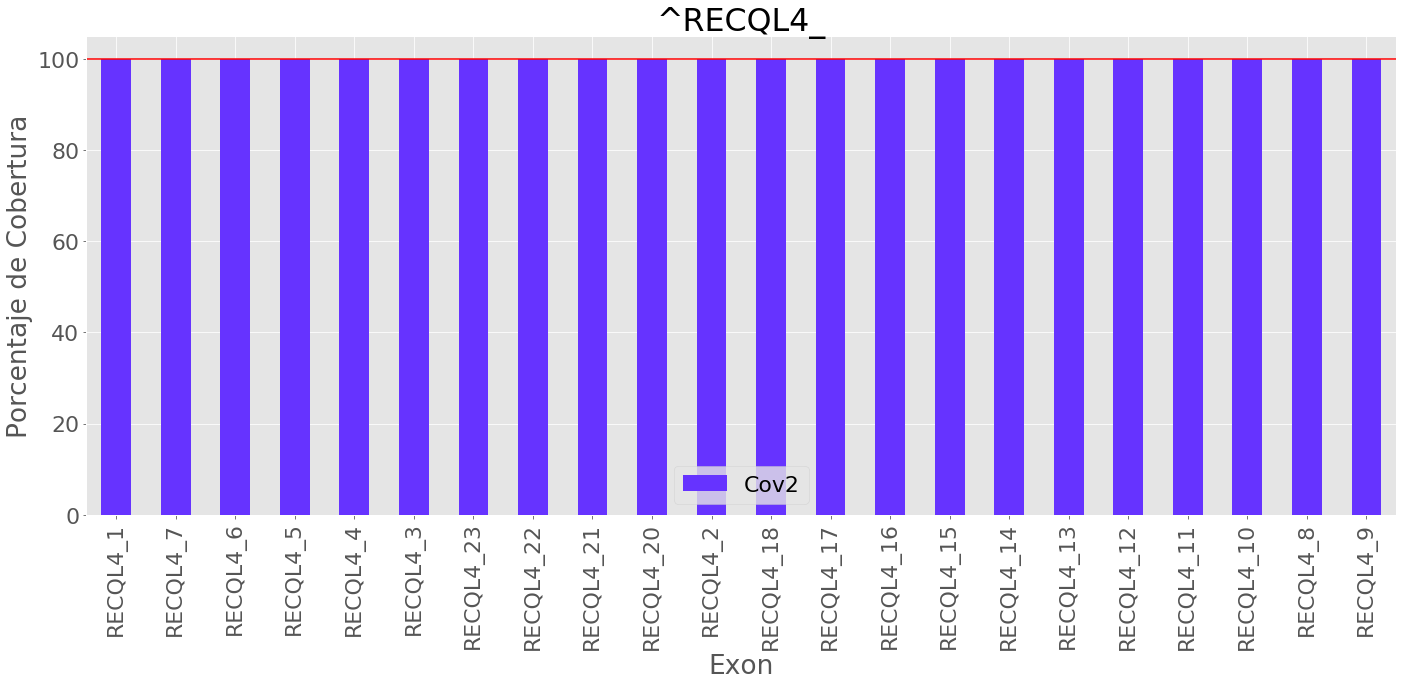

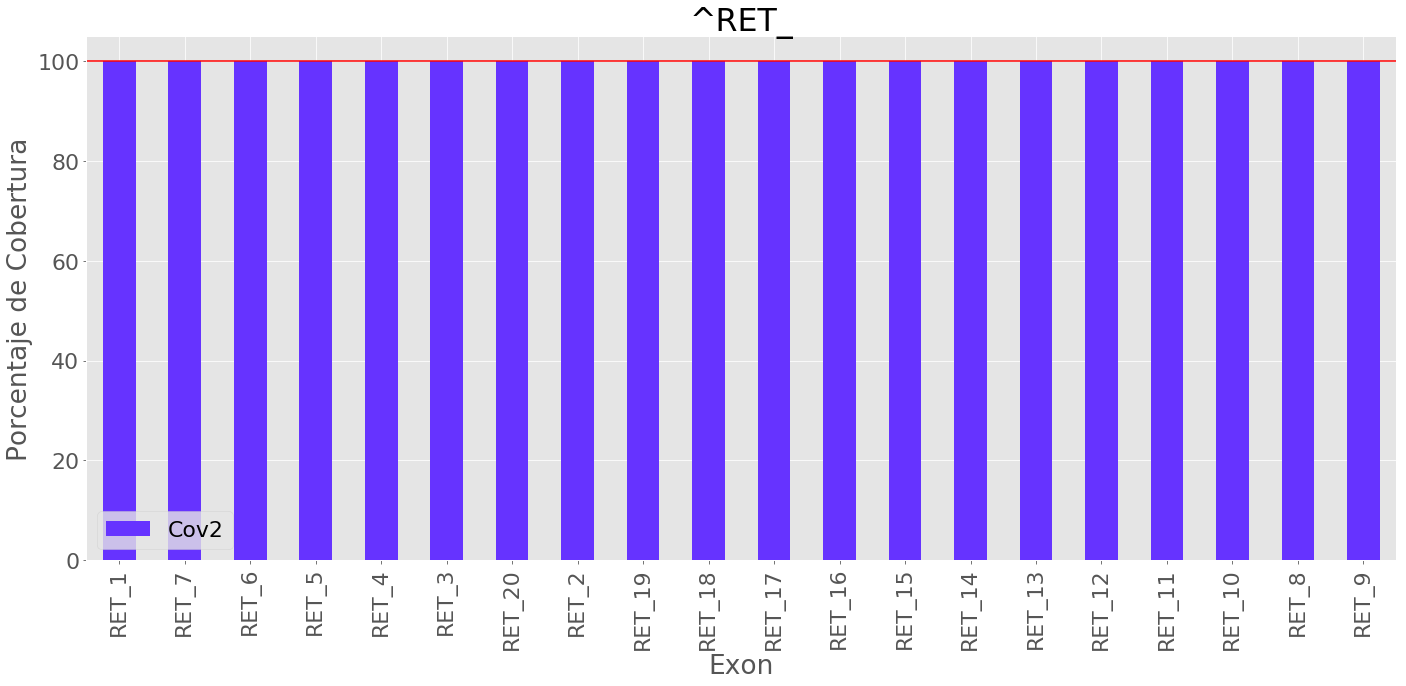

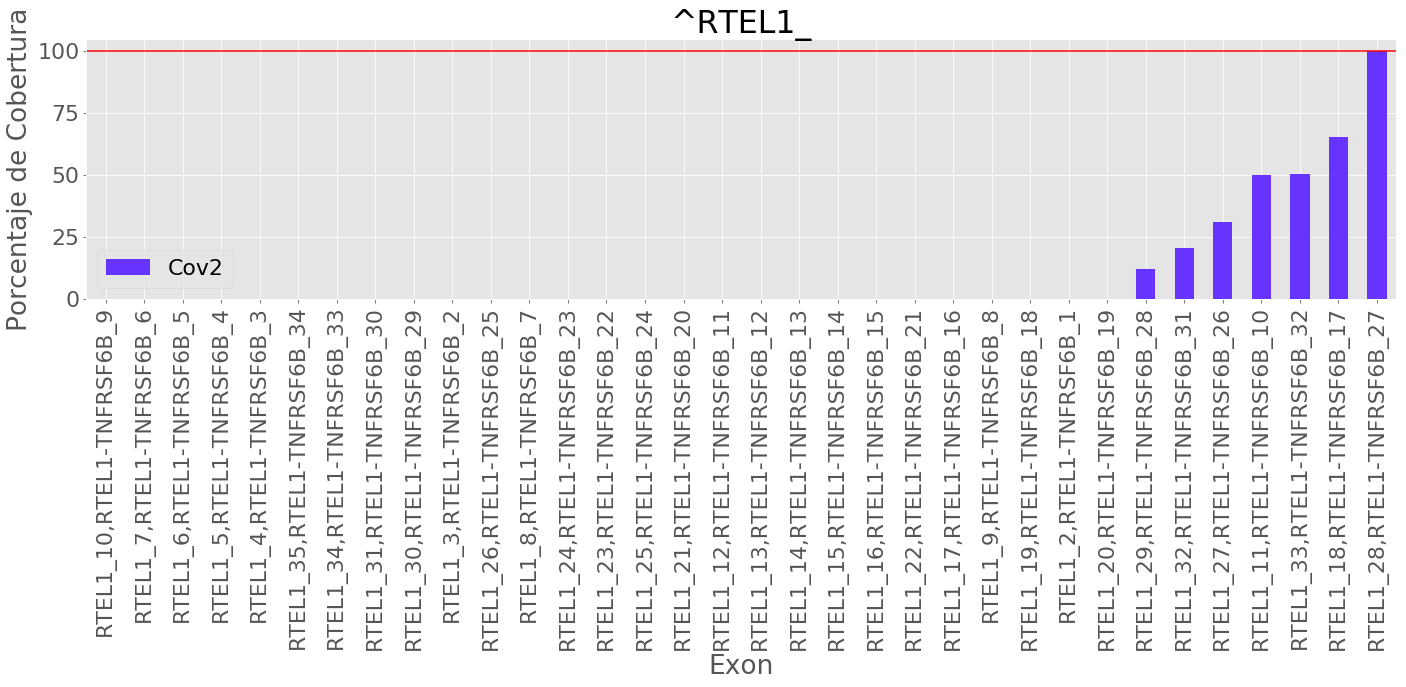

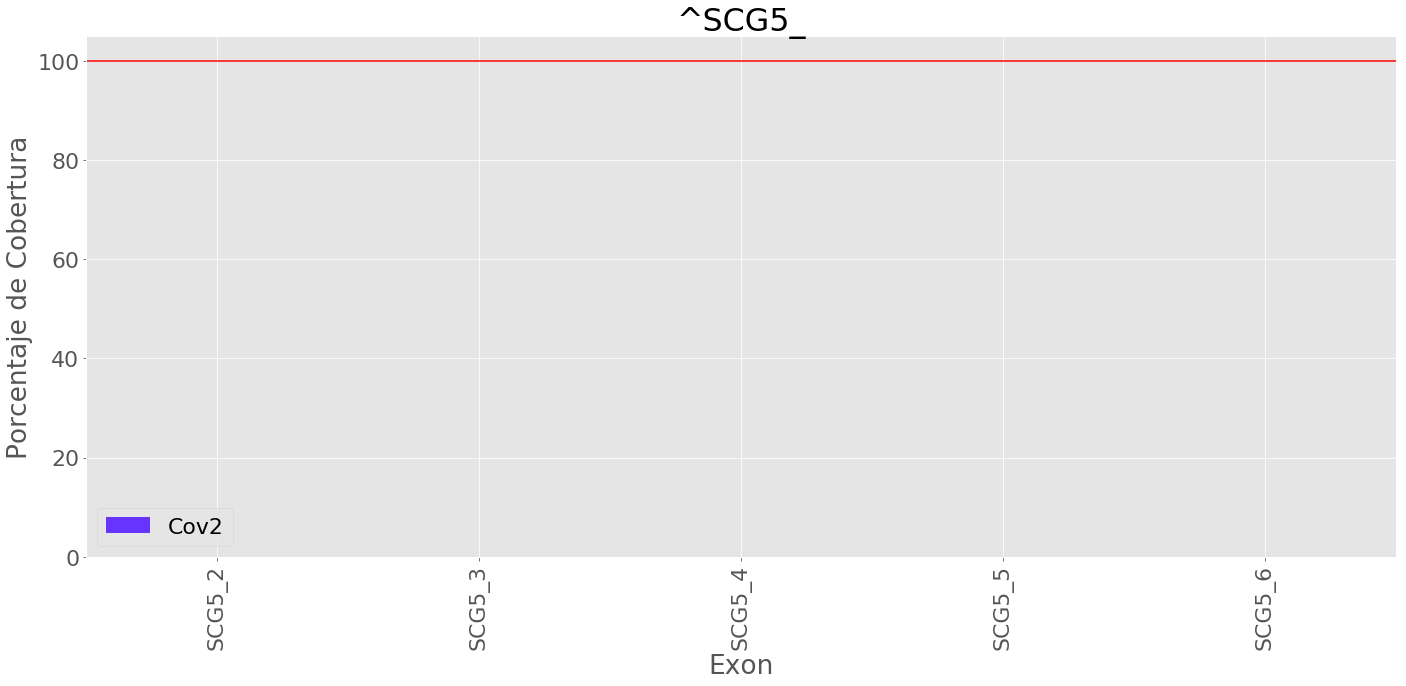

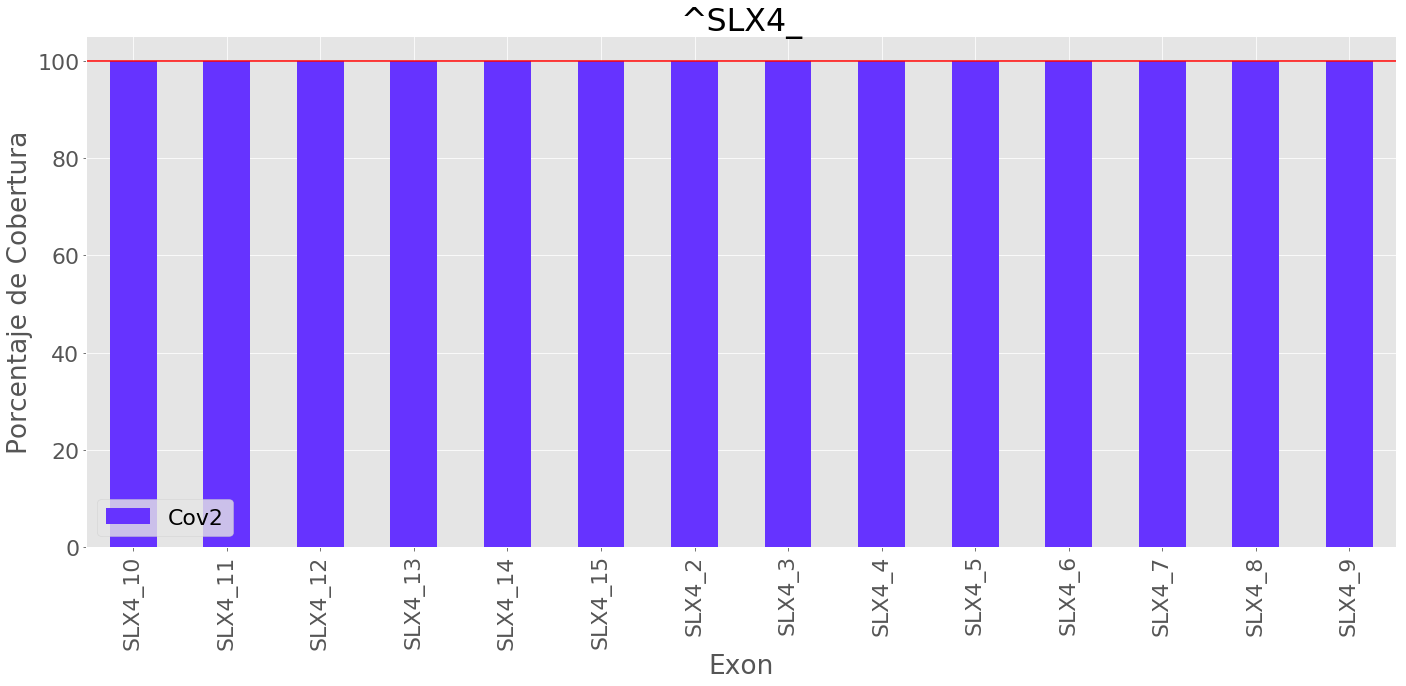

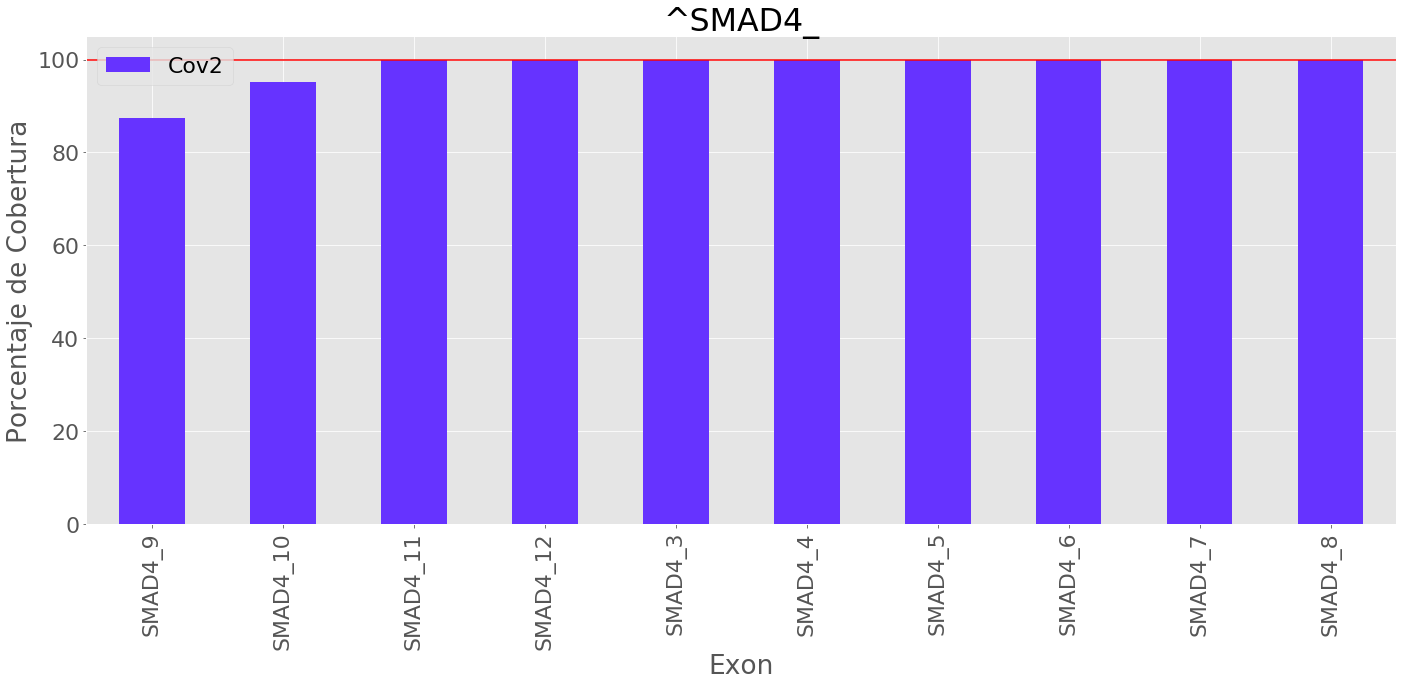

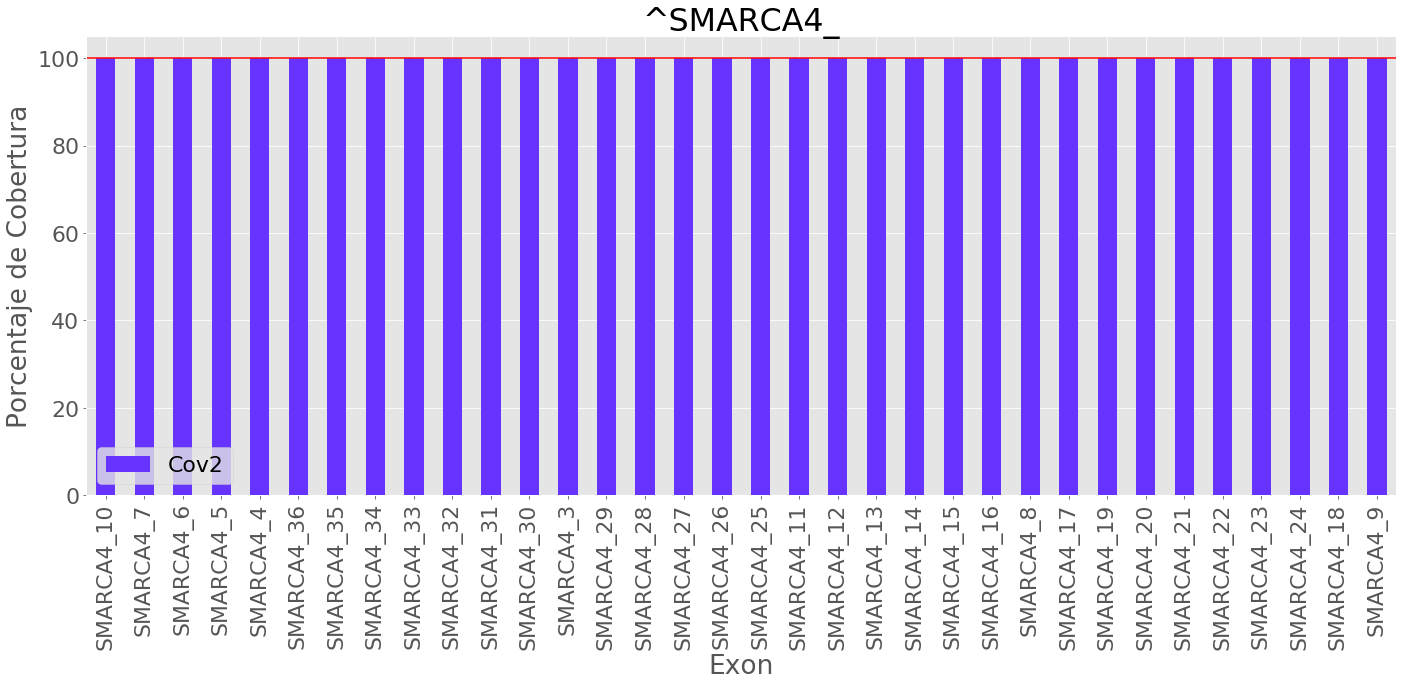

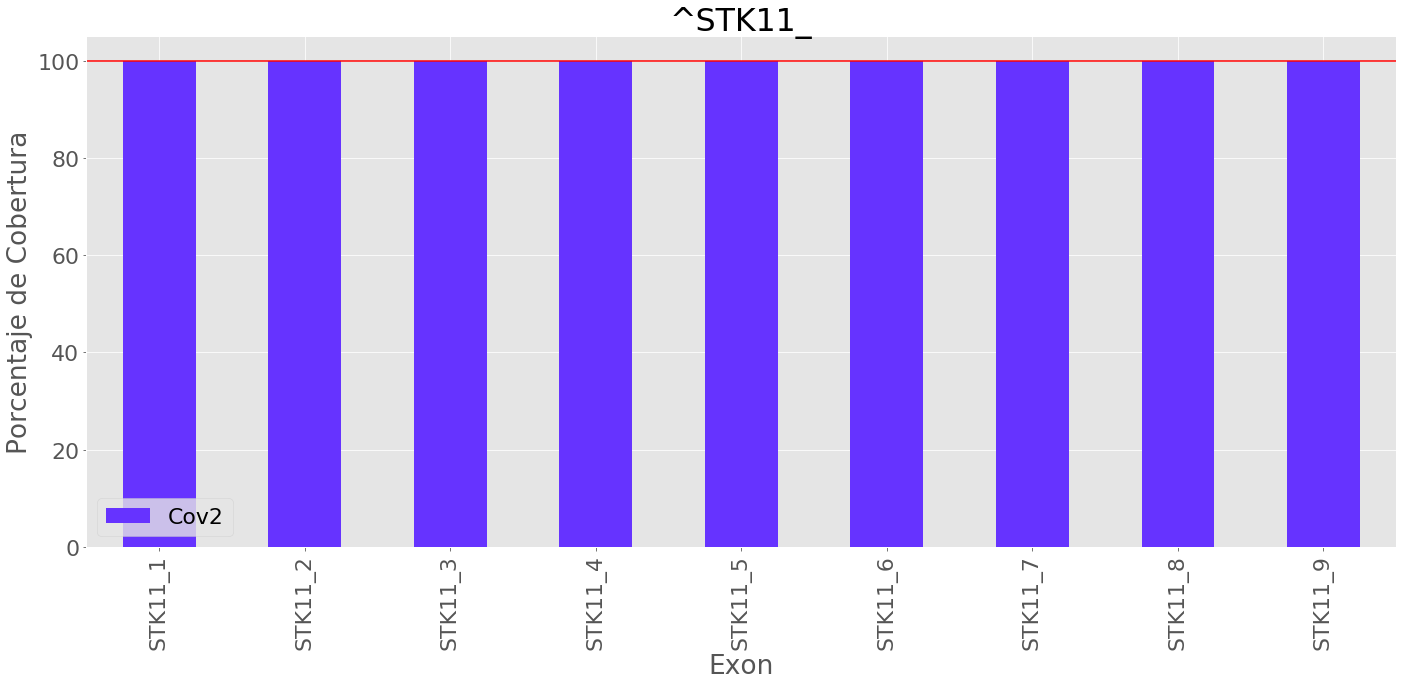

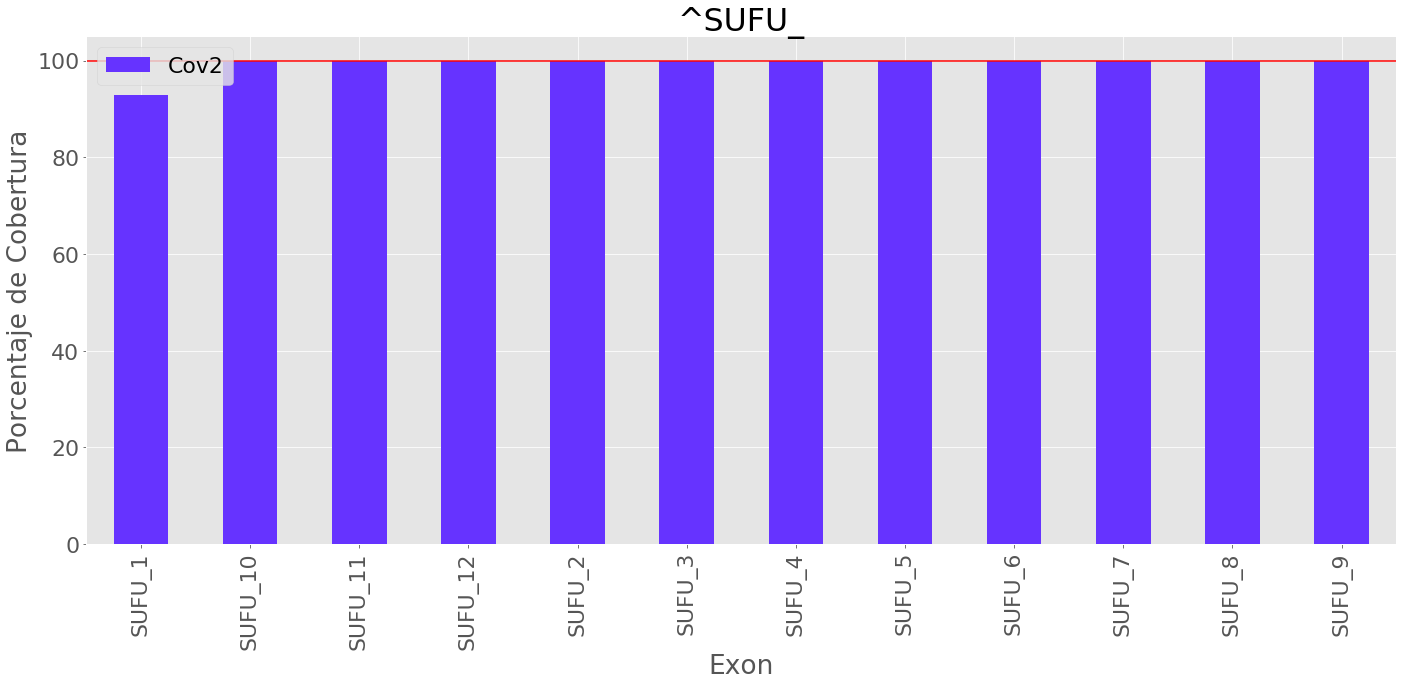

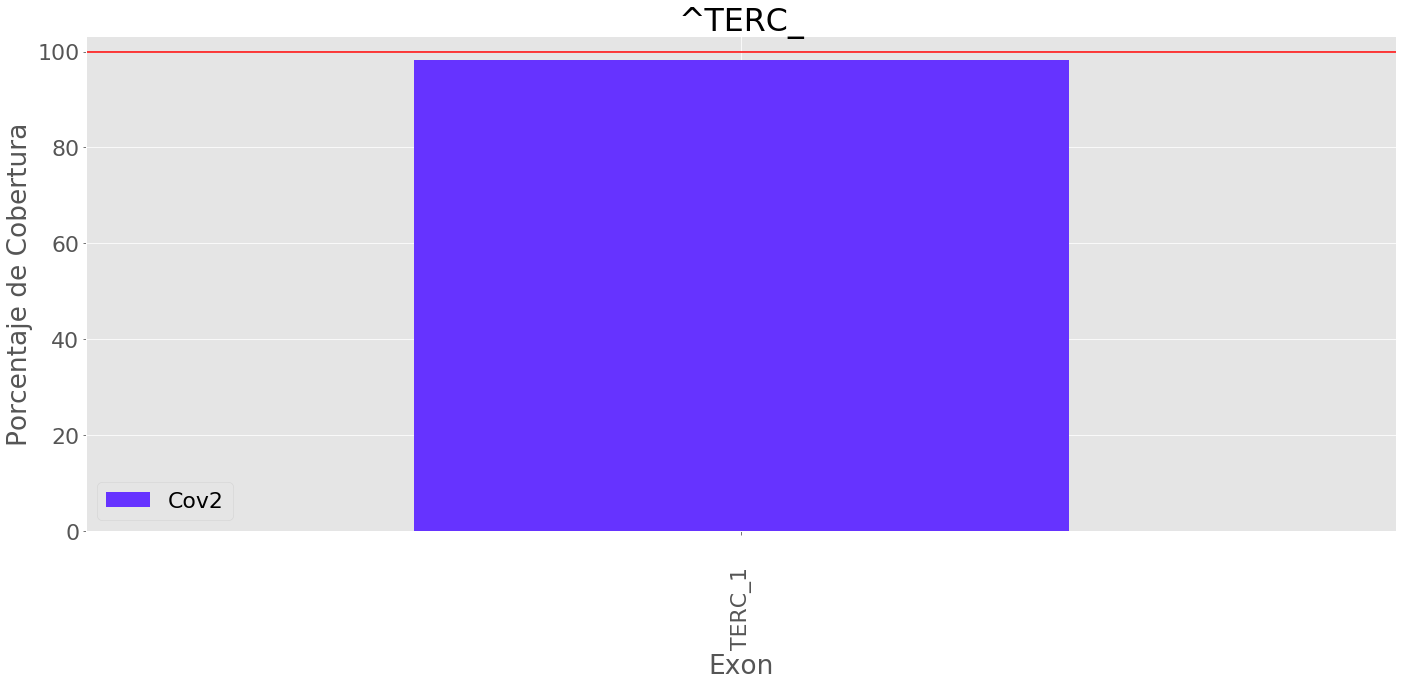

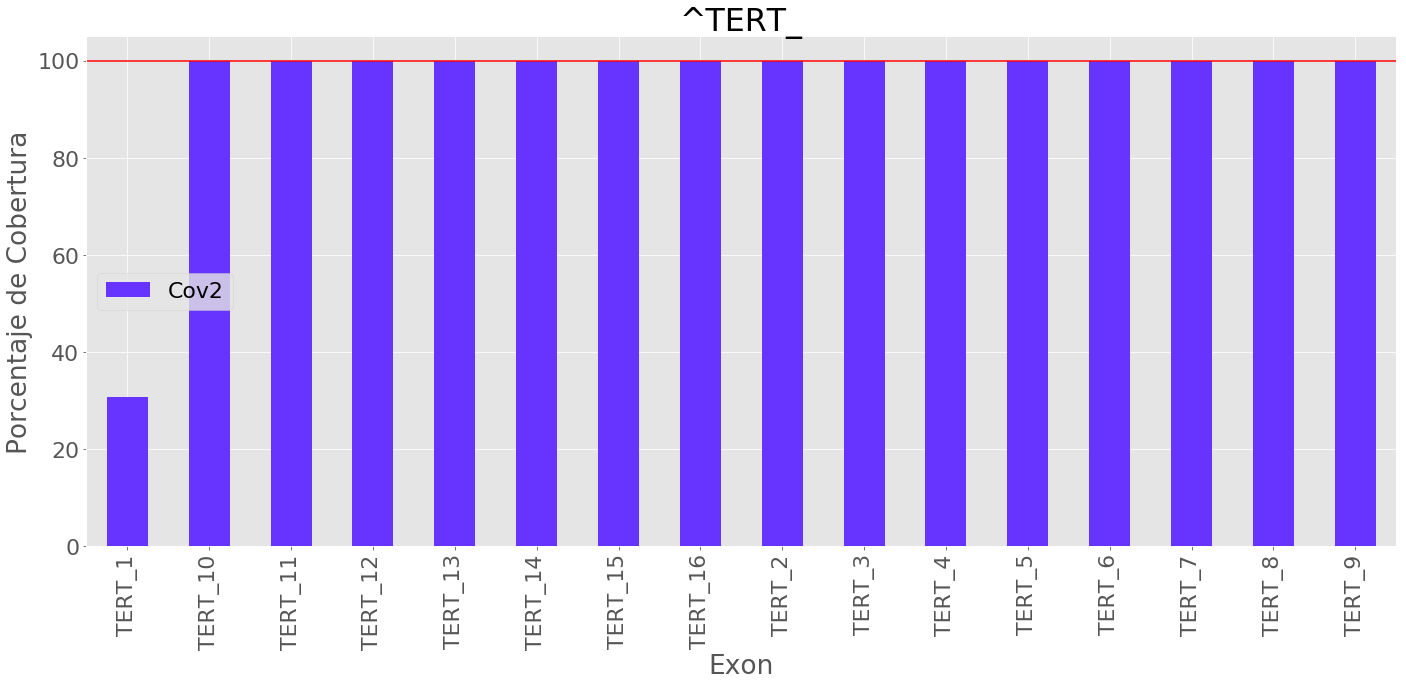

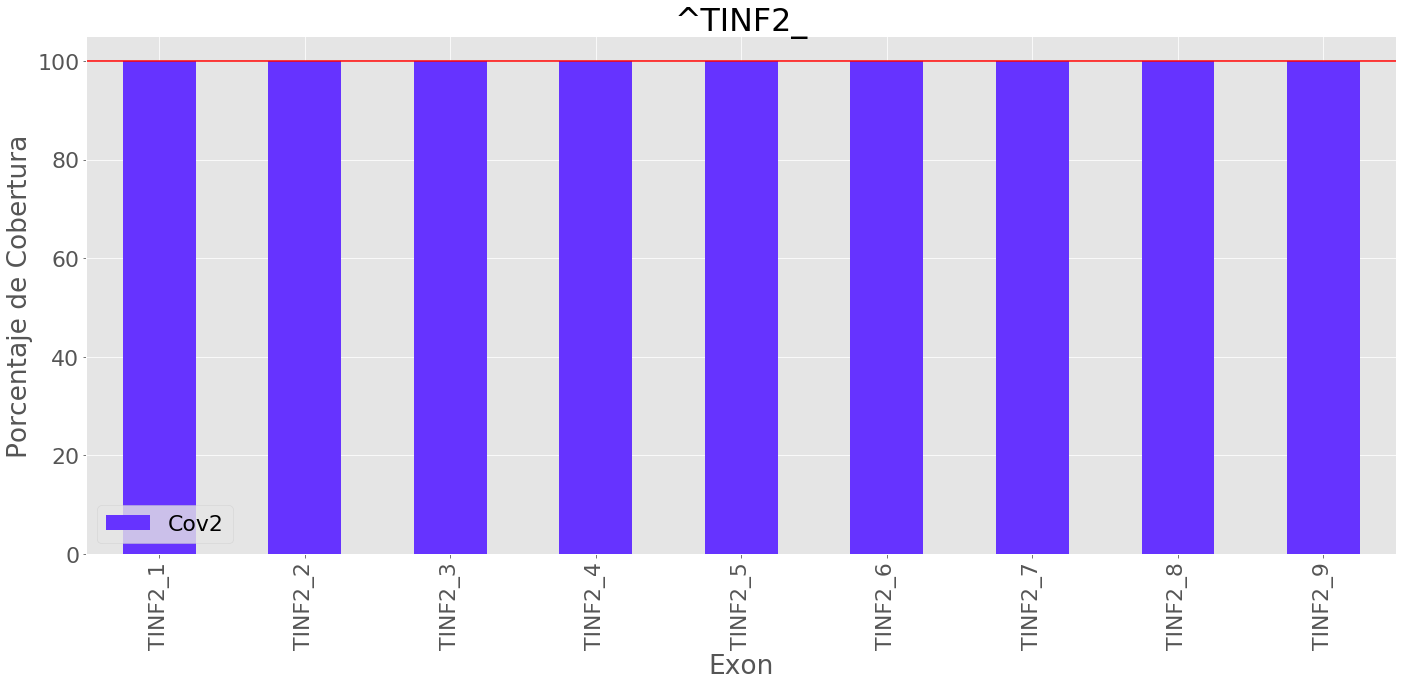

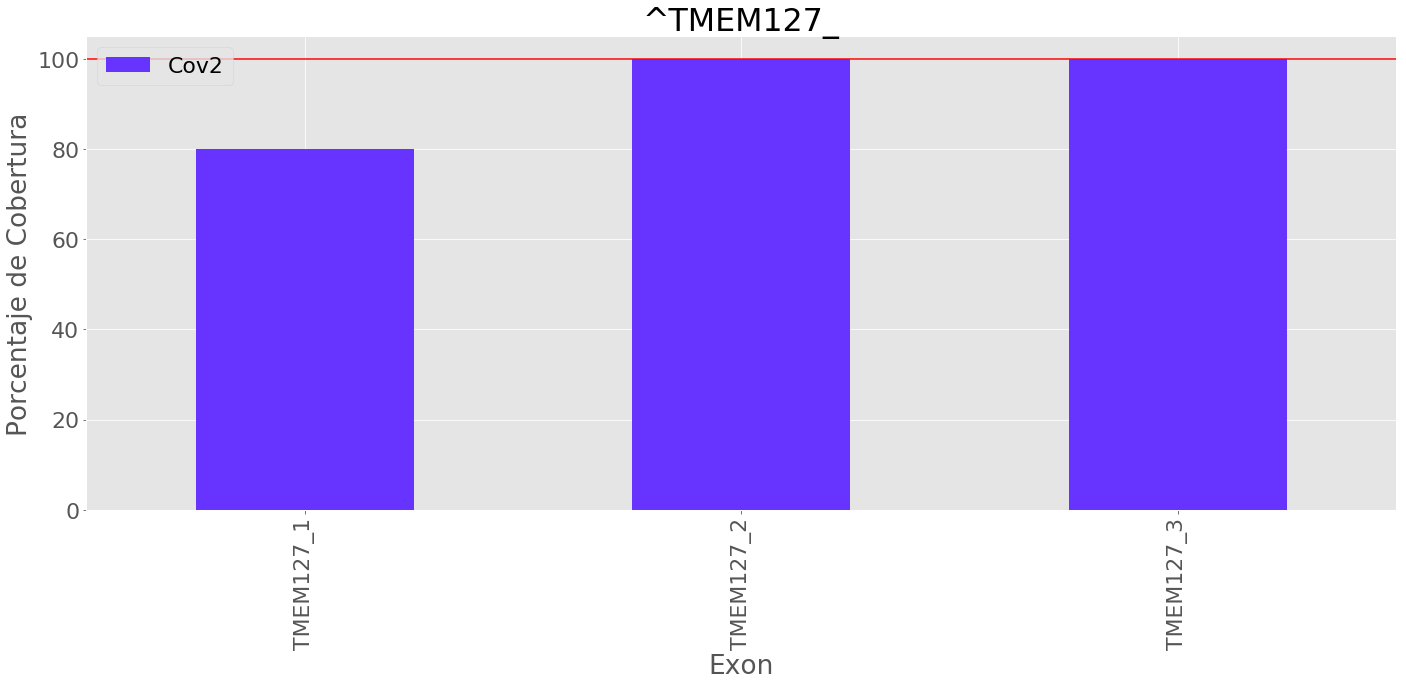

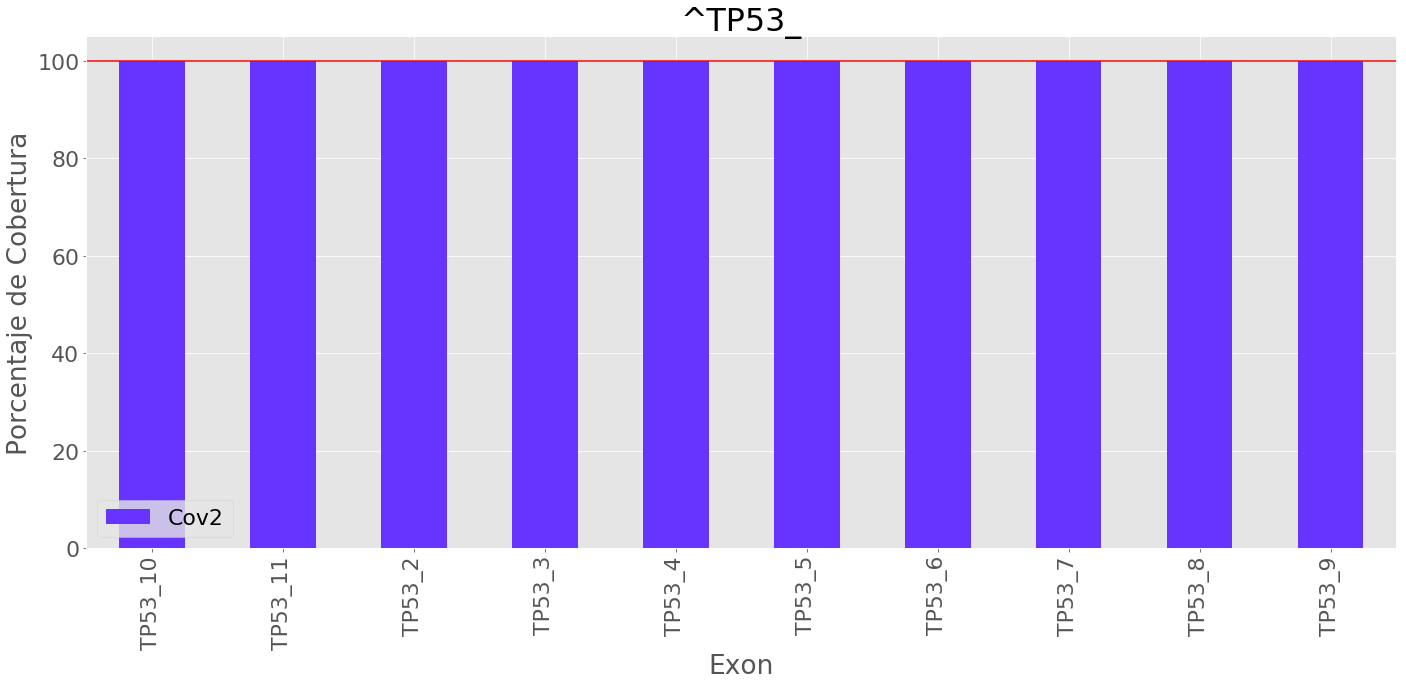

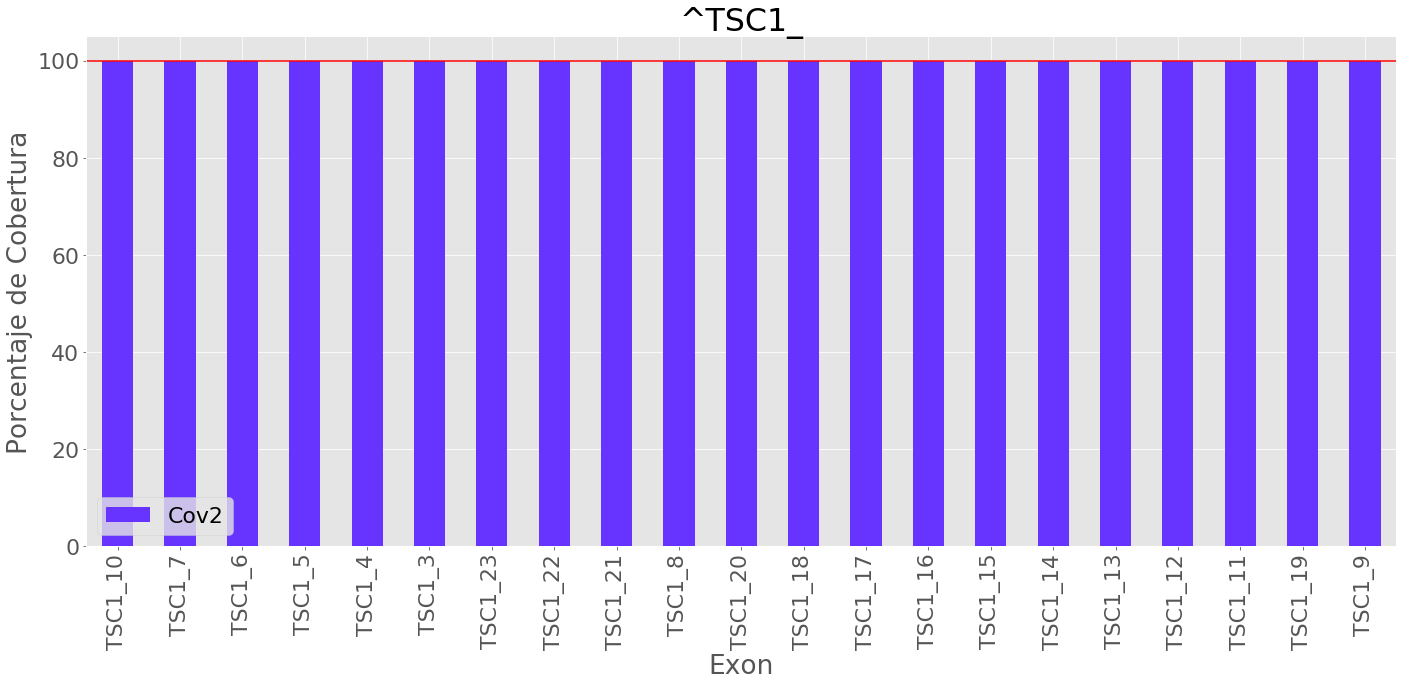

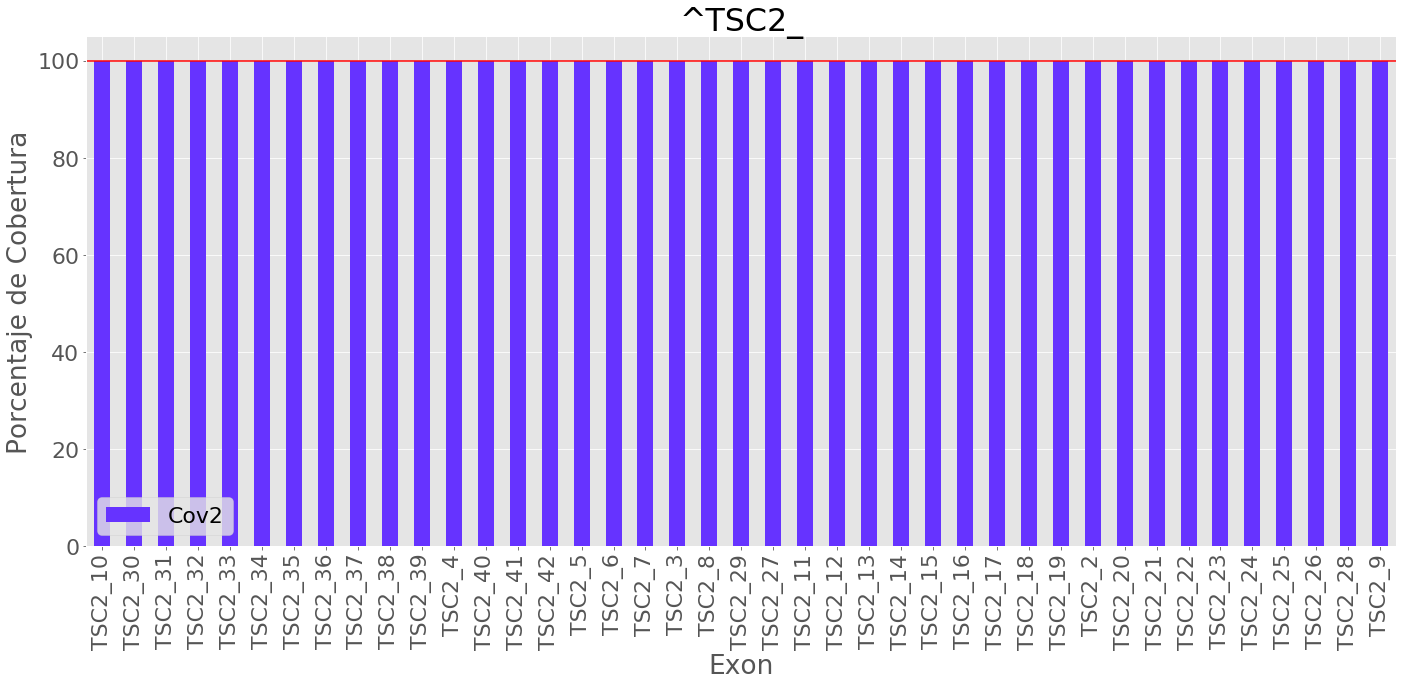

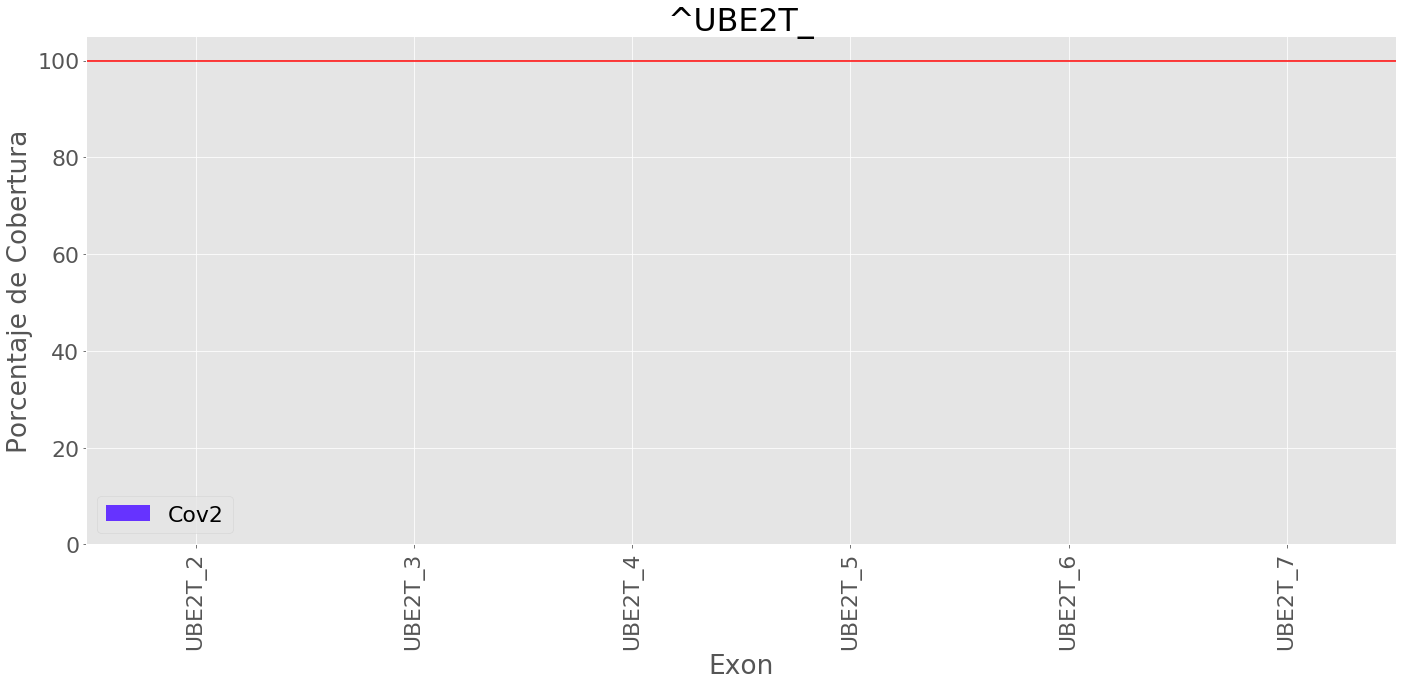

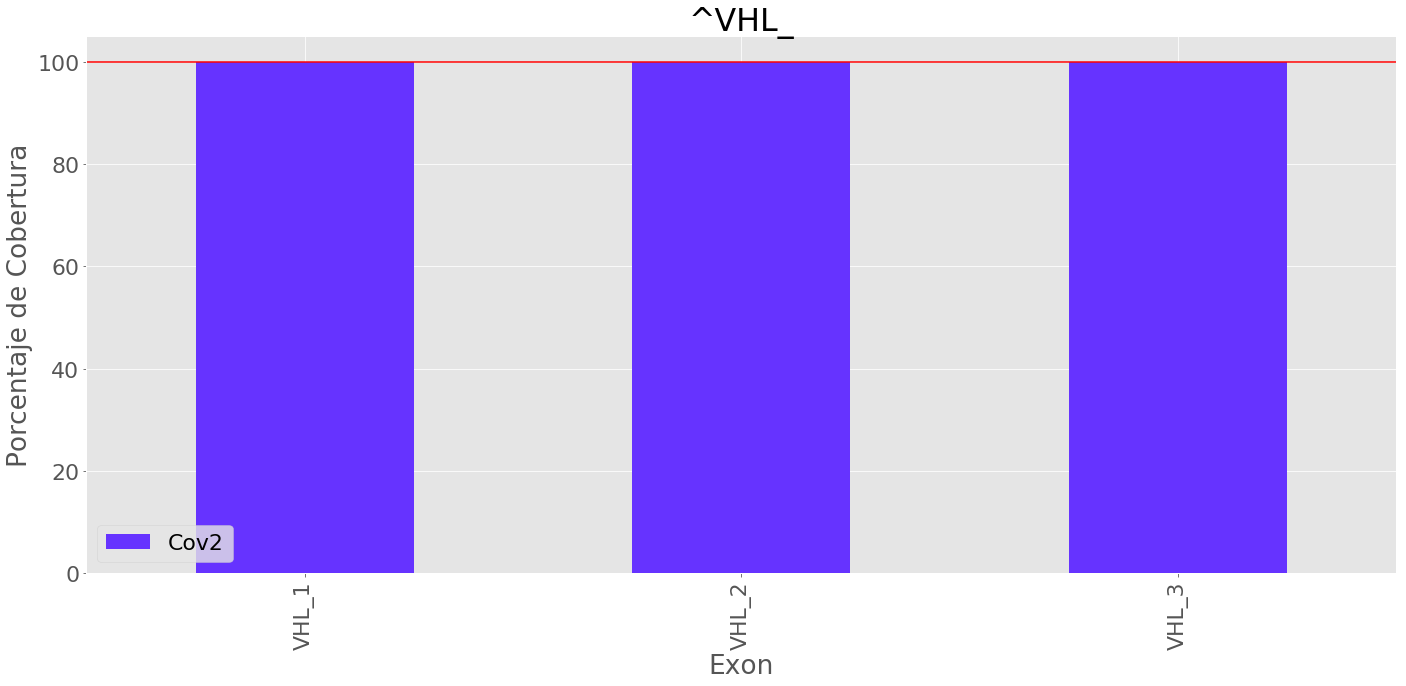

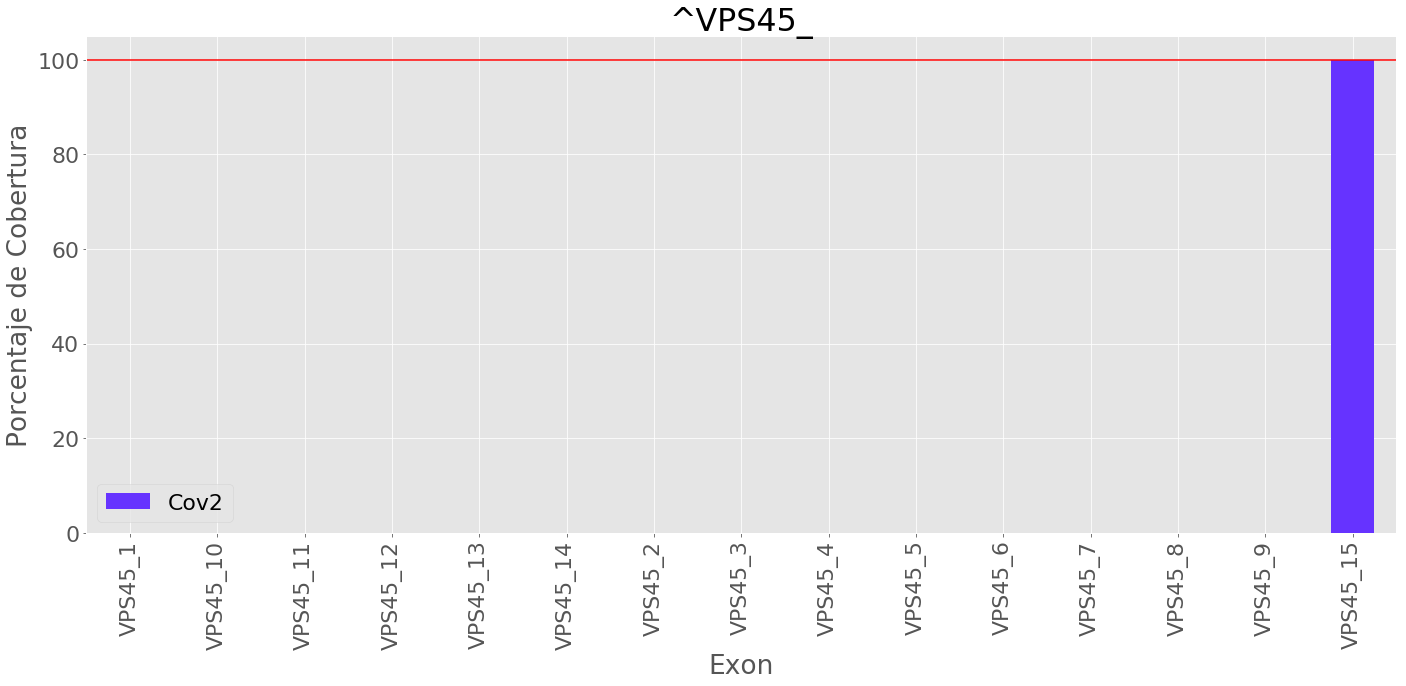

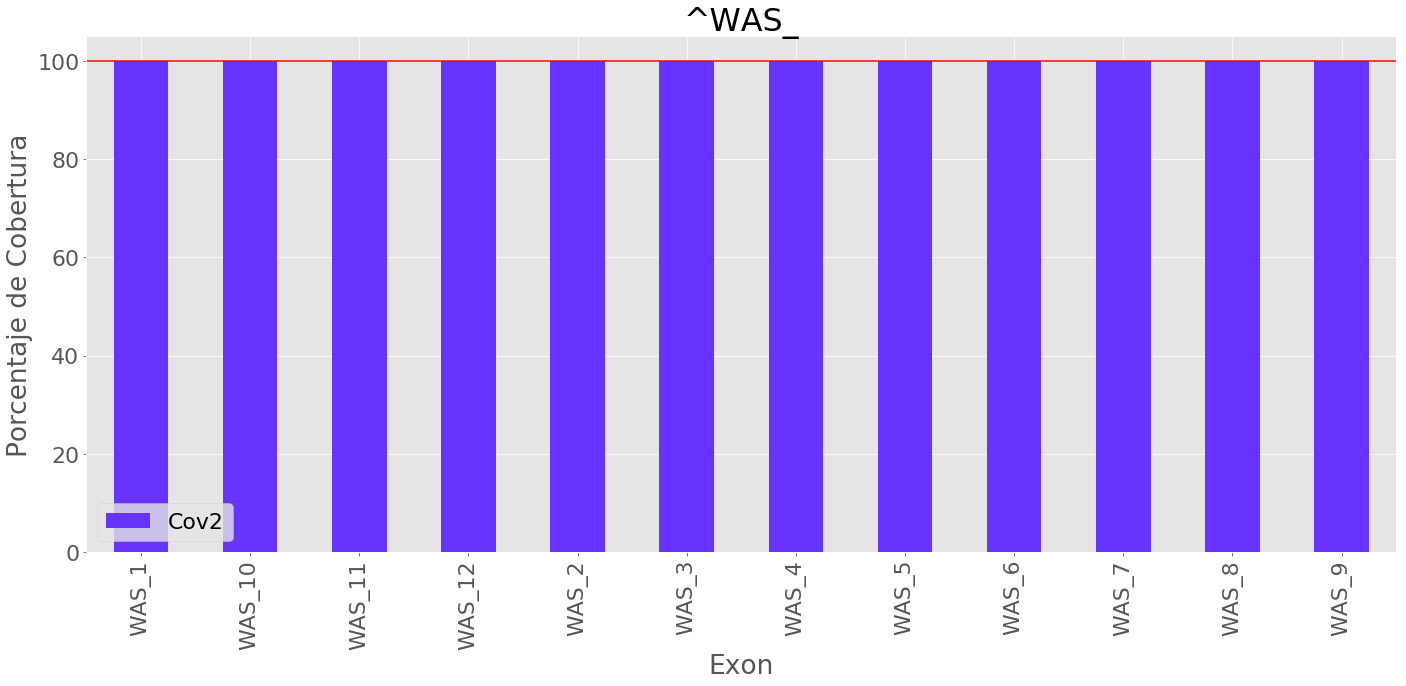

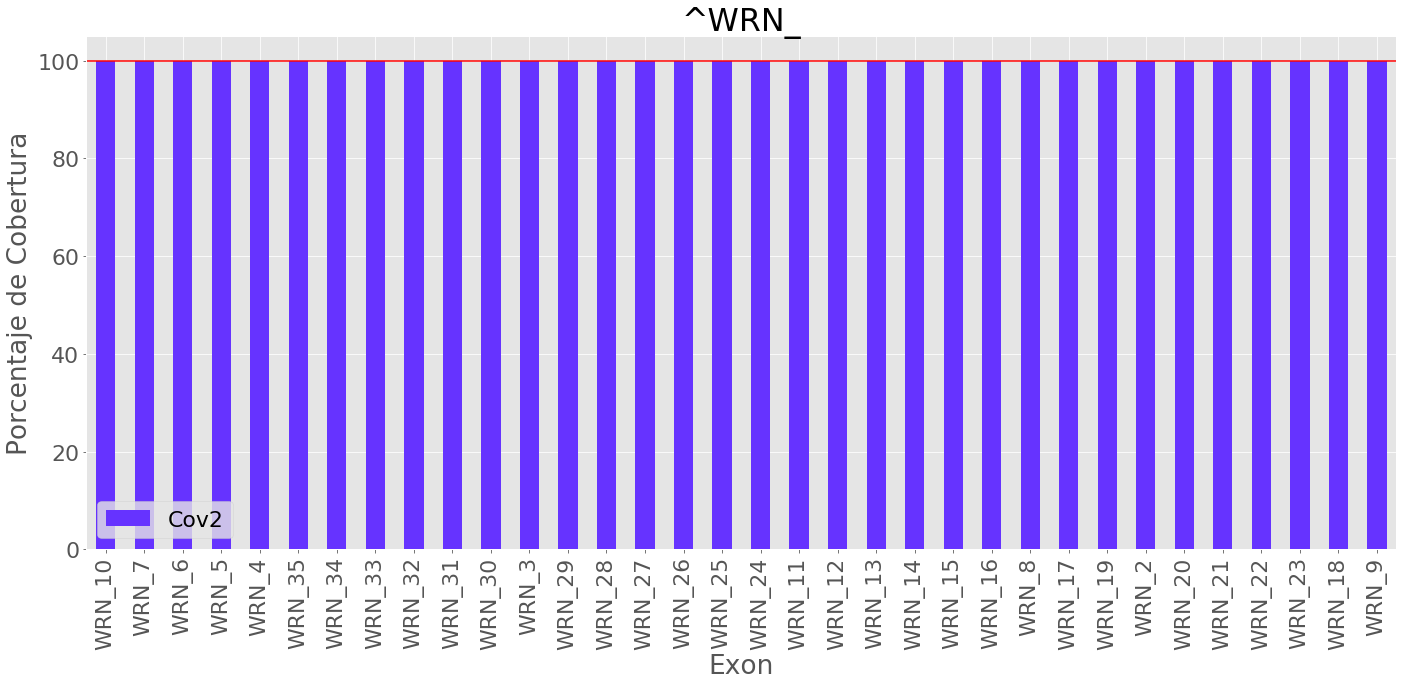

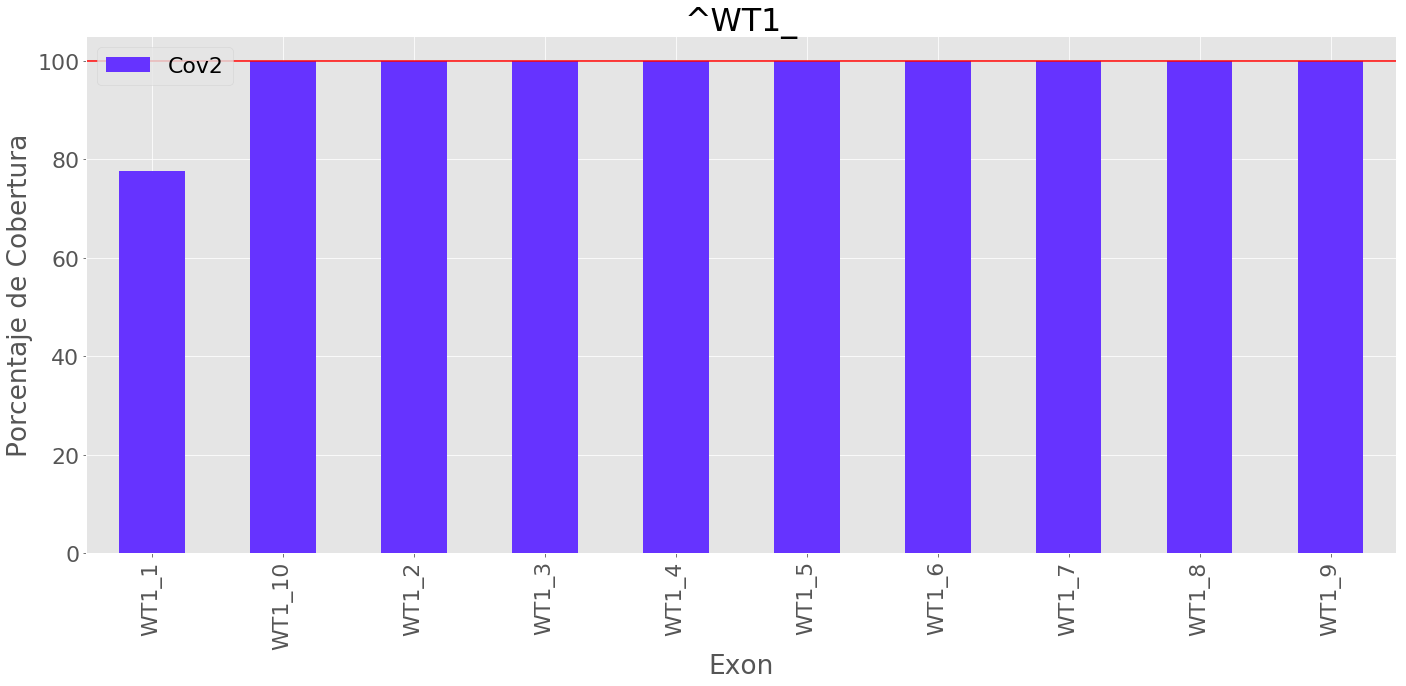

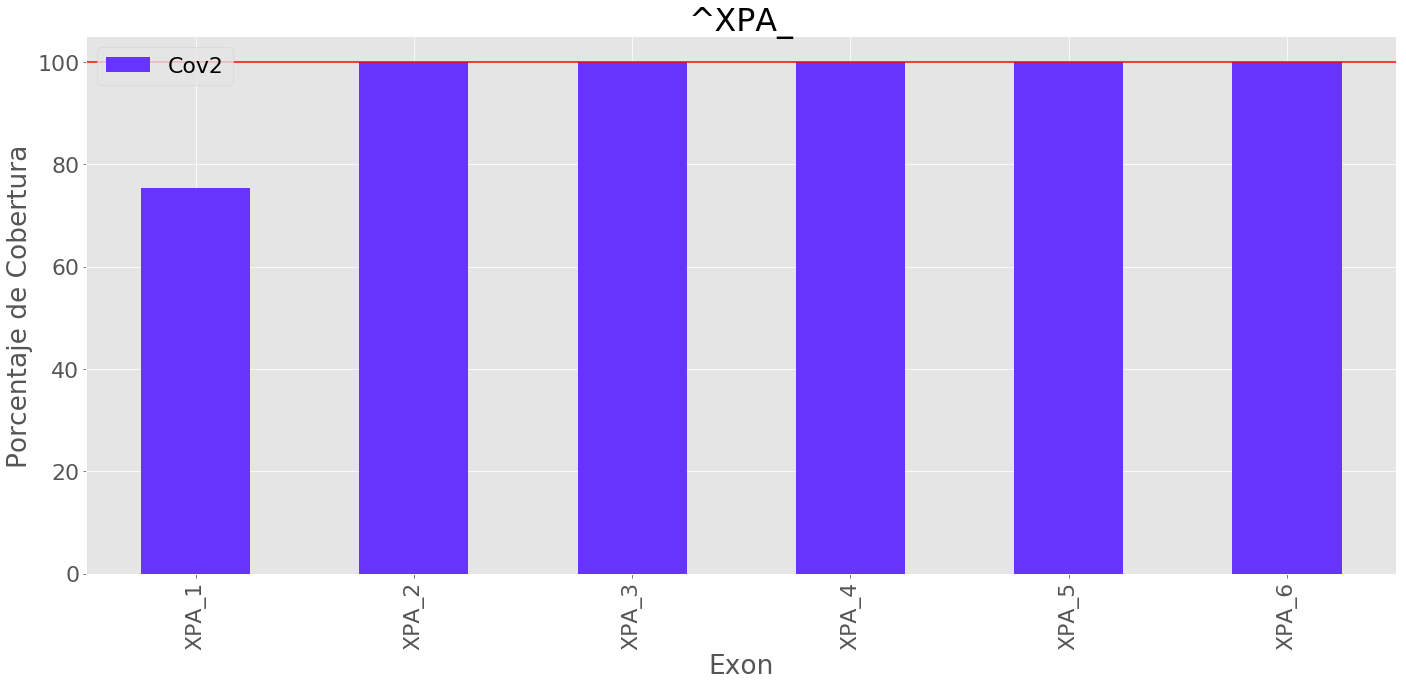

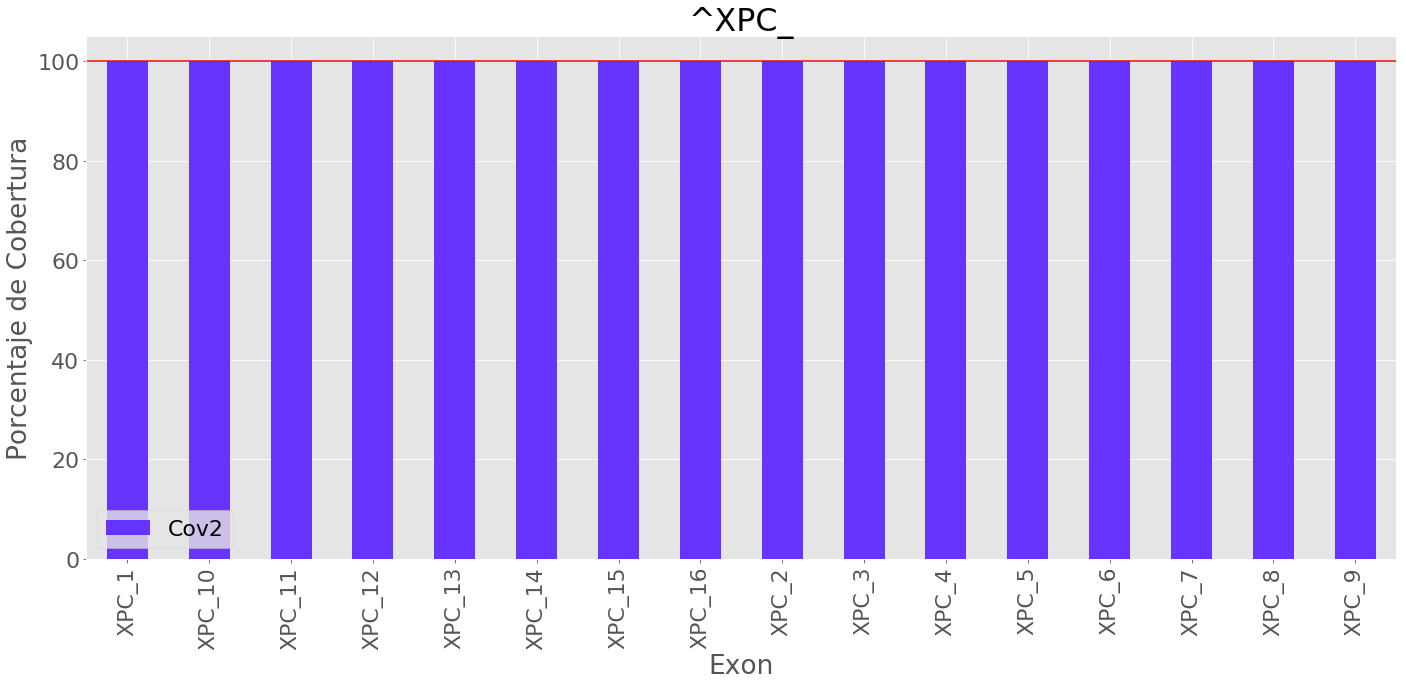

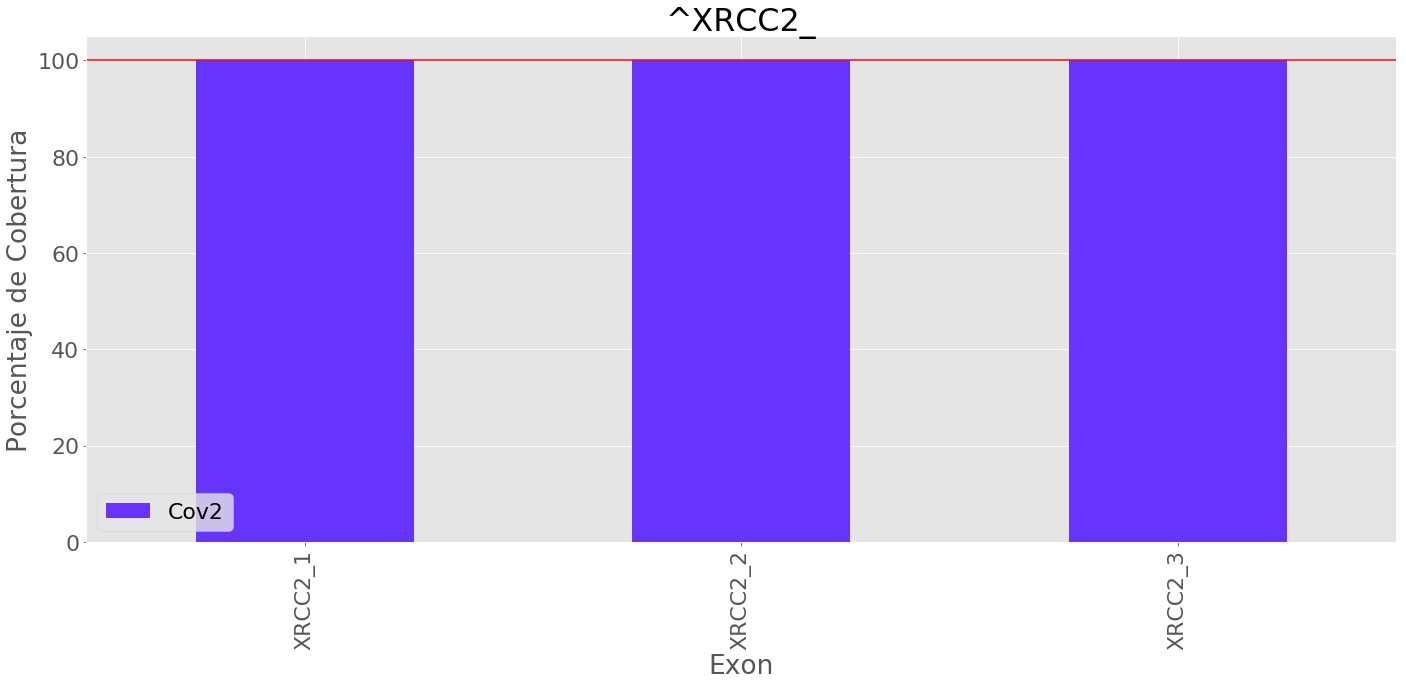

In [42]:
for g in g:
    porcentaje_cobertura(g)

In [ ]:
%%bash
find *.png*|wc -l 

In [ ]:
%%bash
rm *.png*

In [ ]:
len(g)

In [ ]:
n = input()

In [ ]:
j = grafico_media(n)

In [ ]:
r = porcentaje_cobertura(n)

In [49]:
exon = input()

 SMAD4_9


<Figure size 1440x720 with 0 Axes>

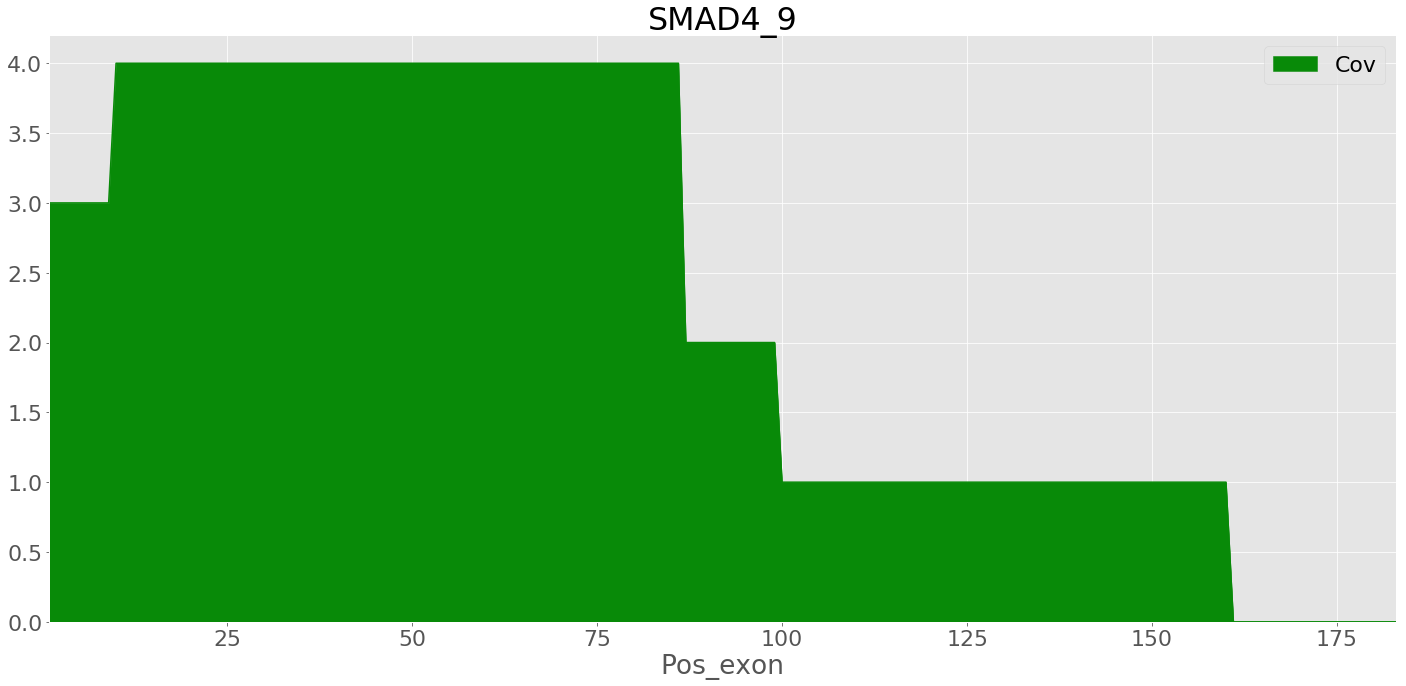

In [50]:
m = profundidad(exon)

In [51]:
%%bash 
n=72436
convert *.png* IGV_$n.pdf